# ODI Match Winner : Weekend Hackathon #9



![Alt text](https://www.machinehack.com/wp-content/uploads/2020/06/ODI-WINNER-01-1536x864.jpg)


## Description

Our country shares a great deal of history with the game of Cricket. Introduced as a royal game by the British during the British Raj, India took on the game as a popular sport even after its Independence. Today Cricket is more than just a sport in India. In this hackathon, we challenge data science enthusiasts to predict the winning team of an ODI (One Day International) match.

Given are 10 distinguishing factors that can influence the outcome of a cricket match. Your objective as a data scientist is to build a machine learning model that can accurately predict the winning team of an ODI match

## Train.csv

![Alt text](https://www.machinehack.com/wp-content/uploads/2020/06/train-3-1024x311.png)


## Test.csv

![Alt text](https://www.machinehack.com/wp-content/uploads/2020/06/test-3-1024x342.png)


## Sample_Submission.xlsx

![Alt text](https://www.machinehack.com/wp-content/uploads/2020/06/sample-1.png)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
#_______________________________________________________________________________________________________________
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
import sweetviz
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score,f1_score
import itertools
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
#pip install catboost

In [13]:
path='./Train.csv'
path1='./Test.csv'

In [14]:
train=pd.read_csv(path)
train

Team1  Team2  Stadium  HostCountry Team1_Venue Team2_Venue  \
0         5      4       37            4        Home        Away   
1         1     14       84            7     Neutral     Neutral   
2         9     15       47            9        Home        Away   
3         7      2      102            6        Home        Away   
4         6      8       46            5        Home        Away   
...     ...    ...      ...          ...         ...         ...   
2503      5     15       89            3     Neutral     Neutral   
2504      1     14      138            0        Home        Away   
2505     14      5      135           15        Home        Away   
2506     15     14       64           16        Home        Away   
2507      1     10      111            0        Home        Away   

     Team1_Innings Team2_Innings MonthOfMatch  MatchWinner  
0           Second         First          Dec            4  
1            First        Second          Sep            1  
2            First        Second          Feb            9  
3            First        Second          Aug            2  
4            First        Second          Aug            6  
...            ...           ...          ...          ...  
2503        Second         First          Jun            5  
2504         First        Second          Jan            1  
2505        Second         First          Apr           14  
2506         First        Second          Nov           14  
2507        Second         First          Jan            1  

[2508 rows x 10 columns]

In [6]:
test=pd.read_csv(path1)
test

Team1  Team2  Stadium  HostCountry Team1_Venue Team2_Venue  \
0         2      4       34            1        Home        Away   
1        14      1       19           15        Home        Away   
2         9     10      130           14     Neutral     Neutral   
3         9     10        8            9        Home        Away   
4         5     15      130           14     Neutral     Neutral   
...     ...    ...      ...          ...         ...         ...   
1070     15      5       64           16        Home        Away   
1071      1     12       95            0        Home        Away   
1072      5     10       43            1     Neutral     Neutral   
1073     10     13      111            0     Neutral     Neutral   
1074      5      9      111            0     Neutral     Neutral   

     Team1_Innings Team2_Innings MonthOfMatch  
0            First        Second          Oct  
1            First        Second          Mar  
2           Second         First          Dec  
3            First        Second          Dec  
4            First        Second          Oct  
...            ...           ...          ...  
1070         First        Second          Jun  
1071         First        Second          Feb  
1072         First        Second          Mar  
1073        Second         First          Mar  
1074         First        Second          Dec  

[1075 rows x 9 columns]

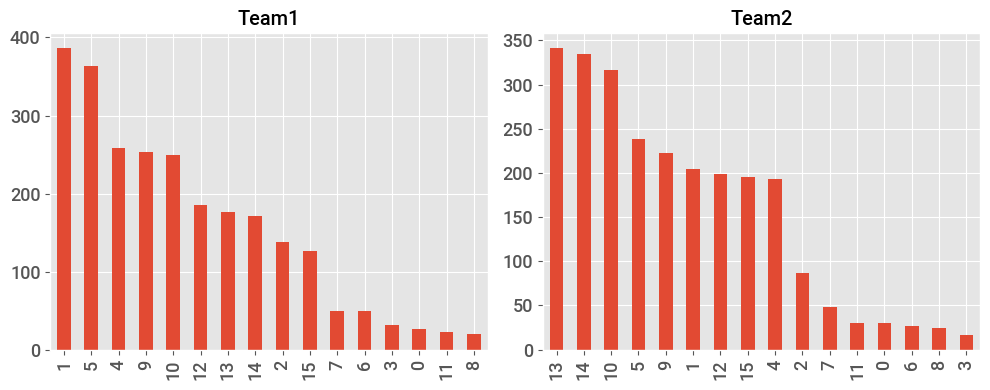

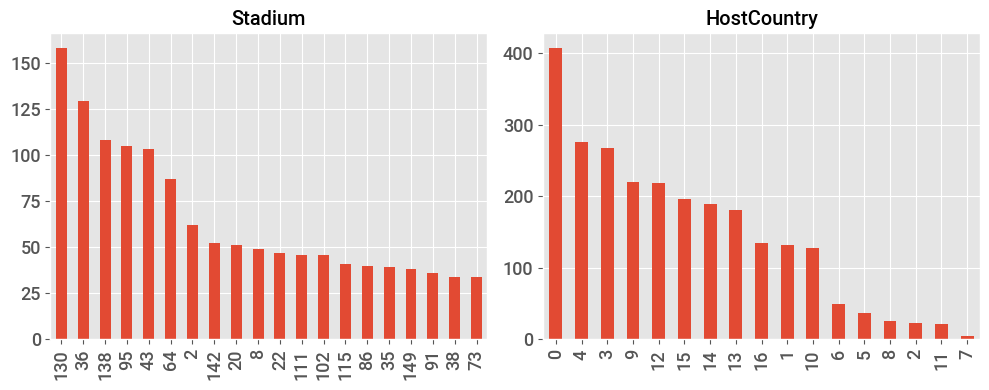

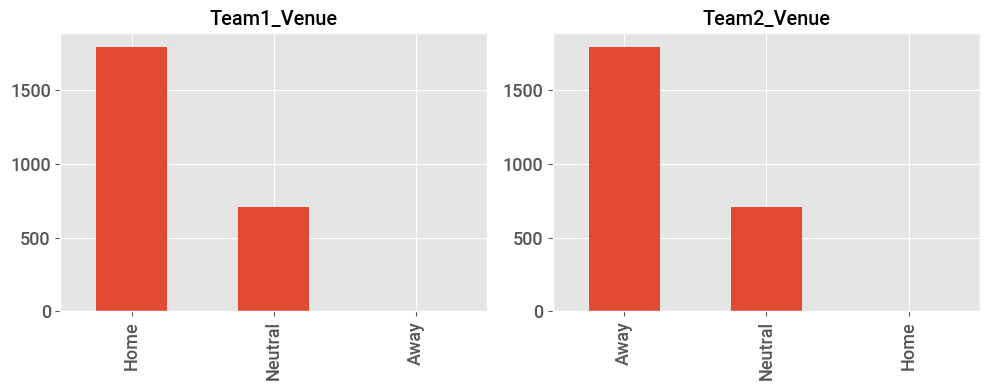

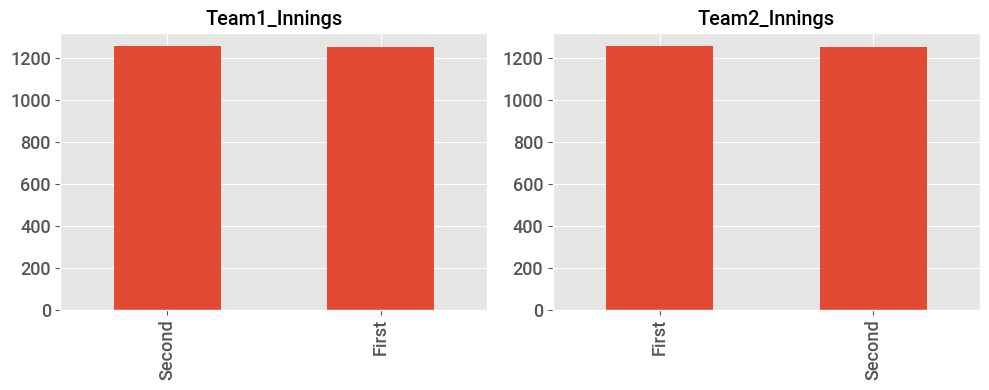

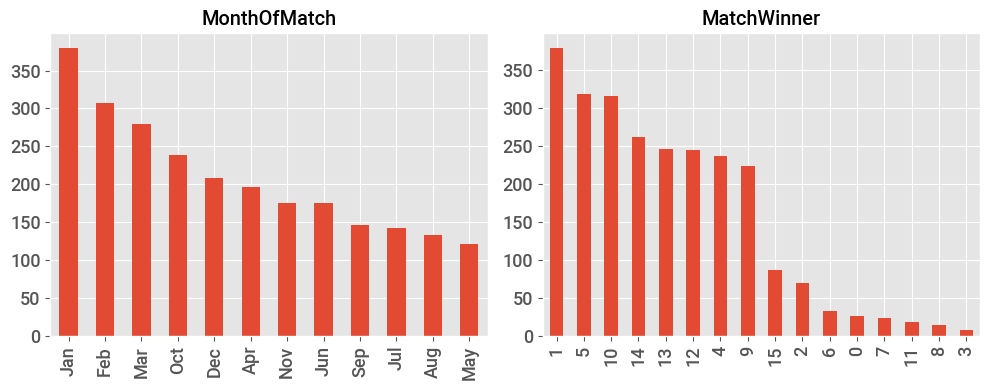

In [307]:
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object','int64']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts()[:20].plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts()[:20].plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts()[:20].plot(kind='bar')
                plt.title(categorical_columns[i])
        
        
        
        
plot = plot_categorical_columns(train)

In [308]:
#pip install sweetviz

In [245]:
#train_test_report=sweetviz.compare([train,'Train'],[test,'Test'],'MatchWinner')

In [252]:
#train_test_report.show_html('Train_Test_Report.html')

In [ ]:
def bivariate_analysis_categorical(dataframe,target):
    categorical_columns = dataframe.select_dtypes(include=['object','int64']).columns
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(dataframe[categorical_columns[i+1]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


bivariate_analysis_categorical(train,train['MatchWinner'])

In [ ]:
train

In [ ]:
#train['Stadium_count']=train.groupby('MonthOfMatch')['Stadium'].transform('count')

In [ ]:
train

In [ ]:
test

In [50]:
X=train.drop('MatchWinner',1)
y=train['MatchWinner']
Xt=test

In [51]:
def frequency_encoding(column, df, df_test=None):
    frequencies = df[column].value_counts().reset_index()
    df_values = df[[column]].merge(frequencies, how='left', 
                                   left_on=column, right_on='index').iloc[:,-1].values
    if df_test is not None:
        df_test_values = df_test[[column]].merge(frequencies, how='left', 
                                                 left_on=column, right_on='index').fillna(1).iloc[:,-1].values
    else:
        df_test_values = None
    return df_values, df_test_values

for column in ['Team1', 'Team2', 'Stadium', 'HostCountry', 'Team1_Venue',
       'Team2_Venue', 'Team1_Innings', 'Team2_Innings', 'MonthOfMatch']:
    train_values, test_values = frequency_encoding(column, X, Xt)
    X[column+'_counts'] = train_values
    Xt[column+'_counts'] = test_values

In [52]:
X.drop(['Team1', 'Team2', 'Stadium', 'HostCountry', 'Team1_Venue',
       'Team2_Venue', 'Team1_Innings', 'Team2_Innings', 'MonthOfMatch'],1,inplace=True)
Xt.drop(['Team1', 'Team2', 'Stadium', 'HostCountry', 'Team1_Venue',
       'Team2_Venue', 'Team1_Innings', 'Team2_Innings', 'MonthOfMatch'],1,inplace=True)

new_train=pd.concat([X,y],1)
new_test=Xt

In [53]:
new_train.drop([ 'Team2_Venue_counts', 'Team1_Innings_counts',
       'Team2_Innings_counts','MonthOfMatch_counts','Stadium_counts','HostCountry_counts'],1,inplace=True)

new_test.drop([  'Team2_Venue_counts', 'Team1_Innings_counts',
       'Team2_Innings_counts','MonthOfMatch_counts','Stadium_counts','HostCountry_counts'],1,inplace=True)




In [54]:
new_train

Team1_counts  Team2_counts  Team1_Venue_counts  MatchWinner
0              364           193                1797            4
1              386           335                 710            1
2              253           195                1797            9
3               50            87                1797            2
4               49            25                1797            6
...            ...           ...                 ...          ...
2503           364           195                 710            5
2504           386           335                1797            1
2505           171           238                1797           14
2506           127           335                1797           14
2507           386           316                1797            1

[2508 rows x 4 columns]

In [42]:
new_train.columns

Index(['Team1_counts', 'Team2_counts', 'Stadium_counts', 'HostCountry_counts',
       'Team1_Venue_counts', 'MatchWinner'],
      dtype='object')

In [60]:
from sklearn.metrics import log_loss
from imblearn.over_sampling import SMOTE
X=new_train.drop('MatchWinner',1)
y=new_train['MatchWinner']


xgb=XGBClassifier(random_state=9,max_depth=3)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

xgb.fit(X_train,y_train)
y_pred=xgb.predict_proba(X_test)
LOG_LOSS=log_loss(y_test,xgb.predict_proba(X_test))
#print(model)
print('LOG LOSS:',LOG_LOSS)
cv=cross_val_score(xgb,X,y,scoring='neg_log_loss',cv=5)
print('mean score:',cv.mean())
print('std:',cv.std())
print('------------------')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=9,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

LOG LOSS: 0.6552329504291019
mean score: -0.6697691392604066
std: 0.03490955906917453
------------------


In [258]:
from sklearn.metrics import log_loss
from imblearn.over_sampling import SMOTE
X=new_train.drop('MatchWinner',1)
y=new_train['MatchWinner']

smote=SMOTE()

lgb=LGBMClassifier(random_state=9)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

lgb.fit(X_train,y_train)
y_pred_1=lgb.predict_proba(X_test)
LOG_LOSS=log_loss(y_test,lgb.predict_proba(X_test))
#print(model)
print('LOG LOSS:',LOG_LOSS)
cv=cross_val_score(lgb,X,y,scoring='neg_log_loss',cv=5)
print('mean score:',cv.mean())
print('std:',cv.std())
print('------------------')

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=9, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LOG LOSS: 0.7039956665934209
mean score: -0.6949875283453324
std: 0.043828583633883936
------------------


In [161]:
from sklearn.metrics import log_loss
from imblearn.over_sampling import SMOTE
X=new_train.drop('MatchWinner',1)
y=new_train['MatchWinner']

smote=SMOTE()

cat=CatBoostClassifier(random_state=9)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

cat.fit(X_train,y_train)
y_pred_2=cat.predict_proba(X_test)
LOG_LOSS=log_loss(y_test,cat.predict_proba(X_test))
#print(model)
print('LOG LOSS:',LOG_LOSS)
cv=cross_val_score(cat,X,y,scoring='neg_log_loss',cv=5)
print('mean score:',cv.mean())
print('std:',cv.std())
print('------------------')

0:	learn: 2.6981491	total: 168ms	remaining: 2m 47s
1:	learn: 2.6277782	total: 229ms	remaining: 1m 54s
2:	learn: 2.5615466	total: 235ms	remaining: 1m 18s
3:	learn: 2.5060840	total: 251ms	remaining: 1m 2s
4:	learn: 2.4549681	total: 256ms	remaining: 51s
5:	learn: 2.4032803	total: 261ms	remaining: 43.3s
6:	learn: 2.3541631	total: 266ms	remaining: 37.8s
7:	learn: 2.3138320	total: 272ms	remaining: 33.7s
8:	learn: 2.2707473	total: 278ms	remaining: 30.6s
9:	learn: 2.2346490	total: 283ms	remaining: 28s
10:	learn: 2.1968589	total: 288ms	remaining: 25.9s
11:	learn: 2.1621615	total: 294ms	remaining: 24.2s
12:	learn: 2.1293476	total: 299ms	remaining: 22.7s
13:	learn: 2.0950285	total: 305ms	remaining: 21.4s
14:	learn: 2.0630736	total: 310ms	remaining: 20.4s
15:	learn: 2.0350207	total: 316ms	remaining: 19.4s
16:	learn: 2.0070099	total: 321ms	remaining: 18.6s
17:	learn: 1.9793108	total: 326ms	remaining: 17.8s
18:	learn: 1.9544275	total: 332ms	remaining: 17.1s
19:	learn: 1.9302112	total: 338ms	remainin

171:	learn: 0.9188236	total: 1.36s	remaining: 6.55s
172:	learn: 0.9174826	total: 1.37s	remaining: 6.54s
173:	learn: 0.9160251	total: 1.41s	remaining: 6.69s
174:	learn: 0.9139923	total: 1.41s	remaining: 6.67s
175:	learn: 0.9129858	total: 1.42s	remaining: 6.67s
176:	learn: 0.9116647	total: 1.43s	remaining: 6.65s
177:	learn: 0.9097601	total: 1.44s	remaining: 6.63s
178:	learn: 0.9082140	total: 1.44s	remaining: 6.62s
179:	learn: 0.9069375	total: 1.45s	remaining: 6.6s
180:	learn: 0.9049380	total: 1.45s	remaining: 6.58s
181:	learn: 0.9028164	total: 1.46s	remaining: 6.56s
182:	learn: 0.9015628	total: 1.47s	remaining: 6.56s
183:	learn: 0.8998509	total: 1.5s	remaining: 6.64s
184:	learn: 0.8985933	total: 1.5s	remaining: 6.62s
185:	learn: 0.8976517	total: 1.51s	remaining: 6.6s
186:	learn: 0.8968176	total: 1.51s	remaining: 6.58s
187:	learn: 0.8948037	total: 1.52s	remaining: 6.56s
188:	learn: 0.8930963	total: 1.52s	remaining: 6.54s
189:	learn: 0.8918767	total: 1.53s	remaining: 6.52s
190:	learn: 0.89

349:	learn: 0.7484354	total: 2.39s	remaining: 4.44s
350:	learn: 0.7479355	total: 2.39s	remaining: 4.43s
351:	learn: 0.7473854	total: 2.4s	remaining: 4.42s
352:	learn: 0.7471037	total: 2.4s	remaining: 4.41s
353:	learn: 0.7466603	total: 2.41s	remaining: 4.4s
354:	learn: 0.7463611	total: 2.41s	remaining: 4.39s
355:	learn: 0.7456600	total: 2.42s	remaining: 4.38s
356:	learn: 0.7449434	total: 2.42s	remaining: 4.37s
357:	learn: 0.7442124	total: 2.43s	remaining: 4.36s
358:	learn: 0.7435085	total: 2.44s	remaining: 4.35s
359:	learn: 0.7430404	total: 2.44s	remaining: 4.34s
360:	learn: 0.7427175	total: 2.45s	remaining: 4.33s
361:	learn: 0.7420164	total: 2.46s	remaining: 4.33s
362:	learn: 0.7414760	total: 2.46s	remaining: 4.33s
363:	learn: 0.7409651	total: 2.47s	remaining: 4.32s
364:	learn: 0.7405921	total: 2.48s	remaining: 4.31s
365:	learn: 0.7399148	total: 2.48s	remaining: 4.3s
366:	learn: 0.7394205	total: 2.49s	remaining: 4.29s
367:	learn: 0.7386940	total: 2.49s	remaining: 4.28s
368:	learn: 0.73

539:	learn: 0.6769604	total: 3.41s	remaining: 2.9s
540:	learn: 0.6767823	total: 3.42s	remaining: 2.9s
541:	learn: 0.6766020	total: 3.42s	remaining: 2.89s
542:	learn: 0.6763052	total: 3.43s	remaining: 2.88s
543:	learn: 0.6760559	total: 3.43s	remaining: 2.88s
544:	learn: 0.6758339	total: 3.44s	remaining: 2.87s
545:	learn: 0.6754924	total: 3.44s	remaining: 2.86s
546:	learn: 0.6751352	total: 3.45s	remaining: 2.85s
547:	learn: 0.6749802	total: 3.45s	remaining: 2.85s
548:	learn: 0.6748187	total: 3.46s	remaining: 2.84s
549:	learn: 0.6746070	total: 3.46s	remaining: 2.83s
550:	learn: 0.6742692	total: 3.47s	remaining: 2.83s
551:	learn: 0.6740366	total: 3.47s	remaining: 2.82s
552:	learn: 0.6738283	total: 3.48s	remaining: 2.81s
553:	learn: 0.6736751	total: 3.48s	remaining: 2.8s
554:	learn: 0.6734836	total: 3.49s	remaining: 2.8s
555:	learn: 0.6733063	total: 3.5s	remaining: 2.79s
556:	learn: 0.6730126	total: 3.5s	remaining: 2.78s
557:	learn: 0.6728905	total: 3.51s	remaining: 2.78s
558:	learn: 0.6727

719:	learn: 0.6432063	total: 4.38s	remaining: 1.71s
720:	learn: 0.6430781	total: 4.39s	remaining: 1.7s
721:	learn: 0.6429131	total: 4.39s	remaining: 1.69s
722:	learn: 0.6428046	total: 4.4s	remaining: 1.69s
723:	learn: 0.6427271	total: 4.41s	remaining: 1.68s
724:	learn: 0.6425853	total: 4.41s	remaining: 1.67s
725:	learn: 0.6425009	total: 4.42s	remaining: 1.67s
726:	learn: 0.6423439	total: 4.42s	remaining: 1.66s
727:	learn: 0.6422540	total: 4.42s	remaining: 1.65s
728:	learn: 0.6421094	total: 4.43s	remaining: 1.65s
729:	learn: 0.6419376	total: 4.44s	remaining: 1.64s
730:	learn: 0.6417643	total: 4.44s	remaining: 1.63s
731:	learn: 0.6416019	total: 4.45s	remaining: 1.63s
732:	learn: 0.6414574	total: 4.45s	remaining: 1.62s
733:	learn: 0.6412829	total: 4.46s	remaining: 1.61s
734:	learn: 0.6411843	total: 4.46s	remaining: 1.61s
735:	learn: 0.6410485	total: 4.47s	remaining: 1.6s
736:	learn: 0.6409498	total: 4.47s	remaining: 1.6s
737:	learn: 0.6407732	total: 4.48s	remaining: 1.59s
738:	learn: 0.64

879:	learn: 0.6257642	total: 5.23s	remaining: 714ms
880:	learn: 0.6256560	total: 5.24s	remaining: 708ms
881:	learn: 0.6255388	total: 5.24s	remaining: 702ms
882:	learn: 0.6254601	total: 5.25s	remaining: 696ms
883:	learn: 0.6253716	total: 5.25s	remaining: 690ms
884:	learn: 0.6252880	total: 5.26s	remaining: 684ms
885:	learn: 0.6251919	total: 5.26s	remaining: 677ms
886:	learn: 0.6251222	total: 5.27s	remaining: 671ms
887:	learn: 0.6250266	total: 5.28s	remaining: 665ms
888:	learn: 0.6249455	total: 5.28s	remaining: 659ms
889:	learn: 0.6248803	total: 5.29s	remaining: 653ms
890:	learn: 0.6247967	total: 5.3s	remaining: 648ms
891:	learn: 0.6247431	total: 5.32s	remaining: 644ms
892:	learn: 0.6246525	total: 5.32s	remaining: 638ms
893:	learn: 0.6245609	total: 5.33s	remaining: 632ms
894:	learn: 0.6244845	total: 5.33s	remaining: 626ms
895:	learn: 0.6243860	total: 5.34s	remaining: 619ms
896:	learn: 0.6242945	total: 5.34s	remaining: 614ms
897:	learn: 0.6242264	total: 5.35s	remaining: 608ms
898:	learn: 0

LOG LOSS: 0.6915826727711604
0:	learn: 2.6970440	total: 5.91ms	remaining: 5.9s
1:	learn: 2.6162262	total: 24.9ms	remaining: 12.4s
2:	learn: 2.5484502	total: 30.6ms	remaining: 10.2s
3:	learn: 2.4874342	total: 36.2ms	remaining: 9.02s
4:	learn: 2.4358754	total: 41.9ms	remaining: 8.34s
5:	learn: 2.3900691	total: 47.2ms	remaining: 7.82s
6:	learn: 2.3421784	total: 52.6ms	remaining: 7.46s
7:	learn: 2.3005841	total: 58.3ms	remaining: 7.22s
8:	learn: 2.2602046	total: 64ms	remaining: 7.05s
9:	learn: 2.2245002	total: 69.7ms	remaining: 6.9s
10:	learn: 2.1822710	total: 75.4ms	remaining: 6.78s
11:	learn: 2.1484989	total: 81.1ms	remaining: 6.68s
12:	learn: 2.1164337	total: 86.5ms	remaining: 6.56s
13:	learn: 2.0817376	total: 91.8ms	remaining: 6.46s
14:	learn: 2.0522245	total: 97.2ms	remaining: 6.38s
15:	learn: 2.0260788	total: 103ms	remaining: 6.32s
16:	learn: 1.9948909	total: 108ms	remaining: 6.26s
17:	learn: 1.9679829	total: 114ms	remaining: 6.2s
18:	learn: 1.9388795	total: 119ms	remaining: 6.16s
19

163:	learn: 0.9254212	total: 980ms	remaining: 4.99s
164:	learn: 0.9237355	total: 985ms	remaining: 4.99s
165:	learn: 0.9221352	total: 991ms	remaining: 4.98s
166:	learn: 0.9203228	total: 996ms	remaining: 4.97s
167:	learn: 0.9179365	total: 1s	remaining: 4.96s
168:	learn: 0.9160273	total: 1.01s	remaining: 4.96s
169:	learn: 0.9147767	total: 1.01s	remaining: 4.95s
170:	learn: 0.9136077	total: 1.02s	remaining: 4.95s
171:	learn: 0.9120048	total: 1.02s	remaining: 4.94s
172:	learn: 0.9102091	total: 1.03s	remaining: 4.93s
173:	learn: 0.9082643	total: 1.04s	remaining: 4.92s
174:	learn: 0.9067000	total: 1.04s	remaining: 4.92s
175:	learn: 0.9054072	total: 1.05s	remaining: 4.91s
176:	learn: 0.9040450	total: 1.05s	remaining: 4.9s
177:	learn: 0.9023829	total: 1.06s	remaining: 4.89s
178:	learn: 0.9008185	total: 1.07s	remaining: 4.89s
179:	learn: 0.8991147	total: 1.07s	remaining: 4.88s
180:	learn: 0.8973395	total: 1.08s	remaining: 4.88s
181:	learn: 0.8964009	total: 1.08s	remaining: 4.87s
182:	learn: 0.89

329:	learn: 0.7577312	total: 2.03s	remaining: 4.12s
330:	learn: 0.7569404	total: 2.03s	remaining: 4.11s
331:	learn: 0.7563277	total: 2.04s	remaining: 4.1s
332:	learn: 0.7558895	total: 2.04s	remaining: 4.09s
333:	learn: 0.7555133	total: 2.05s	remaining: 4.09s
334:	learn: 0.7547673	total: 2.06s	remaining: 4.09s
335:	learn: 0.7544304	total: 2.07s	remaining: 4.09s
336:	learn: 0.7541431	total: 2.07s	remaining: 4.08s
337:	learn: 0.7536093	total: 2.08s	remaining: 4.07s
338:	learn: 0.7529773	total: 2.08s	remaining: 4.07s
339:	learn: 0.7525938	total: 2.09s	remaining: 4.06s
340:	learn: 0.7520882	total: 2.1s	remaining: 4.05s
341:	learn: 0.7514817	total: 2.1s	remaining: 4.05s
342:	learn: 0.7509531	total: 2.11s	remaining: 4.04s
343:	learn: 0.7503429	total: 2.11s	remaining: 4.03s
344:	learn: 0.7499378	total: 2.12s	remaining: 4.03s
345:	learn: 0.7495136	total: 2.13s	remaining: 4.03s
346:	learn: 0.7492198	total: 2.13s	remaining: 4.02s
347:	learn: 0.7484485	total: 2.14s	remaining: 4.01s
348:	learn: 0.7

505:	learn: 0.6875194	total: 3.05s	remaining: 2.98s
506:	learn: 0.6873601	total: 3.06s	remaining: 2.97s
507:	learn: 0.6871132	total: 3.06s	remaining: 2.97s
508:	learn: 0.6867955	total: 3.07s	remaining: 2.96s
509:	learn: 0.6865988	total: 3.08s	remaining: 2.96s
510:	learn: 0.6864022	total: 3.08s	remaining: 2.95s
511:	learn: 0.6860486	total: 3.09s	remaining: 2.95s
512:	learn: 0.6858924	total: 3.1s	remaining: 2.94s
513:	learn: 0.6855145	total: 3.1s	remaining: 2.94s
514:	learn: 0.6852862	total: 3.11s	remaining: 2.93s
515:	learn: 0.6848450	total: 3.12s	remaining: 2.92s
516:	learn: 0.6845363	total: 3.12s	remaining: 2.92s
517:	learn: 0.6843861	total: 3.13s	remaining: 2.91s
518:	learn: 0.6841481	total: 3.13s	remaining: 2.9s
519:	learn: 0.6839223	total: 3.14s	remaining: 2.9s
520:	learn: 0.6836024	total: 3.15s	remaining: 2.89s
521:	learn: 0.6833123	total: 3.15s	remaining: 2.88s
522:	learn: 0.6830901	total: 3.16s	remaining: 2.88s
523:	learn: 0.6827278	total: 3.16s	remaining: 2.87s
524:	learn: 0.68

681:	learn: 0.6517969	total: 4.08s	remaining: 1.9s
682:	learn: 0.6517008	total: 4.08s	remaining: 1.89s
683:	learn: 0.6515400	total: 4.09s	remaining: 1.89s
684:	learn: 0.6513262	total: 4.09s	remaining: 1.88s
685:	learn: 0.6512115	total: 4.1s	remaining: 1.88s
686:	learn: 0.6510102	total: 4.1s	remaining: 1.87s
687:	learn: 0.6508460	total: 4.11s	remaining: 1.86s
688:	learn: 0.6507207	total: 4.12s	remaining: 1.86s
689:	learn: 0.6505671	total: 4.12s	remaining: 1.85s
690:	learn: 0.6504666	total: 4.13s	remaining: 1.85s
691:	learn: 0.6503510	total: 4.14s	remaining: 1.84s
692:	learn: 0.6501363	total: 4.14s	remaining: 1.83s
693:	learn: 0.6500325	total: 4.15s	remaining: 1.83s
694:	learn: 0.6499061	total: 4.16s	remaining: 1.82s
695:	learn: 0.6497158	total: 4.16s	remaining: 1.82s
696:	learn: 0.6496122	total: 4.17s	remaining: 1.81s
697:	learn: 0.6494987	total: 4.17s	remaining: 1.8s
698:	learn: 0.6494035	total: 4.18s	remaining: 1.8s
699:	learn: 0.6492925	total: 4.18s	remaining: 1.79s
700:	learn: 0.649

844:	learn: 0.6323529	total: 5.11s	remaining: 938ms
845:	learn: 0.6322378	total: 5.12s	remaining: 932ms
846:	learn: 0.6321248	total: 5.13s	remaining: 926ms
847:	learn: 0.6320334	total: 5.13s	remaining: 920ms
848:	learn: 0.6319184	total: 5.14s	remaining: 914ms
849:	learn: 0.6318393	total: 5.14s	remaining: 908ms
850:	learn: 0.6317297	total: 5.15s	remaining: 902ms
851:	learn: 0.6316259	total: 5.15s	remaining: 895ms
852:	learn: 0.6315675	total: 5.16s	remaining: 889ms
853:	learn: 0.6314506	total: 5.17s	remaining: 883ms
854:	learn: 0.6313303	total: 5.18s	remaining: 878ms
855:	learn: 0.6312442	total: 5.18s	remaining: 872ms
856:	learn: 0.6311333	total: 5.19s	remaining: 866ms
857:	learn: 0.6310409	total: 5.19s	remaining: 860ms
858:	learn: 0.6309643	total: 5.2s	remaining: 854ms
859:	learn: 0.6308857	total: 5.21s	remaining: 848ms
860:	learn: 0.6308155	total: 5.21s	remaining: 842ms
861:	learn: 0.6307463	total: 5.22s	remaining: 835ms
862:	learn: 0.6306670	total: 5.22s	remaining: 829ms
863:	learn: 0

28:	learn: 1.7251258	total: 182ms	remaining: 6.1s
29:	learn: 1.7073544	total: 188ms	remaining: 6.07s
30:	learn: 1.6893424	total: 193ms	remaining: 6.04s
31:	learn: 1.6710660	total: 199ms	remaining: 6.01s
32:	learn: 1.6565456	total: 204ms	remaining: 5.98s
33:	learn: 1.6401730	total: 210ms	remaining: 5.96s
34:	learn: 1.6275791	total: 215ms	remaining: 5.94s
35:	learn: 1.6130984	total: 221ms	remaining: 5.92s
36:	learn: 1.5973367	total: 227ms	remaining: 5.9s
37:	learn: 1.5818015	total: 232ms	remaining: 5.87s
38:	learn: 1.5669388	total: 238ms	remaining: 5.85s
39:	learn: 1.5559341	total: 244ms	remaining: 5.85s
40:	learn: 1.5420729	total: 250ms	remaining: 5.86s
41:	learn: 1.5273616	total: 256ms	remaining: 5.84s
42:	learn: 1.5133124	total: 262ms	remaining: 5.83s
43:	learn: 1.5023915	total: 268ms	remaining: 5.82s
44:	learn: 1.4885572	total: 274ms	remaining: 5.8s
45:	learn: 1.4773487	total: 281ms	remaining: 5.83s
46:	learn: 1.4647647	total: 286ms	remaining: 5.81s
47:	learn: 1.4529915	total: 292ms	

208:	learn: 0.8607791	total: 1.37s	remaining: 5.2s
209:	learn: 0.8588191	total: 1.38s	remaining: 5.19s
210:	learn: 0.8575958	total: 1.39s	remaining: 5.18s
211:	learn: 0.8560147	total: 1.39s	remaining: 5.17s
212:	learn: 0.8547849	total: 1.4s	remaining: 5.17s
213:	learn: 0.8533010	total: 1.41s	remaining: 5.16s
214:	learn: 0.8526266	total: 1.42s	remaining: 5.18s
215:	learn: 0.8518094	total: 1.42s	remaining: 5.17s
216:	learn: 0.8501110	total: 1.43s	remaining: 5.16s
217:	learn: 0.8485508	total: 1.44s	remaining: 5.15s
218:	learn: 0.8479500	total: 1.44s	remaining: 5.15s
219:	learn: 0.8466245	total: 1.46s	remaining: 5.16s
220:	learn: 0.8451791	total: 1.46s	remaining: 5.15s
221:	learn: 0.8441938	total: 1.47s	remaining: 5.14s
222:	learn: 0.8432134	total: 1.47s	remaining: 5.13s
223:	learn: 0.8424967	total: 1.48s	remaining: 5.12s
224:	learn: 0.8412220	total: 1.48s	remaining: 5.11s
225:	learn: 0.8397322	total: 1.49s	remaining: 5.1s
226:	learn: 0.8385054	total: 1.5s	remaining: 5.09s
227:	learn: 0.83

375:	learn: 0.7317422	total: 2.41s	remaining: 4s
376:	learn: 0.7311459	total: 2.42s	remaining: 4s
377:	learn: 0.7307835	total: 2.42s	remaining: 3.99s
378:	learn: 0.7302190	total: 2.43s	remaining: 3.98s
379:	learn: 0.7295290	total: 2.44s	remaining: 3.97s
380:	learn: 0.7292300	total: 2.44s	remaining: 3.97s
381:	learn: 0.7289628	total: 2.45s	remaining: 3.96s
382:	learn: 0.7284570	total: 2.45s	remaining: 3.95s
383:	learn: 0.7277299	total: 2.46s	remaining: 3.95s
384:	learn: 0.7271402	total: 2.47s	remaining: 3.94s
385:	learn: 0.7266706	total: 2.47s	remaining: 3.93s
386:	learn: 0.7262242	total: 2.48s	remaining: 3.93s
387:	learn: 0.7259316	total: 2.48s	remaining: 3.92s
388:	learn: 0.7256500	total: 2.49s	remaining: 3.91s
389:	learn: 0.7249781	total: 2.5s	remaining: 3.91s
390:	learn: 0.7245027	total: 2.51s	remaining: 3.9s
391:	learn: 0.7240499	total: 2.51s	remaining: 3.9s
392:	learn: 0.7233658	total: 2.52s	remaining: 3.89s
393:	learn: 0.7230417	total: 2.52s	remaining: 3.88s
394:	learn: 0.7225080

539:	learn: 0.6768308	total: 3.41s	remaining: 2.9s
540:	learn: 0.6766622	total: 3.41s	remaining: 2.9s
541:	learn: 0.6763725	total: 3.42s	remaining: 2.89s
542:	learn: 0.6760547	total: 3.42s	remaining: 2.88s
543:	learn: 0.6757395	total: 3.43s	remaining: 2.87s
544:	learn: 0.6754545	total: 3.43s	remaining: 2.87s
545:	learn: 0.6752587	total: 3.44s	remaining: 2.86s
546:	learn: 0.6749957	total: 3.45s	remaining: 2.85s
547:	learn: 0.6747104	total: 3.45s	remaining: 2.85s
548:	learn: 0.6745086	total: 3.46s	remaining: 2.84s
549:	learn: 0.6742906	total: 3.46s	remaining: 2.83s
550:	learn: 0.6740509	total: 3.47s	remaining: 2.83s
551:	learn: 0.6738408	total: 3.47s	remaining: 2.82s
552:	learn: 0.6736431	total: 3.48s	remaining: 2.81s
553:	learn: 0.6733875	total: 3.49s	remaining: 2.81s
554:	learn: 0.6732117	total: 3.49s	remaining: 2.8s
555:	learn: 0.6729679	total: 3.5s	remaining: 2.79s
556:	learn: 0.6727571	total: 3.5s	remaining: 2.79s
557:	learn: 0.6724191	total: 3.51s	remaining: 2.78s
558:	learn: 0.672

714:	learn: 0.6451083	total: 4.42s	remaining: 1.76s
715:	learn: 0.6450009	total: 4.42s	remaining: 1.75s
716:	learn: 0.6448615	total: 4.43s	remaining: 1.75s
717:	learn: 0.6447552	total: 4.44s	remaining: 1.74s
718:	learn: 0.6445836	total: 4.44s	remaining: 1.74s
719:	learn: 0.6444405	total: 4.45s	remaining: 1.73s
720:	learn: 0.6442625	total: 4.45s	remaining: 1.72s
721:	learn: 0.6441620	total: 4.46s	remaining: 1.72s
722:	learn: 0.6440369	total: 4.46s	remaining: 1.71s
723:	learn: 0.6438756	total: 4.47s	remaining: 1.7s
724:	learn: 0.6437718	total: 4.48s	remaining: 1.7s
725:	learn: 0.6436892	total: 4.48s	remaining: 1.69s
726:	learn: 0.6436159	total: 4.49s	remaining: 1.69s
727:	learn: 0.6435203	total: 4.5s	remaining: 1.68s
728:	learn: 0.6434059	total: 4.5s	remaining: 1.67s
729:	learn: 0.6433149	total: 4.51s	remaining: 1.67s
730:	learn: 0.6432378	total: 4.51s	remaining: 1.66s
731:	learn: 0.6430927	total: 4.52s	remaining: 1.65s
732:	learn: 0.6429519	total: 4.52s	remaining: 1.65s
733:	learn: 0.64

882:	learn: 0.6274615	total: 5.45s	remaining: 722ms
883:	learn: 0.6273980	total: 5.45s	remaining: 716ms
884:	learn: 0.6272955	total: 5.46s	remaining: 709ms
885:	learn: 0.6272055	total: 5.46s	remaining: 703ms
886:	learn: 0.6271370	total: 5.47s	remaining: 697ms
887:	learn: 0.6270769	total: 5.48s	remaining: 691ms
888:	learn: 0.6269868	total: 5.48s	remaining: 685ms
889:	learn: 0.6269295	total: 5.49s	remaining: 678ms
890:	learn: 0.6268150	total: 5.49s	remaining: 672ms
891:	learn: 0.6267163	total: 5.5s	remaining: 666ms
892:	learn: 0.6266251	total: 5.51s	remaining: 660ms
893:	learn: 0.6265731	total: 5.51s	remaining: 654ms
894:	learn: 0.6264929	total: 5.52s	remaining: 647ms
895:	learn: 0.6264146	total: 5.52s	remaining: 641ms
896:	learn: 0.6263142	total: 5.53s	remaining: 635ms
897:	learn: 0.6262518	total: 5.54s	remaining: 629ms
898:	learn: 0.6261706	total: 5.54s	remaining: 623ms
899:	learn: 0.6261022	total: 5.55s	remaining: 616ms
900:	learn: 0.6260492	total: 5.55s	remaining: 610ms
901:	learn: 0

61:	learn: 1.3119741	total: 360ms	remaining: 5.45s
62:	learn: 1.3038843	total: 366ms	remaining: 5.44s
63:	learn: 1.2964644	total: 371ms	remaining: 5.43s
64:	learn: 1.2875535	total: 377ms	remaining: 5.42s
65:	learn: 1.2789460	total: 382ms	remaining: 5.41s
66:	learn: 1.2712082	total: 388ms	remaining: 5.4s
67:	learn: 1.2629651	total: 393ms	remaining: 5.39s
68:	learn: 1.2555177	total: 399ms	remaining: 5.38s
69:	learn: 1.2488585	total: 405ms	remaining: 5.38s
70:	learn: 1.2420440	total: 410ms	remaining: 5.37s
71:	learn: 1.2349930	total: 416ms	remaining: 5.36s
72:	learn: 1.2300057	total: 421ms	remaining: 5.34s
73:	learn: 1.2223400	total: 427ms	remaining: 5.34s
74:	learn: 1.2163683	total: 432ms	remaining: 5.33s
75:	learn: 1.2092017	total: 439ms	remaining: 5.33s
76:	learn: 1.2048262	total: 445ms	remaining: 5.33s
77:	learn: 1.1984451	total: 450ms	remaining: 5.32s
78:	learn: 1.1936995	total: 456ms	remaining: 5.32s
79:	learn: 1.1874220	total: 462ms	remaining: 5.31s
80:	learn: 1.1814649	total: 468m

235:	learn: 0.8242745	total: 1.38s	remaining: 4.48s
236:	learn: 0.8228693	total: 1.39s	remaining: 4.48s
237:	learn: 0.8218135	total: 1.4s	remaining: 4.47s
238:	learn: 0.8207703	total: 1.4s	remaining: 4.46s
239:	learn: 0.8198998	total: 1.41s	remaining: 4.46s
240:	learn: 0.8188483	total: 1.41s	remaining: 4.45s
241:	learn: 0.8178285	total: 1.42s	remaining: 4.44s
242:	learn: 0.8163999	total: 1.43s	remaining: 4.45s
243:	learn: 0.8158765	total: 1.43s	remaining: 4.44s
244:	learn: 0.8151857	total: 1.44s	remaining: 4.43s
245:	learn: 0.8142655	total: 1.44s	remaining: 4.43s
246:	learn: 0.8136222	total: 1.45s	remaining: 4.42s
247:	learn: 0.8122777	total: 1.46s	remaining: 4.42s
248:	learn: 0.8109380	total: 1.46s	remaining: 4.41s
249:	learn: 0.8102923	total: 1.47s	remaining: 4.42s
250:	learn: 0.8092894	total: 1.48s	remaining: 4.41s
251:	learn: 0.8087912	total: 1.48s	remaining: 4.41s
252:	learn: 0.8077596	total: 1.49s	remaining: 4.4s
253:	learn: 0.8070564	total: 1.5s	remaining: 4.4s
254:	learn: 0.806

411:	learn: 0.7089315	total: 2.41s	remaining: 3.44s
412:	learn: 0.7087144	total: 2.42s	remaining: 3.43s
413:	learn: 0.7081909	total: 2.42s	remaining: 3.43s
414:	learn: 0.7076016	total: 2.43s	remaining: 3.42s
415:	learn: 0.7071599	total: 2.43s	remaining: 3.41s
416:	learn: 0.7067443	total: 2.44s	remaining: 3.41s
417:	learn: 0.7065334	total: 2.44s	remaining: 3.4s
418:	learn: 0.7060647	total: 2.45s	remaining: 3.4s
419:	learn: 0.7057216	total: 2.46s	remaining: 3.39s
420:	learn: 0.7051668	total: 2.46s	remaining: 3.39s
421:	learn: 0.7045958	total: 2.47s	remaining: 3.38s
422:	learn: 0.7042881	total: 2.47s	remaining: 3.38s
423:	learn: 0.7040245	total: 2.48s	remaining: 3.37s
424:	learn: 0.7035277	total: 2.49s	remaining: 3.37s
425:	learn: 0.7032795	total: 2.49s	remaining: 3.36s
426:	learn: 0.7029165	total: 2.5s	remaining: 3.35s
427:	learn: 0.7023229	total: 2.5s	remaining: 3.35s
428:	learn: 0.7019257	total: 2.51s	remaining: 3.34s
429:	learn: 0.7016777	total: 2.52s	remaining: 3.34s
430:	learn: 0.70

585:	learn: 0.6569749	total: 3.43s	remaining: 2.42s
586:	learn: 0.6568293	total: 3.44s	remaining: 2.42s
587:	learn: 0.6566964	total: 3.44s	remaining: 2.41s
588:	learn: 0.6563858	total: 3.45s	remaining: 2.41s
589:	learn: 0.6560906	total: 3.46s	remaining: 2.4s
590:	learn: 0.6559608	total: 3.46s	remaining: 2.4s
591:	learn: 0.6557482	total: 3.47s	remaining: 2.39s
592:	learn: 0.6555472	total: 3.47s	remaining: 2.38s
593:	learn: 0.6553220	total: 3.48s	remaining: 2.38s
594:	learn: 0.6551581	total: 3.48s	remaining: 2.37s
595:	learn: 0.6549543	total: 3.49s	remaining: 2.37s
596:	learn: 0.6548220	total: 3.5s	remaining: 2.36s
597:	learn: 0.6546050	total: 3.5s	remaining: 2.35s
598:	learn: 0.6543630	total: 3.51s	remaining: 2.35s
599:	learn: 0.6542489	total: 3.52s	remaining: 2.34s
600:	learn: 0.6540661	total: 3.52s	remaining: 2.34s
601:	learn: 0.6538150	total: 3.53s	remaining: 2.33s
602:	learn: 0.6535627	total: 3.53s	remaining: 2.33s
603:	learn: 0.6534189	total: 3.54s	remaining: 2.32s
604:	learn: 0.65

755:	learn: 0.6306478	total: 4.42s	remaining: 1.43s
756:	learn: 0.6304725	total: 4.43s	remaining: 1.42s
757:	learn: 0.6303214	total: 4.44s	remaining: 1.42s
758:	learn: 0.6301534	total: 4.44s	remaining: 1.41s
759:	learn: 0.6300317	total: 4.45s	remaining: 1.4s
760:	learn: 0.6299009	total: 4.45s	remaining: 1.4s
761:	learn: 0.6297461	total: 4.46s	remaining: 1.39s
762:	learn: 0.6296399	total: 4.46s	remaining: 1.39s
763:	learn: 0.6295120	total: 4.47s	remaining: 1.38s
764:	learn: 0.6294304	total: 4.48s	remaining: 1.38s
765:	learn: 0.6293297	total: 4.48s	remaining: 1.37s
766:	learn: 0.6291856	total: 4.49s	remaining: 1.36s
767:	learn: 0.6291002	total: 4.5s	remaining: 1.36s
768:	learn: 0.6289661	total: 4.5s	remaining: 1.35s
769:	learn: 0.6288814	total: 4.51s	remaining: 1.35s
770:	learn: 0.6287480	total: 4.51s	remaining: 1.34s
771:	learn: 0.6286440	total: 4.52s	remaining: 1.33s
772:	learn: 0.6285231	total: 4.53s	remaining: 1.33s
773:	learn: 0.6284080	total: 4.53s	remaining: 1.32s
774:	learn: 0.62

929:	learn: 0.6144920	total: 5.45s	remaining: 410ms
930:	learn: 0.6144071	total: 5.45s	remaining: 404ms
931:	learn: 0.6143238	total: 5.46s	remaining: 398ms
932:	learn: 0.6142383	total: 5.46s	remaining: 392ms
933:	learn: 0.6141774	total: 5.47s	remaining: 386ms
934:	learn: 0.6141095	total: 5.47s	remaining: 381ms
935:	learn: 0.6140353	total: 5.48s	remaining: 375ms
936:	learn: 0.6139585	total: 5.49s	remaining: 369ms
937:	learn: 0.6139015	total: 5.49s	remaining: 363ms
938:	learn: 0.6138439	total: 5.5s	remaining: 357ms
939:	learn: 0.6137760	total: 5.5s	remaining: 351ms
940:	learn: 0.6137116	total: 5.51s	remaining: 345ms
941:	learn: 0.6136597	total: 5.51s	remaining: 340ms
942:	learn: 0.6135783	total: 5.52s	remaining: 334ms
943:	learn: 0.6135171	total: 5.53s	remaining: 328ms
944:	learn: 0.6134372	total: 5.53s	remaining: 322ms
945:	learn: 0.6133670	total: 5.54s	remaining: 316ms
946:	learn: 0.6132856	total: 5.54s	remaining: 310ms
947:	learn: 0.6132178	total: 5.55s	remaining: 304ms
948:	learn: 0.

89:	learn: 1.1380949	total: 533ms	remaining: 5.38s
90:	learn: 1.1321265	total: 538ms	remaining: 5.38s
91:	learn: 1.1270622	total: 544ms	remaining: 5.37s
92:	learn: 1.1245943	total: 548ms	remaining: 5.34s
93:	learn: 1.1208503	total: 554ms	remaining: 5.34s
94:	learn: 1.1170459	total: 559ms	remaining: 5.33s
95:	learn: 1.1132547	total: 565ms	remaining: 5.32s
96:	learn: 1.1099583	total: 570ms	remaining: 5.31s
97:	learn: 1.1050004	total: 576ms	remaining: 5.3s
98:	learn: 1.1007228	total: 582ms	remaining: 5.29s
99:	learn: 1.0970507	total: 587ms	remaining: 5.29s
100:	learn: 1.0927763	total: 593ms	remaining: 5.28s
101:	learn: 1.0886557	total: 599ms	remaining: 5.27s
102:	learn: 1.0848747	total: 604ms	remaining: 5.26s
103:	learn: 1.0812086	total: 613ms	remaining: 5.28s
104:	learn: 1.0763449	total: 619ms	remaining: 5.27s
105:	learn: 1.0732346	total: 628ms	remaining: 5.29s
106:	learn: 1.0699270	total: 634ms	remaining: 5.29s
107:	learn: 1.0663472	total: 640ms	remaining: 5.28s
108:	learn: 1.0632933	to

262:	learn: 0.7946143	total: 1.56s	remaining: 4.36s
263:	learn: 0.7938988	total: 1.56s	remaining: 4.36s
264:	learn: 0.7933689	total: 1.57s	remaining: 4.36s
265:	learn: 0.7923854	total: 1.58s	remaining: 4.35s
266:	learn: 0.7918163	total: 1.58s	remaining: 4.34s
267:	learn: 0.7907124	total: 1.59s	remaining: 4.34s
268:	learn: 0.7899416	total: 1.59s	remaining: 4.33s
269:	learn: 0.7889540	total: 1.6s	remaining: 4.33s
270:	learn: 0.7876926	total: 1.62s	remaining: 4.35s
271:	learn: 0.7869414	total: 1.63s	remaining: 4.37s
272:	learn: 0.7862091	total: 1.64s	remaining: 4.37s
273:	learn: 0.7850457	total: 1.65s	remaining: 4.36s
274:	learn: 0.7842169	total: 1.65s	remaining: 4.36s
275:	learn: 0.7837528	total: 1.66s	remaining: 4.35s
276:	learn: 0.7825764	total: 1.67s	remaining: 4.35s
277:	learn: 0.7820054	total: 1.67s	remaining: 4.34s
278:	learn: 0.7812359	total: 1.68s	remaining: 4.34s
279:	learn: 0.7805786	total: 1.68s	remaining: 4.33s
280:	learn: 0.7799348	total: 1.69s	remaining: 4.32s
281:	learn: 0

421:	learn: 0.7038574	total: 2.59s	remaining: 3.54s
422:	learn: 0.7036394	total: 2.6s	remaining: 3.54s
423:	learn: 0.7031335	total: 2.6s	remaining: 3.53s
424:	learn: 0.7028660	total: 2.61s	remaining: 3.53s
425:	learn: 0.7023217	total: 2.61s	remaining: 3.52s
426:	learn: 0.7020742	total: 2.62s	remaining: 3.52s
427:	learn: 0.7017207	total: 2.63s	remaining: 3.51s
428:	learn: 0.7013663	total: 2.63s	remaining: 3.5s
429:	learn: 0.7010818	total: 2.64s	remaining: 3.5s
430:	learn: 0.7007483	total: 2.64s	remaining: 3.49s
431:	learn: 0.7002440	total: 2.65s	remaining: 3.48s
432:	learn: 0.7000483	total: 2.66s	remaining: 3.48s
433:	learn: 0.6995292	total: 2.67s	remaining: 3.48s
434:	learn: 0.6992084	total: 2.68s	remaining: 3.48s
435:	learn: 0.6986886	total: 2.68s	remaining: 3.47s
436:	learn: 0.6984239	total: 2.69s	remaining: 3.46s
437:	learn: 0.6980107	total: 2.7s	remaining: 3.46s
438:	learn: 0.6977475	total: 2.7s	remaining: 3.45s
439:	learn: 0.6973939	total: 2.71s	remaining: 3.45s
440:	learn: 0.6968

595:	learn: 0.6542222	total: 3.77s	remaining: 2.56s
596:	learn: 0.6540418	total: 3.78s	remaining: 2.55s
597:	learn: 0.6537998	total: 3.79s	remaining: 2.54s
598:	learn: 0.6535632	total: 3.79s	remaining: 2.54s
599:	learn: 0.6532800	total: 3.8s	remaining: 2.53s
600:	learn: 0.6531183	total: 3.8s	remaining: 2.52s
601:	learn: 0.6529015	total: 3.81s	remaining: 2.52s
602:	learn: 0.6526694	total: 3.81s	remaining: 2.51s
603:	learn: 0.6525221	total: 3.82s	remaining: 2.5s
604:	learn: 0.6522334	total: 3.83s	remaining: 2.5s
605:	learn: 0.6520781	total: 3.83s	remaining: 2.49s
606:	learn: 0.6519019	total: 3.84s	remaining: 2.49s
607:	learn: 0.6516848	total: 3.85s	remaining: 2.48s
608:	learn: 0.6515469	total: 3.85s	remaining: 2.47s
609:	learn: 0.6512561	total: 3.86s	remaining: 2.47s
610:	learn: 0.6511161	total: 3.87s	remaining: 2.46s
611:	learn: 0.6509929	total: 3.87s	remaining: 2.46s
612:	learn: 0.6507004	total: 3.88s	remaining: 2.45s
613:	learn: 0.6504778	total: 3.88s	remaining: 2.44s
614:	learn: 0.65

768:	learn: 0.6271924	total: 4.8s	remaining: 1.44s
769:	learn: 0.6271193	total: 4.8s	remaining: 1.43s
770:	learn: 0.6270486	total: 4.81s	remaining: 1.43s
771:	learn: 0.6269123	total: 4.81s	remaining: 1.42s
772:	learn: 0.6267552	total: 4.82s	remaining: 1.42s
773:	learn: 0.6266805	total: 4.83s	remaining: 1.41s
774:	learn: 0.6265883	total: 4.83s	remaining: 1.4s
775:	learn: 0.6264670	total: 4.84s	remaining: 1.4s
776:	learn: 0.6263504	total: 4.84s	remaining: 1.39s
777:	learn: 0.6262442	total: 4.85s	remaining: 1.38s
778:	learn: 0.6261085	total: 4.86s	remaining: 1.38s
779:	learn: 0.6259668	total: 4.86s	remaining: 1.37s
780:	learn: 0.6258401	total: 4.87s	remaining: 1.36s
781:	learn: 0.6257270	total: 4.88s	remaining: 1.36s
782:	learn: 0.6255939	total: 4.88s	remaining: 1.35s
783:	learn: 0.6255126	total: 4.89s	remaining: 1.35s
784:	learn: 0.6254322	total: 4.89s	remaining: 1.34s
785:	learn: 0.6253428	total: 4.9s	remaining: 1.33s
786:	learn: 0.6252089	total: 4.91s	remaining: 1.33s
787:	learn: 0.625

936:	learn: 0.6119515	total: 5.82s	remaining: 391ms
937:	learn: 0.6119024	total: 5.82s	remaining: 385ms
938:	learn: 0.6118531	total: 5.83s	remaining: 379ms
939:	learn: 0.6117811	total: 5.84s	remaining: 373ms
940:	learn: 0.6116977	total: 5.85s	remaining: 367ms
941:	learn: 0.6116124	total: 5.87s	remaining: 361ms
942:	learn: 0.6115492	total: 5.87s	remaining: 355ms
943:	learn: 0.6114764	total: 5.88s	remaining: 349ms
944:	learn: 0.6113929	total: 5.89s	remaining: 343ms
945:	learn: 0.6113388	total: 5.89s	remaining: 336ms
946:	learn: 0.6112655	total: 5.9s	remaining: 330ms
947:	learn: 0.6111951	total: 5.91s	remaining: 324ms
948:	learn: 0.6111204	total: 5.91s	remaining: 318ms
949:	learn: 0.6110400	total: 5.92s	remaining: 312ms
950:	learn: 0.6109648	total: 5.93s	remaining: 305ms
951:	learn: 0.6108982	total: 5.93s	remaining: 299ms
952:	learn: 0.6108345	total: 5.94s	remaining: 293ms
953:	learn: 0.6107858	total: 5.95s	remaining: 287ms
954:	learn: 0.6107180	total: 5.95s	remaining: 281ms
955:	learn: 0

116:	learn: 1.0298748	total: 698ms	remaining: 5.27s
117:	learn: 1.0262153	total: 705ms	remaining: 5.27s
118:	learn: 1.0228912	total: 710ms	remaining: 5.26s
119:	learn: 1.0200121	total: 716ms	remaining: 5.25s
120:	learn: 1.0165609	total: 722ms	remaining: 5.25s
121:	learn: 1.0135615	total: 728ms	remaining: 5.24s
122:	learn: 1.0109018	total: 734ms	remaining: 5.23s
123:	learn: 1.0075556	total: 740ms	remaining: 5.23s
124:	learn: 1.0046171	total: 746ms	remaining: 5.22s
125:	learn: 1.0021061	total: 752ms	remaining: 5.21s
126:	learn: 0.9994571	total: 758ms	remaining: 5.21s
127:	learn: 0.9967328	total: 763ms	remaining: 5.2s
128:	learn: 0.9941663	total: 770ms	remaining: 5.2s
129:	learn: 0.9925390	total: 775ms	remaining: 5.18s
130:	learn: 0.9892775	total: 784ms	remaining: 5.2s
131:	learn: 0.9867954	total: 791ms	remaining: 5.2s
132:	learn: 0.9847015	total: 797ms	remaining: 5.2s
133:	learn: 0.9814503	total: 803ms	remaining: 5.19s
134:	learn: 0.9788385	total: 809ms	remaining: 5.18s
135:	learn: 0.976

292:	learn: 0.7757787	total: 1.71s	remaining: 4.13s
293:	learn: 0.7748179	total: 1.72s	remaining: 4.13s
294:	learn: 0.7736935	total: 1.72s	remaining: 4.12s
295:	learn: 0.7726180	total: 1.73s	remaining: 4.12s
296:	learn: 0.7715641	total: 1.74s	remaining: 4.11s
297:	learn: 0.7709223	total: 1.74s	remaining: 4.1s
298:	learn: 0.7701137	total: 1.75s	remaining: 4.09s
299:	learn: 0.7694498	total: 1.75s	remaining: 4.09s
300:	learn: 0.7690872	total: 1.76s	remaining: 4.08s
301:	learn: 0.7682984	total: 1.76s	remaining: 4.08s
302:	learn: 0.7677635	total: 1.77s	remaining: 4.07s
303:	learn: 0.7666495	total: 1.77s	remaining: 4.06s
304:	learn: 0.7662699	total: 1.78s	remaining: 4.06s
305:	learn: 0.7657760	total: 1.79s	remaining: 4.06s
306:	learn: 0.7651918	total: 1.8s	remaining: 4.06s
307:	learn: 0.7645171	total: 1.8s	remaining: 4.05s
308:	learn: 0.7641718	total: 1.81s	remaining: 4.04s
309:	learn: 0.7631548	total: 1.81s	remaining: 4.04s
310:	learn: 0.7627591	total: 1.82s	remaining: 4.03s
311:	learn: 0.7

468:	learn: 0.6850145	total: 2.74s	remaining: 3.1s
469:	learn: 0.6848188	total: 2.75s	remaining: 3.1s
470:	learn: 0.6843679	total: 2.75s	remaining: 3.09s
471:	learn: 0.6840013	total: 2.76s	remaining: 3.08s
472:	learn: 0.6835901	total: 2.76s	remaining: 3.08s
473:	learn: 0.6832902	total: 2.77s	remaining: 3.07s
474:	learn: 0.6828515	total: 2.77s	remaining: 3.07s
475:	learn: 0.6825178	total: 2.78s	remaining: 3.06s
476:	learn: 0.6821896	total: 2.79s	remaining: 3.05s
477:	learn: 0.6817500	total: 2.79s	remaining: 3.05s
478:	learn: 0.6814215	total: 2.8s	remaining: 3.04s
479:	learn: 0.6811532	total: 2.8s	remaining: 3.04s
480:	learn: 0.6808122	total: 2.81s	remaining: 3.03s
481:	learn: 0.6805194	total: 2.81s	remaining: 3.02s
482:	learn: 0.6803052	total: 2.82s	remaining: 3.02s
483:	learn: 0.6800829	total: 2.83s	remaining: 3.01s
484:	learn: 0.6797214	total: 2.83s	remaining: 3.01s
485:	learn: 0.6793973	total: 2.84s	remaining: 3s
486:	learn: 0.6792414	total: 2.85s	remaining: 3s
487:	learn: 0.6789177	

645:	learn: 0.6436522	total: 3.76s	remaining: 2.06s
646:	learn: 0.6435441	total: 3.77s	remaining: 2.06s
647:	learn: 0.6434297	total: 3.77s	remaining: 2.05s
648:	learn: 0.6432107	total: 3.78s	remaining: 2.04s
649:	learn: 0.6429848	total: 3.78s	remaining: 2.04s
650:	learn: 0.6428530	total: 3.79s	remaining: 2.03s
651:	learn: 0.6427643	total: 3.79s	remaining: 2.02s
652:	learn: 0.6426027	total: 3.8s	remaining: 2.02s
653:	learn: 0.6424188	total: 3.81s	remaining: 2.01s
654:	learn: 0.6422503	total: 3.81s	remaining: 2.01s
655:	learn: 0.6420580	total: 3.82s	remaining: 2s
656:	learn: 0.6418701	total: 3.82s	remaining: 2s
657:	learn: 0.6417168	total: 3.83s	remaining: 1.99s
658:	learn: 0.6415247	total: 3.84s	remaining: 1.99s
659:	learn: 0.6413858	total: 3.85s	remaining: 1.98s
660:	learn: 0.6412138	total: 3.85s	remaining: 1.98s
661:	learn: 0.6409951	total: 3.86s	remaining: 1.97s
662:	learn: 0.6408685	total: 3.86s	remaining: 1.96s
663:	learn: 0.6407198	total: 3.87s	remaining: 1.96s
664:	learn: 0.64054

822:	learn: 0.6211102	total: 4.79s	remaining: 1.03s
823:	learn: 0.6209952	total: 4.79s	remaining: 1.02s
824:	learn: 0.6208872	total: 4.8s	remaining: 1.02s
825:	learn: 0.6207707	total: 4.8s	remaining: 1.01s
826:	learn: 0.6206613	total: 4.81s	remaining: 1.01s
827:	learn: 0.6205789	total: 4.82s	remaining: 1s
828:	learn: 0.6204627	total: 4.82s	remaining: 994ms
829:	learn: 0.6203672	total: 4.83s	remaining: 989ms
830:	learn: 0.6202693	total: 4.83s	remaining: 983ms
831:	learn: 0.6201858	total: 4.84s	remaining: 977ms
832:	learn: 0.6201047	total: 4.84s	remaining: 971ms
833:	learn: 0.6200304	total: 4.85s	remaining: 965ms
834:	learn: 0.6199554	total: 4.86s	remaining: 960ms
835:	learn: 0.6198920	total: 4.86s	remaining: 954ms
836:	learn: 0.6197898	total: 4.87s	remaining: 948ms
837:	learn: 0.6196941	total: 4.87s	remaining: 942ms
838:	learn: 0.6196098	total: 4.88s	remaining: 937ms
839:	learn: 0.6195457	total: 4.88s	remaining: 931ms
840:	learn: 0.6194597	total: 4.89s	remaining: 925ms
841:	learn: 0.619

996:	learn: 0.6075383	total: 5.82s	remaining: 17.5ms
997:	learn: 0.6074584	total: 5.82s	remaining: 11.7ms
998:	learn: 0.6073861	total: 5.83s	remaining: 5.83ms
999:	learn: 0.6073094	total: 5.83s	remaining: 0us
mean score: -0.6944618006603764
std: 0.030512741883759287
------------------


In [72]:
#voting classifier
from sklearn.ensemble import VotingClassifier
X2=new_train.drop('MatchWinner',1)
y2=new_train['MatchWinner']
#______________________________________________________________________________________________________________________
x_train,x_test,y_train,y_test= train_test_split(X2,y2,test_size=0.3,random_state=9)
#x_train_sm4, y_train_sm4 = smote.fit_sample(x_train,y_train)

#______________________________________________________________________________________________________________________
voting_clf_soft_2=VotingClassifier(estimators =[('xgb',xgb),('lgb',lgb),('cat',cat)], voting = 'soft')
voting_clf_soft_2.fit(x_train, y_train)
y_pred_vote=voting_clf_soft_2.predict_proba(x_test)
LOG_LOSS=log_loss(y_test,voting_clf_soft_2.predict_proba(x_test))
#print(model)
print('LOG LOSS:',LOG_LOSS)
cv=cross_val_score(voting_clf_soft_2,X2,y2,scoring='neg_log_loss',cv=5)
print('mean score:',cv.mean())
print('std:',cv.std())
print('------------------')

0:	learn: 2.6948970	total: 5.25ms	remaining: 5.24s
1:	learn: 2.6301148	total: 10.9ms	remaining: 5.46s
2:	learn: 2.5652623	total: 16.2ms	remaining: 5.39s
3:	learn: 2.5117919	total: 21.6ms	remaining: 5.38s
4:	learn: 2.4613381	total: 27ms	remaining: 5.37s
5:	learn: 2.4133901	total: 32.4ms	remaining: 5.37s
6:	learn: 2.3705951	total: 37.6ms	remaining: 5.34s
7:	learn: 2.3312877	total: 42.9ms	remaining: 5.32s
8:	learn: 2.2959239	total: 48ms	remaining: 5.29s
9:	learn: 2.2577976	total: 53.5ms	remaining: 5.3s
10:	learn: 2.2253007	total: 59.1ms	remaining: 5.31s
11:	learn: 2.1906173	total: 64.4ms	remaining: 5.3s
12:	learn: 2.1640292	total: 69.8ms	remaining: 5.3s
13:	learn: 2.1345568	total: 75.2ms	remaining: 5.29s
14:	learn: 2.1065909	total: 80.3ms	remaining: 5.28s
15:	learn: 2.0788723	total: 85.6ms	remaining: 5.26s
16:	learn: 2.0525864	total: 91ms	remaining: 5.26s
17:	learn: 2.0271788	total: 96.4ms	remaining: 5.26s
18:	learn: 1.9982855	total: 102ms	remaining: 5.24s
19:	learn: 1.9745486	total: 106m

183:	learn: 0.9309771	total: 1.2s	remaining: 5.31s
184:	learn: 0.9293000	total: 1.2s	remaining: 5.3s
185:	learn: 0.9276644	total: 1.21s	remaining: 5.3s
186:	learn: 0.9259241	total: 1.22s	remaining: 5.29s
187:	learn: 0.9241953	total: 1.23s	remaining: 5.31s
188:	learn: 0.9228951	total: 1.24s	remaining: 5.31s
189:	learn: 0.9219933	total: 1.25s	remaining: 5.31s
190:	learn: 0.9201375	total: 1.26s	remaining: 5.33s
191:	learn: 0.9180449	total: 1.28s	remaining: 5.38s
192:	learn: 0.9160926	total: 1.3s	remaining: 5.44s
193:	learn: 0.9141759	total: 1.32s	remaining: 5.47s
194:	learn: 0.9128527	total: 1.33s	remaining: 5.47s
195:	learn: 0.9118064	total: 1.34s	remaining: 5.49s
196:	learn: 0.9107778	total: 1.34s	remaining: 5.48s
197:	learn: 0.9100870	total: 1.35s	remaining: 5.48s
198:	learn: 0.9083607	total: 1.36s	remaining: 5.47s
199:	learn: 0.9071919	total: 1.37s	remaining: 5.48s
200:	learn: 0.9056414	total: 1.38s	remaining: 5.47s
201:	learn: 0.9048022	total: 1.39s	remaining: 5.48s
202:	learn: 0.902

369:	learn: 0.7482412	total: 2.35s	remaining: 4s
370:	learn: 0.7476643	total: 2.36s	remaining: 4s
371:	learn: 0.7468160	total: 2.36s	remaining: 3.99s
372:	learn: 0.7461273	total: 2.37s	remaining: 3.98s
373:	learn: 0.7457313	total: 2.37s	remaining: 3.97s
374:	learn: 0.7450400	total: 2.38s	remaining: 3.97s
375:	learn: 0.7443435	total: 2.39s	remaining: 3.96s
376:	learn: 0.7440196	total: 2.39s	remaining: 3.95s
377:	learn: 0.7435982	total: 2.4s	remaining: 3.95s
378:	learn: 0.7431578	total: 2.41s	remaining: 3.94s
379:	learn: 0.7428667	total: 2.42s	remaining: 3.94s
380:	learn: 0.7423062	total: 2.42s	remaining: 3.93s
381:	learn: 0.7417152	total: 2.43s	remaining: 3.93s
382:	learn: 0.7413981	total: 2.43s	remaining: 3.92s
383:	learn: 0.7408450	total: 2.44s	remaining: 3.91s
384:	learn: 0.7400826	total: 2.44s	remaining: 3.9s
385:	learn: 0.7394238	total: 2.45s	remaining: 3.89s
386:	learn: 0.7385980	total: 2.45s	remaining: 3.89s
387:	learn: 0.7377851	total: 2.46s	remaining: 3.88s
388:	learn: 0.737211

549:	learn: 0.6716716	total: 3.38s	remaining: 2.77s
550:	learn: 0.6713394	total: 3.39s	remaining: 2.76s
551:	learn: 0.6709484	total: 3.39s	remaining: 2.75s
552:	learn: 0.6706132	total: 3.4s	remaining: 2.75s
553:	learn: 0.6702329	total: 3.4s	remaining: 2.74s
554:	learn: 0.6698780	total: 3.41s	remaining: 2.73s
555:	learn: 0.6696999	total: 3.42s	remaining: 2.73s
556:	learn: 0.6693189	total: 3.43s	remaining: 2.73s
557:	learn: 0.6689441	total: 3.43s	remaining: 2.72s
558:	learn: 0.6687443	total: 3.44s	remaining: 2.71s
559:	learn: 0.6683406	total: 3.44s	remaining: 2.7s
560:	learn: 0.6679401	total: 3.45s	remaining: 2.7s
561:	learn: 0.6677269	total: 3.46s	remaining: 2.69s
562:	learn: 0.6673971	total: 3.46s	remaining: 2.69s
563:	learn: 0.6670780	total: 3.47s	remaining: 2.68s
564:	learn: 0.6667078	total: 3.47s	remaining: 2.67s
565:	learn: 0.6663748	total: 3.48s	remaining: 2.67s
566:	learn: 0.6661102	total: 3.48s	remaining: 2.66s
567:	learn: 0.6659182	total: 3.49s	remaining: 2.65s
568:	learn: 0.66

736:	learn: 0.6266708	total: 4.55s	remaining: 1.62s
737:	learn: 0.6264908	total: 4.55s	remaining: 1.62s
738:	learn: 0.6263354	total: 4.56s	remaining: 1.61s
739:	learn: 0.6261478	total: 4.56s	remaining: 1.6s
740:	learn: 0.6259669	total: 4.57s	remaining: 1.6s
741:	learn: 0.6258348	total: 4.58s	remaining: 1.59s
742:	learn: 0.6256741	total: 4.58s	remaining: 1.58s
743:	learn: 0.6255206	total: 4.59s	remaining: 1.58s
744:	learn: 0.6253763	total: 4.59s	remaining: 1.57s
745:	learn: 0.6251775	total: 4.6s	remaining: 1.57s
746:	learn: 0.6250153	total: 4.61s	remaining: 1.56s
747:	learn: 0.6248655	total: 4.62s	remaining: 1.55s
748:	learn: 0.6246779	total: 4.62s	remaining: 1.55s
749:	learn: 0.6245122	total: 4.63s	remaining: 1.54s
750:	learn: 0.6243361	total: 4.63s	remaining: 1.54s
751:	learn: 0.6241307	total: 4.64s	remaining: 1.53s
752:	learn: 0.6239225	total: 4.64s	remaining: 1.52s
753:	learn: 0.6237528	total: 4.65s	remaining: 1.52s
754:	learn: 0.6235776	total: 4.65s	remaining: 1.51s
755:	learn: 0.6

915:	learn: 0.6002112	total: 5.56s	remaining: 510ms
916:	learn: 0.6001286	total: 5.57s	remaining: 504ms
917:	learn: 0.6000099	total: 5.57s	remaining: 498ms
918:	learn: 0.5998635	total: 5.58s	remaining: 492ms
919:	learn: 0.5997590	total: 5.58s	remaining: 485ms
920:	learn: 0.5996401	total: 5.59s	remaining: 479ms
921:	learn: 0.5994964	total: 5.59s	remaining: 473ms
922:	learn: 0.5993634	total: 5.6s	remaining: 467ms
923:	learn: 0.5992528	total: 5.6s	remaining: 461ms
924:	learn: 0.5991096	total: 5.61s	remaining: 455ms
925:	learn: 0.5990001	total: 5.61s	remaining: 449ms
926:	learn: 0.5988770	total: 5.62s	remaining: 443ms
927:	learn: 0.5987464	total: 5.63s	remaining: 436ms
928:	learn: 0.5986072	total: 5.63s	remaining: 431ms
929:	learn: 0.5984889	total: 5.64s	remaining: 425ms
930:	learn: 0.5983834	total: 5.64s	remaining: 418ms
931:	learn: 0.5982823	total: 5.65s	remaining: 412ms
932:	learn: 0.5981695	total: 5.66s	remaining: 406ms
933:	learn: 0.5980742	total: 5.66s	remaining: 400ms
934:	learn: 0.

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='multi:softprob',
                                            random_state=9, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=...
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                     

LOG LOSS: 0.6852655766559612
0:	learn: 2.6885421	total: 6.64ms	remaining: 6.63s
1:	learn: 2.6261251	total: 15.5ms	remaining: 7.73s
2:	learn: 2.5617547	total: 21.4ms	remaining: 7.12s
3:	learn: 2.4968970	total: 29.9ms	remaining: 7.45s
4:	learn: 2.4442815	total: 36ms	remaining: 7.17s
5:	learn: 2.3976544	total: 42.1ms	remaining: 6.98s
6:	learn: 2.3550572	total: 47.9ms	remaining: 6.79s
7:	learn: 2.3104001	total: 53.7ms	remaining: 6.66s
8:	learn: 2.2747992	total: 63.8ms	remaining: 7.03s
9:	learn: 2.2376006	total: 71.6ms	remaining: 7.09s
10:	learn: 2.2058361	total: 81.4ms	remaining: 7.31s
11:	learn: 2.1708230	total: 92.9ms	remaining: 7.65s
12:	learn: 2.1364243	total: 99.2ms	remaining: 7.53s
13:	learn: 2.1075192	total: 108ms	remaining: 7.59s
14:	learn: 2.0809213	total: 114ms	remaining: 7.49s
15:	learn: 2.0563684	total: 121ms	remaining: 7.41s
16:	learn: 2.0281929	total: 127ms	remaining: 7.34s
17:	learn: 2.0004562	total: 133ms	remaining: 7.27s
18:	learn: 1.9748107	total: 141ms	remaining: 7.29s
1

171:	learn: 0.9350295	total: 1.2s	remaining: 5.77s
172:	learn: 0.9339646	total: 1.2s	remaining: 5.76s
173:	learn: 0.9319857	total: 1.21s	remaining: 5.75s
174:	learn: 0.9306167	total: 1.22s	remaining: 5.74s
175:	learn: 0.9291863	total: 1.22s	remaining: 5.72s
176:	learn: 0.9274993	total: 1.23s	remaining: 5.71s
177:	learn: 0.9257062	total: 1.23s	remaining: 5.7s
178:	learn: 0.9239949	total: 1.24s	remaining: 5.69s
179:	learn: 0.9232255	total: 1.25s	remaining: 5.67s
180:	learn: 0.9213008	total: 1.25s	remaining: 5.67s
181:	learn: 0.9194627	total: 1.26s	remaining: 5.66s
182:	learn: 0.9179633	total: 1.26s	remaining: 5.65s
183:	learn: 0.9170435	total: 1.27s	remaining: 5.64s
184:	learn: 0.9160045	total: 1.28s	remaining: 5.64s
185:	learn: 0.9144758	total: 1.28s	remaining: 5.63s
186:	learn: 0.9130468	total: 1.29s	remaining: 5.62s
187:	learn: 0.9117539	total: 1.3s	remaining: 5.6s
188:	learn: 0.9104588	total: 1.3s	remaining: 5.59s
189:	learn: 0.9091572	total: 1.31s	remaining: 5.58s
190:	learn: 0.9077

342:	learn: 0.7593567	total: 2.53s	remaining: 4.85s
343:	learn: 0.7585638	total: 2.54s	remaining: 4.85s
344:	learn: 0.7582134	total: 2.56s	remaining: 4.86s
345:	learn: 0.7576844	total: 2.56s	remaining: 4.85s
346:	learn: 0.7573670	total: 2.58s	remaining: 4.85s
347:	learn: 0.7567692	total: 2.58s	remaining: 4.84s
348:	learn: 0.7557971	total: 2.59s	remaining: 4.83s
349:	learn: 0.7555548	total: 2.6s	remaining: 4.83s
350:	learn: 0.7550952	total: 2.61s	remaining: 4.82s
351:	learn: 0.7544809	total: 2.61s	remaining: 4.81s
352:	learn: 0.7537260	total: 2.62s	remaining: 4.8s
353:	learn: 0.7529771	total: 2.63s	remaining: 4.79s
354:	learn: 0.7524579	total: 2.63s	remaining: 4.79s
355:	learn: 0.7515594	total: 2.64s	remaining: 4.78s
356:	learn: 0.7511718	total: 2.65s	remaining: 4.77s
357:	learn: 0.7505731	total: 2.65s	remaining: 4.76s
358:	learn: 0.7498593	total: 2.67s	remaining: 4.76s
359:	learn: 0.7494208	total: 2.68s	remaining: 4.77s
360:	learn: 0.7487493	total: 2.69s	remaining: 4.76s
361:	learn: 0.

521:	learn: 0.6792649	total: 3.73s	remaining: 3.42s
522:	learn: 0.6789797	total: 3.74s	remaining: 3.41s
523:	learn: 0.6785646	total: 3.74s	remaining: 3.4s
524:	learn: 0.6781696	total: 3.75s	remaining: 3.39s
525:	learn: 0.6778184	total: 3.76s	remaining: 3.38s
526:	learn: 0.6775082	total: 3.76s	remaining: 3.38s
527:	learn: 0.6773219	total: 3.77s	remaining: 3.37s
528:	learn: 0.6769388	total: 3.77s	remaining: 3.36s
529:	learn: 0.6766087	total: 3.78s	remaining: 3.35s
530:	learn: 0.6764508	total: 3.79s	remaining: 3.35s
531:	learn: 0.6760294	total: 3.8s	remaining: 3.34s
532:	learn: 0.6757100	total: 3.8s	remaining: 3.33s
533:	learn: 0.6753657	total: 3.81s	remaining: 3.33s
534:	learn: 0.6749050	total: 3.82s	remaining: 3.32s
535:	learn: 0.6747520	total: 3.82s	remaining: 3.31s
536:	learn: 0.6746010	total: 3.83s	remaining: 3.3s
537:	learn: 0.6743944	total: 3.83s	remaining: 3.29s
538:	learn: 0.6741069	total: 3.84s	remaining: 3.28s
539:	learn: 0.6738224	total: 3.85s	remaining: 3.27s
540:	learn: 0.67

695:	learn: 0.6364071	total: 4.76s	remaining: 2.08s
696:	learn: 0.6362125	total: 4.76s	remaining: 2.07s
697:	learn: 0.6359735	total: 4.77s	remaining: 2.06s
698:	learn: 0.6357375	total: 4.78s	remaining: 2.06s
699:	learn: 0.6356169	total: 4.78s	remaining: 2.05s
700:	learn: 0.6353852	total: 4.79s	remaining: 2.04s
701:	learn: 0.6351754	total: 4.8s	remaining: 2.04s
702:	learn: 0.6349778	total: 4.8s	remaining: 2.03s
703:	learn: 0.6347415	total: 4.81s	remaining: 2.02s
704:	learn: 0.6345429	total: 4.81s	remaining: 2.01s
705:	learn: 0.6343343	total: 4.82s	remaining: 2.01s
706:	learn: 0.6341419	total: 4.83s	remaining: 2s
707:	learn: 0.6339882	total: 4.83s	remaining: 1.99s
708:	learn: 0.6338434	total: 4.84s	remaining: 1.99s
709:	learn: 0.6337099	total: 4.85s	remaining: 1.98s
710:	learn: 0.6335912	total: 4.85s	remaining: 1.97s
711:	learn: 0.6333965	total: 4.86s	remaining: 1.97s
712:	learn: 0.6331854	total: 4.86s	remaining: 1.96s
713:	learn: 0.6329549	total: 4.87s	remaining: 1.95s
714:	learn: 0.632

868:	learn: 0.6089130	total: 5.77s	remaining: 870ms
869:	learn: 0.6087843	total: 5.78s	remaining: 864ms
870:	learn: 0.6086773	total: 5.78s	remaining: 857ms
871:	learn: 0.6085100	total: 5.79s	remaining: 850ms
872:	learn: 0.6083470	total: 5.8s	remaining: 843ms
873:	learn: 0.6082836	total: 5.8s	remaining: 837ms
874:	learn: 0.6081472	total: 5.81s	remaining: 830ms
875:	learn: 0.6080584	total: 5.82s	remaining: 823ms
876:	learn: 0.6079854	total: 5.82s	remaining: 817ms
877:	learn: 0.6078360	total: 5.84s	remaining: 811ms
878:	learn: 0.6077024	total: 5.85s	remaining: 805ms
879:	learn: 0.6075182	total: 5.85s	remaining: 798ms
880:	learn: 0.6074202	total: 5.86s	remaining: 791ms
881:	learn: 0.6073161	total: 5.87s	remaining: 785ms
882:	learn: 0.6071629	total: 5.87s	remaining: 778ms
883:	learn: 0.6070334	total: 5.88s	remaining: 771ms
884:	learn: 0.6068696	total: 5.88s	remaining: 764ms
885:	learn: 0.6067773	total: 5.89s	remaining: 758ms
886:	learn: 0.6066508	total: 5.89s	remaining: 751ms
887:	learn: 0.

41:	learn: 1.5736241	total: 356ms	remaining: 8.13s
42:	learn: 1.5604502	total: 362ms	remaining: 8.06s
43:	learn: 1.5453613	total: 368ms	remaining: 8s
44:	learn: 1.5329576	total: 374ms	remaining: 7.93s
45:	learn: 1.5239328	total: 380ms	remaining: 7.88s
46:	learn: 1.5103579	total: 386ms	remaining: 7.82s
47:	learn: 1.4982958	total: 391ms	remaining: 7.76s
48:	learn: 1.4885045	total: 397ms	remaining: 7.71s
49:	learn: 1.4786576	total: 403ms	remaining: 7.66s
50:	learn: 1.4648664	total: 409ms	remaining: 7.61s
51:	learn: 1.4550888	total: 415ms	remaining: 7.56s
52:	learn: 1.4415915	total: 421ms	remaining: 7.52s
53:	learn: 1.4306884	total: 429ms	remaining: 7.51s
54:	learn: 1.4198620	total: 435ms	remaining: 7.47s
55:	learn: 1.4123793	total: 442ms	remaining: 7.45s
56:	learn: 1.4056706	total: 448ms	remaining: 7.41s
57:	learn: 1.3966860	total: 454ms	remaining: 7.38s
58:	learn: 1.3855397	total: 460ms	remaining: 7.34s
59:	learn: 1.3753439	total: 468ms	remaining: 7.33s
60:	learn: 1.3657973	total: 474ms	

204:	learn: 0.8827223	total: 1.55s	remaining: 6.01s
205:	learn: 0.8809630	total: 1.55s	remaining: 6s
206:	learn: 0.8794085	total: 1.56s	remaining: 5.98s
207:	learn: 0.8787677	total: 1.57s	remaining: 5.97s
208:	learn: 0.8773609	total: 1.57s	remaining: 5.95s
209:	learn: 0.8763054	total: 1.58s	remaining: 5.94s
210:	learn: 0.8750315	total: 1.59s	remaining: 5.93s
211:	learn: 0.8738605	total: 1.59s	remaining: 5.92s
212:	learn: 0.8722414	total: 1.6s	remaining: 5.91s
213:	learn: 0.8708744	total: 1.61s	remaining: 5.9s
214:	learn: 0.8698813	total: 1.61s	remaining: 5.89s
215:	learn: 0.8688953	total: 1.62s	remaining: 5.88s
216:	learn: 0.8677264	total: 1.63s	remaining: 5.87s
217:	learn: 0.8663540	total: 1.63s	remaining: 5.86s
218:	learn: 0.8646921	total: 1.64s	remaining: 5.84s
219:	learn: 0.8631485	total: 1.64s	remaining: 5.83s
220:	learn: 0.8625172	total: 1.65s	remaining: 5.81s
221:	learn: 0.8611388	total: 1.66s	remaining: 5.8s
222:	learn: 0.8595703	total: 1.66s	remaining: 5.79s
223:	learn: 0.8584

374:	learn: 0.7393641	total: 2.58s	remaining: 4.3s
375:	learn: 0.7391459	total: 2.59s	remaining: 4.3s
376:	learn: 0.7386344	total: 2.59s	remaining: 4.29s
377:	learn: 0.7382990	total: 2.6s	remaining: 4.28s
378:	learn: 0.7376925	total: 2.6s	remaining: 4.27s
379:	learn: 0.7369442	total: 2.61s	remaining: 4.26s
380:	learn: 0.7363331	total: 2.62s	remaining: 4.25s
381:	learn: 0.7360127	total: 2.62s	remaining: 4.24s
382:	learn: 0.7354999	total: 2.63s	remaining: 4.23s
383:	learn: 0.7347040	total: 2.63s	remaining: 4.22s
384:	learn: 0.7342929	total: 2.64s	remaining: 4.22s
385:	learn: 0.7336471	total: 2.65s	remaining: 4.22s
386:	learn: 0.7329796	total: 2.66s	remaining: 4.21s
387:	learn: 0.7322213	total: 2.66s	remaining: 4.2s
388:	learn: 0.7316855	total: 2.67s	remaining: 4.19s
389:	learn: 0.7312066	total: 2.68s	remaining: 4.19s
390:	learn: 0.7309057	total: 2.68s	remaining: 4.18s
391:	learn: 0.7303563	total: 2.69s	remaining: 4.17s
392:	learn: 0.7300397	total: 2.69s	remaining: 4.16s
393:	learn: 0.729

548:	learn: 0.6708594	total: 3.8s	remaining: 3.12s
549:	learn: 0.6705996	total: 3.81s	remaining: 3.12s
550:	learn: 0.6704178	total: 3.82s	remaining: 3.11s
551:	learn: 0.6701846	total: 3.82s	remaining: 3.1s
552:	learn: 0.6698710	total: 3.83s	remaining: 3.1s
553:	learn: 0.6696667	total: 3.84s	remaining: 3.09s
554:	learn: 0.6693794	total: 3.85s	remaining: 3.09s
555:	learn: 0.6689948	total: 3.86s	remaining: 3.08s
556:	learn: 0.6686325	total: 3.87s	remaining: 3.08s
557:	learn: 0.6682016	total: 3.87s	remaining: 3.07s
558:	learn: 0.6679320	total: 3.88s	remaining: 3.06s
559:	learn: 0.6675408	total: 3.89s	remaining: 3.05s
560:	learn: 0.6673648	total: 3.89s	remaining: 3.04s
561:	learn: 0.6672144	total: 3.9s	remaining: 3.04s
562:	learn: 0.6668290	total: 3.9s	remaining: 3.03s
563:	learn: 0.6664826	total: 3.92s	remaining: 3.03s
564:	learn: 0.6661468	total: 3.92s	remaining: 3.02s
565:	learn: 0.6659559	total: 3.93s	remaining: 3.01s
566:	learn: 0.6656661	total: 3.94s	remaining: 3s
567:	learn: 0.665412

721:	learn: 0.6314002	total: 5.15s	remaining: 1.98s
722:	learn: 0.6311681	total: 5.16s	remaining: 1.98s
723:	learn: 0.6309053	total: 5.16s	remaining: 1.97s
724:	learn: 0.6307094	total: 5.17s	remaining: 1.96s
725:	learn: 0.6304769	total: 5.18s	remaining: 1.96s
726:	learn: 0.6303512	total: 5.19s	remaining: 1.95s
727:	learn: 0.6301977	total: 5.2s	remaining: 1.94s
728:	learn: 0.6299915	total: 5.2s	remaining: 1.93s
729:	learn: 0.6298059	total: 5.22s	remaining: 1.93s
730:	learn: 0.6296940	total: 5.23s	remaining: 1.92s
731:	learn: 0.6295579	total: 5.24s	remaining: 1.92s
732:	learn: 0.6292969	total: 5.24s	remaining: 1.91s
733:	learn: 0.6291979	total: 5.25s	remaining: 1.9s
734:	learn: 0.6289749	total: 5.26s	remaining: 1.9s
735:	learn: 0.6287820	total: 5.26s	remaining: 1.89s
736:	learn: 0.6285431	total: 5.27s	remaining: 1.88s
737:	learn: 0.6284236	total: 5.28s	remaining: 1.87s
738:	learn: 0.6282863	total: 5.28s	remaining: 1.86s
739:	learn: 0.6280609	total: 5.29s	remaining: 1.86s
740:	learn: 0.62

908:	learn: 0.6033245	total: 6.55s	remaining: 655ms
909:	learn: 0.6031608	total: 6.55s	remaining: 648ms
910:	learn: 0.6030942	total: 6.56s	remaining: 641ms
911:	learn: 0.6030070	total: 6.56s	remaining: 633ms
912:	learn: 0.6028733	total: 6.57s	remaining: 626ms
913:	learn: 0.6027549	total: 6.58s	remaining: 619ms
914:	learn: 0.6026332	total: 6.58s	remaining: 611ms
915:	learn: 0.6025346	total: 6.59s	remaining: 604ms
916:	learn: 0.6023868	total: 6.59s	remaining: 597ms
917:	learn: 0.6022893	total: 6.6s	remaining: 590ms
918:	learn: 0.6021717	total: 6.61s	remaining: 582ms
919:	learn: 0.6020110	total: 6.61s	remaining: 575ms
920:	learn: 0.6019249	total: 6.62s	remaining: 568ms
921:	learn: 0.6018003	total: 6.63s	remaining: 561ms
922:	learn: 0.6017037	total: 6.64s	remaining: 554ms
923:	learn: 0.6016089	total: 6.65s	remaining: 547ms
924:	learn: 0.6014903	total: 6.66s	remaining: 540ms
925:	learn: 0.6014178	total: 6.66s	remaining: 532ms
926:	learn: 0.6013358	total: 6.67s	remaining: 525ms
927:	learn: 0

89:	learn: 1.1741187	total: 535ms	remaining: 5.41s
90:	learn: 1.1700230	total: 540ms	remaining: 5.39s
91:	learn: 1.1656354	total: 546ms	remaining: 5.39s
92:	learn: 1.1594444	total: 551ms	remaining: 5.38s
93:	learn: 1.1543204	total: 557ms	remaining: 5.37s
94:	learn: 1.1491518	total: 563ms	remaining: 5.36s
95:	learn: 1.1442836	total: 568ms	remaining: 5.35s
96:	learn: 1.1387125	total: 574ms	remaining: 5.35s
97:	learn: 1.1327651	total: 580ms	remaining: 5.34s
98:	learn: 1.1284344	total: 586ms	remaining: 5.34s
99:	learn: 1.1230437	total: 592ms	remaining: 5.33s
100:	learn: 1.1195887	total: 598ms	remaining: 5.32s
101:	learn: 1.1155587	total: 604ms	remaining: 5.32s
102:	learn: 1.1114208	total: 610ms	remaining: 5.31s
103:	learn: 1.1078203	total: 616ms	remaining: 5.31s
104:	learn: 1.1045201	total: 621ms	remaining: 5.3s
105:	learn: 1.1002874	total: 627ms	remaining: 5.29s
106:	learn: 1.0967808	total: 633ms	remaining: 5.28s
107:	learn: 1.0911766	total: 640ms	remaining: 5.29s
108:	learn: 1.0867149	to

252:	learn: 0.8218312	total: 1.56s	remaining: 4.6s
253:	learn: 0.8203111	total: 1.56s	remaining: 4.6s
254:	learn: 0.8192422	total: 1.57s	remaining: 4.59s
255:	learn: 0.8187234	total: 1.58s	remaining: 4.58s
256:	learn: 0.8172495	total: 1.58s	remaining: 4.57s
257:	learn: 0.8161834	total: 1.59s	remaining: 4.56s
258:	learn: 0.8153041	total: 1.59s	remaining: 4.56s
259:	learn: 0.8142611	total: 1.6s	remaining: 4.55s
260:	learn: 0.8135710	total: 1.6s	remaining: 4.54s
261:	learn: 0.8122752	total: 1.61s	remaining: 4.54s
262:	learn: 0.8111868	total: 1.62s	remaining: 4.53s
263:	learn: 0.8101049	total: 1.62s	remaining: 4.52s
264:	learn: 0.8083213	total: 1.63s	remaining: 4.52s
265:	learn: 0.8067849	total: 1.64s	remaining: 4.51s
266:	learn: 0.8055693	total: 1.64s	remaining: 4.51s
267:	learn: 0.8051597	total: 1.65s	remaining: 4.5s
268:	learn: 0.8044659	total: 1.65s	remaining: 4.49s
269:	learn: 0.8032373	total: 1.66s	remaining: 4.49s
270:	learn: 0.8023390	total: 1.66s	remaining: 4.48s
271:	learn: 0.801

420:	learn: 0.7060033	total: 2.58s	remaining: 3.55s
421:	learn: 0.7056299	total: 2.58s	remaining: 3.54s
422:	learn: 0.7050334	total: 2.59s	remaining: 3.53s
423:	learn: 0.7047170	total: 2.6s	remaining: 3.53s
424:	learn: 0.7040575	total: 2.61s	remaining: 3.53s
425:	learn: 0.7038021	total: 2.61s	remaining: 3.52s
426:	learn: 0.7033184	total: 2.62s	remaining: 3.51s
427:	learn: 0.7026956	total: 2.62s	remaining: 3.51s
428:	learn: 0.7022354	total: 2.63s	remaining: 3.5s
429:	learn: 0.7016524	total: 2.64s	remaining: 3.5s
430:	learn: 0.7011690	total: 2.65s	remaining: 3.5s
431:	learn: 0.7007594	total: 2.65s	remaining: 3.49s
432:	learn: 0.7004561	total: 2.66s	remaining: 3.48s
433:	learn: 0.7000953	total: 2.66s	remaining: 3.48s
434:	learn: 0.6996181	total: 2.67s	remaining: 3.47s
435:	learn: 0.6991505	total: 2.68s	remaining: 3.46s
436:	learn: 0.6987076	total: 2.68s	remaining: 3.45s
437:	learn: 0.6984800	total: 2.69s	remaining: 3.45s
438:	learn: 0.6980937	total: 2.69s	remaining: 3.44s
439:	learn: 0.69

583:	learn: 0.6505399	total: 3.6s	remaining: 2.57s
584:	learn: 0.6503626	total: 3.62s	remaining: 2.56s
585:	learn: 0.6500433	total: 3.62s	remaining: 2.56s
586:	learn: 0.6498200	total: 3.63s	remaining: 2.55s
587:	learn: 0.6494962	total: 3.63s	remaining: 2.55s
588:	learn: 0.6492932	total: 3.64s	remaining: 2.54s
589:	learn: 0.6490760	total: 3.65s	remaining: 2.54s
590:	learn: 0.6488697	total: 3.65s	remaining: 2.53s
591:	learn: 0.6486440	total: 3.66s	remaining: 2.52s
592:	learn: 0.6484406	total: 3.67s	remaining: 2.52s
593:	learn: 0.6481052	total: 3.68s	remaining: 2.51s
594:	learn: 0.6478525	total: 3.68s	remaining: 2.51s
595:	learn: 0.6476357	total: 3.69s	remaining: 2.5s
596:	learn: 0.6474776	total: 3.7s	remaining: 2.5s
597:	learn: 0.6471812	total: 3.7s	remaining: 2.49s
598:	learn: 0.6469482	total: 3.71s	remaining: 2.48s
599:	learn: 0.6467426	total: 3.71s	remaining: 2.48s
600:	learn: 0.6464846	total: 3.72s	remaining: 2.47s
601:	learn: 0.6462196	total: 3.73s	remaining: 2.46s
602:	learn: 0.645

744:	learn: 0.6169076	total: 4.63s	remaining: 1.58s
745:	learn: 0.6167341	total: 4.64s	remaining: 1.58s
746:	learn: 0.6165986	total: 4.67s	remaining: 1.58s
747:	learn: 0.6165010	total: 4.68s	remaining: 1.58s
748:	learn: 0.6162732	total: 4.69s	remaining: 1.57s
749:	learn: 0.6160873	total: 4.7s	remaining: 1.57s
750:	learn: 0.6159924	total: 4.71s	remaining: 1.56s
751:	learn: 0.6158517	total: 4.71s	remaining: 1.55s
752:	learn: 0.6157172	total: 4.72s	remaining: 1.55s
753:	learn: 0.6155320	total: 4.73s	remaining: 1.54s
754:	learn: 0.6152970	total: 4.73s	remaining: 1.53s
755:	learn: 0.6151254	total: 4.74s	remaining: 1.53s
756:	learn: 0.6149162	total: 4.74s	remaining: 1.52s
757:	learn: 0.6147598	total: 4.75s	remaining: 1.52s
758:	learn: 0.6145587	total: 4.76s	remaining: 1.51s
759:	learn: 0.6143836	total: 4.76s	remaining: 1.5s
760:	learn: 0.6142891	total: 4.77s	remaining: 1.5s
761:	learn: 0.6141887	total: 4.77s	remaining: 1.49s
762:	learn: 0.6140614	total: 4.78s	remaining: 1.48s
763:	learn: 0.6

914:	learn: 0.5932436	total: 5.83s	remaining: 541ms
915:	learn: 0.5931036	total: 5.83s	remaining: 535ms
916:	learn: 0.5929717	total: 5.84s	remaining: 528ms
917:	learn: 0.5928299	total: 5.85s	remaining: 522ms
918:	learn: 0.5927362	total: 5.86s	remaining: 516ms
919:	learn: 0.5926175	total: 5.86s	remaining: 510ms
920:	learn: 0.5924811	total: 5.87s	remaining: 504ms
921:	learn: 0.5923693	total: 5.89s	remaining: 498ms
922:	learn: 0.5922702	total: 5.91s	remaining: 493ms
923:	learn: 0.5921495	total: 5.91s	remaining: 486ms
924:	learn: 0.5920352	total: 5.92s	remaining: 480ms
925:	learn: 0.5919417	total: 5.92s	remaining: 474ms
926:	learn: 0.5918688	total: 5.93s	remaining: 467ms
927:	learn: 0.5917404	total: 5.94s	remaining: 461ms
928:	learn: 0.5916355	total: 5.95s	remaining: 454ms
929:	learn: 0.5915439	total: 5.96s	remaining: 448ms
930:	learn: 0.5914089	total: 5.99s	remaining: 444ms
931:	learn: 0.5912558	total: 6.03s	remaining: 440ms
932:	learn: 0.5911668	total: 6.04s	remaining: 433ms
933:	learn: 

86:	learn: 1.1790153	total: 894ms	remaining: 9.38s
87:	learn: 1.1751254	total: 900ms	remaining: 9.33s
88:	learn: 1.1699787	total: 927ms	remaining: 9.48s
89:	learn: 1.1677468	total: 945ms	remaining: 9.55s
90:	learn: 1.1632035	total: 970ms	remaining: 9.69s
91:	learn: 1.1591898	total: 982ms	remaining: 9.69s
92:	learn: 1.1540020	total: 989ms	remaining: 9.64s
93:	learn: 1.1472962	total: 998ms	remaining: 9.62s
94:	learn: 1.1415321	total: 1s	remaining: 9.57s
95:	learn: 1.1377985	total: 1.02s	remaining: 9.6s
96:	learn: 1.1343267	total: 1.03s	remaining: 9.58s
97:	learn: 1.1294671	total: 1.04s	remaining: 9.54s
98:	learn: 1.1242398	total: 1.04s	remaining: 9.52s
99:	learn: 1.1198161	total: 1.06s	remaining: 9.51s
100:	learn: 1.1162486	total: 1.06s	remaining: 9.46s
101:	learn: 1.1131528	total: 1.07s	remaining: 9.42s
102:	learn: 1.1094258	total: 1.08s	remaining: 9.38s
103:	learn: 1.1061558	total: 1.08s	remaining: 9.33s
104:	learn: 1.1015500	total: 1.1s	remaining: 9.38s
105:	learn: 1.0983957	total: 1.

264:	learn: 0.8040923	total: 2.27s	remaining: 6.29s
265:	learn: 0.8025975	total: 2.27s	remaining: 6.27s
266:	learn: 0.8015767	total: 2.28s	remaining: 6.26s
267:	learn: 0.8003870	total: 2.29s	remaining: 6.24s
268:	learn: 0.7999188	total: 2.3s	remaining: 6.24s
269:	learn: 0.7992247	total: 2.3s	remaining: 6.22s
270:	learn: 0.7979472	total: 2.31s	remaining: 6.21s
271:	learn: 0.7972787	total: 2.31s	remaining: 6.2s
272:	learn: 0.7961970	total: 2.32s	remaining: 6.18s
273:	learn: 0.7957718	total: 2.33s	remaining: 6.17s
274:	learn: 0.7952823	total: 2.33s	remaining: 6.15s
275:	learn: 0.7945779	total: 2.34s	remaining: 6.14s
276:	learn: 0.7940788	total: 2.35s	remaining: 6.12s
277:	learn: 0.7929455	total: 2.35s	remaining: 6.11s
278:	learn: 0.7925188	total: 2.36s	remaining: 6.09s
279:	learn: 0.7921162	total: 2.36s	remaining: 6.07s
280:	learn: 0.7916574	total: 2.37s	remaining: 6.06s
281:	learn: 0.7907463	total: 2.37s	remaining: 6.04s
282:	learn: 0.7899892	total: 2.38s	remaining: 6.03s
283:	learn: 0.7

444:	learn: 0.6953213	total: 3.47s	remaining: 4.33s
445:	learn: 0.6948641	total: 3.48s	remaining: 4.32s
446:	learn: 0.6945571	total: 3.48s	remaining: 4.31s
447:	learn: 0.6942998	total: 3.49s	remaining: 4.3s
448:	learn: 0.6937121	total: 3.5s	remaining: 4.29s
449:	learn: 0.6934501	total: 3.5s	remaining: 4.28s
450:	learn: 0.6929427	total: 3.51s	remaining: 4.28s
451:	learn: 0.6924509	total: 3.52s	remaining: 4.27s
452:	learn: 0.6920196	total: 3.52s	remaining: 4.26s
453:	learn: 0.6915231	total: 3.53s	remaining: 4.25s
454:	learn: 0.6912438	total: 3.54s	remaining: 4.24s
455:	learn: 0.6910041	total: 3.54s	remaining: 4.23s
456:	learn: 0.6906520	total: 3.55s	remaining: 4.22s
457:	learn: 0.6900675	total: 3.55s	remaining: 4.21s
458:	learn: 0.6896074	total: 3.56s	remaining: 4.2s
459:	learn: 0.6893502	total: 3.56s	remaining: 4.18s
460:	learn: 0.6889935	total: 3.57s	remaining: 4.17s
461:	learn: 0.6887011	total: 3.58s	remaining: 4.17s
462:	learn: 0.6882575	total: 3.58s	remaining: 4.16s
463:	learn: 0.68

632:	learn: 0.6392009	total: 4.69s	remaining: 2.72s
633:	learn: 0.6390446	total: 4.7s	remaining: 2.71s
634:	learn: 0.6387352	total: 4.7s	remaining: 2.7s
635:	learn: 0.6383977	total: 4.71s	remaining: 2.69s
636:	learn: 0.6382810	total: 4.71s	remaining: 2.69s
637:	learn: 0.6380628	total: 4.72s	remaining: 2.68s
638:	learn: 0.6378819	total: 4.73s	remaining: 2.67s
639:	learn: 0.6376432	total: 4.73s	remaining: 2.66s
640:	learn: 0.6374779	total: 4.74s	remaining: 2.65s
641:	learn: 0.6372379	total: 4.75s	remaining: 2.65s
642:	learn: 0.6370187	total: 4.75s	remaining: 2.64s
643:	learn: 0.6367472	total: 4.76s	remaining: 2.63s
644:	learn: 0.6364618	total: 4.76s	remaining: 2.62s
645:	learn: 0.6363267	total: 4.77s	remaining: 2.61s
646:	learn: 0.6359822	total: 4.78s	remaining: 2.61s
647:	learn: 0.6357863	total: 4.78s	remaining: 2.6s
648:	learn: 0.6356383	total: 4.79s	remaining: 2.59s
649:	learn: 0.6355077	total: 4.79s	remaining: 2.58s
650:	learn: 0.6353533	total: 4.8s	remaining: 2.57s
651:	learn: 0.635

809:	learn: 0.6067804	total: 5.71s	remaining: 1.34s
810:	learn: 0.6066203	total: 5.72s	remaining: 1.33s
811:	learn: 0.6065012	total: 5.72s	remaining: 1.32s
812:	learn: 0.6063887	total: 5.73s	remaining: 1.32s
813:	learn: 0.6062302	total: 5.74s	remaining: 1.31s
814:	learn: 0.6060467	total: 5.74s	remaining: 1.3s
815:	learn: 0.6058859	total: 5.75s	remaining: 1.3s
816:	learn: 0.6057370	total: 5.75s	remaining: 1.29s
817:	learn: 0.6055791	total: 5.76s	remaining: 1.28s
818:	learn: 0.6054091	total: 5.76s	remaining: 1.27s
819:	learn: 0.6052489	total: 5.77s	remaining: 1.27s
820:	learn: 0.6050816	total: 5.78s	remaining: 1.26s
821:	learn: 0.6048670	total: 5.78s	remaining: 1.25s
822:	learn: 0.6047523	total: 5.79s	remaining: 1.24s
823:	learn: 0.6045630	total: 5.79s	remaining: 1.24s
824:	learn: 0.6043951	total: 5.8s	remaining: 1.23s
825:	learn: 0.6042311	total: 5.81s	remaining: 1.22s
826:	learn: 0.6040786	total: 5.81s	remaining: 1.22s
827:	learn: 0.6039819	total: 5.82s	remaining: 1.21s
828:	learn: 0.6

982:	learn: 0.5858069	total: 6.72s	remaining: 116ms
983:	learn: 0.5856939	total: 6.73s	remaining: 109ms
984:	learn: 0.5855528	total: 6.74s	remaining: 103ms
985:	learn: 0.5854657	total: 6.74s	remaining: 95.7ms
986:	learn: 0.5853971	total: 6.75s	remaining: 88.9ms
987:	learn: 0.5853151	total: 6.75s	remaining: 82ms
988:	learn: 0.5852309	total: 6.76s	remaining: 75.2ms
989:	learn: 0.5851348	total: 6.77s	remaining: 68.4ms
990:	learn: 0.5850160	total: 6.77s	remaining: 61.5ms
991:	learn: 0.5848590	total: 6.78s	remaining: 54.7ms
992:	learn: 0.5847256	total: 6.79s	remaining: 47.8ms
993:	learn: 0.5846343	total: 6.79s	remaining: 41ms
994:	learn: 0.5845168	total: 6.8s	remaining: 34.2ms
995:	learn: 0.5844141	total: 6.8s	remaining: 27.3ms
996:	learn: 0.5843406	total: 6.81s	remaining: 20.5ms
997:	learn: 0.5842580	total: 6.82s	remaining: 13.7ms
998:	learn: 0.5841642	total: 6.82s	remaining: 6.83ms
999:	learn: 0.5840817	total: 6.83s	remaining: 0us
0:	learn: 2.6883406	total: 12.1ms	remaining: 12.1s
1:	lear

153:	learn: 0.9601072	total: 1.05s	remaining: 5.76s
154:	learn: 0.9591164	total: 1.07s	remaining: 5.82s
155:	learn: 0.9567912	total: 1.08s	remaining: 5.86s
156:	learn: 0.9545132	total: 1.09s	remaining: 5.85s
157:	learn: 0.9522114	total: 1.09s	remaining: 5.84s
158:	learn: 0.9501320	total: 1.1s	remaining: 5.84s
159:	learn: 0.9483812	total: 1.12s	remaining: 5.87s
160:	learn: 0.9472831	total: 1.13s	remaining: 5.87s
161:	learn: 0.9456744	total: 1.13s	remaining: 5.87s
162:	learn: 0.9439419	total: 1.14s	remaining: 5.86s
163:	learn: 0.9426326	total: 1.15s	remaining: 5.86s
164:	learn: 0.9410655	total: 1.16s	remaining: 5.87s
165:	learn: 0.9397541	total: 1.17s	remaining: 5.87s
166:	learn: 0.9379243	total: 1.18s	remaining: 5.88s
167:	learn: 0.9355248	total: 1.19s	remaining: 5.88s
168:	learn: 0.9338838	total: 1.2s	remaining: 5.88s
169:	learn: 0.9326989	total: 1.21s	remaining: 5.89s
170:	learn: 0.9316603	total: 1.22s	remaining: 5.93s
171:	learn: 0.9295621	total: 1.23s	remaining: 5.93s
172:	learn: 0.

325:	learn: 0.7600924	total: 2.23s	remaining: 4.61s
326:	learn: 0.7597228	total: 2.23s	remaining: 4.6s
327:	learn: 0.7587515	total: 2.24s	remaining: 4.59s
328:	learn: 0.7583821	total: 2.26s	remaining: 4.61s
329:	learn: 0.7577034	total: 2.27s	remaining: 4.6s
330:	learn: 0.7567330	total: 2.27s	remaining: 4.6s
331:	learn: 0.7563604	total: 2.28s	remaining: 4.59s
332:	learn: 0.7553976	total: 2.29s	remaining: 4.58s
333:	learn: 0.7550461	total: 2.29s	remaining: 4.58s
334:	learn: 0.7541034	total: 2.3s	remaining: 4.57s
335:	learn: 0.7532893	total: 2.31s	remaining: 4.57s
336:	learn: 0.7527050	total: 2.32s	remaining: 4.56s
337:	learn: 0.7523438	total: 2.32s	remaining: 4.55s
338:	learn: 0.7520995	total: 2.33s	remaining: 4.54s
339:	learn: 0.7516235	total: 2.34s	remaining: 4.54s
340:	learn: 0.7506795	total: 2.34s	remaining: 4.53s
341:	learn: 0.7499655	total: 2.35s	remaining: 4.53s
342:	learn: 0.7492591	total: 2.36s	remaining: 4.52s
343:	learn: 0.7484314	total: 2.37s	remaining: 4.51s
344:	learn: 0.74

505:	learn: 0.6747519	total: 3.6s	remaining: 3.51s
506:	learn: 0.6742163	total: 3.6s	remaining: 3.5s
507:	learn: 0.6736888	total: 3.61s	remaining: 3.5s
508:	learn: 0.6732267	total: 3.62s	remaining: 3.49s
509:	learn: 0.6727211	total: 3.63s	remaining: 3.48s
510:	learn: 0.6724616	total: 3.63s	remaining: 3.48s
511:	learn: 0.6722715	total: 3.64s	remaining: 3.47s
512:	learn: 0.6720798	total: 3.66s	remaining: 3.47s
513:	learn: 0.6716323	total: 3.67s	remaining: 3.46s
514:	learn: 0.6712764	total: 3.67s	remaining: 3.46s
515:	learn: 0.6710941	total: 3.68s	remaining: 3.45s
516:	learn: 0.6707420	total: 3.69s	remaining: 3.44s
517:	learn: 0.6702097	total: 3.69s	remaining: 3.44s
518:	learn: 0.6697823	total: 3.7s	remaining: 3.43s
519:	learn: 0.6695920	total: 3.7s	remaining: 3.42s
520:	learn: 0.6691128	total: 3.71s	remaining: 3.41s
521:	learn: 0.6689773	total: 3.71s	remaining: 3.4s
522:	learn: 0.6685818	total: 3.72s	remaining: 3.39s
523:	learn: 0.6683239	total: 3.73s	remaining: 3.39s
524:	learn: 0.66795

678:	learn: 0.6281890	total: 4.63s	remaining: 2.19s
679:	learn: 0.6279350	total: 4.63s	remaining: 2.18s
680:	learn: 0.6276743	total: 4.64s	remaining: 2.17s
681:	learn: 0.6273910	total: 4.64s	remaining: 2.17s
682:	learn: 0.6272767	total: 4.65s	remaining: 2.16s
683:	learn: 0.6271429	total: 4.66s	remaining: 2.15s
684:	learn: 0.6270200	total: 4.66s	remaining: 2.14s
685:	learn: 0.6269078	total: 4.67s	remaining: 2.14s
686:	learn: 0.6266714	total: 4.67s	remaining: 2.13s
687:	learn: 0.6264152	total: 4.68s	remaining: 2.12s
688:	learn: 0.6261102	total: 4.69s	remaining: 2.12s
689:	learn: 0.6259526	total: 4.69s	remaining: 2.11s
690:	learn: 0.6256772	total: 4.7s	remaining: 2.1s
691:	learn: 0.6254528	total: 4.7s	remaining: 2.09s
692:	learn: 0.6252226	total: 4.71s	remaining: 2.09s
693:	learn: 0.6250034	total: 4.72s	remaining: 2.08s
694:	learn: 0.6247922	total: 4.72s	remaining: 2.07s
695:	learn: 0.6245483	total: 4.73s	remaining: 2.06s
696:	learn: 0.6243764	total: 4.73s	remaining: 2.06s
697:	learn: 0.6

854:	learn: 0.5998319	total: 5.64s	remaining: 957ms
855:	learn: 0.5997378	total: 5.65s	remaining: 950ms
856:	learn: 0.5995932	total: 5.65s	remaining: 944ms
857:	learn: 0.5994525	total: 5.66s	remaining: 937ms
858:	learn: 0.5992760	total: 5.67s	remaining: 930ms
859:	learn: 0.5991554	total: 5.68s	remaining: 924ms
860:	learn: 0.5990265	total: 5.68s	remaining: 917ms
861:	learn: 0.5989009	total: 5.69s	remaining: 911ms
862:	learn: 0.5987301	total: 5.69s	remaining: 904ms
863:	learn: 0.5985657	total: 5.7s	remaining: 897ms
864:	learn: 0.5984167	total: 5.71s	remaining: 891ms
865:	learn: 0.5982347	total: 5.71s	remaining: 884ms
866:	learn: 0.5980704	total: 5.72s	remaining: 877ms
867:	learn: 0.5979551	total: 5.72s	remaining: 871ms
868:	learn: 0.5978143	total: 5.73s	remaining: 864ms
869:	learn: 0.5976424	total: 5.74s	remaining: 857ms
870:	learn: 0.5975265	total: 5.74s	remaining: 851ms
871:	learn: 0.5974709	total: 5.75s	remaining: 844ms
872:	learn: 0.5973763	total: 5.76s	remaining: 837ms
873:	learn: 0

In [73]:
#bagging
from sklearn.ensemble import BaggingClassifier
# Code starts here
X3=new_train.drop('MatchWinner',1)
y3=new_train['MatchWinner']
#__________________________________________________________________________________________________________________
bagging_clf_xgb=BaggingClassifier(xgb,random_state=9)
x_train,x_test,y_train,y_test= train_test_split(X3,y3,test_size=0.3,random_state=9)

#_______________________________________________________
bagging_clf_xgb.fit(x_train,y_train)
y_pred_bg_xgb=bagging_clf_xgb.predict_proba(x_test)
#_____________________________________________________________________________________________________________________
LOG_LOSS=log_loss(y_test,bagging_clf_xgb.predict_proba(x_test))
#print(model)
print('LOG LOSS:',LOG_LOSS)
cv=cross_val_score(bagging_clf_xgb,X3,y3,scoring='neg_log_loss',cv=5)
print('mean score:',cv.mean())
print('std:',cv.std())
print('------------------')

BaggingClassifier(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                               colsample_bylevel=1,
                                               colsample_bynode=1,
                                               colsample_bytree=1, gamma=0,
                                               learning_rate=0.1,
                                               max_delta_step=0, max_depth=3,
                                               min_child_weight=1, missing=None,
                                               n_estimators=100, n_jobs=1,
                                               nthread=None,
                                               objective='multi:softprob',
                                               random_state=9, reg_alpha=0,
                                               reg_lambda=1, scale_pos_weight=1,
                                               seed=None, silent=None,
                                            

LOG LOSS: 0.6787274375118723
mean score: -0.6902871661283598
std: 0.04096931524529038
------------------


In [166]:
from sklearn.ensemble import StackingClassifier



# define the base models
level0 = list()
level0.append(('xgb', XGBClassifier(random_state=9)
))
level0.append(('lgb',LGBMClassifier(random_state=9)))
level0.append(('cat',CatBoostClassifier(random_state=9)))
# define meta learner model
level1 =XGBClassifier(random_state=9)
X=new_train.drop('MatchWinner',1)
y=(new_train['MatchWinner'])
#X.fillna(0,inplace=True)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=9)

# fit the model on all available data
model.fit(X_train,y_train)

y_pred=model.predict_proba(X_test)

LOG_LOSS=log_loss(y_test,model.predict_proba(X_test))
#print(model)
print('LOG LOSS:',LOG_LOSS)
cv=cross_val_score(model,X,y,scoring='neg_log_loss',cv=5)
print('mean score:',cv.mean())
print('std:',cv.std())
print('------------------')

0:	learn: 2.6981491	total: 10.3ms	remaining: 10.3s
1:	learn: 2.6277782	total: 18.7ms	remaining: 9.32s
2:	learn: 2.5615466	total: 27ms	remaining: 8.97s
3:	learn: 2.5060840	total: 34.5ms	remaining: 8.6s
4:	learn: 2.4549681	total: 39.6ms	remaining: 7.88s
5:	learn: 2.4032803	total: 45ms	remaining: 7.46s
6:	learn: 2.3541631	total: 50.4ms	remaining: 7.16s
7:	learn: 2.3138320	total: 55.8ms	remaining: 6.92s
8:	learn: 2.2707473	total: 61ms	remaining: 6.71s
9:	learn: 2.2346490	total: 66ms	remaining: 6.53s
10:	learn: 2.1968589	total: 71ms	remaining: 6.39s
11:	learn: 2.1621615	total: 76.1ms	remaining: 6.27s
12:	learn: 2.1293476	total: 81.6ms	remaining: 6.19s
13:	learn: 2.0950285	total: 86.9ms	remaining: 6.12s
14:	learn: 2.0630736	total: 92.2ms	remaining: 6.05s
15:	learn: 2.0350207	total: 97.4ms	remaining: 5.99s
16:	learn: 2.0070099	total: 102ms	remaining: 5.92s
17:	learn: 1.9793108	total: 107ms	remaining: 5.85s
18:	learn: 1.9544275	total: 112ms	remaining: 5.78s
19:	learn: 1.9302112	total: 117ms	re

178:	learn: 0.9082140	total: 1.02s	remaining: 4.7s
179:	learn: 0.9069375	total: 1.03s	remaining: 4.7s
180:	learn: 0.9049380	total: 1.03s	remaining: 4.69s
181:	learn: 0.9028164	total: 1.04s	remaining: 4.68s
182:	learn: 0.9015628	total: 1.04s	remaining: 4.67s
183:	learn: 0.8998509	total: 1.05s	remaining: 4.66s
184:	learn: 0.8985933	total: 1.06s	remaining: 4.65s
185:	learn: 0.8976517	total: 1.06s	remaining: 4.64s
186:	learn: 0.8968176	total: 1.07s	remaining: 4.64s
187:	learn: 0.8948037	total: 1.07s	remaining: 4.63s
188:	learn: 0.8930963	total: 1.08s	remaining: 4.63s
189:	learn: 0.8918767	total: 1.08s	remaining: 4.62s
190:	learn: 0.8910509	total: 1.09s	remaining: 4.64s
191:	learn: 0.8898792	total: 1.1s	remaining: 4.65s
192:	learn: 0.8888339	total: 1.11s	remaining: 4.65s
193:	learn: 0.8875936	total: 1.12s	remaining: 4.65s
194:	learn: 0.8866517	total: 1.12s	remaining: 4.64s
195:	learn: 0.8857077	total: 1.13s	remaining: 4.63s
196:	learn: 0.8845171	total: 1.14s	remaining: 4.63s
197:	learn: 0.8

366:	learn: 0.7394205	total: 2.04s	remaining: 3.51s
367:	learn: 0.7386940	total: 2.04s	remaining: 3.51s
368:	learn: 0.7383053	total: 2.05s	remaining: 3.5s
369:	learn: 0.7380853	total: 2.05s	remaining: 3.49s
370:	learn: 0.7374196	total: 2.06s	remaining: 3.49s
371:	learn: 0.7370162	total: 2.06s	remaining: 3.48s
372:	learn: 0.7367635	total: 2.07s	remaining: 3.48s
373:	learn: 0.7365149	total: 2.07s	remaining: 3.47s
374:	learn: 0.7362421	total: 2.08s	remaining: 3.46s
375:	learn: 0.7357652	total: 2.08s	remaining: 3.46s
376:	learn: 0.7349741	total: 2.09s	remaining: 3.45s
377:	learn: 0.7344219	total: 2.09s	remaining: 3.44s
378:	learn: 0.7337607	total: 2.1s	remaining: 3.44s
379:	learn: 0.7333349	total: 2.1s	remaining: 3.43s
380:	learn: 0.7328707	total: 2.11s	remaining: 3.43s
381:	learn: 0.7325238	total: 2.12s	remaining: 3.42s
382:	learn: 0.7317914	total: 2.12s	remaining: 3.42s
383:	learn: 0.7310831	total: 2.13s	remaining: 3.41s
384:	learn: 0.7307799	total: 2.13s	remaining: 3.4s
385:	learn: 0.73

526:	learn: 0.6802802	total: 2.88s	remaining: 2.59s
527:	learn: 0.6799574	total: 2.89s	remaining: 2.58s
528:	learn: 0.6796558	total: 2.89s	remaining: 2.58s
529:	learn: 0.6795175	total: 2.9s	remaining: 2.57s
530:	learn: 0.6793086	total: 2.9s	remaining: 2.56s
531:	learn: 0.6791667	total: 2.91s	remaining: 2.56s
532:	learn: 0.6788517	total: 2.92s	remaining: 2.56s
533:	learn: 0.6786895	total: 2.92s	remaining: 2.55s
534:	learn: 0.6784548	total: 2.93s	remaining: 2.55s
535:	learn: 0.6781241	total: 2.94s	remaining: 2.54s
536:	learn: 0.6779311	total: 2.94s	remaining: 2.54s
537:	learn: 0.6775638	total: 2.95s	remaining: 2.53s
538:	learn: 0.6772653	total: 2.95s	remaining: 2.52s
539:	learn: 0.6769604	total: 2.96s	remaining: 2.52s
540:	learn: 0.6767823	total: 2.96s	remaining: 2.51s
541:	learn: 0.6766020	total: 2.97s	remaining: 2.51s
542:	learn: 0.6763052	total: 2.97s	remaining: 2.5s
543:	learn: 0.6760559	total: 2.98s	remaining: 2.5s
544:	learn: 0.6758339	total: 2.98s	remaining: 2.49s
545:	learn: 0.67

686:	learn: 0.6476122	total: 3.72s	remaining: 1.7s
687:	learn: 0.6474499	total: 3.73s	remaining: 1.69s
688:	learn: 0.6472908	total: 3.73s	remaining: 1.68s
689:	learn: 0.6471780	total: 3.74s	remaining: 1.68s
690:	learn: 0.6470071	total: 3.74s	remaining: 1.67s
691:	learn: 0.6468818	total: 3.75s	remaining: 1.67s
692:	learn: 0.6467382	total: 3.75s	remaining: 1.66s
693:	learn: 0.6466488	total: 3.76s	remaining: 1.66s
694:	learn: 0.6465548	total: 3.76s	remaining: 1.65s
695:	learn: 0.6464493	total: 3.77s	remaining: 1.65s
696:	learn: 0.6463401	total: 3.78s	remaining: 1.64s
697:	learn: 0.6461976	total: 3.79s	remaining: 1.64s
698:	learn: 0.6460857	total: 3.79s	remaining: 1.63s
699:	learn: 0.6459221	total: 3.8s	remaining: 1.63s
700:	learn: 0.6458082	total: 3.8s	remaining: 1.62s
701:	learn: 0.6456771	total: 3.81s	remaining: 1.62s
702:	learn: 0.6455819	total: 3.81s	remaining: 1.61s
703:	learn: 0.6454068	total: 3.82s	remaining: 1.61s
704:	learn: 0.6452361	total: 3.83s	remaining: 1.6s
705:	learn: 0.64

866:	learn: 0.6268089	total: 4.72s	remaining: 725ms
867:	learn: 0.6267236	total: 4.73s	remaining: 720ms
868:	learn: 0.6266176	total: 4.74s	remaining: 714ms
869:	learn: 0.6265480	total: 4.74s	remaining: 709ms
870:	learn: 0.6264715	total: 4.75s	remaining: 703ms
871:	learn: 0.6264121	total: 4.75s	remaining: 698ms
872:	learn: 0.6263310	total: 4.76s	remaining: 692ms
873:	learn: 0.6262641	total: 4.76s	remaining: 687ms
874:	learn: 0.6261944	total: 4.77s	remaining: 682ms
875:	learn: 0.6261034	total: 4.78s	remaining: 676ms
876:	learn: 0.6260088	total: 4.79s	remaining: 671ms
877:	learn: 0.6259427	total: 4.79s	remaining: 666ms
878:	learn: 0.6258570	total: 4.79s	remaining: 660ms
879:	learn: 0.6257642	total: 4.8s	remaining: 655ms
880:	learn: 0.6256560	total: 4.81s	remaining: 649ms
881:	learn: 0.6255388	total: 4.81s	remaining: 644ms
882:	learn: 0.6254601	total: 4.82s	remaining: 638ms
883:	learn: 0.6253716	total: 4.82s	remaining: 633ms
884:	learn: 0.6252880	total: 4.83s	remaining: 628ms
885:	learn: 0

35:	learn: 1.6450040	total: 190ms	remaining: 5.08s
36:	learn: 1.6291085	total: 194ms	remaining: 5.06s
37:	learn: 1.6148305	total: 199ms	remaining: 5.05s
38:	learn: 1.6014682	total: 204ms	remaining: 5.03s
39:	learn: 1.5896414	total: 209ms	remaining: 5.02s
40:	learn: 1.5773517	total: 216ms	remaining: 5.06s
41:	learn: 1.5625221	total: 222ms	remaining: 5.05s
42:	learn: 1.5507796	total: 227ms	remaining: 5.04s
43:	learn: 1.5402370	total: 233ms	remaining: 5.06s
44:	learn: 1.5278561	total: 238ms	remaining: 5.05s
45:	learn: 1.5155245	total: 243ms	remaining: 5.05s
46:	learn: 1.5018312	total: 248ms	remaining: 5.04s
47:	learn: 1.4907600	total: 254ms	remaining: 5.03s
48:	learn: 1.4805529	total: 259ms	remaining: 5.03s
49:	learn: 1.4696511	total: 264ms	remaining: 5.02s
50:	learn: 1.4591164	total: 270ms	remaining: 5.03s
51:	learn: 1.4478401	total: 275ms	remaining: 5.02s
52:	learn: 1.4382610	total: 285ms	remaining: 5.09s
53:	learn: 1.4302233	total: 290ms	remaining: 5.08s
54:	learn: 1.4191424	total: 296

212:	learn: 0.8676245	total: 1.21s	remaining: 4.46s
213:	learn: 0.8666170	total: 1.22s	remaining: 4.46s
214:	learn: 0.8648027	total: 1.22s	remaining: 4.46s
215:	learn: 0.8635870	total: 1.23s	remaining: 4.46s
216:	learn: 0.8620512	total: 1.23s	remaining: 4.46s
217:	learn: 0.8614175	total: 1.24s	remaining: 4.46s
218:	learn: 0.8596753	total: 1.25s	remaining: 4.46s
219:	learn: 0.8580225	total: 1.26s	remaining: 4.46s
220:	learn: 0.8564903	total: 1.26s	remaining: 4.45s
221:	learn: 0.8550227	total: 1.27s	remaining: 4.45s
222:	learn: 0.8534539	total: 1.28s	remaining: 4.45s
223:	learn: 0.8525926	total: 1.28s	remaining: 4.44s
224:	learn: 0.8516340	total: 1.29s	remaining: 4.45s
225:	learn: 0.8505408	total: 1.3s	remaining: 4.44s
226:	learn: 0.8492700	total: 1.3s	remaining: 4.44s
227:	learn: 0.8487015	total: 1.31s	remaining: 4.45s
228:	learn: 0.8476153	total: 1.32s	remaining: 4.45s
229:	learn: 0.8461355	total: 1.33s	remaining: 4.45s
230:	learn: 0.8452234	total: 1.33s	remaining: 4.45s
231:	learn: 0.

400:	learn: 0.7227099	total: 2.22s	remaining: 3.31s
401:	learn: 0.7224240	total: 2.22s	remaining: 3.31s
402:	learn: 0.7221332	total: 2.23s	remaining: 3.31s
403:	learn: 0.7218149	total: 2.24s	remaining: 3.3s
404:	learn: 0.7213393	total: 2.24s	remaining: 3.3s
405:	learn: 0.7209991	total: 2.25s	remaining: 3.29s
406:	learn: 0.7207205	total: 2.25s	remaining: 3.28s
407:	learn: 0.7204435	total: 2.27s	remaining: 3.29s
408:	learn: 0.7199610	total: 2.27s	remaining: 3.28s
409:	learn: 0.7196079	total: 2.28s	remaining: 3.28s
410:	learn: 0.7191636	total: 2.29s	remaining: 3.28s
411:	learn: 0.7187298	total: 2.29s	remaining: 3.27s
412:	learn: 0.7182245	total: 2.31s	remaining: 3.28s
413:	learn: 0.7176384	total: 2.31s	remaining: 3.28s
414:	learn: 0.7174060	total: 2.32s	remaining: 3.27s
415:	learn: 0.7170493	total: 2.33s	remaining: 3.27s
416:	learn: 0.7166525	total: 2.33s	remaining: 3.26s
417:	learn: 0.7161133	total: 2.35s	remaining: 3.27s
418:	learn: 0.7156636	total: 2.37s	remaining: 3.28s
419:	learn: 0.

563:	learn: 0.6693516	total: 3.23s	remaining: 2.49s
564:	learn: 0.6691967	total: 3.23s	remaining: 2.49s
565:	learn: 0.6690257	total: 3.24s	remaining: 2.49s
566:	learn: 0.6688514	total: 3.25s	remaining: 2.48s
567:	learn: 0.6685551	total: 3.25s	remaining: 2.47s
568:	learn: 0.6682894	total: 3.26s	remaining: 2.47s
569:	learn: 0.6680928	total: 3.26s	remaining: 2.46s
570:	learn: 0.6678198	total: 3.27s	remaining: 2.46s
571:	learn: 0.6675644	total: 3.27s	remaining: 2.45s
572:	learn: 0.6674108	total: 3.28s	remaining: 2.44s
573:	learn: 0.6672028	total: 3.29s	remaining: 2.44s
574:	learn: 0.6669899	total: 3.29s	remaining: 2.43s
575:	learn: 0.6666680	total: 3.3s	remaining: 2.43s
576:	learn: 0.6663582	total: 3.3s	remaining: 2.42s
577:	learn: 0.6661381	total: 3.31s	remaining: 2.42s
578:	learn: 0.6659895	total: 3.32s	remaining: 2.41s
579:	learn: 0.6657794	total: 3.32s	remaining: 2.4s
580:	learn: 0.6655680	total: 3.33s	remaining: 2.4s
581:	learn: 0.6653221	total: 3.33s	remaining: 2.39s
582:	learn: 0.66

725:	learn: 0.6405276	total: 4.08s	remaining: 1.54s
726:	learn: 0.6403878	total: 4.08s	remaining: 1.53s
727:	learn: 0.6402482	total: 4.09s	remaining: 1.53s
728:	learn: 0.6400537	total: 4.1s	remaining: 1.52s
729:	learn: 0.6399697	total: 4.1s	remaining: 1.52s
730:	learn: 0.6398546	total: 4.11s	remaining: 1.51s
731:	learn: 0.6397644	total: 4.12s	remaining: 1.51s
732:	learn: 0.6395915	total: 4.12s	remaining: 1.5s
733:	learn: 0.6394271	total: 4.13s	remaining: 1.5s
734:	learn: 0.6393371	total: 4.13s	remaining: 1.49s
735:	learn: 0.6391716	total: 4.14s	remaining: 1.48s
736:	learn: 0.6390311	total: 4.14s	remaining: 1.48s
737:	learn: 0.6388864	total: 4.15s	remaining: 1.47s
738:	learn: 0.6387715	total: 4.15s	remaining: 1.47s
739:	learn: 0.6385901	total: 4.16s	remaining: 1.46s
740:	learn: 0.6384633	total: 4.16s	remaining: 1.46s
741:	learn: 0.6383312	total: 4.17s	remaining: 1.45s
742:	learn: 0.6381966	total: 4.17s	remaining: 1.44s
743:	learn: 0.6380732	total: 4.18s	remaining: 1.44s
744:	learn: 0.63

909:	learn: 0.6207003	total: 5.09s	remaining: 503ms
910:	learn: 0.6206082	total: 5.09s	remaining: 498ms
911:	learn: 0.6205419	total: 5.1s	remaining: 492ms
912:	learn: 0.6204602	total: 5.11s	remaining: 487ms
913:	learn: 0.6203916	total: 5.11s	remaining: 481ms
914:	learn: 0.6203039	total: 5.12s	remaining: 475ms
915:	learn: 0.6202294	total: 5.12s	remaining: 470ms
916:	learn: 0.6201343	total: 5.13s	remaining: 464ms
917:	learn: 0.6200712	total: 5.13s	remaining: 458ms
918:	learn: 0.6199817	total: 5.14s	remaining: 453ms
919:	learn: 0.6198786	total: 5.14s	remaining: 447ms
920:	learn: 0.6197856	total: 5.15s	remaining: 442ms
921:	learn: 0.6197079	total: 5.15s	remaining: 436ms
922:	learn: 0.6196274	total: 5.16s	remaining: 430ms
923:	learn: 0.6195516	total: 5.17s	remaining: 425ms
924:	learn: 0.6194841	total: 5.17s	remaining: 419ms
925:	learn: 0.6194139	total: 5.17s	remaining: 414ms
926:	learn: 0.6193275	total: 5.18s	remaining: 408ms
927:	learn: 0.6192580	total: 5.18s	remaining: 402ms
928:	learn: 0

84:	learn: 1.1866319	total: 505ms	remaining: 5.43s
85:	learn: 1.1817150	total: 509ms	remaining: 5.41s
86:	learn: 1.1757841	total: 514ms	remaining: 5.4s
87:	learn: 1.1708887	total: 519ms	remaining: 5.38s
88:	learn: 1.1650238	total: 524ms	remaining: 5.37s
89:	learn: 1.1592429	total: 530ms	remaining: 5.36s
90:	learn: 1.1555144	total: 535ms	remaining: 5.34s
91:	learn: 1.1511091	total: 540ms	remaining: 5.33s
92:	learn: 1.1466446	total: 545ms	remaining: 5.31s
93:	learn: 1.1421001	total: 550ms	remaining: 5.3s
94:	learn: 1.1374365	total: 556ms	remaining: 5.29s
95:	learn: 1.1331392	total: 561ms	remaining: 5.29s
96:	learn: 1.1276975	total: 567ms	remaining: 5.27s
97:	learn: 1.1233104	total: 571ms	remaining: 5.26s
98:	learn: 1.1179056	total: 578ms	remaining: 5.26s
99:	learn: 1.1133606	total: 584ms	remaining: 5.25s
100:	learn: 1.1094011	total: 589ms	remaining: 5.24s
101:	learn: 1.1052430	total: 594ms	remaining: 5.23s
102:	learn: 1.1018926	total: 599ms	remaining: 5.21s
103:	learn: 1.0986355	total: 6

251:	learn: 0.8206394	total: 1.53s	remaining: 4.54s
252:	learn: 0.8196097	total: 1.53s	remaining: 4.53s
253:	learn: 0.8187725	total: 1.54s	remaining: 4.52s
254:	learn: 0.8176572	total: 1.54s	remaining: 4.51s
255:	learn: 0.8172287	total: 1.55s	remaining: 4.51s
256:	learn: 0.8163631	total: 1.56s	remaining: 4.51s
257:	learn: 0.8154395	total: 1.56s	remaining: 4.5s
258:	learn: 0.8146475	total: 1.57s	remaining: 4.49s
259:	learn: 0.8135430	total: 1.57s	remaining: 4.48s
260:	learn: 0.8124471	total: 1.58s	remaining: 4.47s
261:	learn: 0.8116731	total: 1.59s	remaining: 4.48s
262:	learn: 0.8107040	total: 1.6s	remaining: 4.47s
263:	learn: 0.8098487	total: 1.6s	remaining: 4.47s
264:	learn: 0.8084660	total: 1.61s	remaining: 4.46s
265:	learn: 0.8080008	total: 1.61s	remaining: 4.45s
266:	learn: 0.8069789	total: 1.62s	remaining: 4.45s
267:	learn: 0.8058210	total: 1.63s	remaining: 4.44s
268:	learn: 0.8053693	total: 1.63s	remaining: 4.44s
269:	learn: 0.8045729	total: 1.64s	remaining: 4.43s
270:	learn: 0.8

419:	learn: 0.7152177	total: 2.53s	remaining: 3.5s
420:	learn: 0.7150200	total: 2.54s	remaining: 3.49s
421:	learn: 0.7146829	total: 2.54s	remaining: 3.48s
422:	learn: 0.7143274	total: 2.55s	remaining: 3.47s
423:	learn: 0.7140921	total: 2.55s	remaining: 3.47s
424:	learn: 0.7137412	total: 2.56s	remaining: 3.46s
425:	learn: 0.7135592	total: 2.56s	remaining: 3.46s
426:	learn: 0.7131384	total: 2.58s	remaining: 3.46s
427:	learn: 0.7128499	total: 2.58s	remaining: 3.45s
428:	learn: 0.7126073	total: 2.59s	remaining: 3.44s
429:	learn: 0.7123443	total: 2.59s	remaining: 3.44s
430:	learn: 0.7118078	total: 2.6s	remaining: 3.43s
431:	learn: 0.7115698	total: 2.6s	remaining: 3.42s
432:	learn: 0.7110798	total: 2.61s	remaining: 3.42s
433:	learn: 0.7107166	total: 2.62s	remaining: 3.41s
434:	learn: 0.7101568	total: 2.62s	remaining: 3.41s
435:	learn: 0.7097722	total: 2.63s	remaining: 3.4s
436:	learn: 0.7093423	total: 2.63s	remaining: 3.4s
437:	learn: 0.7088216	total: 2.64s	remaining: 3.39s
438:	learn: 0.708

598:	learn: 0.6632502	total: 3.54s	remaining: 2.37s
599:	learn: 0.6630612	total: 3.55s	remaining: 2.36s
600:	learn: 0.6629030	total: 3.55s	remaining: 2.36s
601:	learn: 0.6627866	total: 3.56s	remaining: 2.35s
602:	learn: 0.6625475	total: 3.57s	remaining: 2.35s
603:	learn: 0.6623418	total: 3.57s	remaining: 2.34s
604:	learn: 0.6621328	total: 3.58s	remaining: 2.34s
605:	learn: 0.6618799	total: 3.58s	remaining: 2.33s
606:	learn: 0.6617545	total: 3.59s	remaining: 2.33s
607:	learn: 0.6615801	total: 3.6s	remaining: 2.32s
608:	learn: 0.6613663	total: 3.61s	remaining: 2.31s
609:	learn: 0.6611763	total: 3.61s	remaining: 2.31s
610:	learn: 0.6610207	total: 3.62s	remaining: 2.3s
611:	learn: 0.6607587	total: 3.63s	remaining: 2.3s
612:	learn: 0.6605885	total: 3.63s	remaining: 2.29s
613:	learn: 0.6604685	total: 3.64s	remaining: 2.29s
614:	learn: 0.6602966	total: 3.64s	remaining: 2.28s
615:	learn: 0.6600919	total: 3.65s	remaining: 2.27s
616:	learn: 0.6599782	total: 3.65s	remaining: 2.27s
617:	learn: 0.6

758:	learn: 0.6383232	total: 4.38s	remaining: 1.39s
759:	learn: 0.6382114	total: 4.38s	remaining: 1.38s
760:	learn: 0.6380874	total: 4.39s	remaining: 1.38s
761:	learn: 0.6379314	total: 4.39s	remaining: 1.37s
762:	learn: 0.6378212	total: 4.4s	remaining: 1.37s
763:	learn: 0.6376726	total: 4.41s	remaining: 1.36s
764:	learn: 0.6375535	total: 4.41s	remaining: 1.35s
765:	learn: 0.6374750	total: 4.42s	remaining: 1.35s
766:	learn: 0.6373395	total: 4.42s	remaining: 1.34s
767:	learn: 0.6371908	total: 4.43s	remaining: 1.34s
768:	learn: 0.6370924	total: 4.43s	remaining: 1.33s
769:	learn: 0.6369471	total: 4.44s	remaining: 1.33s
770:	learn: 0.6368060	total: 4.45s	remaining: 1.32s
771:	learn: 0.6366830	total: 4.45s	remaining: 1.31s
772:	learn: 0.6365871	total: 4.46s	remaining: 1.31s
773:	learn: 0.6364784	total: 4.46s	remaining: 1.3s
774:	learn: 0.6363523	total: 4.46s	remaining: 1.3s
775:	learn: 0.6362748	total: 4.47s	remaining: 1.29s
776:	learn: 0.6361328	total: 4.47s	remaining: 1.28s
777:	learn: 0.6

924:	learn: 0.6222059	total: 5.23s	remaining: 424ms
925:	learn: 0.6221078	total: 5.24s	remaining: 419ms
926:	learn: 0.6220200	total: 5.26s	remaining: 414ms
927:	learn: 0.6219471	total: 5.27s	remaining: 409ms
928:	learn: 0.6218866	total: 5.27s	remaining: 403ms
929:	learn: 0.6218320	total: 5.28s	remaining: 397ms
930:	learn: 0.6217581	total: 5.29s	remaining: 392ms
931:	learn: 0.6216990	total: 5.29s	remaining: 386ms
932:	learn: 0.6216172	total: 5.3s	remaining: 381ms
933:	learn: 0.6215476	total: 5.3s	remaining: 375ms
934:	learn: 0.6214767	total: 5.31s	remaining: 369ms
935:	learn: 0.6213910	total: 5.32s	remaining: 363ms
936:	learn: 0.6213163	total: 5.32s	remaining: 358ms
937:	learn: 0.6212211	total: 5.33s	remaining: 352ms
938:	learn: 0.6211295	total: 5.33s	remaining: 346ms
939:	learn: 0.6210712	total: 5.33s	remaining: 341ms
940:	learn: 0.6210174	total: 5.34s	remaining: 335ms
941:	learn: 0.6209516	total: 5.34s	remaining: 329ms
942:	learn: 0.6208816	total: 5.35s	remaining: 323ms
943:	learn: 0.

86:	learn: 1.1787823	total: 506ms	remaining: 5.31s
87:	learn: 1.1730263	total: 510ms	remaining: 5.29s
88:	learn: 1.1685022	total: 515ms	remaining: 5.27s
89:	learn: 1.1634191	total: 520ms	remaining: 5.26s
90:	learn: 1.1580313	total: 525ms	remaining: 5.24s
91:	learn: 1.1542901	total: 529ms	remaining: 5.22s
92:	learn: 1.1495390	total: 534ms	remaining: 5.21s
93:	learn: 1.1445384	total: 539ms	remaining: 5.2s
94:	learn: 1.1400922	total: 544ms	remaining: 5.19s
95:	learn: 1.1356374	total: 549ms	remaining: 5.17s
96:	learn: 1.1318403	total: 554ms	remaining: 5.16s
97:	learn: 1.1279365	total: 559ms	remaining: 5.15s
98:	learn: 1.1234858	total: 564ms	remaining: 5.13s
99:	learn: 1.1208884	total: 569ms	remaining: 5.12s
100:	learn: 1.1169703	total: 575ms	remaining: 5.12s
101:	learn: 1.1121755	total: 580ms	remaining: 5.11s
102:	learn: 1.1068061	total: 585ms	remaining: 5.1s
103:	learn: 1.1052446	total: 589ms	remaining: 5.07s
104:	learn: 1.1004569	total: 595ms	remaining: 5.07s
105:	learn: 1.0965979	total:

257:	learn: 0.8162787	total: 1.36s	remaining: 3.91s
258:	learn: 0.8150606	total: 1.36s	remaining: 3.91s
259:	learn: 0.8146988	total: 1.37s	remaining: 3.9s
260:	learn: 0.8138123	total: 1.37s	remaining: 3.89s
261:	learn: 0.8129467	total: 1.38s	remaining: 3.89s
262:	learn: 0.8122338	total: 1.39s	remaining: 3.88s
263:	learn: 0.8117077	total: 1.39s	remaining: 3.88s
264:	learn: 0.8108688	total: 1.4s	remaining: 3.87s
265:	learn: 0.8102407	total: 1.4s	remaining: 3.87s
266:	learn: 0.8090549	total: 1.41s	remaining: 3.86s
267:	learn: 0.8083119	total: 1.41s	remaining: 3.85s
268:	learn: 0.8069791	total: 1.42s	remaining: 3.85s
269:	learn: 0.8058701	total: 1.42s	remaining: 3.84s
270:	learn: 0.8047092	total: 1.43s	remaining: 3.84s
271:	learn: 0.8039506	total: 1.43s	remaining: 3.83s
272:	learn: 0.8030920	total: 1.44s	remaining: 3.83s
273:	learn: 0.8023298	total: 1.44s	remaining: 3.82s
274:	learn: 0.8013973	total: 1.45s	remaining: 3.82s
275:	learn: 0.8007460	total: 1.45s	remaining: 3.81s
276:	learn: 0.7

425:	learn: 0.7111688	total: 2.2s	remaining: 2.97s
426:	learn: 0.7105982	total: 2.21s	remaining: 2.96s
427:	learn: 0.7103398	total: 2.21s	remaining: 2.96s
428:	learn: 0.7098863	total: 2.22s	remaining: 2.95s
429:	learn: 0.7096525	total: 2.22s	remaining: 2.95s
430:	learn: 0.7091488	total: 2.23s	remaining: 2.94s
431:	learn: 0.7088199	total: 2.23s	remaining: 2.94s
432:	learn: 0.7084465	total: 2.24s	remaining: 2.93s
433:	learn: 0.7081462	total: 2.25s	remaining: 2.93s
434:	learn: 0.7075866	total: 2.25s	remaining: 2.92s
435:	learn: 0.7070349	total: 2.25s	remaining: 2.92s
436:	learn: 0.7067628	total: 2.26s	remaining: 2.91s
437:	learn: 0.7063299	total: 2.27s	remaining: 2.91s
438:	learn: 0.7061398	total: 2.27s	remaining: 2.9s
439:	learn: 0.7057938	total: 2.28s	remaining: 2.9s
440:	learn: 0.7053748	total: 2.28s	remaining: 2.89s
441:	learn: 0.7050550	total: 2.29s	remaining: 2.88s
442:	learn: 0.7048330	total: 2.29s	remaining: 2.88s
443:	learn: 0.7043499	total: 2.3s	remaining: 2.88s
444:	learn: 0.70

590:	learn: 0.6623995	total: 3.05s	remaining: 2.11s
591:	learn: 0.6622492	total: 3.05s	remaining: 2.1s
592:	learn: 0.6619989	total: 3.06s	remaining: 2.1s
593:	learn: 0.6618478	total: 3.06s	remaining: 2.09s
594:	learn: 0.6616756	total: 3.07s	remaining: 2.09s
595:	learn: 0.6614509	total: 3.08s	remaining: 2.08s
596:	learn: 0.6612314	total: 3.08s	remaining: 2.08s
597:	learn: 0.6609583	total: 3.09s	remaining: 2.08s
598:	learn: 0.6607613	total: 3.1s	remaining: 2.07s
599:	learn: 0.6605194	total: 3.1s	remaining: 2.07s
600:	learn: 0.6602637	total: 3.1s	remaining: 2.06s
601:	learn: 0.6599959	total: 3.11s	remaining: 2.06s
602:	learn: 0.6598633	total: 3.12s	remaining: 2.05s
603:	learn: 0.6596396	total: 3.12s	remaining: 2.05s
604:	learn: 0.6594140	total: 3.13s	remaining: 2.04s
605:	learn: 0.6591800	total: 3.13s	remaining: 2.04s
606:	learn: 0.6590213	total: 3.13s	remaining: 2.03s
607:	learn: 0.6588654	total: 3.14s	remaining: 2.02s
608:	learn: 0.6586551	total: 3.15s	remaining: 2.02s
609:	learn: 0.658

750:	learn: 0.6357952	total: 3.9s	remaining: 1.29s
751:	learn: 0.6356846	total: 3.9s	remaining: 1.29s
752:	learn: 0.6355552	total: 3.91s	remaining: 1.28s
753:	learn: 0.6354324	total: 3.91s	remaining: 1.28s
754:	learn: 0.6353367	total: 3.92s	remaining: 1.27s
755:	learn: 0.6351896	total: 3.92s	remaining: 1.27s
756:	learn: 0.6350884	total: 3.93s	remaining: 1.26s
757:	learn: 0.6349683	total: 3.93s	remaining: 1.26s
758:	learn: 0.6348649	total: 3.94s	remaining: 1.25s
759:	learn: 0.6347300	total: 3.94s	remaining: 1.25s
760:	learn: 0.6346294	total: 3.95s	remaining: 1.24s
761:	learn: 0.6345163	total: 3.96s	remaining: 1.24s
762:	learn: 0.6343717	total: 3.96s	remaining: 1.23s
763:	learn: 0.6342391	total: 3.97s	remaining: 1.23s
764:	learn: 0.6340906	total: 3.97s	remaining: 1.22s
765:	learn: 0.6340096	total: 3.98s	remaining: 1.21s
766:	learn: 0.6339036	total: 3.98s	remaining: 1.21s
767:	learn: 0.6337543	total: 3.99s	remaining: 1.2s
768:	learn: 0.6335930	total: 3.99s	remaining: 1.2s
769:	learn: 0.63

917:	learn: 0.6189629	total: 4.91s	remaining: 439ms
918:	learn: 0.6188959	total: 4.92s	remaining: 434ms
919:	learn: 0.6188176	total: 4.93s	remaining: 428ms
920:	learn: 0.6187344	total: 4.93s	remaining: 423ms
921:	learn: 0.6186373	total: 4.95s	remaining: 419ms
922:	learn: 0.6185551	total: 4.96s	remaining: 413ms
923:	learn: 0.6184899	total: 4.96s	remaining: 408ms
924:	learn: 0.6184127	total: 4.97s	remaining: 403ms
925:	learn: 0.6183201	total: 4.98s	remaining: 398ms
926:	learn: 0.6182173	total: 4.98s	remaining: 392ms
927:	learn: 0.6181248	total: 4.99s	remaining: 387ms
928:	learn: 0.6180348	total: 5s	remaining: 382ms
929:	learn: 0.6179534	total: 5.01s	remaining: 377ms
930:	learn: 0.6178584	total: 5.01s	remaining: 372ms
931:	learn: 0.6178034	total: 5.02s	remaining: 366ms
932:	learn: 0.6177177	total: 5.02s	remaining: 361ms
933:	learn: 0.6176545	total: 5.03s	remaining: 355ms
934:	learn: 0.6175744	total: 5.03s	remaining: 350ms
935:	learn: 0.6175191	total: 5.04s	remaining: 344ms
936:	learn: 0.6

98:	learn: 1.1257163	total: 514ms	remaining: 4.68s
99:	learn: 1.1205626	total: 519ms	remaining: 4.67s
100:	learn: 1.1165592	total: 525ms	remaining: 4.68s
101:	learn: 1.1137457	total: 531ms	remaining: 4.67s
102:	learn: 1.1095523	total: 536ms	remaining: 4.67s
103:	learn: 1.1046859	total: 546ms	remaining: 4.71s
104:	learn: 1.1013993	total: 550ms	remaining: 4.69s
105:	learn: 1.0980438	total: 556ms	remaining: 4.69s
106:	learn: 1.0942222	total: 561ms	remaining: 4.68s
107:	learn: 1.0906184	total: 567ms	remaining: 4.68s
108:	learn: 1.0878473	total: 573ms	remaining: 4.68s
109:	learn: 1.0833732	total: 579ms	remaining: 4.68s
110:	learn: 1.0788684	total: 584ms	remaining: 4.68s
111:	learn: 1.0756285	total: 591ms	remaining: 4.68s
112:	learn: 1.0720688	total: 596ms	remaining: 4.68s
113:	learn: 1.0687921	total: 601ms	remaining: 4.67s
114:	learn: 1.0660569	total: 606ms	remaining: 4.66s
115:	learn: 1.0628027	total: 611ms	remaining: 4.65s
116:	learn: 1.0596041	total: 615ms	remaining: 4.64s
117:	learn: 1.

292:	learn: 0.7933689	total: 1.52s	remaining: 3.68s
293:	learn: 0.7924802	total: 1.53s	remaining: 3.68s
294:	learn: 0.7920504	total: 1.54s	remaining: 3.68s
295:	learn: 0.7910105	total: 1.54s	remaining: 3.67s
296:	learn: 0.7898980	total: 1.55s	remaining: 3.67s
297:	learn: 0.7889284	total: 1.55s	remaining: 3.66s
298:	learn: 0.7884341	total: 1.57s	remaining: 3.67s
299:	learn: 0.7874791	total: 1.58s	remaining: 3.68s
300:	learn: 0.7865801	total: 1.59s	remaining: 3.68s
301:	learn: 0.7855102	total: 1.61s	remaining: 3.71s
302:	learn: 0.7850679	total: 1.62s	remaining: 3.73s
303:	learn: 0.7844221	total: 1.63s	remaining: 3.73s
304:	learn: 0.7834598	total: 1.63s	remaining: 3.72s
305:	learn: 0.7827265	total: 1.64s	remaining: 3.72s
306:	learn: 0.7823195	total: 1.65s	remaining: 3.72s
307:	learn: 0.7815101	total: 1.65s	remaining: 3.71s
308:	learn: 0.7811471	total: 1.66s	remaining: 3.71s
309:	learn: 0.7803377	total: 1.67s	remaining: 3.71s
310:	learn: 0.7797314	total: 1.68s	remaining: 3.71s
311:	learn: 

456:	learn: 0.7074027	total: 2.52s	remaining: 3s
457:	learn: 0.7069725	total: 2.53s	remaining: 2.99s
458:	learn: 0.7066527	total: 2.54s	remaining: 2.99s
459:	learn: 0.7061308	total: 2.54s	remaining: 2.98s
460:	learn: 0.7057498	total: 2.54s	remaining: 2.98s
461:	learn: 0.7054172	total: 2.55s	remaining: 2.97s
462:	learn: 0.7050687	total: 2.56s	remaining: 2.96s
463:	learn: 0.7045620	total: 2.56s	remaining: 2.96s
464:	learn: 0.7041423	total: 2.56s	remaining: 2.95s
465:	learn: 0.7038948	total: 2.57s	remaining: 2.94s
466:	learn: 0.7035149	total: 2.58s	remaining: 2.94s
467:	learn: 0.7032062	total: 2.58s	remaining: 2.93s
468:	learn: 0.7028973	total: 2.59s	remaining: 2.93s
469:	learn: 0.7026648	total: 2.59s	remaining: 2.92s
470:	learn: 0.7024535	total: 2.6s	remaining: 2.92s
471:	learn: 0.7022476	total: 2.6s	remaining: 2.91s
472:	learn: 0.7020365	total: 2.61s	remaining: 2.91s
473:	learn: 0.7016622	total: 2.62s	remaining: 2.9s
474:	learn: 0.7014619	total: 2.62s	remaining: 2.9s
475:	learn: 0.70103

624:	learn: 0.6632322	total: 3.38s	remaining: 2.03s
625:	learn: 0.6629925	total: 3.38s	remaining: 2.02s
626:	learn: 0.6627945	total: 3.39s	remaining: 2.02s
627:	learn: 0.6625689	total: 3.39s	remaining: 2.01s
628:	learn: 0.6624021	total: 3.4s	remaining: 2s
629:	learn: 0.6622604	total: 3.41s	remaining: 2s
630:	learn: 0.6621046	total: 3.41s	remaining: 2s
631:	learn: 0.6619289	total: 3.42s	remaining: 1.99s
632:	learn: 0.6617517	total: 3.43s	remaining: 1.99s
633:	learn: 0.6616111	total: 3.44s	remaining: 1.99s
634:	learn: 0.6614085	total: 3.45s	remaining: 1.98s
635:	learn: 0.6612605	total: 3.46s	remaining: 1.98s
636:	learn: 0.6611465	total: 3.46s	remaining: 1.97s
637:	learn: 0.6610108	total: 3.47s	remaining: 1.97s
638:	learn: 0.6608604	total: 3.47s	remaining: 1.96s
639:	learn: 0.6607376	total: 3.48s	remaining: 1.96s
640:	learn: 0.6605956	total: 3.49s	remaining: 1.95s
641:	learn: 0.6604435	total: 3.49s	remaining: 1.95s
642:	learn: 0.6602748	total: 3.5s	remaining: 1.94s
643:	learn: 0.6600314	t

785:	learn: 0.6394211	total: 4.39s	remaining: 1.2s
786:	learn: 0.6393062	total: 4.4s	remaining: 1.19s
787:	learn: 0.6391801	total: 4.41s	remaining: 1.19s
788:	learn: 0.6390455	total: 4.41s	remaining: 1.18s
789:	learn: 0.6388993	total: 4.42s	remaining: 1.18s
790:	learn: 0.6388047	total: 4.43s	remaining: 1.17s
791:	learn: 0.6386884	total: 4.44s	remaining: 1.17s
792:	learn: 0.6385935	total: 4.44s	remaining: 1.16s
793:	learn: 0.6384749	total: 4.46s	remaining: 1.16s
794:	learn: 0.6383707	total: 4.47s	remaining: 1.15s
795:	learn: 0.6382416	total: 4.47s	remaining: 1.15s
796:	learn: 0.6381284	total: 4.48s	remaining: 1.14s
797:	learn: 0.6380168	total: 4.49s	remaining: 1.14s
798:	learn: 0.6378971	total: 4.49s	remaining: 1.13s
799:	learn: 0.6377772	total: 4.5s	remaining: 1.13s
800:	learn: 0.6376709	total: 4.51s	remaining: 1.12s
801:	learn: 0.6375541	total: 4.52s	remaining: 1.11s
802:	learn: 0.6374305	total: 4.52s	remaining: 1.11s
803:	learn: 0.6373416	total: 4.53s	remaining: 1.1s
804:	learn: 0.63

944:	learn: 0.6245475	total: 5.54s	remaining: 323ms
945:	learn: 0.6244782	total: 5.55s	remaining: 317ms
946:	learn: 0.6243725	total: 5.56s	remaining: 311ms
947:	learn: 0.6243312	total: 5.56s	remaining: 305ms
948:	learn: 0.6242549	total: 5.57s	remaining: 299ms
949:	learn: 0.6241920	total: 5.57s	remaining: 293ms
950:	learn: 0.6241187	total: 5.58s	remaining: 288ms
951:	learn: 0.6240439	total: 5.59s	remaining: 282ms
952:	learn: 0.6239532	total: 5.6s	remaining: 276ms
953:	learn: 0.6239050	total: 5.6s	remaining: 270ms
954:	learn: 0.6238225	total: 5.61s	remaining: 264ms
955:	learn: 0.6237454	total: 5.61s	remaining: 258ms
956:	learn: 0.6236776	total: 5.62s	remaining: 253ms
957:	learn: 0.6236023	total: 5.63s	remaining: 247ms
958:	learn: 0.6235343	total: 5.63s	remaining: 241ms
959:	learn: 0.6234451	total: 5.64s	remaining: 235ms
960:	learn: 0.6233833	total: 5.64s	remaining: 229ms
961:	learn: 0.6233399	total: 5.65s	remaining: 223ms
962:	learn: 0.6232552	total: 5.66s	remaining: 217ms
963:	learn: 0.

123:	learn: 1.0401762	total: 672ms	remaining: 4.75s
124:	learn: 1.0374842	total: 678ms	remaining: 4.74s
125:	learn: 1.0348228	total: 685ms	remaining: 4.75s
126:	learn: 1.0323133	total: 690ms	remaining: 4.74s
127:	learn: 1.0288466	total: 696ms	remaining: 4.74s
128:	learn: 1.0254435	total: 703ms	remaining: 4.75s
129:	learn: 1.0221547	total: 709ms	remaining: 4.74s
130:	learn: 1.0187755	total: 716ms	remaining: 4.75s
131:	learn: 1.0166433	total: 724ms	remaining: 4.76s
132:	learn: 1.0141843	total: 731ms	remaining: 4.76s
133:	learn: 1.0107270	total: 737ms	remaining: 4.76s
134:	learn: 1.0077503	total: 742ms	remaining: 4.76s
135:	learn: 1.0059438	total: 753ms	remaining: 4.78s
136:	learn: 1.0026930	total: 758ms	remaining: 4.77s
137:	learn: 1.0007899	total: 763ms	remaining: 4.77s
138:	learn: 0.9994090	total: 768ms	remaining: 4.76s
139:	learn: 0.9970239	total: 773ms	remaining: 4.75s
140:	learn: 0.9941131	total: 779ms	remaining: 4.74s
141:	learn: 0.9911079	total: 784ms	remaining: 4.74s
142:	learn: 

300:	learn: 0.7864807	total: 1.68s	remaining: 3.9s
301:	learn: 0.7860843	total: 1.68s	remaining: 3.89s
302:	learn: 0.7849377	total: 1.69s	remaining: 3.89s
303:	learn: 0.7844077	total: 1.69s	remaining: 3.88s
304:	learn: 0.7834957	total: 1.7s	remaining: 3.87s
305:	learn: 0.7831272	total: 1.71s	remaining: 3.87s
306:	learn: 0.7828006	total: 1.71s	remaining: 3.86s
307:	learn: 0.7820139	total: 1.72s	remaining: 3.85s
308:	learn: 0.7809409	total: 1.72s	remaining: 3.85s
309:	learn: 0.7800512	total: 1.73s	remaining: 3.84s
310:	learn: 0.7796735	total: 1.73s	remaining: 3.83s
311:	learn: 0.7789686	total: 1.74s	remaining: 3.83s
312:	learn: 0.7780975	total: 1.74s	remaining: 3.82s
313:	learn: 0.7773474	total: 1.75s	remaining: 3.82s
314:	learn: 0.7769351	total: 1.75s	remaining: 3.81s
315:	learn: 0.7760129	total: 1.76s	remaining: 3.8s
316:	learn: 0.7753331	total: 1.76s	remaining: 3.8s
317:	learn: 0.7745886	total: 1.77s	remaining: 3.79s
318:	learn: 0.7738147	total: 1.77s	remaining: 3.79s
319:	learn: 0.77

475:	learn: 0.6978487	total: 2.71s	remaining: 2.98s
476:	learn: 0.6976431	total: 2.72s	remaining: 2.98s
477:	learn: 0.6972284	total: 2.73s	remaining: 2.98s
478:	learn: 0.6969946	total: 2.73s	remaining: 2.97s
479:	learn: 0.6965292	total: 2.74s	remaining: 2.97s
480:	learn: 0.6961751	total: 2.76s	remaining: 2.98s
481:	learn: 0.6958264	total: 2.77s	remaining: 2.98s
482:	learn: 0.6955782	total: 2.78s	remaining: 2.98s
483:	learn: 0.6951747	total: 2.8s	remaining: 2.98s
484:	learn: 0.6947798	total: 2.81s	remaining: 2.99s
485:	learn: 0.6944607	total: 2.82s	remaining: 2.98s
486:	learn: 0.6942806	total: 2.83s	remaining: 2.98s
487:	learn: 0.6938894	total: 2.83s	remaining: 2.97s
488:	learn: 0.6934770	total: 2.85s	remaining: 2.97s
489:	learn: 0.6931129	total: 2.85s	remaining: 2.97s
490:	learn: 0.6928098	total: 2.86s	remaining: 2.96s
491:	learn: 0.6924568	total: 2.87s	remaining: 2.96s
492:	learn: 0.6922181	total: 2.88s	remaining: 2.96s
493:	learn: 0.6917788	total: 2.89s	remaining: 2.96s
494:	learn: 0

638:	learn: 0.6565964	total: 3.89s	remaining: 2.19s
639:	learn: 0.6564405	total: 3.89s	remaining: 2.19s
640:	learn: 0.6562230	total: 3.91s	remaining: 2.19s
641:	learn: 0.6560242	total: 3.92s	remaining: 2.18s
642:	learn: 0.6558915	total: 3.93s	remaining: 2.18s
643:	learn: 0.6557394	total: 3.94s	remaining: 2.18s
644:	learn: 0.6555680	total: 3.95s	remaining: 2.17s
645:	learn: 0.6554192	total: 3.96s	remaining: 2.17s
646:	learn: 0.6553212	total: 3.97s	remaining: 2.16s
647:	learn: 0.6551551	total: 3.97s	remaining: 2.16s
648:	learn: 0.6549855	total: 3.98s	remaining: 2.15s
649:	learn: 0.6548682	total: 3.98s	remaining: 2.15s
650:	learn: 0.6546486	total: 3.99s	remaining: 2.14s
651:	learn: 0.6544159	total: 4s	remaining: 2.13s
652:	learn: 0.6543095	total: 4s	remaining: 2.13s
653:	learn: 0.6542011	total: 4.01s	remaining: 2.12s
654:	learn: 0.6540432	total: 4.01s	remaining: 2.11s
655:	learn: 0.6538877	total: 4.02s	remaining: 2.11s
656:	learn: 0.6537268	total: 4.03s	remaining: 2.1s
657:	learn: 0.65352

815:	learn: 0.6317873	total: 5.06s	remaining: 1.14s
816:	learn: 0.6316814	total: 5.07s	remaining: 1.14s
817:	learn: 0.6315596	total: 5.08s	remaining: 1.13s
818:	learn: 0.6314486	total: 5.08s	remaining: 1.12s
819:	learn: 0.6313442	total: 5.09s	remaining: 1.12s
820:	learn: 0.6312396	total: 5.09s	remaining: 1.11s
821:	learn: 0.6311384	total: 5.1s	remaining: 1.1s
822:	learn: 0.6310638	total: 5.11s	remaining: 1.1s
823:	learn: 0.6309583	total: 5.11s	remaining: 1.09s
824:	learn: 0.6308556	total: 5.12s	remaining: 1.09s
825:	learn: 0.6307696	total: 5.13s	remaining: 1.08s
826:	learn: 0.6306786	total: 5.13s	remaining: 1.07s
827:	learn: 0.6305750	total: 5.14s	remaining: 1.07s
828:	learn: 0.6304693	total: 5.15s	remaining: 1.06s
829:	learn: 0.6303645	total: 5.15s	remaining: 1.05s
830:	learn: 0.6302632	total: 5.16s	remaining: 1.05s
831:	learn: 0.6301681	total: 5.16s	remaining: 1.04s
832:	learn: 0.6300935	total: 5.17s	remaining: 1.04s
833:	learn: 0.6300268	total: 5.17s	remaining: 1.03s
834:	learn: 0.6

993:	learn: 0.6167897	total: 6.24s	remaining: 37.7ms
994:	learn: 0.6167287	total: 6.25s	remaining: 31.4ms
995:	learn: 0.6166741	total: 6.26s	remaining: 25.1ms
996:	learn: 0.6166119	total: 6.27s	remaining: 18.9ms
997:	learn: 0.6165443	total: 6.27s	remaining: 12.6ms
998:	learn: 0.6164580	total: 6.28s	remaining: 6.29ms
999:	learn: 0.6163836	total: 6.28s	remaining: 0us
0:	learn: 2.7023514	total: 5.6ms	remaining: 5.6s
1:	learn: 2.6332489	total: 11ms	remaining: 5.47s
2:	learn: 2.5688239	total: 16.4ms	remaining: 5.45s
3:	learn: 2.5145240	total: 22.8ms	remaining: 5.69s
4:	learn: 2.4627102	total: 27.8ms	remaining: 5.53s
5:	learn: 2.4156777	total: 33.5ms	remaining: 5.54s
6:	learn: 2.3677129	total: 39.3ms	remaining: 5.58s
7:	learn: 2.3271801	total: 44.1ms	remaining: 5.47s
8:	learn: 2.2832005	total: 50.8ms	remaining: 5.6s
9:	learn: 2.2434565	total: 55.8ms	remaining: 5.53s
10:	learn: 2.2073799	total: 61ms	remaining: 5.49s
11:	learn: 2.1753326	total: 68.4ms	remaining: 5.63s
12:	learn: 2.1424891	tota

168:	learn: 0.9469097	total: 1.02s	remaining: 5.02s
169:	learn: 0.9455224	total: 1.03s	remaining: 5.03s
170:	learn: 0.9435068	total: 1.03s	remaining: 5.01s
171:	learn: 0.9412450	total: 1.05s	remaining: 5.04s
172:	learn: 0.9393425	total: 1.05s	remaining: 5.04s
173:	learn: 0.9372832	total: 1.06s	remaining: 5.03s
174:	learn: 0.9355384	total: 1.06s	remaining: 5.02s
175:	learn: 0.9337310	total: 1.07s	remaining: 5.02s
176:	learn: 0.9322548	total: 1.08s	remaining: 5.01s
177:	learn: 0.9310752	total: 1.09s	remaining: 5.02s
178:	learn: 0.9291756	total: 1.09s	remaining: 5.01s
179:	learn: 0.9268569	total: 1.1s	remaining: 5.02s
180:	learn: 0.9254070	total: 1.11s	remaining: 5.02s
181:	learn: 0.9241287	total: 1.12s	remaining: 5.03s
182:	learn: 0.9227396	total: 1.12s	remaining: 5.02s
183:	learn: 0.9215258	total: 1.13s	remaining: 5.02s
184:	learn: 0.9205080	total: 1.14s	remaining: 5s
185:	learn: 0.9192683	total: 1.14s	remaining: 5s
186:	learn: 0.9173941	total: 1.15s	remaining: 5.02s
187:	learn: 0.91595

350:	learn: 0.7557307	total: 2.21s	remaining: 4.08s
351:	learn: 0.7553773	total: 2.21s	remaining: 4.08s
352:	learn: 0.7549208	total: 2.22s	remaining: 4.07s
353:	learn: 0.7542840	total: 2.22s	remaining: 4.06s
354:	learn: 0.7539220	total: 2.23s	remaining: 4.05s
355:	learn: 0.7531574	total: 2.23s	remaining: 4.04s
356:	learn: 0.7526471	total: 2.24s	remaining: 4.03s
357:	learn: 0.7523214	total: 2.24s	remaining: 4.02s
358:	learn: 0.7518161	total: 2.25s	remaining: 4.01s
359:	learn: 0.7513003	total: 2.25s	remaining: 4.01s
360:	learn: 0.7505688	total: 2.26s	remaining: 4s
361:	learn: 0.7501697	total: 2.26s	remaining: 3.99s
362:	learn: 0.7493880	total: 2.27s	remaining: 3.98s
363:	learn: 0.7490668	total: 2.27s	remaining: 3.97s
364:	learn: 0.7485100	total: 2.28s	remaining: 3.96s
365:	learn: 0.7480101	total: 2.28s	remaining: 3.96s
366:	learn: 0.7475425	total: 2.29s	remaining: 3.95s
367:	learn: 0.7469180	total: 2.29s	remaining: 3.94s
368:	learn: 0.7466351	total: 2.3s	remaining: 3.93s
369:	learn: 0.74

526:	learn: 0.6875762	total: 3.21s	remaining: 2.88s
527:	learn: 0.6873503	total: 3.23s	remaining: 2.88s
528:	learn: 0.6869391	total: 3.23s	remaining: 2.88s
529:	learn: 0.6867204	total: 3.24s	remaining: 2.87s
530:	learn: 0.6865414	total: 3.24s	remaining: 2.87s
531:	learn: 0.6863902	total: 3.25s	remaining: 2.86s
532:	learn: 0.6861014	total: 3.26s	remaining: 2.85s
533:	learn: 0.6859258	total: 3.26s	remaining: 2.85s
534:	learn: 0.6856237	total: 3.27s	remaining: 2.84s
535:	learn: 0.6853859	total: 3.28s	remaining: 2.84s
536:	learn: 0.6851290	total: 3.28s	remaining: 2.83s
537:	learn: 0.6848063	total: 3.29s	remaining: 2.82s
538:	learn: 0.6844716	total: 3.29s	remaining: 2.82s
539:	learn: 0.6842884	total: 3.3s	remaining: 2.81s
540:	learn: 0.6841575	total: 3.31s	remaining: 2.8s
541:	learn: 0.6838100	total: 3.31s	remaining: 2.8s
542:	learn: 0.6835631	total: 3.31s	remaining: 2.79s
543:	learn: 0.6832298	total: 3.32s	remaining: 2.78s
544:	learn: 0.6831048	total: 3.33s	remaining: 2.78s
545:	learn: 0.6

713:	learn: 0.6499598	total: 4.23s	remaining: 1.69s
714:	learn: 0.6498541	total: 4.24s	remaining: 1.69s
715:	learn: 0.6497257	total: 4.24s	remaining: 1.68s
716:	learn: 0.6495681	total: 4.25s	remaining: 1.68s
717:	learn: 0.6494129	total: 4.25s	remaining: 1.67s
718:	learn: 0.6493055	total: 4.26s	remaining: 1.66s
719:	learn: 0.6491708	total: 4.26s	remaining: 1.66s
720:	learn: 0.6489731	total: 4.27s	remaining: 1.65s
721:	learn: 0.6488305	total: 4.29s	remaining: 1.65s
722:	learn: 0.6486819	total: 4.29s	remaining: 1.64s
723:	learn: 0.6484958	total: 4.3s	remaining: 1.64s
724:	learn: 0.6483343	total: 4.3s	remaining: 1.63s
725:	learn: 0.6481950	total: 4.31s	remaining: 1.63s
726:	learn: 0.6480431	total: 4.32s	remaining: 1.62s
727:	learn: 0.6479465	total: 4.32s	remaining: 1.61s
728:	learn: 0.6477859	total: 4.33s	remaining: 1.61s
729:	learn: 0.6476080	total: 4.33s	remaining: 1.6s
730:	learn: 0.6474686	total: 4.34s	remaining: 1.6s
731:	learn: 0.6473247	total: 4.34s	remaining: 1.59s
732:	learn: 0.64

894:	learn: 0.6292026	total: 5.24s	remaining: 614ms
895:	learn: 0.6291012	total: 5.24s	remaining: 608ms
896:	learn: 0.6290220	total: 5.25s	remaining: 602ms
897:	learn: 0.6289610	total: 5.25s	remaining: 597ms
898:	learn: 0.6288907	total: 5.26s	remaining: 591ms
899:	learn: 0.6287954	total: 5.26s	remaining: 585ms
900:	learn: 0.6287055	total: 5.27s	remaining: 579ms
901:	learn: 0.6286367	total: 5.28s	remaining: 573ms
902:	learn: 0.6285516	total: 5.28s	remaining: 567ms
903:	learn: 0.6284691	total: 5.29s	remaining: 561ms
904:	learn: 0.6283813	total: 5.3s	remaining: 556ms
905:	learn: 0.6282963	total: 5.3s	remaining: 550ms
906:	learn: 0.6282253	total: 5.31s	remaining: 544ms
907:	learn: 0.6281396	total: 5.31s	remaining: 539ms
908:	learn: 0.6280642	total: 5.32s	remaining: 533ms
909:	learn: 0.6279948	total: 5.33s	remaining: 527ms
910:	learn: 0.6278964	total: 5.33s	remaining: 521ms
911:	learn: 0.6278188	total: 5.34s	remaining: 515ms
912:	learn: 0.6277241	total: 5.34s	remaining: 509ms
913:	learn: 0.

63:	learn: 1.3356451	total: 364ms	remaining: 5.33s
64:	learn: 1.3272423	total: 370ms	remaining: 5.32s
65:	learn: 1.3198294	total: 375ms	remaining: 5.31s
66:	learn: 1.3115435	total: 381ms	remaining: 5.31s
67:	learn: 1.3044331	total: 386ms	remaining: 5.3s
68:	learn: 1.2968214	total: 392ms	remaining: 5.29s
69:	learn: 1.2888912	total: 398ms	remaining: 5.29s
70:	learn: 1.2805044	total: 404ms	remaining: 5.28s
71:	learn: 1.2729182	total: 413ms	remaining: 5.32s
72:	learn: 1.2661694	total: 418ms	remaining: 5.31s
73:	learn: 1.2598171	total: 424ms	remaining: 5.3s
74:	learn: 1.2536839	total: 429ms	remaining: 5.29s
75:	learn: 1.2463685	total: 435ms	remaining: 5.29s
76:	learn: 1.2413389	total: 441ms	remaining: 5.28s
77:	learn: 1.2351093	total: 446ms	remaining: 5.27s
78:	learn: 1.2297614	total: 451ms	remaining: 5.26s
79:	learn: 1.2246608	total: 456ms	remaining: 5.25s
80:	learn: 1.2182424	total: 461ms	remaining: 5.23s
81:	learn: 1.2133480	total: 467ms	remaining: 5.22s
82:	learn: 1.2084379	total: 472ms

234:	learn: 0.8450884	total: 1.36s	remaining: 4.42s
235:	learn: 0.8438788	total: 1.36s	remaining: 4.41s
236:	learn: 0.8425254	total: 1.37s	remaining: 4.4s
237:	learn: 0.8415852	total: 1.37s	remaining: 4.4s
238:	learn: 0.8406475	total: 1.38s	remaining: 4.39s
239:	learn: 0.8398641	total: 1.38s	remaining: 4.38s
240:	learn: 0.8387904	total: 1.39s	remaining: 4.38s
241:	learn: 0.8376428	total: 1.39s	remaining: 4.37s
242:	learn: 0.8365748	total: 1.4s	remaining: 4.36s
243:	learn: 0.8358875	total: 1.41s	remaining: 4.36s
244:	learn: 0.8354035	total: 1.41s	remaining: 4.35s
245:	learn: 0.8343981	total: 1.42s	remaining: 4.35s
246:	learn: 0.8337903	total: 1.43s	remaining: 4.35s
247:	learn: 0.8330783	total: 1.43s	remaining: 4.35s
248:	learn: 0.8320995	total: 1.44s	remaining: 4.36s
249:	learn: 0.8310017	total: 1.45s	remaining: 4.35s
250:	learn: 0.8298817	total: 1.46s	remaining: 4.34s
251:	learn: 0.8294438	total: 1.47s	remaining: 4.35s
252:	learn: 0.8284565	total: 1.47s	remaining: 4.34s
253:	learn: 0.8

396:	learn: 0.7298491	total: 2.71s	remaining: 4.12s
397:	learn: 0.7292843	total: 2.72s	remaining: 4.12s
398:	learn: 0.7289587	total: 2.73s	remaining: 4.11s
399:	learn: 0.7286443	total: 2.73s	remaining: 4.1s
400:	learn: 0.7279180	total: 2.74s	remaining: 4.09s
401:	learn: 0.7274836	total: 2.75s	remaining: 4.09s
402:	learn: 0.7270095	total: 2.76s	remaining: 4.08s
403:	learn: 0.7266771	total: 2.77s	remaining: 4.08s
404:	learn: 0.7260784	total: 2.77s	remaining: 4.07s
405:	learn: 0.7256853	total: 2.78s	remaining: 4.07s
406:	learn: 0.7251448	total: 2.78s	remaining: 4.06s
407:	learn: 0.7246615	total: 2.79s	remaining: 4.05s
408:	learn: 0.7241211	total: 2.8s	remaining: 4.04s
409:	learn: 0.7235209	total: 2.8s	remaining: 4.03s
410:	learn: 0.7230357	total: 2.81s	remaining: 4.02s
411:	learn: 0.7226941	total: 2.81s	remaining: 4.01s
412:	learn: 0.7222648	total: 2.82s	remaining: 4.01s
413:	learn: 0.7218406	total: 2.83s	remaining: 4s
414:	learn: 0.7213106	total: 2.83s	remaining: 3.99s
415:	learn: 0.7208

555:	learn: 0.6766851	total: 3.9s	remaining: 3.12s
556:	learn: 0.6764901	total: 3.92s	remaining: 3.12s
557:	learn: 0.6762727	total: 3.94s	remaining: 3.12s
558:	learn: 0.6760206	total: 3.95s	remaining: 3.12s
559:	learn: 0.6757531	total: 3.96s	remaining: 3.11s
560:	learn: 0.6754698	total: 3.97s	remaining: 3.11s
561:	learn: 0.6753063	total: 3.99s	remaining: 3.11s
562:	learn: 0.6749956	total: 4.02s	remaining: 3.12s
563:	learn: 0.6748151	total: 4.03s	remaining: 3.12s
564:	learn: 0.6746329	total: 4.04s	remaining: 3.12s
565:	learn: 0.6744295	total: 4.06s	remaining: 3.11s
566:	learn: 0.6742253	total: 4.07s	remaining: 3.1s
567:	learn: 0.6740547	total: 4.07s	remaining: 3.1s
568:	learn: 0.6738426	total: 4.08s	remaining: 3.09s
569:	learn: 0.6735719	total: 4.09s	remaining: 3.09s
570:	learn: 0.6732977	total: 4.1s	remaining: 3.08s
571:	learn: 0.6730950	total: 4.11s	remaining: 3.08s
572:	learn: 0.6728897	total: 4.12s	remaining: 3.07s
573:	learn: 0.6725633	total: 4.13s	remaining: 3.06s
574:	learn: 0.67

718:	learn: 0.6465184	total: 5.42s	remaining: 2.12s
719:	learn: 0.6463362	total: 5.43s	remaining: 2.11s
720:	learn: 0.6461717	total: 5.43s	remaining: 2.1s
721:	learn: 0.6460309	total: 5.44s	remaining: 2.1s
722:	learn: 0.6458750	total: 5.45s	remaining: 2.09s
723:	learn: 0.6456886	total: 5.46s	remaining: 2.08s
724:	learn: 0.6455949	total: 5.47s	remaining: 2.07s
725:	learn: 0.6454514	total: 5.47s	remaining: 2.07s
726:	learn: 0.6453474	total: 5.48s	remaining: 2.06s
727:	learn: 0.6452141	total: 5.49s	remaining: 2.05s
728:	learn: 0.6450641	total: 5.49s	remaining: 2.04s
729:	learn: 0.6449540	total: 5.5s	remaining: 2.04s
730:	learn: 0.6448159	total: 5.51s	remaining: 2.03s
731:	learn: 0.6446980	total: 5.52s	remaining: 2.02s
732:	learn: 0.6445950	total: 5.52s	remaining: 2.01s
733:	learn: 0.6445006	total: 5.53s	remaining: 2s
734:	learn: 0.6443717	total: 5.54s	remaining: 2s
735:	learn: 0.6442224	total: 5.55s	remaining: 1.99s
736:	learn: 0.6440925	total: 5.56s	remaining: 1.98s
737:	learn: 0.6439498

878:	learn: 0.6280853	total: 6.6s	remaining: 909ms
879:	learn: 0.6279690	total: 6.61s	remaining: 901ms
880:	learn: 0.6278610	total: 6.61s	remaining: 893ms
881:	learn: 0.6277718	total: 6.62s	remaining: 885ms
882:	learn: 0.6276754	total: 6.62s	remaining: 877ms
883:	learn: 0.6276045	total: 6.63s	remaining: 870ms
884:	learn: 0.6275076	total: 6.63s	remaining: 862ms
885:	learn: 0.6274084	total: 6.64s	remaining: 854ms
886:	learn: 0.6273179	total: 6.64s	remaining: 846ms
887:	learn: 0.6272234	total: 6.65s	remaining: 839ms
888:	learn: 0.6271308	total: 6.65s	remaining: 831ms
889:	learn: 0.6270287	total: 6.66s	remaining: 823ms
890:	learn: 0.6269335	total: 6.67s	remaining: 815ms
891:	learn: 0.6268407	total: 6.67s	remaining: 808ms
892:	learn: 0.6267475	total: 6.68s	remaining: 800ms
893:	learn: 0.6266678	total: 6.68s	remaining: 792ms
894:	learn: 0.6265809	total: 6.69s	remaining: 785ms
895:	learn: 0.6264708	total: 6.69s	remaining: 777ms
896:	learn: 0.6263588	total: 6.7s	remaining: 769ms
897:	learn: 0.

42:	learn: 1.5456818	total: 343ms	remaining: 7.62s
43:	learn: 1.5342282	total: 349ms	remaining: 7.57s
44:	learn: 1.5227857	total: 354ms	remaining: 7.52s
45:	learn: 1.5087072	total: 360ms	remaining: 7.47s
46:	learn: 1.4977236	total: 371ms	remaining: 7.53s
47:	learn: 1.4881846	total: 377ms	remaining: 7.49s
48:	learn: 1.4768623	total: 383ms	remaining: 7.44s
49:	learn: 1.4667401	total: 390ms	remaining: 7.41s
50:	learn: 1.4543569	total: 396ms	remaining: 7.37s
51:	learn: 1.4430005	total: 410ms	remaining: 7.47s
52:	learn: 1.4323160	total: 416ms	remaining: 7.42s
53:	learn: 1.4229908	total: 421ms	remaining: 7.38s
54:	learn: 1.4142234	total: 427ms	remaining: 7.33s
55:	learn: 1.4030958	total: 432ms	remaining: 7.29s
56:	learn: 1.3931735	total: 443ms	remaining: 7.33s
57:	learn: 1.3829330	total: 449ms	remaining: 7.29s
58:	learn: 1.3733983	total: 455ms	remaining: 7.26s
59:	learn: 1.3651208	total: 461ms	remaining: 7.22s
60:	learn: 1.3554594	total: 467ms	remaining: 7.19s
61:	learn: 1.3476320	total: 479

208:	learn: 0.8758389	total: 1.35s	remaining: 5.12s
209:	learn: 0.8747125	total: 1.36s	remaining: 5.11s
210:	learn: 0.8741983	total: 1.36s	remaining: 5.09s
211:	learn: 0.8725203	total: 1.36s	remaining: 5.08s
212:	learn: 0.8711816	total: 1.37s	remaining: 5.07s
213:	learn: 0.8695549	total: 1.38s	remaining: 5.05s
214:	learn: 0.8681406	total: 1.38s	remaining: 5.04s
215:	learn: 0.8671786	total: 1.39s	remaining: 5.03s
216:	learn: 0.8659379	total: 1.39s	remaining: 5.02s
217:	learn: 0.8650507	total: 1.4s	remaining: 5.01s
218:	learn: 0.8634558	total: 1.4s	remaining: 5s
219:	learn: 0.8624953	total: 1.41s	remaining: 4.99s
220:	learn: 0.8618762	total: 1.41s	remaining: 4.98s
221:	learn: 0.8602757	total: 1.42s	remaining: 4.97s
222:	learn: 0.8595517	total: 1.42s	remaining: 4.96s
223:	learn: 0.8584904	total: 1.43s	remaining: 4.95s
224:	learn: 0.8565555	total: 1.44s	remaining: 4.95s
225:	learn: 0.8556196	total: 1.44s	remaining: 4.94s
226:	learn: 0.8541796	total: 1.45s	remaining: 4.93s
227:	learn: 0.853

385:	learn: 0.7320292	total: 2.36s	remaining: 3.75s
386:	learn: 0.7315812	total: 2.37s	remaining: 3.75s
387:	learn: 0.7312173	total: 2.37s	remaining: 3.74s
388:	learn: 0.7308745	total: 2.38s	remaining: 3.73s
389:	learn: 0.7305670	total: 2.38s	remaining: 3.73s
390:	learn: 0.7302479	total: 2.39s	remaining: 3.72s
391:	learn: 0.7297125	total: 2.39s	remaining: 3.71s
392:	learn: 0.7290210	total: 2.4s	remaining: 3.71s
393:	learn: 0.7287524	total: 2.4s	remaining: 3.7s
394:	learn: 0.7281443	total: 2.41s	remaining: 3.7s
395:	learn: 0.7276098	total: 2.42s	remaining: 3.69s
396:	learn: 0.7271987	total: 2.42s	remaining: 3.68s
397:	learn: 0.7265591	total: 2.43s	remaining: 3.68s
398:	learn: 0.7261788	total: 2.44s	remaining: 3.67s
399:	learn: 0.7256090	total: 2.44s	remaining: 3.67s
400:	learn: 0.7251269	total: 2.45s	remaining: 3.66s
401:	learn: 0.7245769	total: 2.45s	remaining: 3.65s
402:	learn: 0.7240250	total: 2.46s	remaining: 3.64s
403:	learn: 0.7235291	total: 2.46s	remaining: 3.63s
404:	learn: 0.72

565:	learn: 0.6700449	total: 3.38s	remaining: 2.59s
566:	learn: 0.6697504	total: 3.39s	remaining: 2.59s
567:	learn: 0.6694606	total: 3.4s	remaining: 2.58s
568:	learn: 0.6692620	total: 3.4s	remaining: 2.58s
569:	learn: 0.6689874	total: 3.41s	remaining: 2.57s
570:	learn: 0.6688082	total: 3.41s	remaining: 2.56s
571:	learn: 0.6685589	total: 3.42s	remaining: 2.56s
572:	learn: 0.6683051	total: 3.42s	remaining: 2.55s
573:	learn: 0.6681416	total: 3.43s	remaining: 2.54s
574:	learn: 0.6679260	total: 3.43s	remaining: 2.54s
575:	learn: 0.6677651	total: 3.44s	remaining: 2.53s
576:	learn: 0.6675586	total: 3.45s	remaining: 2.53s
577:	learn: 0.6673798	total: 3.45s	remaining: 2.52s
578:	learn: 0.6671636	total: 3.46s	remaining: 2.52s
579:	learn: 0.6669232	total: 3.46s	remaining: 2.51s
580:	learn: 0.6666551	total: 3.47s	remaining: 2.5s
581:	learn: 0.6664797	total: 3.48s	remaining: 2.5s
582:	learn: 0.6663499	total: 3.48s	remaining: 2.49s
583:	learn: 0.6660640	total: 3.49s	remaining: 2.48s
584:	learn: 0.66

754:	learn: 0.6371999	total: 4.39s	remaining: 1.43s
755:	learn: 0.6370459	total: 4.4s	remaining: 1.42s
756:	learn: 0.6369494	total: 4.4s	remaining: 1.41s
757:	learn: 0.6368399	total: 4.41s	remaining: 1.41s
758:	learn: 0.6366827	total: 4.41s	remaining: 1.4s
759:	learn: 0.6365333	total: 4.42s	remaining: 1.4s
760:	learn: 0.6364391	total: 4.42s	remaining: 1.39s
761:	learn: 0.6362918	total: 4.43s	remaining: 1.38s
762:	learn: 0.6361418	total: 4.44s	remaining: 1.38s
763:	learn: 0.6360170	total: 4.44s	remaining: 1.37s
764:	learn: 0.6359190	total: 4.45s	remaining: 1.37s
765:	learn: 0.6358021	total: 4.45s	remaining: 1.36s
766:	learn: 0.6356776	total: 4.46s	remaining: 1.35s
767:	learn: 0.6355560	total: 4.46s	remaining: 1.35s
768:	learn: 0.6354663	total: 4.47s	remaining: 1.34s
769:	learn: 0.6353253	total: 4.47s	remaining: 1.34s
770:	learn: 0.6352031	total: 4.48s	remaining: 1.33s
771:	learn: 0.6351156	total: 4.48s	remaining: 1.32s
772:	learn: 0.6349627	total: 4.49s	remaining: 1.32s
773:	learn: 0.63

915:	learn: 0.6204580	total: 5.23s	remaining: 480ms
916:	learn: 0.6203692	total: 5.24s	remaining: 474ms
917:	learn: 0.6202893	total: 5.24s	remaining: 468ms
918:	learn: 0.6201971	total: 5.25s	remaining: 463ms
919:	learn: 0.6201286	total: 5.25s	remaining: 457ms
920:	learn: 0.6200519	total: 5.26s	remaining: 451ms
921:	learn: 0.6199846	total: 5.26s	remaining: 445ms
922:	learn: 0.6198963	total: 5.27s	remaining: 440ms
923:	learn: 0.6198518	total: 5.27s	remaining: 434ms
924:	learn: 0.6197463	total: 5.28s	remaining: 428ms
925:	learn: 0.6196678	total: 5.28s	remaining: 422ms
926:	learn: 0.6195813	total: 5.29s	remaining: 417ms
927:	learn: 0.6194971	total: 5.29s	remaining: 411ms
928:	learn: 0.6193767	total: 5.3s	remaining: 405ms
929:	learn: 0.6193002	total: 5.3s	remaining: 399ms
930:	learn: 0.6192398	total: 5.31s	remaining: 394ms
931:	learn: 0.6191804	total: 5.32s	remaining: 388ms
932:	learn: 0.6191114	total: 5.32s	remaining: 382ms
933:	learn: 0.6190291	total: 5.33s	remaining: 376ms
934:	learn: 0.

96:	learn: 1.1404243	total: 531ms	remaining: 4.95s
97:	learn: 1.1363327	total: 536ms	remaining: 4.93s
98:	learn: 1.1316326	total: 542ms	remaining: 4.93s
99:	learn: 1.1264843	total: 547ms	remaining: 4.92s
100:	learn: 1.1219734	total: 552ms	remaining: 4.92s
101:	learn: 1.1193064	total: 557ms	remaining: 4.91s
102:	learn: 1.1155129	total: 562ms	remaining: 4.9s
103:	learn: 1.1108081	total: 567ms	remaining: 4.89s
104:	learn: 1.1065213	total: 572ms	remaining: 4.88s
105:	learn: 1.1025826	total: 577ms	remaining: 4.87s
106:	learn: 1.0987759	total: 583ms	remaining: 4.86s
107:	learn: 1.0942396	total: 588ms	remaining: 4.86s
108:	learn: 1.0911904	total: 594ms	remaining: 4.86s
109:	learn: 1.0865769	total: 606ms	remaining: 4.9s
110:	learn: 1.0821077	total: 617ms	remaining: 4.95s
111:	learn: 1.0785891	total: 624ms	remaining: 4.95s
112:	learn: 1.0749125	total: 630ms	remaining: 4.94s
113:	learn: 1.0703169	total: 635ms	remaining: 4.93s
114:	learn: 1.0674797	total: 640ms	remaining: 4.93s
115:	learn: 1.0643

268:	learn: 0.8081478	total: 1.71s	remaining: 4.65s
269:	learn: 0.8069890	total: 1.73s	remaining: 4.67s
270:	learn: 0.8064539	total: 1.74s	remaining: 4.67s
271:	learn: 0.8059276	total: 1.74s	remaining: 4.66s
272:	learn: 0.8047653	total: 1.75s	remaining: 4.66s
273:	learn: 0.8038608	total: 1.76s	remaining: 4.68s
274:	learn: 0.8030256	total: 1.77s	remaining: 4.67s
275:	learn: 0.8020851	total: 1.78s	remaining: 4.67s
276:	learn: 0.8009244	total: 1.79s	remaining: 4.66s
277:	learn: 0.7995640	total: 1.79s	remaining: 4.66s
278:	learn: 0.7990672	total: 1.8s	remaining: 4.65s
279:	learn: 0.7978600	total: 1.81s	remaining: 4.64s
280:	learn: 0.7968937	total: 1.81s	remaining: 4.64s
281:	learn: 0.7958702	total: 1.82s	remaining: 4.65s
282:	learn: 0.7950616	total: 1.84s	remaining: 4.67s
283:	learn: 0.7938157	total: 1.86s	remaining: 4.69s
284:	learn: 0.7932816	total: 1.86s	remaining: 4.68s
285:	learn: 0.7921772	total: 1.87s	remaining: 4.67s
286:	learn: 0.7915935	total: 1.88s	remaining: 4.67s
287:	learn: 0

440:	learn: 0.7077750	total: 3.27s	remaining: 4.15s
441:	learn: 0.7074938	total: 3.28s	remaining: 4.14s
442:	learn: 0.7070080	total: 3.28s	remaining: 4.13s
443:	learn: 0.7064226	total: 3.29s	remaining: 4.12s
444:	learn: 0.7059782	total: 3.3s	remaining: 4.11s
445:	learn: 0.7055245	total: 3.3s	remaining: 4.1s
446:	learn: 0.7050754	total: 3.31s	remaining: 4.09s
447:	learn: 0.7046907	total: 3.32s	remaining: 4.09s
448:	learn: 0.7044339	total: 3.33s	remaining: 4.09s
449:	learn: 0.7041989	total: 3.34s	remaining: 4.08s
450:	learn: 0.7038075	total: 3.35s	remaining: 4.07s
451:	learn: 0.7034278	total: 3.35s	remaining: 4.06s
452:	learn: 0.7030045	total: 3.36s	remaining: 4.06s
453:	learn: 0.7027655	total: 3.38s	remaining: 4.06s
454:	learn: 0.7025050	total: 3.38s	remaining: 4.05s
455:	learn: 0.7020432	total: 3.39s	remaining: 4.04s
456:	learn: 0.7016190	total: 3.4s	remaining: 4.04s
457:	learn: 0.7014292	total: 3.4s	remaining: 4.03s
458:	learn: 0.7010711	total: 3.41s	remaining: 4.02s
459:	learn: 0.700

621:	learn: 0.6574643	total: 4.63s	remaining: 2.81s
622:	learn: 0.6572168	total: 4.64s	remaining: 2.81s
623:	learn: 0.6570275	total: 4.64s	remaining: 2.8s
624:	learn: 0.6568951	total: 4.66s	remaining: 2.8s
625:	learn: 0.6566947	total: 4.67s	remaining: 2.79s
626:	learn: 0.6564911	total: 4.67s	remaining: 2.78s
627:	learn: 0.6562187	total: 4.69s	remaining: 2.78s
628:	learn: 0.6561047	total: 4.69s	remaining: 2.77s
629:	learn: 0.6559687	total: 4.7s	remaining: 2.76s
630:	learn: 0.6557860	total: 4.71s	remaining: 2.75s
631:	learn: 0.6556746	total: 4.71s	remaining: 2.74s
632:	learn: 0.6555507	total: 4.72s	remaining: 2.73s
633:	learn: 0.6554125	total: 4.72s	remaining: 2.73s
634:	learn: 0.6552741	total: 4.73s	remaining: 2.72s
635:	learn: 0.6550862	total: 4.73s	remaining: 2.71s
636:	learn: 0.6547989	total: 4.74s	remaining: 2.7s
637:	learn: 0.6546147	total: 4.75s	remaining: 2.69s
638:	learn: 0.6544257	total: 4.75s	remaining: 2.68s
639:	learn: 0.6542807	total: 4.76s	remaining: 2.68s
640:	learn: 0.65

802:	learn: 0.6299365	total: 5.98s	remaining: 1.47s
803:	learn: 0.6298362	total: 5.98s	remaining: 1.46s
804:	learn: 0.6297241	total: 5.99s	remaining: 1.45s
805:	learn: 0.6296194	total: 5.99s	remaining: 1.44s
806:	learn: 0.6295064	total: 6s	remaining: 1.43s
807:	learn: 0.6294129	total: 6.01s	remaining: 1.43s
808:	learn: 0.6292811	total: 6.01s	remaining: 1.42s
809:	learn: 0.6292065	total: 6.02s	remaining: 1.41s
810:	learn: 0.6290881	total: 6.03s	remaining: 1.4s
811:	learn: 0.6289931	total: 6.04s	remaining: 1.4s
812:	learn: 0.6288623	total: 6.05s	remaining: 1.39s
813:	learn: 0.6287048	total: 6.05s	remaining: 1.38s
814:	learn: 0.6285786	total: 6.06s	remaining: 1.38s
815:	learn: 0.6284846	total: 6.07s	remaining: 1.37s
816:	learn: 0.6283906	total: 6.07s	remaining: 1.36s
817:	learn: 0.6282584	total: 6.08s	remaining: 1.35s
818:	learn: 0.6281185	total: 6.09s	remaining: 1.34s
819:	learn: 0.6279878	total: 6.1s	remaining: 1.34s
820:	learn: 0.6278645	total: 6.1s	remaining: 1.33s
821:	learn: 0.62774

978:	learn: 0.6140415	total: 7.5s	remaining: 161ms
979:	learn: 0.6139699	total: 7.51s	remaining: 153ms
980:	learn: 0.6139116	total: 7.52s	remaining: 146ms
981:	learn: 0.6138232	total: 7.53s	remaining: 138ms
982:	learn: 0.6137458	total: 7.53s	remaining: 130ms
983:	learn: 0.6136656	total: 7.54s	remaining: 123ms
984:	learn: 0.6135701	total: 7.54s	remaining: 115ms
985:	learn: 0.6134963	total: 7.56s	remaining: 107ms
986:	learn: 0.6134362	total: 7.57s	remaining: 99.7ms
987:	learn: 0.6133598	total: 7.58s	remaining: 92ms
988:	learn: 0.6132963	total: 7.58s	remaining: 84.4ms
989:	learn: 0.6132298	total: 7.59s	remaining: 76.7ms
990:	learn: 0.6131620	total: 7.6s	remaining: 69ms
991:	learn: 0.6130863	total: 7.6s	remaining: 61.3ms
992:	learn: 0.6130310	total: 7.61s	remaining: 53.6ms
993:	learn: 0.6129314	total: 7.61s	remaining: 46ms
994:	learn: 0.6128466	total: 7.62s	remaining: 38.3ms
995:	learn: 0.6128048	total: 7.62s	remaining: 30.6ms
996:	learn: 0.6127235	total: 7.63s	remaining: 23ms
997:	learn: 

166:	learn: 0.9331973	total: 862ms	remaining: 4.3s
167:	learn: 0.9320437	total: 866ms	remaining: 4.29s
168:	learn: 0.9306513	total: 871ms	remaining: 4.28s
169:	learn: 0.9286378	total: 875ms	remaining: 4.27s
170:	learn: 0.9262869	total: 880ms	remaining: 4.27s
171:	learn: 0.9247183	total: 885ms	remaining: 4.26s
172:	learn: 0.9229962	total: 890ms	remaining: 4.25s
173:	learn: 0.9214914	total: 894ms	remaining: 4.25s
174:	learn: 0.9200934	total: 900ms	remaining: 4.24s
175:	learn: 0.9180238	total: 905ms	remaining: 4.24s
176:	learn: 0.9155964	total: 910ms	remaining: 4.23s
177:	learn: 0.9141852	total: 915ms	remaining: 4.22s
178:	learn: 0.9121365	total: 920ms	remaining: 4.22s
179:	learn: 0.9102946	total: 925ms	remaining: 4.21s
180:	learn: 0.9096915	total: 929ms	remaining: 4.2s
181:	learn: 0.9082309	total: 934ms	remaining: 4.2s
182:	learn: 0.9062653	total: 939ms	remaining: 4.19s
183:	learn: 0.9040467	total: 944ms	remaining: 4.18s
184:	learn: 0.9021429	total: 948ms	remaining: 4.18s
185:	learn: 0.9

329:	learn: 0.7573259	total: 1.87s	remaining: 3.8s
330:	learn: 0.7569956	total: 1.89s	remaining: 3.81s
331:	learn: 0.7560395	total: 1.89s	remaining: 3.81s
332:	learn: 0.7557257	total: 1.9s	remaining: 3.81s
333:	learn: 0.7549934	total: 1.92s	remaining: 3.82s
334:	learn: 0.7540291	total: 1.92s	remaining: 3.82s
335:	learn: 0.7534073	total: 1.93s	remaining: 3.82s
336:	learn: 0.7527786	total: 1.94s	remaining: 3.81s
337:	learn: 0.7519359	total: 1.95s	remaining: 3.81s
338:	learn: 0.7511359	total: 1.95s	remaining: 3.81s
339:	learn: 0.7504465	total: 1.96s	remaining: 3.81s
340:	learn: 0.7499083	total: 1.98s	remaining: 3.82s
341:	learn: 0.7491523	total: 1.98s	remaining: 3.81s
342:	learn: 0.7487628	total: 1.99s	remaining: 3.81s
343:	learn: 0.7480279	total: 2s	remaining: 3.8s
344:	learn: 0.7473082	total: 2s	remaining: 3.8s
345:	learn: 0.7469529	total: 2.01s	remaining: 3.8s
346:	learn: 0.7465576	total: 2.02s	remaining: 3.8s
347:	learn: 0.7458256	total: 2.02s	remaining: 3.79s
348:	learn: 0.7450696	to

505:	learn: 0.6810552	total: 3.26s	remaining: 3.19s
506:	learn: 0.6808529	total: 3.27s	remaining: 3.18s
507:	learn: 0.6804736	total: 3.28s	remaining: 3.18s
508:	learn: 0.6802805	total: 3.29s	remaining: 3.17s
509:	learn: 0.6798777	total: 3.29s	remaining: 3.16s
510:	learn: 0.6795703	total: 3.3s	remaining: 3.16s
511:	learn: 0.6793889	total: 3.31s	remaining: 3.15s
512:	learn: 0.6792183	total: 3.31s	remaining: 3.15s
513:	learn: 0.6789495	total: 3.32s	remaining: 3.14s
514:	learn: 0.6787977	total: 3.33s	remaining: 3.13s
515:	learn: 0.6784750	total: 3.33s	remaining: 3.13s
516:	learn: 0.6782212	total: 3.34s	remaining: 3.12s
517:	learn: 0.6779742	total: 3.34s	remaining: 3.11s
518:	learn: 0.6776759	total: 3.35s	remaining: 3.1s
519:	learn: 0.6773801	total: 3.35s	remaining: 3.1s
520:	learn: 0.6770100	total: 3.36s	remaining: 3.09s
521:	learn: 0.6766434	total: 3.37s	remaining: 3.08s
522:	learn: 0.6763634	total: 3.38s	remaining: 3.08s
523:	learn: 0.6761145	total: 3.38s	remaining: 3.07s
524:	learn: 0.6

665:	learn: 0.6467918	total: 4.25s	remaining: 2.13s
666:	learn: 0.6466503	total: 4.25s	remaining: 2.12s
667:	learn: 0.6465276	total: 4.26s	remaining: 2.12s
668:	learn: 0.6463353	total: 4.26s	remaining: 2.11s
669:	learn: 0.6461468	total: 4.27s	remaining: 2.1s
670:	learn: 0.6460339	total: 4.27s	remaining: 2.09s
671:	learn: 0.6458654	total: 4.28s	remaining: 2.09s
672:	learn: 0.6457503	total: 4.28s	remaining: 2.08s
673:	learn: 0.6455969	total: 4.29s	remaining: 2.07s
674:	learn: 0.6454420	total: 4.29s	remaining: 2.07s
675:	learn: 0.6452669	total: 4.3s	remaining: 2.06s
676:	learn: 0.6450858	total: 4.3s	remaining: 2.05s
677:	learn: 0.6449459	total: 4.31s	remaining: 2.05s
678:	learn: 0.6448320	total: 4.32s	remaining: 2.04s
679:	learn: 0.6446806	total: 4.32s	remaining: 2.03s
680:	learn: 0.6445137	total: 4.33s	remaining: 2.03s
681:	learn: 0.6443341	total: 4.33s	remaining: 2.02s
682:	learn: 0.6441775	total: 4.33s	remaining: 2.01s
683:	learn: 0.6440147	total: 4.34s	remaining: 2s
684:	learn: 0.6438

826:	learn: 0.6259973	total: 5.09s	remaining: 1.06s
827:	learn: 0.6259103	total: 5.11s	remaining: 1.06s
828:	learn: 0.6257851	total: 5.11s	remaining: 1.05s
829:	learn: 0.6256569	total: 5.13s	remaining: 1.05s
830:	learn: 0.6255903	total: 5.13s	remaining: 1.04s
831:	learn: 0.6254701	total: 5.14s	remaining: 1.04s
832:	learn: 0.6253626	total: 5.15s	remaining: 1.03s
833:	learn: 0.6252520	total: 5.15s	remaining: 1.02s
834:	learn: 0.6251599	total: 5.16s	remaining: 1.02s
835:	learn: 0.6250792	total: 5.17s	remaining: 1.01s
836:	learn: 0.6249781	total: 5.17s	remaining: 1.01s
837:	learn: 0.6249002	total: 5.18s	remaining: 1s
838:	learn: 0.6247946	total: 5.18s	remaining: 995ms
839:	learn: 0.6247259	total: 5.19s	remaining: 989ms
840:	learn: 0.6246364	total: 5.2s	remaining: 982ms
841:	learn: 0.6245736	total: 5.2s	remaining: 976ms
842:	learn: 0.6244478	total: 5.2s	remaining: 969ms
843:	learn: 0.6243512	total: 5.21s	remaining: 963ms
844:	learn: 0.6242493	total: 5.21s	remaining: 957ms
845:	learn: 0.6241

StackingClassifier(cv=10,
                   estimators=[('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimators=100, n_jobs=1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=9, reg_alpha=0,
                                              reg_lambda=1, scale_po...
                                                 colsample_bynode=1,


LOG LOSS: 0.7435658845461777
0:	learn: 2.6970440	total: 14.1ms	remaining: 14s
1:	learn: 2.6162262	total: 21.3ms	remaining: 10.6s
2:	learn: 2.5484502	total: 26.8ms	remaining: 8.92s
3:	learn: 2.4874342	total: 32.6ms	remaining: 8.11s
4:	learn: 2.4358754	total: 38.3ms	remaining: 7.62s
5:	learn: 2.3900691	total: 44ms	remaining: 7.29s
6:	learn: 2.3421784	total: 49.6ms	remaining: 7.03s
7:	learn: 2.3005841	total: 55.2ms	remaining: 6.84s
8:	learn: 2.2602046	total: 60.9ms	remaining: 6.71s
9:	learn: 2.2245002	total: 66.1ms	remaining: 6.55s
10:	learn: 2.1822710	total: 71.7ms	remaining: 6.45s
11:	learn: 2.1484989	total: 77.2ms	remaining: 6.36s
12:	learn: 2.1164337	total: 82.8ms	remaining: 6.29s
13:	learn: 2.0817376	total: 88.4ms	remaining: 6.23s
14:	learn: 2.0522245	total: 93.8ms	remaining: 6.16s
15:	learn: 2.0260788	total: 99ms	remaining: 6.09s
16:	learn: 1.9948909	total: 104ms	remaining: 6.04s
17:	learn: 1.9679829	total: 110ms	remaining: 5.99s
18:	learn: 1.9388795	total: 115ms	remaining: 5.93s
19

182:	learn: 0.8945942	total: 1.04s	remaining: 4.65s
183:	learn: 0.8931524	total: 1.05s	remaining: 4.64s
184:	learn: 0.8913138	total: 1.05s	remaining: 4.64s
185:	learn: 0.8903169	total: 1.06s	remaining: 4.63s
186:	learn: 0.8890312	total: 1.06s	remaining: 4.63s
187:	learn: 0.8877843	total: 1.07s	remaining: 4.62s
188:	learn: 0.8861518	total: 1.07s	remaining: 4.61s
189:	learn: 0.8852289	total: 1.08s	remaining: 4.61s
190:	learn: 0.8843497	total: 1.09s	remaining: 4.6s
191:	learn: 0.8824595	total: 1.09s	remaining: 4.59s
192:	learn: 0.8815599	total: 1.1s	remaining: 4.59s
193:	learn: 0.8807330	total: 1.1s	remaining: 4.58s
194:	learn: 0.8797949	total: 1.11s	remaining: 4.59s
195:	learn: 0.8784544	total: 1.12s	remaining: 4.59s
196:	learn: 0.8772061	total: 1.12s	remaining: 4.58s
197:	learn: 0.8761653	total: 1.13s	remaining: 4.57s
198:	learn: 0.8748909	total: 1.14s	remaining: 4.57s
199:	learn: 0.8729016	total: 1.14s	remaining: 4.56s
200:	learn: 0.8718694	total: 1.15s	remaining: 4.56s
201:	learn: 0.8

356:	learn: 0.7439451	total: 2.08s	remaining: 3.75s
357:	learn: 0.7434849	total: 2.1s	remaining: 3.76s
358:	learn: 0.7426483	total: 2.12s	remaining: 3.79s
359:	learn: 0.7421674	total: 2.15s	remaining: 3.82s
360:	learn: 0.7417702	total: 2.16s	remaining: 3.83s
361:	learn: 0.7413590	total: 2.17s	remaining: 3.83s
362:	learn: 0.7407831	total: 2.18s	remaining: 3.82s
363:	learn: 0.7403692	total: 2.19s	remaining: 3.82s
364:	learn: 0.7399642	total: 2.19s	remaining: 3.82s
365:	learn: 0.7397049	total: 2.2s	remaining: 3.81s
366:	learn: 0.7394360	total: 2.21s	remaining: 3.81s
367:	learn: 0.7390475	total: 2.22s	remaining: 3.82s
368:	learn: 0.7387962	total: 2.23s	remaining: 3.81s
369:	learn: 0.7381042	total: 2.24s	remaining: 3.81s
370:	learn: 0.7378688	total: 2.24s	remaining: 3.81s
371:	learn: 0.7371302	total: 2.26s	remaining: 3.81s
372:	learn: 0.7362988	total: 2.26s	remaining: 3.81s
373:	learn: 0.7358785	total: 2.27s	remaining: 3.8s
374:	learn: 0.7352572	total: 2.28s	remaining: 3.8s
375:	learn: 0.73

542:	learn: 0.6772773	total: 3.6s	remaining: 3.03s
543:	learn: 0.6769360	total: 3.61s	remaining: 3.02s
544:	learn: 0.6767859	total: 3.61s	remaining: 3.02s
545:	learn: 0.6765578	total: 3.62s	remaining: 3.01s
546:	learn: 0.6762747	total: 3.63s	remaining: 3s
547:	learn: 0.6760483	total: 3.63s	remaining: 3s
548:	learn: 0.6758106	total: 3.64s	remaining: 2.99s
549:	learn: 0.6756340	total: 3.64s	remaining: 2.98s
550:	learn: 0.6755006	total: 3.65s	remaining: 2.97s
551:	learn: 0.6753356	total: 3.65s	remaining: 2.97s
552:	learn: 0.6751679	total: 3.66s	remaining: 2.96s
553:	learn: 0.6749379	total: 3.67s	remaining: 2.95s
554:	learn: 0.6746468	total: 3.67s	remaining: 2.95s
555:	learn: 0.6744669	total: 3.68s	remaining: 2.94s
556:	learn: 0.6741202	total: 3.69s	remaining: 2.93s
557:	learn: 0.6738220	total: 3.69s	remaining: 2.93s
558:	learn: 0.6735764	total: 3.7s	remaining: 2.92s
559:	learn: 0.6732683	total: 3.71s	remaining: 2.91s
560:	learn: 0.6730929	total: 3.71s	remaining: 2.9s
561:	learn: 0.6728891

719:	learn: 0.6462645	total: 4.78s	remaining: 1.86s
720:	learn: 0.6460837	total: 4.79s	remaining: 1.85s
721:	learn: 0.6459287	total: 4.79s	remaining: 1.85s
722:	learn: 0.6457736	total: 4.8s	remaining: 1.84s
723:	learn: 0.6456039	total: 4.81s	remaining: 1.83s
724:	learn: 0.6454435	total: 4.81s	remaining: 1.82s
725:	learn: 0.6453315	total: 4.82s	remaining: 1.82s
726:	learn: 0.6451766	total: 4.83s	remaining: 1.81s
727:	learn: 0.6449929	total: 4.83s	remaining: 1.8s
728:	learn: 0.6448206	total: 4.84s	remaining: 1.8s
729:	learn: 0.6447220	total: 4.84s	remaining: 1.79s
730:	learn: 0.6446089	total: 4.85s	remaining: 1.78s
731:	learn: 0.6445142	total: 4.86s	remaining: 1.78s
732:	learn: 0.6443674	total: 4.87s	remaining: 1.77s
733:	learn: 0.6442432	total: 4.87s	remaining: 1.76s
734:	learn: 0.6440683	total: 4.88s	remaining: 1.76s
735:	learn: 0.6439878	total: 4.88s	remaining: 1.75s
736:	learn: 0.6438790	total: 4.89s	remaining: 1.74s
737:	learn: 0.6437323	total: 4.89s	remaining: 1.74s
738:	learn: 0.6

891:	learn: 0.6280783	total: 5.98s	remaining: 724ms
892:	learn: 0.6279765	total: 6.01s	remaining: 720ms
893:	learn: 0.6278991	total: 6.02s	remaining: 714ms
894:	learn: 0.6278484	total: 6.03s	remaining: 708ms
895:	learn: 0.6277815	total: 6.05s	remaining: 703ms
896:	learn: 0.6276808	total: 6.06s	remaining: 696ms
897:	learn: 0.6276172	total: 6.07s	remaining: 689ms
898:	learn: 0.6275479	total: 6.08s	remaining: 683ms
899:	learn: 0.6274528	total: 6.08s	remaining: 676ms
900:	learn: 0.6273964	total: 6.09s	remaining: 669ms
901:	learn: 0.6273090	total: 6.1s	remaining: 662ms
902:	learn: 0.6272281	total: 6.1s	remaining: 656ms
903:	learn: 0.6271387	total: 6.11s	remaining: 649ms
904:	learn: 0.6270586	total: 6.12s	remaining: 642ms
905:	learn: 0.6269543	total: 6.13s	remaining: 636ms
906:	learn: 0.6268414	total: 6.13s	remaining: 629ms
907:	learn: 0.6267611	total: 6.14s	remaining: 622ms
908:	learn: 0.6267052	total: 6.15s	remaining: 616ms
909:	learn: 0.6266153	total: 6.17s	remaining: 610ms
910:	learn: 0.

67:	learn: 1.2895222	total: 370ms	remaining: 5.07s
68:	learn: 1.2809895	total: 375ms	remaining: 5.06s
69:	learn: 1.2742530	total: 380ms	remaining: 5.05s
70:	learn: 1.2671117	total: 386ms	remaining: 5.04s
71:	learn: 1.2601213	total: 391ms	remaining: 5.04s
72:	learn: 1.2549538	total: 396ms	remaining: 5.03s
73:	learn: 1.2473407	total: 401ms	remaining: 5.02s
74:	learn: 1.2401299	total: 406ms	remaining: 5.01s
75:	learn: 1.2334109	total: 411ms	remaining: 5s
76:	learn: 1.2269197	total: 416ms	remaining: 4.99s
77:	learn: 1.2219464	total: 422ms	remaining: 4.99s
78:	learn: 1.2169840	total: 433ms	remaining: 5.04s
79:	learn: 1.2112002	total: 439ms	remaining: 5.04s
80:	learn: 1.2051685	total: 444ms	remaining: 5.04s
81:	learn: 1.1994428	total: 451ms	remaining: 5.05s
82:	learn: 1.1927363	total: 456ms	remaining: 5.04s
83:	learn: 1.1872394	total: 461ms	remaining: 5.03s
84:	learn: 1.1816234	total: 466ms	remaining: 5.02s
85:	learn: 1.1756265	total: 472ms	remaining: 5.01s
86:	learn: 1.1696110	total: 477ms	

226:	learn: 0.8521249	total: 1.22s	remaining: 4.15s
227:	learn: 0.8509503	total: 1.22s	remaining: 4.15s
228:	learn: 0.8497894	total: 1.23s	remaining: 4.14s
229:	learn: 0.8487034	total: 1.24s	remaining: 4.14s
230:	learn: 0.8475239	total: 1.24s	remaining: 4.13s
231:	learn: 0.8468550	total: 1.25s	remaining: 4.13s
232:	learn: 0.8462719	total: 1.25s	remaining: 4.13s
233:	learn: 0.8450141	total: 1.26s	remaining: 4.12s
234:	learn: 0.8439833	total: 1.26s	remaining: 4.11s
235:	learn: 0.8427463	total: 1.27s	remaining: 4.11s
236:	learn: 0.8419450	total: 1.27s	remaining: 4.1s
237:	learn: 0.8411852	total: 1.28s	remaining: 4.1s
238:	learn: 0.8399647	total: 1.28s	remaining: 4.09s
239:	learn: 0.8388264	total: 1.29s	remaining: 4.09s
240:	learn: 0.8376320	total: 1.3s	remaining: 4.08s
241:	learn: 0.8362193	total: 1.3s	remaining: 4.08s
242:	learn: 0.8349842	total: 1.31s	remaining: 4.07s
243:	learn: 0.8343516	total: 1.31s	remaining: 4.06s
244:	learn: 0.8330843	total: 1.32s	remaining: 4.06s
245:	learn: 0.83

391:	learn: 0.7337814	total: 2.24s	remaining: 3.47s
392:	learn: 0.7334882	total: 2.25s	remaining: 3.47s
393:	learn: 0.7331252	total: 2.25s	remaining: 3.47s
394:	learn: 0.7326635	total: 2.27s	remaining: 3.47s
395:	learn: 0.7322366	total: 2.27s	remaining: 3.47s
396:	learn: 0.7318942	total: 2.28s	remaining: 3.46s
397:	learn: 0.7313509	total: 2.29s	remaining: 3.46s
398:	learn: 0.7308802	total: 2.3s	remaining: 3.47s
399:	learn: 0.7305966	total: 2.31s	remaining: 3.46s
400:	learn: 0.7302395	total: 2.31s	remaining: 3.46s
401:	learn: 0.7299595	total: 2.32s	remaining: 3.45s
402:	learn: 0.7297315	total: 2.32s	remaining: 3.44s
403:	learn: 0.7293356	total: 2.33s	remaining: 3.44s
404:	learn: 0.7290615	total: 2.33s	remaining: 3.43s
405:	learn: 0.7287880	total: 2.34s	remaining: 3.42s
406:	learn: 0.7282463	total: 2.35s	remaining: 3.42s
407:	learn: 0.7279954	total: 2.35s	remaining: 3.42s
408:	learn: 0.7275564	total: 2.36s	remaining: 3.41s
409:	learn: 0.7269560	total: 2.37s	remaining: 3.4s
410:	learn: 0.

569:	learn: 0.6780500	total: 3.42s	remaining: 2.58s
570:	learn: 0.6778156	total: 3.42s	remaining: 2.57s
571:	learn: 0.6776568	total: 3.43s	remaining: 2.57s
572:	learn: 0.6773781	total: 3.44s	remaining: 2.56s
573:	learn: 0.6772365	total: 3.44s	remaining: 2.55s
574:	learn: 0.6769918	total: 3.45s	remaining: 2.55s
575:	learn: 0.6768381	total: 3.46s	remaining: 2.54s
576:	learn: 0.6765249	total: 3.46s	remaining: 2.54s
577:	learn: 0.6762861	total: 3.47s	remaining: 2.53s
578:	learn: 0.6759840	total: 3.47s	remaining: 2.52s
579:	learn: 0.6757043	total: 3.48s	remaining: 2.52s
580:	learn: 0.6754767	total: 3.48s	remaining: 2.51s
581:	learn: 0.6752255	total: 3.49s	remaining: 2.51s
582:	learn: 0.6750686	total: 3.5s	remaining: 2.5s
583:	learn: 0.6748881	total: 3.5s	remaining: 2.49s
584:	learn: 0.6746718	total: 3.51s	remaining: 2.49s
585:	learn: 0.6745278	total: 3.51s	remaining: 2.48s
586:	learn: 0.6743976	total: 3.52s	remaining: 2.47s
587:	learn: 0.6741539	total: 3.52s	remaining: 2.47s
588:	learn: 0.6

733:	learn: 0.6499835	total: 4.42s	remaining: 1.6s
734:	learn: 0.6498780	total: 4.43s	remaining: 1.6s
735:	learn: 0.6497490	total: 4.43s	remaining: 1.59s
736:	learn: 0.6495640	total: 4.44s	remaining: 1.58s
737:	learn: 0.6493693	total: 4.45s	remaining: 1.58s
738:	learn: 0.6492801	total: 4.45s	remaining: 1.57s
739:	learn: 0.6491042	total: 4.46s	remaining: 1.57s
740:	learn: 0.6489355	total: 4.46s	remaining: 1.56s
741:	learn: 0.6488115	total: 4.47s	remaining: 1.55s
742:	learn: 0.6487180	total: 4.48s	remaining: 1.55s
743:	learn: 0.6485794	total: 4.48s	remaining: 1.54s
744:	learn: 0.6484437	total: 4.49s	remaining: 1.54s
745:	learn: 0.6483383	total: 4.5s	remaining: 1.53s
746:	learn: 0.6481519	total: 4.5s	remaining: 1.52s
747:	learn: 0.6480615	total: 4.51s	remaining: 1.52s
748:	learn: 0.6478909	total: 4.51s	remaining: 1.51s
749:	learn: 0.6477719	total: 4.52s	remaining: 1.51s
750:	learn: 0.6476112	total: 4.53s	remaining: 1.5s
751:	learn: 0.6474826	total: 4.53s	remaining: 1.49s
752:	learn: 0.647

906:	learn: 0.6321839	total: 5.56s	remaining: 570ms
907:	learn: 0.6321239	total: 5.57s	remaining: 564ms
908:	learn: 0.6320608	total: 5.57s	remaining: 558ms
909:	learn: 0.6319671	total: 5.58s	remaining: 552ms
910:	learn: 0.6319057	total: 5.58s	remaining: 545ms
911:	learn: 0.6318460	total: 5.59s	remaining: 539ms
912:	learn: 0.6317454	total: 5.59s	remaining: 533ms
913:	learn: 0.6316999	total: 5.6s	remaining: 527ms
914:	learn: 0.6316267	total: 5.61s	remaining: 521ms
915:	learn: 0.6315211	total: 5.61s	remaining: 515ms
916:	learn: 0.6314531	total: 5.62s	remaining: 509ms
917:	learn: 0.6313802	total: 5.63s	remaining: 503ms
918:	learn: 0.6312816	total: 5.64s	remaining: 497ms
919:	learn: 0.6312136	total: 5.64s	remaining: 491ms
920:	learn: 0.6311231	total: 5.65s	remaining: 484ms
921:	learn: 0.6310405	total: 5.66s	remaining: 479ms
922:	learn: 0.6309687	total: 5.66s	remaining: 472ms
923:	learn: 0.6309078	total: 5.67s	remaining: 466ms
924:	learn: 0.6308289	total: 5.67s	remaining: 460ms
925:	learn: 0

77:	learn: 1.2059995	total: 524ms	remaining: 6.19s
78:	learn: 1.2008162	total: 531ms	remaining: 6.19s
79:	learn: 1.1950309	total: 537ms	remaining: 6.17s
80:	learn: 1.1889610	total: 542ms	remaining: 6.15s
81:	learn: 1.1826997	total: 577ms	remaining: 6.46s
82:	learn: 1.1779140	total: 591ms	remaining: 6.53s
83:	learn: 1.1730084	total: 600ms	remaining: 6.54s
84:	learn: 1.1674453	total: 605ms	remaining: 6.52s
85:	learn: 1.1614661	total: 617ms	remaining: 6.56s
86:	learn: 1.1554649	total: 623ms	remaining: 6.53s
87:	learn: 1.1499861	total: 630ms	remaining: 6.53s
88:	learn: 1.1450972	total: 635ms	remaining: 6.5s
89:	learn: 1.1404098	total: 642ms	remaining: 6.49s
90:	learn: 1.1361062	total: 648ms	remaining: 6.48s
91:	learn: 1.1336396	total: 657ms	remaining: 6.48s
92:	learn: 1.1291981	total: 663ms	remaining: 6.46s
93:	learn: 1.1249282	total: 670ms	remaining: 6.46s
94:	learn: 1.1215576	total: 677ms	remaining: 6.44s
95:	learn: 1.1181359	total: 686ms	remaining: 6.46s
96:	learn: 1.1139286	total: 692m

244:	learn: 0.8186770	total: 1.9s	remaining: 5.85s
245:	learn: 0.8174327	total: 1.91s	remaining: 5.85s
246:	learn: 0.8166142	total: 1.91s	remaining: 5.83s
247:	learn: 0.8151503	total: 1.92s	remaining: 5.83s
248:	learn: 0.8144579	total: 1.93s	remaining: 5.82s
249:	learn: 0.8136846	total: 1.94s	remaining: 5.82s
250:	learn: 0.8126073	total: 1.94s	remaining: 5.8s
251:	learn: 0.8116926	total: 1.95s	remaining: 5.79s
252:	learn: 0.8110444	total: 1.97s	remaining: 5.82s
253:	learn: 0.8098235	total: 1.98s	remaining: 5.81s
254:	learn: 0.8088697	total: 1.99s	remaining: 5.8s
255:	learn: 0.8083823	total: 2s	remaining: 5.8s
256:	learn: 0.8077577	total: 2s	remaining: 5.79s
257:	learn: 0.8066004	total: 2.01s	remaining: 5.79s
258:	learn: 0.8059788	total: 2.02s	remaining: 5.78s
259:	learn: 0.8046442	total: 2.03s	remaining: 5.78s
260:	learn: 0.8036371	total: 2.04s	remaining: 5.78s
261:	learn: 0.8027708	total: 2.05s	remaining: 5.77s
262:	learn: 0.8020042	total: 2.06s	remaining: 5.77s
263:	learn: 0.8006820	

422:	learn: 0.7111080	total: 3.24s	remaining: 4.42s
423:	learn: 0.7108479	total: 3.25s	remaining: 4.42s
424:	learn: 0.7105539	total: 3.26s	remaining: 4.41s
425:	learn: 0.7101093	total: 3.27s	remaining: 4.4s
426:	learn: 0.7099126	total: 3.27s	remaining: 4.39s
427:	learn: 0.7096238	total: 3.28s	remaining: 4.38s
428:	learn: 0.7094106	total: 3.29s	remaining: 4.38s
429:	learn: 0.7091205	total: 3.3s	remaining: 4.37s
430:	learn: 0.7087658	total: 3.31s	remaining: 4.37s
431:	learn: 0.7084906	total: 3.31s	remaining: 4.36s
432:	learn: 0.7081254	total: 3.32s	remaining: 4.35s
433:	learn: 0.7078649	total: 3.33s	remaining: 4.34s
434:	learn: 0.7073508	total: 3.34s	remaining: 4.34s
435:	learn: 0.7071123	total: 3.35s	remaining: 4.33s
436:	learn: 0.7066175	total: 3.35s	remaining: 4.32s
437:	learn: 0.7063930	total: 3.36s	remaining: 4.32s
438:	learn: 0.7059535	total: 3.37s	remaining: 4.3s
439:	learn: 0.7055146	total: 3.38s	remaining: 4.3s
440:	learn: 0.7052477	total: 3.38s	remaining: 4.29s
441:	learn: 0.70

599:	learn: 0.6638656	total: 4.39s	remaining: 2.93s
600:	learn: 0.6637118	total: 4.4s	remaining: 2.92s
601:	learn: 0.6634823	total: 4.4s	remaining: 2.91s
602:	learn: 0.6633074	total: 4.41s	remaining: 2.9s
603:	learn: 0.6630604	total: 4.41s	remaining: 2.89s
604:	learn: 0.6628295	total: 4.42s	remaining: 2.88s
605:	learn: 0.6626427	total: 4.42s	remaining: 2.88s
606:	learn: 0.6625152	total: 4.43s	remaining: 2.87s
607:	learn: 0.6622661	total: 4.43s	remaining: 2.86s
608:	learn: 0.6620849	total: 4.44s	remaining: 2.85s
609:	learn: 0.6618696	total: 4.45s	remaining: 2.84s
610:	learn: 0.6616021	total: 4.45s	remaining: 2.83s
611:	learn: 0.6614512	total: 4.46s	remaining: 2.82s
612:	learn: 0.6611882	total: 4.46s	remaining: 2.82s
613:	learn: 0.6610520	total: 4.47s	remaining: 2.81s
614:	learn: 0.6609209	total: 4.47s	remaining: 2.8s
615:	learn: 0.6608022	total: 4.48s	remaining: 2.79s
616:	learn: 0.6606241	total: 4.49s	remaining: 2.79s
617:	learn: 0.6605185	total: 4.49s	remaining: 2.78s
618:	learn: 0.66

760:	learn: 0.6378454	total: 5.25s	remaining: 1.65s
761:	learn: 0.6377094	total: 5.26s	remaining: 1.64s
762:	learn: 0.6375795	total: 5.26s	remaining: 1.63s
763:	learn: 0.6374924	total: 5.27s	remaining: 1.63s
764:	learn: 0.6373796	total: 5.27s	remaining: 1.62s
765:	learn: 0.6372449	total: 5.28s	remaining: 1.61s
766:	learn: 0.6371791	total: 5.28s	remaining: 1.6s
767:	learn: 0.6370744	total: 5.29s	remaining: 1.6s
768:	learn: 0.6369462	total: 5.29s	remaining: 1.59s
769:	learn: 0.6368409	total: 5.3s	remaining: 1.58s
770:	learn: 0.6367164	total: 5.3s	remaining: 1.57s
771:	learn: 0.6366268	total: 5.31s	remaining: 1.57s
772:	learn: 0.6365055	total: 5.31s	remaining: 1.56s
773:	learn: 0.6363643	total: 5.32s	remaining: 1.55s
774:	learn: 0.6362803	total: 5.33s	remaining: 1.55s
775:	learn: 0.6361846	total: 5.33s	remaining: 1.54s
776:	learn: 0.6360414	total: 5.33s	remaining: 1.53s
777:	learn: 0.6359001	total: 5.34s	remaining: 1.52s
778:	learn: 0.6357814	total: 5.35s	remaining: 1.52s
779:	learn: 0.63

921:	learn: 0.6218531	total: 6.1s	remaining: 516ms
922:	learn: 0.6217594	total: 6.1s	remaining: 509ms
923:	learn: 0.6216776	total: 6.11s	remaining: 502ms
924:	learn: 0.6216168	total: 6.11s	remaining: 496ms
925:	learn: 0.6215367	total: 6.12s	remaining: 489ms
926:	learn: 0.6214812	total: 6.12s	remaining: 482ms
927:	learn: 0.6214183	total: 6.13s	remaining: 476ms
928:	learn: 0.6213399	total: 6.13s	remaining: 469ms
929:	learn: 0.6212803	total: 6.14s	remaining: 462ms
930:	learn: 0.6212076	total: 6.14s	remaining: 455ms
931:	learn: 0.6211414	total: 6.15s	remaining: 449ms
932:	learn: 0.6210645	total: 6.16s	remaining: 442ms
933:	learn: 0.6209890	total: 6.16s	remaining: 435ms
934:	learn: 0.6208662	total: 6.17s	remaining: 429ms
935:	learn: 0.6207955	total: 6.17s	remaining: 422ms
936:	learn: 0.6207315	total: 6.18s	remaining: 415ms
937:	learn: 0.6206656	total: 6.18s	remaining: 409ms
938:	learn: 0.6205540	total: 6.19s	remaining: 402ms
939:	learn: 0.6204797	total: 6.19s	remaining: 395ms
940:	learn: 0.

97:	learn: 1.1165178	total: 515ms	remaining: 4.74s
98:	learn: 1.1121941	total: 521ms	remaining: 4.74s
99:	learn: 1.1074744	total: 532ms	remaining: 4.78s
100:	learn: 1.1030806	total: 537ms	remaining: 4.78s
101:	learn: 1.0990868	total: 542ms	remaining: 4.77s
102:	learn: 1.0951647	total: 548ms	remaining: 4.77s
103:	learn: 1.0929951	total: 552ms	remaining: 4.75s
104:	learn: 1.0899928	total: 557ms	remaining: 4.75s
105:	learn: 1.0861044	total: 566ms	remaining: 4.77s
106:	learn: 1.0831870	total: 571ms	remaining: 4.76s
107:	learn: 1.0799390	total: 576ms	remaining: 4.76s
108:	learn: 1.0758064	total: 582ms	remaining: 4.75s
109:	learn: 1.0720974	total: 587ms	remaining: 4.75s
110:	learn: 1.0679140	total: 593ms	remaining: 4.75s
111:	learn: 1.0646149	total: 598ms	remaining: 4.74s
112:	learn: 1.0611009	total: 603ms	remaining: 4.74s
113:	learn: 1.0579669	total: 611ms	remaining: 4.75s
114:	learn: 1.0542016	total: 616ms	remaining: 4.74s
115:	learn: 1.0514041	total: 621ms	remaining: 4.73s
116:	learn: 1.0

285:	learn: 0.7920217	total: 1.53s	remaining: 3.83s
286:	learn: 0.7909348	total: 1.54s	remaining: 3.82s
287:	learn: 0.7905042	total: 1.54s	remaining: 3.82s
288:	learn: 0.7896925	total: 1.55s	remaining: 3.81s
289:	learn: 0.7890658	total: 1.55s	remaining: 3.81s
290:	learn: 0.7881221	total: 1.56s	remaining: 3.8s
291:	learn: 0.7876797	total: 1.56s	remaining: 3.79s
292:	learn: 0.7869474	total: 1.57s	remaining: 3.79s
293:	learn: 0.7863357	total: 1.57s	remaining: 3.78s
294:	learn: 0.7860028	total: 1.58s	remaining: 3.78s
295:	learn: 0.7855102	total: 1.58s	remaining: 3.77s
296:	learn: 0.7845633	total: 1.59s	remaining: 3.77s
297:	learn: 0.7837300	total: 1.6s	remaining: 3.77s
298:	learn: 0.7830593	total: 1.61s	remaining: 3.77s
299:	learn: 0.7825071	total: 1.61s	remaining: 3.76s
300:	learn: 0.7815723	total: 1.63s	remaining: 3.78s
301:	learn: 0.7807717	total: 1.63s	remaining: 3.77s
302:	learn: 0.7798574	total: 1.64s	remaining: 3.77s
303:	learn: 0.7789201	total: 1.64s	remaining: 3.76s
304:	learn: 0.

476:	learn: 0.6993902	total: 2.56s	remaining: 2.8s
477:	learn: 0.6990158	total: 2.56s	remaining: 2.8s
478:	learn: 0.6988003	total: 2.57s	remaining: 2.79s
479:	learn: 0.6984100	total: 2.57s	remaining: 2.79s
480:	learn: 0.6981671	total: 2.58s	remaining: 2.78s
481:	learn: 0.6979897	total: 2.59s	remaining: 2.78s
482:	learn: 0.6976451	total: 2.59s	remaining: 2.78s
483:	learn: 0.6974319	total: 2.6s	remaining: 2.77s
484:	learn: 0.6970755	total: 2.6s	remaining: 2.77s
485:	learn: 0.6968434	total: 2.61s	remaining: 2.76s
486:	learn: 0.6963999	total: 2.62s	remaining: 2.76s
487:	learn: 0.6961462	total: 2.62s	remaining: 2.75s
488:	learn: 0.6958245	total: 2.63s	remaining: 2.75s
489:	learn: 0.6956213	total: 2.63s	remaining: 2.74s
490:	learn: 0.6951202	total: 2.64s	remaining: 2.74s
491:	learn: 0.6949044	total: 2.65s	remaining: 2.73s
492:	learn: 0.6947463	total: 2.65s	remaining: 2.73s
493:	learn: 0.6944461	total: 2.66s	remaining: 2.72s
494:	learn: 0.6939812	total: 2.66s	remaining: 2.71s
495:	learn: 0.69

638:	learn: 0.6615366	total: 3.41s	remaining: 1.93s
639:	learn: 0.6613798	total: 3.41s	remaining: 1.92s
640:	learn: 0.6611528	total: 3.42s	remaining: 1.92s
641:	learn: 0.6610386	total: 3.42s	remaining: 1.91s
642:	learn: 0.6607801	total: 3.43s	remaining: 1.9s
643:	learn: 0.6605279	total: 3.44s	remaining: 1.9s
644:	learn: 0.6603827	total: 3.44s	remaining: 1.89s
645:	learn: 0.6601865	total: 3.45s	remaining: 1.89s
646:	learn: 0.6599731	total: 3.45s	remaining: 1.88s
647:	learn: 0.6597699	total: 3.46s	remaining: 1.88s
648:	learn: 0.6595357	total: 3.46s	remaining: 1.87s
649:	learn: 0.6592955	total: 3.47s	remaining: 1.87s
650:	learn: 0.6591771	total: 3.47s	remaining: 1.86s
651:	learn: 0.6590639	total: 3.48s	remaining: 1.86s
652:	learn: 0.6588650	total: 3.49s	remaining: 1.85s
653:	learn: 0.6586729	total: 3.49s	remaining: 1.85s
654:	learn: 0.6585808	total: 3.5s	remaining: 1.84s
655:	learn: 0.6584393	total: 3.51s	remaining: 1.84s
656:	learn: 0.6582918	total: 3.51s	remaining: 1.83s
657:	learn: 0.6

827:	learn: 0.6356873	total: 4.42s	remaining: 918ms
828:	learn: 0.6355941	total: 4.42s	remaining: 912ms
829:	learn: 0.6354956	total: 4.43s	remaining: 907ms
830:	learn: 0.6354148	total: 4.43s	remaining: 902ms
831:	learn: 0.6353420	total: 4.44s	remaining: 897ms
832:	learn: 0.6352550	total: 4.45s	remaining: 891ms
833:	learn: 0.6351506	total: 4.45s	remaining: 886ms
834:	learn: 0.6350920	total: 4.46s	remaining: 881ms
835:	learn: 0.6349600	total: 4.46s	remaining: 875ms
836:	learn: 0.6348898	total: 4.47s	remaining: 870ms
837:	learn: 0.6347488	total: 4.47s	remaining: 865ms
838:	learn: 0.6346706	total: 4.48s	remaining: 859ms
839:	learn: 0.6345503	total: 4.48s	remaining: 854ms
840:	learn: 0.6344465	total: 4.49s	remaining: 849ms
841:	learn: 0.6343789	total: 4.49s	remaining: 843ms
842:	learn: 0.6343025	total: 4.5s	remaining: 838ms
843:	learn: 0.6342216	total: 4.51s	remaining: 833ms
844:	learn: 0.6341155	total: 4.51s	remaining: 828ms
845:	learn: 0.6340344	total: 4.52s	remaining: 822ms
846:	learn: 0

0:	learn: 2.6987517	total: 5.68ms	remaining: 5.68s
1:	learn: 2.6193107	total: 11.3ms	remaining: 5.63s
2:	learn: 2.5501627	total: 16.8ms	remaining: 5.59s
3:	learn: 2.4918451	total: 22.4ms	remaining: 5.57s
4:	learn: 2.4409287	total: 27.8ms	remaining: 5.54s
5:	learn: 2.3904643	total: 33.5ms	remaining: 5.54s
6:	learn: 2.3464928	total: 39.1ms	remaining: 5.54s
7:	learn: 2.3048563	total: 44.4ms	remaining: 5.51s
8:	learn: 2.2643895	total: 49.9ms	remaining: 5.5s
9:	learn: 2.2278020	total: 55.5ms	remaining: 5.49s
10:	learn: 2.1895444	total: 60.9ms	remaining: 5.48s
11:	learn: 2.1598463	total: 66.4ms	remaining: 5.47s
12:	learn: 2.1298102	total: 71.6ms	remaining: 5.44s
13:	learn: 2.0984713	total: 77ms	remaining: 5.42s
14:	learn: 2.0695209	total: 82.3ms	remaining: 5.4s
15:	learn: 2.0422784	total: 88.1ms	remaining: 5.42s
16:	learn: 2.0139665	total: 93.5ms	remaining: 5.41s
17:	learn: 1.9889936	total: 98.9ms	remaining: 5.39s
18:	learn: 1.9602460	total: 104ms	remaining: 5.39s
19:	learn: 1.9368984	total:

177:	learn: 0.8988820	total: 1.03s	remaining: 4.76s
178:	learn: 0.8970278	total: 1.04s	remaining: 4.79s
179:	learn: 0.8961021	total: 1.05s	remaining: 4.78s
180:	learn: 0.8948488	total: 1.05s	remaining: 4.77s
181:	learn: 0.8933757	total: 1.06s	remaining: 4.77s
182:	learn: 0.8928790	total: 1.06s	remaining: 4.76s
183:	learn: 0.8905599	total: 1.07s	remaining: 4.75s
184:	learn: 0.8890183	total: 1.08s	remaining: 4.74s
185:	learn: 0.8880268	total: 1.08s	remaining: 4.73s
186:	learn: 0.8864693	total: 1.09s	remaining: 4.72s
187:	learn: 0.8845725	total: 1.09s	remaining: 4.71s
188:	learn: 0.8831018	total: 1.1s	remaining: 4.71s
189:	learn: 0.8812791	total: 1.1s	remaining: 4.71s
190:	learn: 0.8798332	total: 1.11s	remaining: 4.7s
191:	learn: 0.8787003	total: 1.12s	remaining: 4.7s
192:	learn: 0.8769708	total: 1.12s	remaining: 4.7s
193:	learn: 0.8765230	total: 1.13s	remaining: 4.68s
194:	learn: 0.8753219	total: 1.13s	remaining: 4.68s
195:	learn: 0.8740630	total: 1.14s	remaining: 4.67s
196:	learn: 0.873

362:	learn: 0.7347190	total: 2.04s	remaining: 3.59s
363:	learn: 0.7340847	total: 2.05s	remaining: 3.58s
364:	learn: 0.7337723	total: 2.05s	remaining: 3.57s
365:	learn: 0.7331571	total: 2.06s	remaining: 3.57s
366:	learn: 0.7328808	total: 2.06s	remaining: 3.56s
367:	learn: 0.7325646	total: 2.07s	remaining: 3.56s
368:	learn: 0.7322923	total: 2.08s	remaining: 3.55s
369:	learn: 0.7315992	total: 2.08s	remaining: 3.54s
370:	learn: 0.7308405	total: 2.08s	remaining: 3.54s
371:	learn: 0.7305206	total: 2.09s	remaining: 3.53s
372:	learn: 0.7301596	total: 2.1s	remaining: 3.52s
373:	learn: 0.7296492	total: 2.1s	remaining: 3.52s
374:	learn: 0.7292143	total: 2.11s	remaining: 3.51s
375:	learn: 0.7287344	total: 2.11s	remaining: 3.51s
376:	learn: 0.7281436	total: 2.12s	remaining: 3.5s
377:	learn: 0.7276524	total: 2.12s	remaining: 3.49s
378:	learn: 0.7273762	total: 2.13s	remaining: 3.49s
379:	learn: 0.7269000	total: 2.13s	remaining: 3.48s
380:	learn: 0.7266848	total: 2.14s	remaining: 3.48s
381:	learn: 0.7

552:	learn: 0.6691575	total: 3.07s	remaining: 2.48s
553:	learn: 0.6689408	total: 3.08s	remaining: 2.48s
554:	learn: 0.6687790	total: 3.08s	remaining: 2.47s
555:	learn: 0.6684615	total: 3.09s	remaining: 2.46s
556:	learn: 0.6682591	total: 3.09s	remaining: 2.46s
557:	learn: 0.6681161	total: 3.1s	remaining: 2.45s
558:	learn: 0.6677513	total: 3.11s	remaining: 2.45s
559:	learn: 0.6674635	total: 3.12s	remaining: 2.45s
560:	learn: 0.6672993	total: 3.12s	remaining: 2.44s
561:	learn: 0.6671121	total: 3.13s	remaining: 2.44s
562:	learn: 0.6668675	total: 3.13s	remaining: 2.43s
563:	learn: 0.6665601	total: 3.14s	remaining: 2.43s
564:	learn: 0.6664325	total: 3.15s	remaining: 2.42s
565:	learn: 0.6663011	total: 3.15s	remaining: 2.42s
566:	learn: 0.6661306	total: 3.16s	remaining: 2.42s
567:	learn: 0.6658514	total: 3.17s	remaining: 2.41s
568:	learn: 0.6656821	total: 3.17s	remaining: 2.4s
569:	learn: 0.6655229	total: 3.18s	remaining: 2.4s
570:	learn: 0.6652857	total: 3.18s	remaining: 2.39s
571:	learn: 0.6

734:	learn: 0.6376438	total: 4.09s	remaining: 1.47s
735:	learn: 0.6375555	total: 4.09s	remaining: 1.47s
736:	learn: 0.6374469	total: 4.1s	remaining: 1.46s
737:	learn: 0.6372852	total: 4.1s	remaining: 1.46s
738:	learn: 0.6371505	total: 4.11s	remaining: 1.45s
739:	learn: 0.6370222	total: 4.11s	remaining: 1.44s
740:	learn: 0.6368903	total: 4.12s	remaining: 1.44s
741:	learn: 0.6367923	total: 4.12s	remaining: 1.43s
742:	learn: 0.6366703	total: 4.13s	remaining: 1.43s
743:	learn: 0.6364963	total: 4.13s	remaining: 1.42s
744:	learn: 0.6363792	total: 4.14s	remaining: 1.42s
745:	learn: 0.6362207	total: 4.15s	remaining: 1.41s
746:	learn: 0.6360672	total: 4.15s	remaining: 1.41s
747:	learn: 0.6359310	total: 4.16s	remaining: 1.4s
748:	learn: 0.6357841	total: 4.17s	remaining: 1.4s
749:	learn: 0.6356920	total: 4.17s	remaining: 1.39s
750:	learn: 0.6355766	total: 4.18s	remaining: 1.38s
751:	learn: 0.6354692	total: 4.18s	remaining: 1.38s
752:	learn: 0.6352864	total: 4.19s	remaining: 1.37s
753:	learn: 0.63

897:	learn: 0.6203235	total: 4.95s	remaining: 562ms
898:	learn: 0.6202390	total: 4.95s	remaining: 557ms
899:	learn: 0.6201683	total: 4.96s	remaining: 551ms
900:	learn: 0.6200763	total: 4.96s	remaining: 545ms
901:	learn: 0.6199996	total: 4.97s	remaining: 540ms
902:	learn: 0.6199081	total: 4.97s	remaining: 534ms
903:	learn: 0.6198192	total: 4.98s	remaining: 529ms
904:	learn: 0.6197346	total: 4.99s	remaining: 523ms
905:	learn: 0.6196400	total: 4.99s	remaining: 518ms
906:	learn: 0.6195689	total: 5s	remaining: 512ms
907:	learn: 0.6194794	total: 5s	remaining: 507ms
908:	learn: 0.6193881	total: 5.01s	remaining: 501ms
909:	learn: 0.6193107	total: 5.01s	remaining: 496ms
910:	learn: 0.6192430	total: 5.02s	remaining: 490ms
911:	learn: 0.6191606	total: 5.02s	remaining: 485ms
912:	learn: 0.6190726	total: 5.03s	remaining: 479ms
913:	learn: 0.6189955	total: 5.04s	remaining: 474ms
914:	learn: 0.6189266	total: 5.04s	remaining: 468ms
915:	learn: 0.6188567	total: 5.05s	remaining: 463ms
916:	learn: 0.6187

66:	learn: 1.2876040	total: 350ms	remaining: 4.87s
67:	learn: 1.2797373	total: 355ms	remaining: 4.86s
68:	learn: 1.2723962	total: 360ms	remaining: 4.86s
69:	learn: 1.2648455	total: 365ms	remaining: 4.85s
70:	learn: 1.2584692	total: 370ms	remaining: 4.85s
71:	learn: 1.2522109	total: 376ms	remaining: 4.84s
72:	learn: 1.2444417	total: 381ms	remaining: 4.83s
73:	learn: 1.2372866	total: 386ms	remaining: 4.83s
74:	learn: 1.2303290	total: 391ms	remaining: 4.82s
75:	learn: 1.2232596	total: 396ms	remaining: 4.82s
76:	learn: 1.2158162	total: 401ms	remaining: 4.81s
77:	learn: 1.2097779	total: 407ms	remaining: 4.81s
78:	learn: 1.2045799	total: 412ms	remaining: 4.8s
79:	learn: 1.1982595	total: 419ms	remaining: 4.82s
80:	learn: 1.1928374	total: 427ms	remaining: 4.84s
81:	learn: 1.1880548	total: 433ms	remaining: 4.84s
82:	learn: 1.1831833	total: 439ms	remaining: 4.85s
83:	learn: 1.1772968	total: 445ms	remaining: 4.85s
84:	learn: 1.1727756	total: 450ms	remaining: 4.84s
85:	learn: 1.1672309	total: 455m

248:	learn: 0.8170371	total: 1.35s	remaining: 4.08s
249:	learn: 0.8162736	total: 1.36s	remaining: 4.08s
250:	learn: 0.8157423	total: 1.36s	remaining: 4.07s
251:	learn: 0.8145986	total: 1.37s	remaining: 4.07s
252:	learn: 0.8136988	total: 1.38s	remaining: 4.06s
253:	learn: 0.8129931	total: 1.38s	remaining: 4.05s
254:	learn: 0.8124021	total: 1.39s	remaining: 4.05s
255:	learn: 0.8111305	total: 1.39s	remaining: 4.04s
256:	learn: 0.8103707	total: 1.4s	remaining: 4.04s
257:	learn: 0.8097812	total: 1.4s	remaining: 4.03s
258:	learn: 0.8085727	total: 1.41s	remaining: 4.03s
259:	learn: 0.8078376	total: 1.41s	remaining: 4.02s
260:	learn: 0.8069145	total: 1.42s	remaining: 4.01s
261:	learn: 0.8064036	total: 1.42s	remaining: 4.01s
262:	learn: 0.8056872	total: 1.43s	remaining: 4s
263:	learn: 0.8046912	total: 1.43s	remaining: 4s
264:	learn: 0.8035410	total: 1.44s	remaining: 3.99s
265:	learn: 0.8025624	total: 1.44s	remaining: 3.98s
266:	learn: 0.8015328	total: 1.45s	remaining: 3.98s
267:	learn: 0.800850

409:	learn: 0.7204038	total: 2.21s	remaining: 3.18s
410:	learn: 0.7201956	total: 2.21s	remaining: 3.17s
411:	learn: 0.7197140	total: 2.22s	remaining: 3.17s
412:	learn: 0.7194270	total: 2.23s	remaining: 3.16s
413:	learn: 0.7189989	total: 2.23s	remaining: 3.16s
414:	learn: 0.7187317	total: 2.24s	remaining: 3.15s
415:	learn: 0.7184369	total: 2.24s	remaining: 3.15s
416:	learn: 0.7179543	total: 2.25s	remaining: 3.14s
417:	learn: 0.7177052	total: 2.25s	remaining: 3.14s
418:	learn: 0.7172061	total: 2.26s	remaining: 3.13s
419:	learn: 0.7169617	total: 2.26s	remaining: 3.12s
420:	learn: 0.7166545	total: 2.27s	remaining: 3.12s
421:	learn: 0.7161423	total: 2.27s	remaining: 3.11s
422:	learn: 0.7156336	total: 2.28s	remaining: 3.11s
423:	learn: 0.7153010	total: 2.29s	remaining: 3.11s
424:	learn: 0.7150397	total: 2.29s	remaining: 3.1s
425:	learn: 0.7147180	total: 2.3s	remaining: 3.1s
426:	learn: 0.7143356	total: 2.3s	remaining: 3.09s
427:	learn: 0.7140390	total: 2.31s	remaining: 3.08s
428:	learn: 0.71

568:	learn: 0.6736488	total: 3.06s	remaining: 2.32s
569:	learn: 0.6734182	total: 3.07s	remaining: 2.31s
570:	learn: 0.6732059	total: 3.07s	remaining: 2.31s
571:	learn: 0.6730115	total: 3.08s	remaining: 2.3s
572:	learn: 0.6728237	total: 3.08s	remaining: 2.3s
573:	learn: 0.6725700	total: 3.09s	remaining: 2.29s
574:	learn: 0.6723823	total: 3.09s	remaining: 2.29s
575:	learn: 0.6721092	total: 3.1s	remaining: 2.28s
576:	learn: 0.6718744	total: 3.1s	remaining: 2.27s
577:	learn: 0.6716315	total: 3.11s	remaining: 2.27s
578:	learn: 0.6714661	total: 3.11s	remaining: 2.26s
579:	learn: 0.6711551	total: 3.12s	remaining: 2.26s
580:	learn: 0.6709593	total: 3.12s	remaining: 2.25s
581:	learn: 0.6707636	total: 3.13s	remaining: 2.25s
582:	learn: 0.6705543	total: 3.14s	remaining: 2.24s
583:	learn: 0.6703604	total: 3.14s	remaining: 2.24s
584:	learn: 0.6701093	total: 3.15s	remaining: 2.23s
585:	learn: 0.6699610	total: 3.15s	remaining: 2.23s
586:	learn: 0.6697012	total: 3.16s	remaining: 2.22s
587:	learn: 0.66

727:	learn: 0.6463655	total: 3.91s	remaining: 1.46s
728:	learn: 0.6462436	total: 3.91s	remaining: 1.45s
729:	learn: 0.6460949	total: 3.92s	remaining: 1.45s
730:	learn: 0.6459120	total: 3.92s	remaining: 1.44s
731:	learn: 0.6457675	total: 3.93s	remaining: 1.44s
732:	learn: 0.6456364	total: 3.94s	remaining: 1.43s
733:	learn: 0.6455287	total: 3.94s	remaining: 1.43s
734:	learn: 0.6454248	total: 3.95s	remaining: 1.42s
735:	learn: 0.6452793	total: 3.96s	remaining: 1.42s
736:	learn: 0.6451306	total: 3.96s	remaining: 1.41s
737:	learn: 0.6450088	total: 3.96s	remaining: 1.41s
738:	learn: 0.6448287	total: 3.97s	remaining: 1.4s
739:	learn: 0.6447169	total: 3.98s	remaining: 1.4s
740:	learn: 0.6445896	total: 3.98s	remaining: 1.39s
741:	learn: 0.6444165	total: 3.99s	remaining: 1.39s
742:	learn: 0.6442481	total: 3.99s	remaining: 1.38s
743:	learn: 0.6441784	total: 4s	remaining: 1.38s
744:	learn: 0.6441033	total: 4s	remaining: 1.37s
745:	learn: 0.6439567	total: 4.01s	remaining: 1.36s
746:	learn: 0.643839

887:	learn: 0.6290510	total: 4.75s	remaining: 599ms
888:	learn: 0.6289670	total: 4.76s	remaining: 594ms
889:	learn: 0.6288745	total: 4.76s	remaining: 589ms
890:	learn: 0.6287923	total: 4.77s	remaining: 583ms
891:	learn: 0.6287049	total: 4.77s	remaining: 578ms
892:	learn: 0.6286024	total: 4.79s	remaining: 573ms
893:	learn: 0.6285096	total: 4.79s	remaining: 568ms
894:	learn: 0.6284506	total: 4.8s	remaining: 563ms
895:	learn: 0.6283642	total: 4.8s	remaining: 557ms
896:	learn: 0.6282779	total: 4.81s	remaining: 552ms
897:	learn: 0.6281793	total: 4.81s	remaining: 547ms
898:	learn: 0.6281283	total: 4.82s	remaining: 541ms
899:	learn: 0.6280755	total: 4.82s	remaining: 536ms
900:	learn: 0.6279704	total: 4.83s	remaining: 531ms
901:	learn: 0.6278883	total: 4.83s	remaining: 525ms
902:	learn: 0.6278150	total: 4.84s	remaining: 520ms
903:	learn: 0.6277093	total: 4.85s	remaining: 515ms
904:	learn: 0.6276185	total: 4.85s	remaining: 509ms
905:	learn: 0.6275565	total: 4.86s	remaining: 504ms
906:	learn: 0.

64:	learn: 1.3065255	total: 361ms	remaining: 5.2s
65:	learn: 1.2982767	total: 367ms	remaining: 5.19s
66:	learn: 1.2916241	total: 372ms	remaining: 5.18s
67:	learn: 1.2849815	total: 377ms	remaining: 5.17s
68:	learn: 1.2766942	total: 382ms	remaining: 5.16s
69:	learn: 1.2696816	total: 388ms	remaining: 5.15s
70:	learn: 1.2637112	total: 393ms	remaining: 5.14s
71:	learn: 1.2554783	total: 398ms	remaining: 5.13s
72:	learn: 1.2480274	total: 404ms	remaining: 5.13s
73:	learn: 1.2416879	total: 409ms	remaining: 5.12s
74:	learn: 1.2354289	total: 415ms	remaining: 5.11s
75:	learn: 1.2279124	total: 420ms	remaining: 5.11s
76:	learn: 1.2222773	total: 426ms	remaining: 5.11s
77:	learn: 1.2162743	total: 432ms	remaining: 5.1s
78:	learn: 1.2120520	total: 437ms	remaining: 5.1s
79:	learn: 1.2058447	total: 443ms	remaining: 5.09s
80:	learn: 1.2002883	total: 448ms	remaining: 5.08s
81:	learn: 1.1953395	total: 453ms	remaining: 5.07s
82:	learn: 1.1903175	total: 458ms	remaining: 5.07s
83:	learn: 1.1839473	total: 464ms	

223:	learn: 0.8537084	total: 1.21s	remaining: 4.2s
224:	learn: 0.8521876	total: 1.22s	remaining: 4.2s
225:	learn: 0.8506576	total: 1.22s	remaining: 4.19s
226:	learn: 0.8500379	total: 1.23s	remaining: 4.18s
227:	learn: 0.8492108	total: 1.23s	remaining: 4.18s
228:	learn: 0.8483800	total: 1.24s	remaining: 4.17s
229:	learn: 0.8467460	total: 1.24s	remaining: 4.16s
230:	learn: 0.8460150	total: 1.25s	remaining: 4.16s
231:	learn: 0.8450200	total: 1.25s	remaining: 4.15s
232:	learn: 0.8432303	total: 1.26s	remaining: 4.14s
233:	learn: 0.8422802	total: 1.26s	remaining: 4.14s
234:	learn: 0.8412215	total: 1.27s	remaining: 4.13s
235:	learn: 0.8402785	total: 1.27s	remaining: 4.12s
236:	learn: 0.8390058	total: 1.28s	remaining: 4.12s
237:	learn: 0.8378769	total: 1.28s	remaining: 4.12s
238:	learn: 0.8372068	total: 1.29s	remaining: 4.11s
239:	learn: 0.8360988	total: 1.3s	remaining: 4.11s
240:	learn: 0.8349224	total: 1.3s	remaining: 4.1s
241:	learn: 0.8341943	total: 1.31s	remaining: 4.09s
242:	learn: 0.833

386:	learn: 0.7330841	total: 2.06s	remaining: 3.27s
387:	learn: 0.7327236	total: 2.07s	remaining: 3.26s
388:	learn: 0.7325092	total: 2.07s	remaining: 3.26s
389:	learn: 0.7320264	total: 2.08s	remaining: 3.25s
390:	learn: 0.7313856	total: 2.08s	remaining: 3.25s
391:	learn: 0.7309250	total: 2.09s	remaining: 3.24s
392:	learn: 0.7306358	total: 2.09s	remaining: 3.23s
393:	learn: 0.7302778	total: 2.1s	remaining: 3.23s
394:	learn: 0.7299599	total: 2.1s	remaining: 3.22s
395:	learn: 0.7297683	total: 2.11s	remaining: 3.22s
396:	learn: 0.7294456	total: 2.12s	remaining: 3.21s
397:	learn: 0.7291330	total: 2.12s	remaining: 3.21s
398:	learn: 0.7288662	total: 2.13s	remaining: 3.2s
399:	learn: 0.7282402	total: 2.13s	remaining: 3.2s
400:	learn: 0.7279369	total: 2.14s	remaining: 3.19s
401:	learn: 0.7274092	total: 2.14s	remaining: 3.19s
402:	learn: 0.7268620	total: 2.15s	remaining: 3.18s
403:	learn: 0.7265862	total: 2.15s	remaining: 3.18s
404:	learn: 0.7262153	total: 2.16s	remaining: 3.17s
405:	learn: 0.72

558:	learn: 0.6783808	total: 3.04s	remaining: 2.4s
559:	learn: 0.6782355	total: 3.05s	remaining: 2.4s
560:	learn: 0.6780374	total: 3.05s	remaining: 2.39s
561:	learn: 0.6778061	total: 3.06s	remaining: 2.38s
562:	learn: 0.6775419	total: 3.06s	remaining: 2.38s
563:	learn: 0.6773324	total: 3.07s	remaining: 2.37s
564:	learn: 0.6770938	total: 3.08s	remaining: 2.37s
565:	learn: 0.6769440	total: 3.08s	remaining: 2.36s
566:	learn: 0.6765932	total: 3.09s	remaining: 2.36s
567:	learn: 0.6764573	total: 3.09s	remaining: 2.35s
568:	learn: 0.6761441	total: 3.1s	remaining: 2.35s
569:	learn: 0.6759457	total: 3.1s	remaining: 2.34s
570:	learn: 0.6756999	total: 3.11s	remaining: 2.34s
571:	learn: 0.6754030	total: 3.12s	remaining: 2.33s
572:	learn: 0.6752633	total: 3.12s	remaining: 2.33s
573:	learn: 0.6749287	total: 3.13s	remaining: 2.32s
574:	learn: 0.6747092	total: 3.13s	remaining: 2.32s
575:	learn: 0.6744945	total: 3.14s	remaining: 2.31s
576:	learn: 0.6742248	total: 3.15s	remaining: 2.31s
577:	learn: 0.67

731:	learn: 0.6462917	total: 4.06s	remaining: 1.49s
732:	learn: 0.6461718	total: 4.06s	remaining: 1.48s
733:	learn: 0.6460625	total: 4.07s	remaining: 1.47s
734:	learn: 0.6459401	total: 4.07s	remaining: 1.47s
735:	learn: 0.6458443	total: 4.08s	remaining: 1.46s
736:	learn: 0.6457655	total: 4.08s	remaining: 1.46s
737:	learn: 0.6456109	total: 4.09s	remaining: 1.45s
738:	learn: 0.6454612	total: 4.09s	remaining: 1.45s
739:	learn: 0.6452989	total: 4.1s	remaining: 1.44s
740:	learn: 0.6451790	total: 4.11s	remaining: 1.44s
741:	learn: 0.6450421	total: 4.11s	remaining: 1.43s
742:	learn: 0.6449465	total: 4.12s	remaining: 1.42s
743:	learn: 0.6448531	total: 4.12s	remaining: 1.42s
744:	learn: 0.6447407	total: 4.13s	remaining: 1.41s
745:	learn: 0.6446493	total: 4.14s	remaining: 1.41s
746:	learn: 0.6444906	total: 4.14s	remaining: 1.4s
747:	learn: 0.6443786	total: 4.15s	remaining: 1.4s
748:	learn: 0.6442972	total: 4.15s	remaining: 1.39s
749:	learn: 0.6441686	total: 4.16s	remaining: 1.39s
750:	learn: 0.6

916:	learn: 0.6273112	total: 5.05s	remaining: 457ms
917:	learn: 0.6272468	total: 5.05s	remaining: 452ms
918:	learn: 0.6271403	total: 5.06s	remaining: 446ms
919:	learn: 0.6270629	total: 5.07s	remaining: 440ms
920:	learn: 0.6269524	total: 5.07s	remaining: 435ms
921:	learn: 0.6268653	total: 5.08s	remaining: 429ms
922:	learn: 0.6267816	total: 5.08s	remaining: 424ms
923:	learn: 0.6266963	total: 5.09s	remaining: 418ms
924:	learn: 0.6266027	total: 5.09s	remaining: 413ms
925:	learn: 0.6265377	total: 5.1s	remaining: 407ms
926:	learn: 0.6264569	total: 5.1s	remaining: 402ms
927:	learn: 0.6263797	total: 5.11s	remaining: 396ms
928:	learn: 0.6262752	total: 5.11s	remaining: 391ms
929:	learn: 0.6261926	total: 5.12s	remaining: 385ms
930:	learn: 0.6261452	total: 5.12s	remaining: 380ms
931:	learn: 0.6260641	total: 5.13s	remaining: 374ms
932:	learn: 0.6260015	total: 5.13s	remaining: 369ms
933:	learn: 0.6259079	total: 5.14s	remaining: 363ms
934:	learn: 0.6258342	total: 5.15s	remaining: 358ms
935:	learn: 0.

95:	learn: 1.1272251	total: 518ms	remaining: 4.88s
96:	learn: 1.1224920	total: 523ms	remaining: 4.87s
97:	learn: 1.1181873	total: 529ms	remaining: 4.87s
98:	learn: 1.1141017	total: 534ms	remaining: 4.86s
99:	learn: 1.1090207	total: 540ms	remaining: 4.86s
100:	learn: 1.1043896	total: 546ms	remaining: 4.86s
101:	learn: 1.1000234	total: 551ms	remaining: 4.85s
102:	learn: 1.0955945	total: 557ms	remaining: 4.85s
103:	learn: 1.0914569	total: 563ms	remaining: 4.85s
104:	learn: 1.0871564	total: 568ms	remaining: 4.84s
105:	learn: 1.0842705	total: 574ms	remaining: 4.84s
106:	learn: 1.0801455	total: 579ms	remaining: 4.83s
107:	learn: 1.0782041	total: 585ms	remaining: 4.83s
108:	learn: 1.0737613	total: 591ms	remaining: 4.83s
109:	learn: 1.0706613	total: 597ms	remaining: 4.83s
110:	learn: 1.0673754	total: 603ms	remaining: 4.83s
111:	learn: 1.0637260	total: 609ms	remaining: 4.83s
112:	learn: 1.0603191	total: 616ms	remaining: 4.83s
113:	learn: 1.0567389	total: 621ms	remaining: 4.83s
114:	learn: 1.053

282:	learn: 0.7880726	total: 1.53s	remaining: 3.88s
283:	learn: 0.7871044	total: 1.54s	remaining: 3.88s
284:	learn: 0.7863075	total: 1.54s	remaining: 3.87s
285:	learn: 0.7853162	total: 1.55s	remaining: 3.86s
286:	learn: 0.7848806	total: 1.55s	remaining: 3.85s
287:	learn: 0.7839199	total: 1.56s	remaining: 3.85s
288:	learn: 0.7833570	total: 1.56s	remaining: 3.84s
289:	learn: 0.7826788	total: 1.57s	remaining: 3.84s
290:	learn: 0.7820351	total: 1.57s	remaining: 3.83s
291:	learn: 0.7812521	total: 1.58s	remaining: 3.83s
292:	learn: 0.7804831	total: 1.58s	remaining: 3.82s
293:	learn: 0.7799712	total: 1.59s	remaining: 3.81s
294:	learn: 0.7789266	total: 1.59s	remaining: 3.81s
295:	learn: 0.7781661	total: 1.6s	remaining: 3.81s
296:	learn: 0.7772027	total: 1.6s	remaining: 3.8s
297:	learn: 0.7766644	total: 1.61s	remaining: 3.79s
298:	learn: 0.7760829	total: 1.62s	remaining: 3.79s
299:	learn: 0.7752329	total: 1.62s	remaining: 3.78s
300:	learn: 0.7746289	total: 1.63s	remaining: 3.78s
301:	learn: 0.7

472:	learn: 0.6958118	total: 2.55s	remaining: 2.84s
473:	learn: 0.6954149	total: 2.55s	remaining: 2.83s
474:	learn: 0.6949639	total: 2.56s	remaining: 2.83s
475:	learn: 0.6946124	total: 2.56s	remaining: 2.82s
476:	learn: 0.6944107	total: 2.57s	remaining: 2.81s
477:	learn: 0.6939992	total: 2.57s	remaining: 2.81s
478:	learn: 0.6936772	total: 2.58s	remaining: 2.8s
479:	learn: 0.6934250	total: 2.58s	remaining: 2.8s
480:	learn: 0.6929902	total: 2.59s	remaining: 2.79s
481:	learn: 0.6928088	total: 2.59s	remaining: 2.79s
482:	learn: 0.6925464	total: 2.6s	remaining: 2.78s
483:	learn: 0.6922345	total: 2.6s	remaining: 2.78s
484:	learn: 0.6919088	total: 2.61s	remaining: 2.77s
485:	learn: 0.6916561	total: 2.62s	remaining: 2.77s
486:	learn: 0.6914776	total: 2.63s	remaining: 2.77s
487:	learn: 0.6911112	total: 2.63s	remaining: 2.76s
488:	learn: 0.6908602	total: 2.64s	remaining: 2.76s
489:	learn: 0.6905055	total: 2.64s	remaining: 2.75s
490:	learn: 0.6903031	total: 2.65s	remaining: 2.75s
491:	learn: 0.69

633:	learn: 0.6581385	total: 3.4s	remaining: 1.96s
634:	learn: 0.6580417	total: 3.41s	remaining: 1.96s
635:	learn: 0.6577700	total: 3.41s	remaining: 1.95s
636:	learn: 0.6575354	total: 3.42s	remaining: 1.95s
637:	learn: 0.6574121	total: 3.42s	remaining: 1.94s
638:	learn: 0.6572079	total: 3.43s	remaining: 1.94s
639:	learn: 0.6569674	total: 3.43s	remaining: 1.93s
640:	learn: 0.6567362	total: 3.44s	remaining: 1.93s
641:	learn: 0.6566112	total: 3.44s	remaining: 1.92s
642:	learn: 0.6564756	total: 3.45s	remaining: 1.91s
643:	learn: 0.6562984	total: 3.45s	remaining: 1.91s
644:	learn: 0.6560518	total: 3.46s	remaining: 1.9s
645:	learn: 0.6559012	total: 3.46s	remaining: 1.9s
646:	learn: 0.6556756	total: 3.47s	remaining: 1.89s
647:	learn: 0.6554873	total: 3.48s	remaining: 1.89s
648:	learn: 0.6553698	total: 3.49s	remaining: 1.89s
649:	learn: 0.6551751	total: 3.49s	remaining: 1.88s
650:	learn: 0.6550411	total: 3.5s	remaining: 1.87s
651:	learn: 0.6548068	total: 3.5s	remaining: 1.87s
652:	learn: 0.654

793:	learn: 0.6345743	total: 4.25s	remaining: 1.1s
794:	learn: 0.6344226	total: 4.26s	remaining: 1.1s
795:	learn: 0.6342850	total: 4.26s	remaining: 1.09s
796:	learn: 0.6341555	total: 4.27s	remaining: 1.09s
797:	learn: 0.6340127	total: 4.27s	remaining: 1.08s
798:	learn: 0.6339078	total: 4.28s	remaining: 1.08s
799:	learn: 0.6338315	total: 4.28s	remaining: 1.07s
800:	learn: 0.6336966	total: 4.29s	remaining: 1.06s
801:	learn: 0.6335727	total: 4.29s	remaining: 1.06s
802:	learn: 0.6334559	total: 4.3s	remaining: 1.05s
803:	learn: 0.6333457	total: 4.31s	remaining: 1.05s
804:	learn: 0.6331865	total: 4.31s	remaining: 1.04s
805:	learn: 0.6330663	total: 4.32s	remaining: 1.04s
806:	learn: 0.6329550	total: 4.32s	remaining: 1.03s
807:	learn: 0.6328662	total: 4.33s	remaining: 1.03s
808:	learn: 0.6327759	total: 4.33s	remaining: 1.02s
809:	learn: 0.6326482	total: 4.34s	remaining: 1.02s
810:	learn: 0.6325207	total: 4.34s	remaining: 1.01s
811:	learn: 0.6324037	total: 4.35s	remaining: 1.01s
812:	learn: 0.6

951:	learn: 0.6201014	total: 5.08s	remaining: 256ms
952:	learn: 0.6200256	total: 5.09s	remaining: 251ms
953:	learn: 0.6199684	total: 5.1s	remaining: 246ms
954:	learn: 0.6198858	total: 5.1s	remaining: 240ms
955:	learn: 0.6198000	total: 5.11s	remaining: 235ms
956:	learn: 0.6197386	total: 5.12s	remaining: 230ms
957:	learn: 0.6196448	total: 5.13s	remaining: 225ms
958:	learn: 0.6195990	total: 5.13s	remaining: 219ms
959:	learn: 0.6195461	total: 5.14s	remaining: 214ms
960:	learn: 0.6194583	total: 5.14s	remaining: 209ms
961:	learn: 0.6193778	total: 5.15s	remaining: 203ms
962:	learn: 0.6192912	total: 5.16s	remaining: 198ms
963:	learn: 0.6192426	total: 5.16s	remaining: 193ms
964:	learn: 0.6191676	total: 5.17s	remaining: 187ms
965:	learn: 0.6191168	total: 5.17s	remaining: 182ms
966:	learn: 0.6190415	total: 5.18s	remaining: 177ms
967:	learn: 0.6189561	total: 5.18s	remaining: 171ms
968:	learn: 0.6188644	total: 5.19s	remaining: 166ms
969:	learn: 0.6187859	total: 5.19s	remaining: 161ms
970:	learn: 0.

132:	learn: 1.0038579	total: 691ms	remaining: 4.51s
133:	learn: 1.0001942	total: 700ms	remaining: 4.52s
134:	learn: 0.9970781	total: 706ms	remaining: 4.52s
135:	learn: 0.9936528	total: 711ms	remaining: 4.52s
136:	learn: 0.9903117	total: 717ms	remaining: 4.52s
137:	learn: 0.9879262	total: 723ms	remaining: 4.51s
138:	learn: 0.9863096	total: 729ms	remaining: 4.51s
139:	learn: 0.9832191	total: 734ms	remaining: 4.51s
140:	learn: 0.9800791	total: 746ms	remaining: 4.54s
141:	learn: 0.9769658	total: 752ms	remaining: 4.54s
142:	learn: 0.9751735	total: 757ms	remaining: 4.54s
143:	learn: 0.9731230	total: 762ms	remaining: 4.53s
144:	learn: 0.9704999	total: 767ms	remaining: 4.53s
145:	learn: 0.9677086	total: 775ms	remaining: 4.53s
146:	learn: 0.9659607	total: 780ms	remaining: 4.52s
147:	learn: 0.9635494	total: 785ms	remaining: 4.52s
148:	learn: 0.9606834	total: 791ms	remaining: 4.52s
149:	learn: 0.9597676	total: 795ms	remaining: 4.5s
150:	learn: 0.9576420	total: 800ms	remaining: 4.5s
151:	learn: 0.

295:	learn: 0.7873853	total: 1.55s	remaining: 3.69s
296:	learn: 0.7864059	total: 1.56s	remaining: 3.69s
297:	learn: 0.7851751	total: 1.56s	remaining: 3.68s
298:	learn: 0.7840157	total: 1.57s	remaining: 3.68s
299:	learn: 0.7836896	total: 1.57s	remaining: 3.67s
300:	learn: 0.7828567	total: 1.58s	remaining: 3.67s
301:	learn: 0.7824035	total: 1.58s	remaining: 3.66s
302:	learn: 0.7814488	total: 1.59s	remaining: 3.66s
303:	learn: 0.7804096	total: 1.59s	remaining: 3.65s
304:	learn: 0.7799594	total: 1.6s	remaining: 3.65s
305:	learn: 0.7796160	total: 1.6s	remaining: 3.64s
306:	learn: 0.7789427	total: 1.61s	remaining: 3.64s
307:	learn: 0.7784412	total: 1.62s	remaining: 3.63s
308:	learn: 0.7772436	total: 1.62s	remaining: 3.63s
309:	learn: 0.7761724	total: 1.63s	remaining: 3.62s
310:	learn: 0.7757064	total: 1.63s	remaining: 3.62s
311:	learn: 0.7751261	total: 1.64s	remaining: 3.62s
312:	learn: 0.7745549	total: 1.64s	remaining: 3.61s
313:	learn: 0.7738162	total: 1.65s	remaining: 3.6s
314:	learn: 0.7

480:	learn: 0.6967695	total: 2.56s	remaining: 2.76s
481:	learn: 0.6965207	total: 2.57s	remaining: 2.76s
482:	learn: 0.6963249	total: 2.58s	remaining: 2.76s
483:	learn: 0.6961104	total: 2.58s	remaining: 2.75s
484:	learn: 0.6958945	total: 2.59s	remaining: 2.75s
485:	learn: 0.6957164	total: 2.6s	remaining: 2.74s
486:	learn: 0.6955200	total: 2.6s	remaining: 2.74s
487:	learn: 0.6952423	total: 2.61s	remaining: 2.74s
488:	learn: 0.6950885	total: 2.62s	remaining: 2.73s
489:	learn: 0.6947809	total: 2.62s	remaining: 2.73s
490:	learn: 0.6944777	total: 2.63s	remaining: 2.73s
491:	learn: 0.6942641	total: 2.63s	remaining: 2.72s
492:	learn: 0.6939040	total: 2.64s	remaining: 2.71s
493:	learn: 0.6936898	total: 2.64s	remaining: 2.71s
494:	learn: 0.6932529	total: 2.65s	remaining: 2.7s
495:	learn: 0.6930087	total: 2.65s	remaining: 2.7s
496:	learn: 0.6927615	total: 2.66s	remaining: 2.69s
497:	learn: 0.6922873	total: 2.66s	remaining: 2.69s
498:	learn: 0.6918864	total: 2.67s	remaining: 2.68s
499:	learn: 0.69

668:	learn: 0.6546056	total: 3.57s	remaining: 1.77s
669:	learn: 0.6544097	total: 3.58s	remaining: 1.76s
670:	learn: 0.6543163	total: 3.58s	remaining: 1.76s
671:	learn: 0.6540574	total: 3.59s	remaining: 1.75s
672:	learn: 0.6538951	total: 3.59s	remaining: 1.75s
673:	learn: 0.6538039	total: 3.6s	remaining: 1.74s
674:	learn: 0.6535906	total: 3.6s	remaining: 1.74s
675:	learn: 0.6534109	total: 3.61s	remaining: 1.73s
676:	learn: 0.6532571	total: 3.62s	remaining: 1.73s
677:	learn: 0.6530760	total: 3.62s	remaining: 1.72s
678:	learn: 0.6529130	total: 3.63s	remaining: 1.71s
679:	learn: 0.6526977	total: 3.63s	remaining: 1.71s
680:	learn: 0.6525094	total: 3.64s	remaining: 1.71s
681:	learn: 0.6523080	total: 3.65s	remaining: 1.7s
682:	learn: 0.6521151	total: 3.65s	remaining: 1.7s
683:	learn: 0.6519281	total: 3.66s	remaining: 1.69s
684:	learn: 0.6518200	total: 3.66s	remaining: 1.68s
685:	learn: 0.6517134	total: 3.67s	remaining: 1.68s
686:	learn: 0.6515377	total: 3.67s	remaining: 1.67s
687:	learn: 0.65

841:	learn: 0.6323303	total: 4.76s	remaining: 894ms
842:	learn: 0.6321937	total: 4.77s	remaining: 888ms
843:	learn: 0.6320698	total: 4.78s	remaining: 883ms
844:	learn: 0.6319657	total: 4.78s	remaining: 877ms
845:	learn: 0.6318390	total: 4.79s	remaining: 871ms
846:	learn: 0.6317730	total: 4.79s	remaining: 866ms
847:	learn: 0.6316625	total: 4.8s	remaining: 860ms
848:	learn: 0.6315403	total: 4.8s	remaining: 855ms
849:	learn: 0.6314774	total: 4.81s	remaining: 849ms
850:	learn: 0.6313322	total: 4.82s	remaining: 843ms
851:	learn: 0.6312490	total: 4.82s	remaining: 838ms
852:	learn: 0.6311869	total: 4.83s	remaining: 832ms
853:	learn: 0.6311193	total: 4.83s	remaining: 827ms
854:	learn: 0.6310115	total: 4.84s	remaining: 821ms
855:	learn: 0.6309069	total: 4.84s	remaining: 815ms
856:	learn: 0.6308148	total: 4.85s	remaining: 810ms
857:	learn: 0.6307253	total: 4.86s	remaining: 804ms
858:	learn: 0.6306526	total: 4.86s	remaining: 798ms
859:	learn: 0.6305581	total: 4.87s	remaining: 793ms
860:	learn: 0.

0:	learn: 2.6988358	total: 6.28ms	remaining: 6.28s
1:	learn: 2.6248072	total: 19.4ms	remaining: 9.7s
2:	learn: 2.5493238	total: 38.3ms	remaining: 12.7s
3:	learn: 2.4852445	total: 47.8ms	remaining: 11.9s
4:	learn: 2.4338642	total: 54ms	remaining: 10.8s
5:	learn: 2.3848324	total: 60.3ms	remaining: 9.99s
6:	learn: 2.3368033	total: 75.5ms	remaining: 10.7s
7:	learn: 2.2983057	total: 89.7ms	remaining: 11.1s
8:	learn: 2.2550550	total: 95.6ms	remaining: 10.5s
9:	learn: 2.2198357	total: 102ms	remaining: 10.1s
10:	learn: 2.1841170	total: 109ms	remaining: 9.77s
11:	learn: 2.1502200	total: 115ms	remaining: 9.49s
12:	learn: 2.1178753	total: 125ms	remaining: 9.47s
13:	learn: 2.0826837	total: 138ms	remaining: 9.73s
14:	learn: 2.0542172	total: 144ms	remaining: 9.43s
15:	learn: 2.0282141	total: 149ms	remaining: 9.19s
16:	learn: 1.9983608	total: 155ms	remaining: 8.98s
17:	learn: 1.9731607	total: 161ms	remaining: 8.79s
18:	learn: 1.9437274	total: 167ms	remaining: 8.61s
19:	learn: 1.9220966	total: 173ms	r

184:	learn: 0.8954795	total: 1.5s	remaining: 6.61s
185:	learn: 0.8934006	total: 1.51s	remaining: 6.59s
186:	learn: 0.8920043	total: 1.51s	remaining: 6.57s
187:	learn: 0.8902957	total: 1.52s	remaining: 6.56s
188:	learn: 0.8892512	total: 1.52s	remaining: 6.54s
189:	learn: 0.8881536	total: 1.54s	remaining: 6.55s
190:	learn: 0.8868585	total: 1.54s	remaining: 6.53s
191:	learn: 0.8857618	total: 1.55s	remaining: 6.51s
192:	learn: 0.8839334	total: 1.55s	remaining: 6.5s
193:	learn: 0.8823816	total: 1.56s	remaining: 6.48s
194:	learn: 0.8812426	total: 1.56s	remaining: 6.46s
195:	learn: 0.8801114	total: 1.57s	remaining: 6.45s
196:	learn: 0.8793276	total: 1.58s	remaining: 6.43s
197:	learn: 0.8780211	total: 1.58s	remaining: 6.41s
198:	learn: 0.8767319	total: 1.59s	remaining: 6.4s
199:	learn: 0.8757870	total: 1.59s	remaining: 6.38s
200:	learn: 0.8745185	total: 1.6s	remaining: 6.36s
201:	learn: 0.8737142	total: 1.6s	remaining: 6.34s
202:	learn: 0.8726984	total: 1.61s	remaining: 6.33s
203:	learn: 0.871

357:	learn: 0.7429206	total: 2.51s	remaining: 4.51s
358:	learn: 0.7424767	total: 2.52s	remaining: 4.5s
359:	learn: 0.7418171	total: 2.53s	remaining: 4.49s
360:	learn: 0.7411545	total: 2.53s	remaining: 4.49s
361:	learn: 0.7408666	total: 2.54s	remaining: 4.48s
362:	learn: 0.7404346	total: 2.55s	remaining: 4.48s
363:	learn: 0.7396816	total: 2.56s	remaining: 4.47s
364:	learn: 0.7393956	total: 2.57s	remaining: 4.46s
365:	learn: 0.7387483	total: 2.6s	remaining: 4.5s
366:	learn: 0.7382791	total: 2.6s	remaining: 4.49s
367:	learn: 0.7376985	total: 2.61s	remaining: 4.48s
368:	learn: 0.7369962	total: 2.62s	remaining: 4.48s
369:	learn: 0.7365441	total: 2.63s	remaining: 4.47s
370:	learn: 0.7358961	total: 2.63s	remaining: 4.46s
371:	learn: 0.7356256	total: 2.64s	remaining: 4.46s
372:	learn: 0.7353411	total: 2.65s	remaining: 4.45s
373:	learn: 0.7350639	total: 2.66s	remaining: 4.45s
374:	learn: 0.7344178	total: 2.66s	remaining: 4.44s
375:	learn: 0.7339533	total: 2.67s	remaining: 4.43s
376:	learn: 0.73

522:	learn: 0.6825403	total: 3.54s	remaining: 3.22s
523:	learn: 0.6822632	total: 3.54s	remaining: 3.22s
524:	learn: 0.6819789	total: 3.55s	remaining: 3.21s
525:	learn: 0.6817273	total: 3.55s	remaining: 3.2s
526:	learn: 0.6814286	total: 3.56s	remaining: 3.19s
527:	learn: 0.6811015	total: 3.56s	remaining: 3.19s
528:	learn: 0.6809061	total: 3.57s	remaining: 3.18s
529:	learn: 0.6805978	total: 3.58s	remaining: 3.17s
530:	learn: 0.6803650	total: 3.58s	remaining: 3.17s
531:	learn: 0.6800251	total: 3.59s	remaining: 3.16s
532:	learn: 0.6798327	total: 3.6s	remaining: 3.15s
533:	learn: 0.6796652	total: 3.6s	remaining: 3.14s
534:	learn: 0.6793974	total: 3.61s	remaining: 3.13s
535:	learn: 0.6791349	total: 3.61s	remaining: 3.13s
536:	learn: 0.6788787	total: 3.62s	remaining: 3.12s
537:	learn: 0.6786851	total: 3.63s	remaining: 3.11s
538:	learn: 0.6784216	total: 3.63s	remaining: 3.11s
539:	learn: 0.6782702	total: 3.64s	remaining: 3.1s
540:	learn: 0.6780590	total: 3.64s	remaining: 3.09s
541:	learn: 0.67

701:	learn: 0.6469787	total: 4.71s	remaining: 2s
702:	learn: 0.6467703	total: 4.71s	remaining: 1.99s
703:	learn: 0.6466141	total: 4.72s	remaining: 1.98s
704:	learn: 0.6465088	total: 4.73s	remaining: 1.98s
705:	learn: 0.6464217	total: 4.73s	remaining: 1.97s
706:	learn: 0.6462570	total: 4.74s	remaining: 1.96s
707:	learn: 0.6460984	total: 4.74s	remaining: 1.96s
708:	learn: 0.6459661	total: 4.75s	remaining: 1.95s
709:	learn: 0.6457395	total: 4.75s	remaining: 1.94s
710:	learn: 0.6455543	total: 4.76s	remaining: 1.93s
711:	learn: 0.6454135	total: 4.76s	remaining: 1.93s
712:	learn: 0.6452088	total: 4.77s	remaining: 1.92s
713:	learn: 0.6450859	total: 4.77s	remaining: 1.91s
714:	learn: 0.6449774	total: 4.78s	remaining: 1.91s
715:	learn: 0.6448581	total: 4.79s	remaining: 1.9s
716:	learn: 0.6447563	total: 4.8s	remaining: 1.89s
717:	learn: 0.6445952	total: 4.8s	remaining: 1.89s
718:	learn: 0.6444591	total: 4.81s	remaining: 1.88s
719:	learn: 0.6443288	total: 4.82s	remaining: 1.87s
720:	learn: 0.6441

879:	learn: 0.6267290	total: 5.72s	remaining: 780ms
880:	learn: 0.6266590	total: 5.73s	remaining: 774ms
881:	learn: 0.6265645	total: 5.74s	remaining: 768ms
882:	learn: 0.6264795	total: 5.74s	remaining: 761ms
883:	learn: 0.6264153	total: 5.75s	remaining: 754ms
884:	learn: 0.6263547	total: 5.75s	remaining: 748ms
885:	learn: 0.6262680	total: 5.76s	remaining: 741ms
886:	learn: 0.6261919	total: 5.76s	remaining: 735ms
887:	learn: 0.6260923	total: 5.77s	remaining: 728ms
888:	learn: 0.6259961	total: 5.78s	remaining: 721ms
889:	learn: 0.6259291	total: 5.78s	remaining: 715ms
890:	learn: 0.6258449	total: 5.79s	remaining: 708ms
891:	learn: 0.6257787	total: 5.79s	remaining: 702ms
892:	learn: 0.6256869	total: 5.8s	remaining: 695ms
893:	learn: 0.6256230	total: 5.81s	remaining: 689ms
894:	learn: 0.6255464	total: 5.81s	remaining: 682ms
895:	learn: 0.6254661	total: 5.82s	remaining: 675ms
896:	learn: 0.6253672	total: 5.82s	remaining: 669ms
897:	learn: 0.6253050	total: 5.83s	remaining: 662ms
898:	learn: 0

55:	learn: 1.3750930	total: 346ms	remaining: 5.83s
56:	learn: 1.3667529	total: 351ms	remaining: 5.81s
57:	learn: 1.3601403	total: 357ms	remaining: 5.79s
58:	learn: 1.3522143	total: 362ms	remaining: 5.78s
59:	learn: 1.3429664	total: 367ms	remaining: 5.75s
60:	learn: 1.3346116	total: 373ms	remaining: 5.74s
61:	learn: 1.3275032	total: 379ms	remaining: 5.73s
62:	learn: 1.3189314	total: 384ms	remaining: 5.71s
63:	learn: 1.3109181	total: 390ms	remaining: 5.7s
64:	learn: 1.3021468	total: 395ms	remaining: 5.68s
65:	learn: 1.2934290	total: 400ms	remaining: 5.66s
66:	learn: 1.2856580	total: 405ms	remaining: 5.64s
67:	learn: 1.2785832	total: 412ms	remaining: 5.65s
68:	learn: 1.2696073	total: 419ms	remaining: 5.65s
69:	learn: 1.2618810	total: 424ms	remaining: 5.63s
70:	learn: 1.2546466	total: 430ms	remaining: 5.62s
71:	learn: 1.2484475	total: 440ms	remaining: 5.67s
72:	learn: 1.2422169	total: 447ms	remaining: 5.67s
73:	learn: 1.2346692	total: 456ms	remaining: 5.7s
74:	learn: 1.2275128	total: 461ms

232:	learn: 0.8386456	total: 1.37s	remaining: 4.52s
233:	learn: 0.8373198	total: 1.38s	remaining: 4.51s
234:	learn: 0.8365185	total: 1.39s	remaining: 4.51s
235:	learn: 0.8353452	total: 1.39s	remaining: 4.5s
236:	learn: 0.8342161	total: 1.4s	remaining: 4.5s
237:	learn: 0.8333696	total: 1.41s	remaining: 4.51s
238:	learn: 0.8327788	total: 1.41s	remaining: 4.5s
239:	learn: 0.8320762	total: 1.42s	remaining: 4.5s
240:	learn: 0.8311466	total: 1.43s	remaining: 4.49s
241:	learn: 0.8297044	total: 1.43s	remaining: 4.48s
242:	learn: 0.8282427	total: 1.44s	remaining: 4.48s
243:	learn: 0.8274000	total: 1.44s	remaining: 4.47s
244:	learn: 0.8265939	total: 1.45s	remaining: 4.46s
245:	learn: 0.8256871	total: 1.45s	remaining: 4.46s
246:	learn: 0.8244731	total: 1.46s	remaining: 4.45s
247:	learn: 0.8232881	total: 1.46s	remaining: 4.44s
248:	learn: 0.8221806	total: 1.47s	remaining: 4.43s
249:	learn: 0.8207407	total: 1.47s	remaining: 4.42s
250:	learn: 0.8192046	total: 1.48s	remaining: 4.42s
251:	learn: 0.818

419:	learn: 0.7167289	total: 2.39s	remaining: 3.31s
420:	learn: 0.7162925	total: 2.4s	remaining: 3.3s
421:	learn: 0.7157897	total: 2.4s	remaining: 3.29s
422:	learn: 0.7153875	total: 2.41s	remaining: 3.29s
423:	learn: 0.7148310	total: 2.42s	remaining: 3.28s
424:	learn: 0.7144046	total: 2.42s	remaining: 3.27s
425:	learn: 0.7141521	total: 2.43s	remaining: 3.27s
426:	learn: 0.7139022	total: 2.43s	remaining: 3.26s
427:	learn: 0.7135588	total: 2.44s	remaining: 3.26s
428:	learn: 0.7130372	total: 2.44s	remaining: 3.25s
429:	learn: 0.7127371	total: 2.45s	remaining: 3.25s
430:	learn: 0.7123803	total: 2.45s	remaining: 3.24s
431:	learn: 0.7121468	total: 2.46s	remaining: 3.23s
432:	learn: 0.7117560	total: 2.47s	remaining: 3.23s
433:	learn: 0.7115172	total: 2.47s	remaining: 3.22s
434:	learn: 0.7112690	total: 2.48s	remaining: 3.22s
435:	learn: 0.7110445	total: 2.48s	remaining: 3.21s
436:	learn: 0.7106248	total: 2.49s	remaining: 3.21s
437:	learn: 0.7103989	total: 2.49s	remaining: 3.2s
438:	learn: 0.71

579:	learn: 0.6695148	total: 3.25s	remaining: 2.35s
580:	learn: 0.6693106	total: 3.25s	remaining: 2.34s
581:	learn: 0.6689763	total: 3.26s	remaining: 2.34s
582:	learn: 0.6687696	total: 3.26s	remaining: 2.33s
583:	learn: 0.6685410	total: 3.27s	remaining: 2.33s
584:	learn: 0.6682686	total: 3.27s	remaining: 2.32s
585:	learn: 0.6680081	total: 3.28s	remaining: 2.31s
586:	learn: 0.6677421	total: 3.28s	remaining: 2.31s
587:	learn: 0.6675586	total: 3.29s	remaining: 2.3s
588:	learn: 0.6672987	total: 3.29s	remaining: 2.3s
589:	learn: 0.6670841	total: 3.3s	remaining: 2.29s
590:	learn: 0.6669633	total: 3.3s	remaining: 2.29s
591:	learn: 0.6668350	total: 3.31s	remaining: 2.28s
592:	learn: 0.6667149	total: 3.31s	remaining: 2.27s
593:	learn: 0.6664517	total: 3.32s	remaining: 2.27s
594:	learn: 0.6661619	total: 3.33s	remaining: 2.26s
595:	learn: 0.6660163	total: 3.33s	remaining: 2.26s
596:	learn: 0.6656847	total: 3.34s	remaining: 2.25s
597:	learn: 0.6654042	total: 3.34s	remaining: 2.25s
598:	learn: 0.66

739:	learn: 0.6421340	total: 4.09s	remaining: 1.44s
740:	learn: 0.6419652	total: 4.1s	remaining: 1.43s
741:	learn: 0.6418301	total: 4.11s	remaining: 1.43s
742:	learn: 0.6417412	total: 4.11s	remaining: 1.42s
743:	learn: 0.6416257	total: 4.12s	remaining: 1.42s
744:	learn: 0.6415074	total: 4.12s	remaining: 1.41s
745:	learn: 0.6413300	total: 4.13s	remaining: 1.41s
746:	learn: 0.6412514	total: 4.13s	remaining: 1.4s
747:	learn: 0.6411308	total: 4.14s	remaining: 1.39s
748:	learn: 0.6409653	total: 4.14s	remaining: 1.39s
749:	learn: 0.6408308	total: 4.15s	remaining: 1.38s
750:	learn: 0.6407492	total: 4.16s	remaining: 1.38s
751:	learn: 0.6405831	total: 4.17s	remaining: 1.37s
752:	learn: 0.6404262	total: 4.17s	remaining: 1.37s
753:	learn: 0.6402448	total: 4.18s	remaining: 1.36s
754:	learn: 0.6401483	total: 4.18s	remaining: 1.36s
755:	learn: 0.6400221	total: 4.19s	remaining: 1.35s
756:	learn: 0.6399012	total: 4.19s	remaining: 1.34s
757:	learn: 0.6397838	total: 4.2s	remaining: 1.34s
758:	learn: 0.6

898:	learn: 0.6253733	total: 4.93s	remaining: 555ms
899:	learn: 0.6253139	total: 4.94s	remaining: 549ms
900:	learn: 0.6252593	total: 4.95s	remaining: 543ms
901:	learn: 0.6251983	total: 4.95s	remaining: 538ms
902:	learn: 0.6251382	total: 4.96s	remaining: 532ms
903:	learn: 0.6250367	total: 4.96s	remaining: 527ms
904:	learn: 0.6249757	total: 4.97s	remaining: 521ms
905:	learn: 0.6249115	total: 4.97s	remaining: 516ms
906:	learn: 0.6248531	total: 4.98s	remaining: 510ms
907:	learn: 0.6247709	total: 4.98s	remaining: 505ms
908:	learn: 0.6246850	total: 4.99s	remaining: 499ms
909:	learn: 0.6245908	total: 4.99s	remaining: 494ms
910:	learn: 0.6245348	total: 5s	remaining: 488ms
911:	learn: 0.6244416	total: 5s	remaining: 483ms
912:	learn: 0.6243267	total: 5.01s	remaining: 478ms
913:	learn: 0.6242663	total: 5.02s	remaining: 472ms
914:	learn: 0.6241988	total: 5.02s	remaining: 466ms
915:	learn: 0.6241057	total: 5.03s	remaining: 461ms
916:	learn: 0.6240191	total: 5.03s	remaining: 456ms
917:	learn: 0.6239

63:	learn: 1.3024436	total: 363ms	remaining: 5.3s
64:	learn: 1.2934401	total: 368ms	remaining: 5.29s
65:	learn: 1.2864319	total: 374ms	remaining: 5.29s
66:	learn: 1.2787138	total: 379ms	remaining: 5.28s
67:	learn: 1.2709086	total: 385ms	remaining: 5.27s
68:	learn: 1.2636215	total: 390ms	remaining: 5.26s
69:	learn: 1.2564501	total: 396ms	remaining: 5.25s
70:	learn: 1.2493765	total: 402ms	remaining: 5.25s
71:	learn: 1.2429377	total: 408ms	remaining: 5.25s
72:	learn: 1.2391000	total: 412ms	remaining: 5.24s
73:	learn: 1.2319890	total: 418ms	remaining: 5.23s
74:	learn: 1.2270713	total: 424ms	remaining: 5.23s
75:	learn: 1.2200803	total: 430ms	remaining: 5.23s
76:	learn: 1.2157884	total: 436ms	remaining: 5.22s
77:	learn: 1.2099730	total: 441ms	remaining: 5.22s
78:	learn: 1.2043648	total: 447ms	remaining: 5.21s
79:	learn: 1.1980669	total: 454ms	remaining: 5.22s
80:	learn: 1.1937491	total: 459ms	remaining: 5.21s
81:	learn: 1.1872391	total: 465ms	remaining: 5.2s
82:	learn: 1.1817701	total: 470ms

243:	learn: 0.8214878	total: 1.39s	remaining: 4.3s
244:	learn: 0.8206628	total: 1.39s	remaining: 4.29s
245:	learn: 0.8198335	total: 1.4s	remaining: 4.29s
246:	learn: 0.8185536	total: 1.4s	remaining: 4.28s
247:	learn: 0.8176035	total: 1.41s	remaining: 4.27s
248:	learn: 0.8168480	total: 1.42s	remaining: 4.27s
249:	learn: 0.8158145	total: 1.42s	remaining: 4.27s
250:	learn: 0.8144580	total: 1.43s	remaining: 4.28s
251:	learn: 0.8134974	total: 1.44s	remaining: 4.28s
252:	learn: 0.8129287	total: 1.45s	remaining: 4.27s
253:	learn: 0.8123576	total: 1.45s	remaining: 4.26s
254:	learn: 0.8115460	total: 1.46s	remaining: 4.26s
255:	learn: 0.8106006	total: 1.47s	remaining: 4.26s
256:	learn: 0.8095743	total: 1.47s	remaining: 4.26s
257:	learn: 0.8088877	total: 1.48s	remaining: 4.25s
258:	learn: 0.8084262	total: 1.48s	remaining: 4.25s
259:	learn: 0.8076889	total: 1.49s	remaining: 4.24s
260:	learn: 0.8063197	total: 1.5s	remaining: 4.23s
261:	learn: 0.8057128	total: 1.5s	remaining: 4.23s
262:	learn: 0.804

421:	learn: 0.7114562	total: 2.41s	remaining: 3.31s
422:	learn: 0.7109495	total: 2.42s	remaining: 3.3s
423:	learn: 0.7104403	total: 2.42s	remaining: 3.29s
424:	learn: 0.7100029	total: 2.43s	remaining: 3.29s
425:	learn: 0.7094647	total: 2.44s	remaining: 3.28s
426:	learn: 0.7090601	total: 2.44s	remaining: 3.28s
427:	learn: 0.7088178	total: 2.45s	remaining: 3.27s
428:	learn: 0.7084087	total: 2.45s	remaining: 3.26s
429:	learn: 0.7079643	total: 2.46s	remaining: 3.26s
430:	learn: 0.7077572	total: 2.46s	remaining: 3.25s
431:	learn: 0.7074953	total: 2.47s	remaining: 3.25s
432:	learn: 0.7069743	total: 2.48s	remaining: 3.24s
433:	learn: 0.7067470	total: 2.48s	remaining: 3.24s
434:	learn: 0.7064566	total: 2.49s	remaining: 3.23s
435:	learn: 0.7061889	total: 2.49s	remaining: 3.23s
436:	learn: 0.7058761	total: 2.5s	remaining: 3.22s
437:	learn: 0.7056488	total: 2.51s	remaining: 3.22s
438:	learn: 0.7052458	total: 2.51s	remaining: 3.21s
439:	learn: 0.7049945	total: 2.52s	remaining: 3.2s
440:	learn: 0.7

589:	learn: 0.6657842	total: 3.44s	remaining: 2.39s
590:	learn: 0.6655567	total: 3.44s	remaining: 2.38s
591:	learn: 0.6653616	total: 3.45s	remaining: 2.38s
592:	learn: 0.6651294	total: 3.45s	remaining: 2.37s
593:	learn: 0.6649966	total: 3.46s	remaining: 2.37s
594:	learn: 0.6647169	total: 3.48s	remaining: 2.37s
595:	learn: 0.6645653	total: 3.48s	remaining: 2.36s
596:	learn: 0.6643173	total: 3.49s	remaining: 2.35s
597:	learn: 0.6641342	total: 3.49s	remaining: 2.35s
598:	learn: 0.6639995	total: 3.5s	remaining: 2.34s
599:	learn: 0.6637770	total: 3.51s	remaining: 2.34s
600:	learn: 0.6636099	total: 3.52s	remaining: 2.33s
601:	learn: 0.6633829	total: 3.52s	remaining: 2.33s
602:	learn: 0.6631403	total: 3.53s	remaining: 2.32s
603:	learn: 0.6629240	total: 3.54s	remaining: 2.32s
604:	learn: 0.6627647	total: 3.54s	remaining: 2.31s
605:	learn: 0.6626223	total: 3.55s	remaining: 2.31s
606:	learn: 0.6624130	total: 3.56s	remaining: 2.3s
607:	learn: 0.6621621	total: 3.56s	remaining: 2.3s
608:	learn: 0.6

750:	learn: 0.6407544	total: 4.45s	remaining: 1.47s
751:	learn: 0.6406612	total: 4.45s	remaining: 1.47s
752:	learn: 0.6405191	total: 4.46s	remaining: 1.46s
753:	learn: 0.6403930	total: 4.46s	remaining: 1.46s
754:	learn: 0.6403107	total: 4.47s	remaining: 1.45s
755:	learn: 0.6402283	total: 4.47s	remaining: 1.44s
756:	learn: 0.6401016	total: 4.48s	remaining: 1.44s
757:	learn: 0.6400129	total: 4.49s	remaining: 1.43s
758:	learn: 0.6399036	total: 4.49s	remaining: 1.43s
759:	learn: 0.6397591	total: 4.5s	remaining: 1.42s
760:	learn: 0.6396679	total: 4.5s	remaining: 1.41s
761:	learn: 0.6395855	total: 4.51s	remaining: 1.41s
762:	learn: 0.6394094	total: 4.52s	remaining: 1.4s
763:	learn: 0.6392766	total: 4.52s	remaining: 1.4s
764:	learn: 0.6392127	total: 4.53s	remaining: 1.39s
765:	learn: 0.6390993	total: 4.54s	remaining: 1.39s
766:	learn: 0.6389518	total: 4.54s	remaining: 1.38s
767:	learn: 0.6388197	total: 4.55s	remaining: 1.37s
768:	learn: 0.6386900	total: 4.55s	remaining: 1.37s
769:	learn: 0.63

923:	learn: 0.6242084	total: 5.47s	remaining: 450ms
924:	learn: 0.6241630	total: 5.48s	remaining: 444ms
925:	learn: 0.6240605	total: 5.48s	remaining: 438ms
926:	learn: 0.6240007	total: 5.49s	remaining: 432ms
927:	learn: 0.6239277	total: 5.49s	remaining: 426ms
928:	learn: 0.6238359	total: 5.5s	remaining: 420ms
929:	learn: 0.6237629	total: 5.5s	remaining: 414ms
930:	learn: 0.6236751	total: 5.51s	remaining: 408ms
931:	learn: 0.6236041	total: 5.52s	remaining: 402ms
932:	learn: 0.6235679	total: 5.52s	remaining: 397ms
933:	learn: 0.6235001	total: 5.53s	remaining: 391ms
934:	learn: 0.6234336	total: 5.53s	remaining: 385ms
935:	learn: 0.6233794	total: 5.54s	remaining: 379ms
936:	learn: 0.6232918	total: 5.54s	remaining: 373ms
937:	learn: 0.6231948	total: 5.55s	remaining: 367ms
938:	learn: 0.6231039	total: 5.56s	remaining: 361ms
939:	learn: 0.6230201	total: 5.56s	remaining: 355ms
940:	learn: 0.6229580	total: 5.57s	remaining: 349ms
941:	learn: 0.6228817	total: 5.57s	remaining: 343ms
942:	learn: 0.

100:	learn: 1.1062652	total: 532ms	remaining: 4.74s
101:	learn: 1.1027788	total: 537ms	remaining: 4.73s
102:	learn: 1.0979036	total: 542ms	remaining: 4.72s
103:	learn: 1.0938454	total: 547ms	remaining: 4.72s
104:	learn: 1.0888413	total: 552ms	remaining: 4.71s
105:	learn: 1.0850069	total: 563ms	remaining: 4.75s
106:	learn: 1.0813637	total: 568ms	remaining: 4.74s
107:	learn: 1.0767691	total: 574ms	remaining: 4.74s
108:	learn: 1.0737418	total: 579ms	remaining: 4.73s
109:	learn: 1.0718035	total: 583ms	remaining: 4.71s
110:	learn: 1.0681082	total: 588ms	remaining: 4.71s
111:	learn: 1.0645228	total: 593ms	remaining: 4.7s
112:	learn: 1.0606635	total: 599ms	remaining: 4.7s
113:	learn: 1.0575007	total: 605ms	remaining: 4.7s
114:	learn: 1.0537790	total: 610ms	remaining: 4.69s
115:	learn: 1.0502043	total: 616ms	remaining: 4.69s
116:	learn: 1.0473968	total: 622ms	remaining: 4.7s
117:	learn: 1.0438372	total: 628ms	remaining: 4.69s
118:	learn: 1.0402162	total: 633ms	remaining: 4.68s
119:	learn: 1.03

259:	learn: 0.8153634	total: 1.38s	remaining: 3.92s
260:	learn: 0.8141199	total: 1.38s	remaining: 3.91s
261:	learn: 0.8129038	total: 1.39s	remaining: 3.91s
262:	learn: 0.8117287	total: 1.39s	remaining: 3.9s
263:	learn: 0.8104644	total: 1.4s	remaining: 3.9s
264:	learn: 0.8094018	total: 1.4s	remaining: 3.89s
265:	learn: 0.8088965	total: 1.41s	remaining: 3.89s
266:	learn: 0.8080330	total: 1.42s	remaining: 3.9s
267:	learn: 0.8074873	total: 1.43s	remaining: 3.9s
268:	learn: 0.8065129	total: 1.43s	remaining: 3.89s
269:	learn: 0.8054308	total: 1.44s	remaining: 3.89s
270:	learn: 0.8047093	total: 1.44s	remaining: 3.88s
271:	learn: 0.8033410	total: 1.45s	remaining: 3.88s
272:	learn: 0.8021149	total: 1.45s	remaining: 3.87s
273:	learn: 0.8008293	total: 1.46s	remaining: 3.87s
274:	learn: 0.7998560	total: 1.46s	remaining: 3.86s
275:	learn: 0.7988888	total: 1.47s	remaining: 3.85s
276:	learn: 0.7977771	total: 1.47s	remaining: 3.85s
277:	learn: 0.7968866	total: 1.48s	remaining: 3.84s
278:	learn: 0.7955

452:	learn: 0.7058786	total: 2.4s	remaining: 2.9s
453:	learn: 0.7054050	total: 2.4s	remaining: 2.89s
454:	learn: 0.7051760	total: 2.41s	remaining: 2.89s
455:	learn: 0.7046419	total: 2.41s	remaining: 2.88s
456:	learn: 0.7042188	total: 2.42s	remaining: 2.88s
457:	learn: 0.7038302	total: 2.42s	remaining: 2.87s
458:	learn: 0.7034154	total: 2.43s	remaining: 2.86s
459:	learn: 0.7032237	total: 2.44s	remaining: 2.86s
460:	learn: 0.7028615	total: 2.44s	remaining: 2.85s
461:	learn: 0.7026161	total: 2.45s	remaining: 2.85s
462:	learn: 0.7021581	total: 2.45s	remaining: 2.84s
463:	learn: 0.7019298	total: 2.46s	remaining: 2.84s
464:	learn: 0.7015497	total: 2.46s	remaining: 2.83s
465:	learn: 0.7013810	total: 2.47s	remaining: 2.83s
466:	learn: 0.7009878	total: 2.47s	remaining: 2.82s
467:	learn: 0.7006330	total: 2.48s	remaining: 2.82s
468:	learn: 0.7002361	total: 2.48s	remaining: 2.81s
469:	learn: 0.6998464	total: 2.49s	remaining: 2.81s
470:	learn: 0.6993972	total: 2.5s	remaining: 2.8s
471:	learn: 0.699

639:	learn: 0.6596562	total: 3.4s	remaining: 1.92s
640:	learn: 0.6594696	total: 3.41s	remaining: 1.91s
641:	learn: 0.6592731	total: 3.42s	remaining: 1.9s
642:	learn: 0.6591042	total: 3.42s	remaining: 1.9s
643:	learn: 0.6588696	total: 3.43s	remaining: 1.89s
644:	learn: 0.6586735	total: 3.43s	remaining: 1.89s
645:	learn: 0.6584273	total: 3.44s	remaining: 1.88s
646:	learn: 0.6582367	total: 3.44s	remaining: 1.88s
647:	learn: 0.6580339	total: 3.45s	remaining: 1.87s
648:	learn: 0.6578690	total: 3.45s	remaining: 1.87s
649:	learn: 0.6576496	total: 3.46s	remaining: 1.86s
650:	learn: 0.6574419	total: 3.46s	remaining: 1.86s
651:	learn: 0.6572387	total: 3.47s	remaining: 1.85s
652:	learn: 0.6570789	total: 3.48s	remaining: 1.85s
653:	learn: 0.6568980	total: 3.48s	remaining: 1.84s
654:	learn: 0.6567967	total: 3.49s	remaining: 1.84s
655:	learn: 0.6566850	total: 3.5s	remaining: 1.83s
656:	learn: 0.6565295	total: 3.5s	remaining: 1.83s
657:	learn: 0.6562866	total: 3.51s	remaining: 1.82s
658:	learn: 0.656

800:	learn: 0.6374313	total: 4.27s	remaining: 1.06s
801:	learn: 0.6372740	total: 4.27s	remaining: 1.05s
802:	learn: 0.6371557	total: 4.28s	remaining: 1.05s
803:	learn: 0.6370583	total: 4.28s	remaining: 1.04s
804:	learn: 0.6369757	total: 4.29s	remaining: 1.04s
805:	learn: 0.6368650	total: 4.29s	remaining: 1.03s
806:	learn: 0.6367582	total: 4.3s	remaining: 1.03s
807:	learn: 0.6366337	total: 4.3s	remaining: 1.02s
808:	learn: 0.6365304	total: 4.31s	remaining: 1.02s
809:	learn: 0.6364367	total: 4.31s	remaining: 1.01s
810:	learn: 0.6363492	total: 4.32s	remaining: 1.01s
811:	learn: 0.6362256	total: 4.33s	remaining: 1s
812:	learn: 0.6361163	total: 4.33s	remaining: 996ms
813:	learn: 0.6360200	total: 4.34s	remaining: 991ms
814:	learn: 0.6359142	total: 4.34s	remaining: 985ms
815:	learn: 0.6358335	total: 4.35s	remaining: 980ms
816:	learn: 0.6357064	total: 4.35s	remaining: 975ms
817:	learn: 0.6355944	total: 4.36s	remaining: 970ms
818:	learn: 0.6354684	total: 4.36s	remaining: 964ms
819:	learn: 0.635

974:	learn: 0.6220100	total: 5.25s	remaining: 135ms
975:	learn: 0.6219586	total: 5.25s	remaining: 129ms
976:	learn: 0.6218856	total: 5.26s	remaining: 124ms
977:	learn: 0.6217980	total: 5.26s	remaining: 118ms
978:	learn: 0.6217349	total: 5.27s	remaining: 113ms
979:	learn: 0.6216558	total: 5.28s	remaining: 108ms
980:	learn: 0.6216067	total: 5.28s	remaining: 102ms
981:	learn: 0.6215422	total: 5.29s	remaining: 96.9ms
982:	learn: 0.6214800	total: 5.29s	remaining: 91.5ms
983:	learn: 0.6214078	total: 5.3s	remaining: 86.2ms
984:	learn: 0.6213394	total: 5.3s	remaining: 80.8ms
985:	learn: 0.6212672	total: 5.31s	remaining: 75.4ms
986:	learn: 0.6212008	total: 5.32s	remaining: 70ms
987:	learn: 0.6211466	total: 5.32s	remaining: 64.7ms
988:	learn: 0.6210855	total: 5.33s	remaining: 59.3ms
989:	learn: 0.6210187	total: 5.33s	remaining: 53.9ms
990:	learn: 0.6209563	total: 5.34s	remaining: 48.5ms
991:	learn: 0.6209035	total: 5.35s	remaining: 43.1ms
992:	learn: 0.6208391	total: 5.35s	remaining: 37.7ms
993:

141:	learn: 0.9769423	total: 856ms	remaining: 5.17s
142:	learn: 0.9744114	total: 861ms	remaining: 5.16s
143:	learn: 0.9728205	total: 865ms	remaining: 5.14s
144:	learn: 0.9702450	total: 870ms	remaining: 5.13s
145:	learn: 0.9680750	total: 875ms	remaining: 5.12s
146:	learn: 0.9665235	total: 880ms	remaining: 5.11s
147:	learn: 0.9642039	total: 885ms	remaining: 5.09s
148:	learn: 0.9618872	total: 890ms	remaining: 5.08s
149:	learn: 0.9605975	total: 894ms	remaining: 5.07s
150:	learn: 0.9578300	total: 900ms	remaining: 5.06s
151:	learn: 0.9552442	total: 905ms	remaining: 5.05s
152:	learn: 0.9530852	total: 910ms	remaining: 5.04s
153:	learn: 0.9512303	total: 916ms	remaining: 5.03s
154:	learn: 0.9488729	total: 921ms	remaining: 5.02s
155:	learn: 0.9464050	total: 927ms	remaining: 5.02s
156:	learn: 0.9451328	total: 934ms	remaining: 5.01s
157:	learn: 0.9432805	total: 939ms	remaining: 5s
158:	learn: 0.9425120	total: 943ms	remaining: 4.99s
159:	learn: 0.9402679	total: 948ms	remaining: 4.98s
160:	learn: 0.9

331:	learn: 0.7618437	total: 1.87s	remaining: 3.76s
332:	learn: 0.7610935	total: 1.88s	remaining: 3.76s
333:	learn: 0.7602893	total: 1.88s	remaining: 3.75s
334:	learn: 0.7599996	total: 1.89s	remaining: 3.74s
335:	learn: 0.7592165	total: 1.89s	remaining: 3.74s
336:	learn: 0.7583751	total: 1.9s	remaining: 3.73s
337:	learn: 0.7578714	total: 1.9s	remaining: 3.73s
338:	learn: 0.7574825	total: 1.91s	remaining: 3.72s
339:	learn: 0.7570140	total: 1.91s	remaining: 3.71s
340:	learn: 0.7561997	total: 1.92s	remaining: 3.71s
341:	learn: 0.7557344	total: 1.92s	remaining: 3.7s
342:	learn: 0.7549140	total: 1.93s	remaining: 3.69s
343:	learn: 0.7541640	total: 1.93s	remaining: 3.69s
344:	learn: 0.7536239	total: 1.94s	remaining: 3.68s
345:	learn: 0.7530690	total: 1.94s	remaining: 3.68s
346:	learn: 0.7527556	total: 1.95s	remaining: 3.67s
347:	learn: 0.7519742	total: 1.96s	remaining: 3.66s
348:	learn: 0.7511846	total: 1.96s	remaining: 3.66s
349:	learn: 0.7507001	total: 1.97s	remaining: 3.65s
350:	learn: 0.7

491:	learn: 0.6958867	total: 2.73s	remaining: 2.82s
492:	learn: 0.6955821	total: 2.74s	remaining: 2.82s
493:	learn: 0.6952229	total: 2.75s	remaining: 2.81s
494:	learn: 0.6948160	total: 2.75s	remaining: 2.81s
495:	learn: 0.6945136	total: 2.76s	remaining: 2.8s
496:	learn: 0.6941364	total: 2.76s	remaining: 2.8s
497:	learn: 0.6937986	total: 2.77s	remaining: 2.79s
498:	learn: 0.6934497	total: 2.77s	remaining: 2.79s
499:	learn: 0.6932956	total: 2.78s	remaining: 2.78s
500:	learn: 0.6929856	total: 2.79s	remaining: 2.77s
501:	learn: 0.6927149	total: 2.79s	remaining: 2.77s
502:	learn: 0.6925254	total: 2.8s	remaining: 2.76s
503:	learn: 0.6923616	total: 2.8s	remaining: 2.76s
504:	learn: 0.6920132	total: 2.81s	remaining: 2.75s
505:	learn: 0.6916439	total: 2.81s	remaining: 2.75s
506:	learn: 0.6914421	total: 2.82s	remaining: 2.74s
507:	learn: 0.6911838	total: 2.83s	remaining: 2.74s
508:	learn: 0.6909167	total: 2.83s	remaining: 2.73s
509:	learn: 0.6906033	total: 2.84s	remaining: 2.73s
510:	learn: 0.69

669:	learn: 0.6571310	total: 3.74s	remaining: 1.84s
670:	learn: 0.6570088	total: 3.75s	remaining: 1.84s
671:	learn: 0.6568925	total: 3.75s	remaining: 1.83s
672:	learn: 0.6567784	total: 3.76s	remaining: 1.82s
673:	learn: 0.6565660	total: 3.76s	remaining: 1.82s
674:	learn: 0.6563427	total: 3.77s	remaining: 1.81s
675:	learn: 0.6561728	total: 3.77s	remaining: 1.81s
676:	learn: 0.6560734	total: 3.78s	remaining: 1.8s
677:	learn: 0.6559146	total: 3.78s	remaining: 1.8s
678:	learn: 0.6557140	total: 3.79s	remaining: 1.79s
679:	learn: 0.6554890	total: 3.79s	remaining: 1.78s
680:	learn: 0.6553804	total: 3.8s	remaining: 1.78s
681:	learn: 0.6552963	total: 3.8s	remaining: 1.77s
682:	learn: 0.6551123	total: 3.81s	remaining: 1.77s
683:	learn: 0.6549508	total: 3.82s	remaining: 1.76s
684:	learn: 0.6548600	total: 3.82s	remaining: 1.76s
685:	learn: 0.6547038	total: 3.83s	remaining: 1.75s
686:	learn: 0.6545657	total: 3.83s	remaining: 1.75s
687:	learn: 0.6544596	total: 3.84s	remaining: 1.74s
688:	learn: 0.65

828:	learn: 0.6369986	total: 4.59s	remaining: 947ms
829:	learn: 0.6368710	total: 4.6s	remaining: 941ms
830:	learn: 0.6367954	total: 4.6s	remaining: 936ms
831:	learn: 0.6367057	total: 4.61s	remaining: 930ms
832:	learn: 0.6366155	total: 4.61s	remaining: 925ms
833:	learn: 0.6365376	total: 4.62s	remaining: 919ms
834:	learn: 0.6364332	total: 4.62s	remaining: 913ms
835:	learn: 0.6363511	total: 4.63s	remaining: 908ms
836:	learn: 0.6362300	total: 4.63s	remaining: 902ms
837:	learn: 0.6360971	total: 4.64s	remaining: 897ms
838:	learn: 0.6359927	total: 4.64s	remaining: 891ms
839:	learn: 0.6359202	total: 4.65s	remaining: 885ms
840:	learn: 0.6358245	total: 4.65s	remaining: 880ms
841:	learn: 0.6357060	total: 4.66s	remaining: 874ms
842:	learn: 0.6356289	total: 4.66s	remaining: 869ms
843:	learn: 0.6355524	total: 4.67s	remaining: 863ms
844:	learn: 0.6354577	total: 4.68s	remaining: 858ms
845:	learn: 0.6353341	total: 4.68s	remaining: 852ms
846:	learn: 0.6352194	total: 4.69s	remaining: 847ms
847:	learn: 0.

989:	learn: 0.6234510	total: 5.44s	remaining: 55ms
990:	learn: 0.6233942	total: 5.45s	remaining: 49.5ms
991:	learn: 0.6233188	total: 5.45s	remaining: 44ms
992:	learn: 0.6232566	total: 5.46s	remaining: 38.5ms
993:	learn: 0.6232056	total: 5.46s	remaining: 33ms
994:	learn: 0.6231344	total: 5.47s	remaining: 27.5ms
995:	learn: 0.6230732	total: 5.47s	remaining: 22ms
996:	learn: 0.6229906	total: 5.48s	remaining: 16.5ms
997:	learn: 0.6229277	total: 5.48s	remaining: 11ms
998:	learn: 0.6228568	total: 5.49s	remaining: 5.49ms
999:	learn: 0.6227646	total: 5.49s	remaining: 0us
0:	learn: 2.7011808	total: 11.6ms	remaining: 11.6s
1:	learn: 2.6230297	total: 22.7ms	remaining: 11.3s
2:	learn: 2.5579186	total: 33.6ms	remaining: 11.2s
3:	learn: 2.5025014	total: 40ms	remaining: 9.96s
4:	learn: 2.4527102	total: 46.4ms	remaining: 9.24s
5:	learn: 2.4065133	total: 52.6ms	remaining: 8.71s
6:	learn: 2.3590363	total: 58.7ms	remaining: 8.33s
7:	learn: 2.3170312	total: 65.1ms	remaining: 8.07s
8:	learn: 2.2743453	tota

153:	learn: 0.9539278	total: 863ms	remaining: 4.74s
154:	learn: 0.9517728	total: 869ms	remaining: 4.73s
155:	learn: 0.9493479	total: 874ms	remaining: 4.73s
156:	learn: 0.9472882	total: 879ms	remaining: 4.72s
157:	learn: 0.9457132	total: 884ms	remaining: 4.71s
158:	learn: 0.9436394	total: 889ms	remaining: 4.7s
159:	learn: 0.9411823	total: 895ms	remaining: 4.7s
160:	learn: 0.9394645	total: 899ms	remaining: 4.69s
161:	learn: 0.9375698	total: 904ms	remaining: 4.68s
162:	learn: 0.9357164	total: 910ms	remaining: 4.67s
163:	learn: 0.9339062	total: 915ms	remaining: 4.66s
164:	learn: 0.9310999	total: 920ms	remaining: 4.66s
165:	learn: 0.9293099	total: 925ms	remaining: 4.65s
166:	learn: 0.9273992	total: 931ms	remaining: 4.64s
167:	learn: 0.9264625	total: 936ms	remaining: 4.63s
168:	learn: 0.9248174	total: 942ms	remaining: 4.63s
169:	learn: 0.9233060	total: 947ms	remaining: 4.62s
170:	learn: 0.9214638	total: 953ms	remaining: 4.62s
171:	learn: 0.9189563	total: 958ms	remaining: 4.61s
172:	learn: 0.

314:	learn: 0.7651989	total: 1.71s	remaining: 3.71s
315:	learn: 0.7645584	total: 1.71s	remaining: 3.71s
316:	learn: 0.7640563	total: 1.72s	remaining: 3.7s
317:	learn: 0.7637747	total: 1.73s	remaining: 3.71s
318:	learn: 0.7633341	total: 1.73s	remaining: 3.7s
319:	learn: 0.7625003	total: 1.74s	remaining: 3.69s
320:	learn: 0.7618254	total: 1.74s	remaining: 3.69s
321:	learn: 0.7611913	total: 1.75s	remaining: 3.68s
322:	learn: 0.7604615	total: 1.75s	remaining: 3.68s
323:	learn: 0.7595540	total: 1.76s	remaining: 3.68s
324:	learn: 0.7589256	total: 1.77s	remaining: 3.67s
325:	learn: 0.7584025	total: 1.77s	remaining: 3.67s
326:	learn: 0.7577494	total: 1.78s	remaining: 3.66s
327:	learn: 0.7573954	total: 1.78s	remaining: 3.66s
328:	learn: 0.7565950	total: 1.79s	remaining: 3.65s
329:	learn: 0.7557163	total: 1.8s	remaining: 3.65s
330:	learn: 0.7548988	total: 1.8s	remaining: 3.64s
331:	learn: 0.7542285	total: 1.81s	remaining: 3.63s
332:	learn: 0.7538554	total: 1.81s	remaining: 3.63s
333:	learn: 0.75

473:	learn: 0.6967855	total: 2.56s	remaining: 2.84s
474:	learn: 0.6964191	total: 2.57s	remaining: 2.84s
475:	learn: 0.6959933	total: 2.57s	remaining: 2.83s
476:	learn: 0.6955359	total: 2.58s	remaining: 2.83s
477:	learn: 0.6953007	total: 2.58s	remaining: 2.82s
478:	learn: 0.6951123	total: 2.59s	remaining: 2.81s
479:	learn: 0.6947493	total: 2.59s	remaining: 2.81s
480:	learn: 0.6945950	total: 2.6s	remaining: 2.81s
481:	learn: 0.6942927	total: 2.61s	remaining: 2.8s
482:	learn: 0.6938147	total: 2.62s	remaining: 2.8s
483:	learn: 0.6935137	total: 2.62s	remaining: 2.79s
484:	learn: 0.6931577	total: 2.63s	remaining: 2.79s
485:	learn: 0.6927124	total: 2.63s	remaining: 2.79s
486:	learn: 0.6925077	total: 2.64s	remaining: 2.78s
487:	learn: 0.6923407	total: 2.65s	remaining: 2.77s
488:	learn: 0.6920466	total: 2.65s	remaining: 2.77s
489:	learn: 0.6916848	total: 2.66s	remaining: 2.77s
490:	learn: 0.6913465	total: 2.66s	remaining: 2.76s
491:	learn: 0.6909879	total: 2.67s	remaining: 2.75s
492:	learn: 0.6

634:	learn: 0.6579066	total: 3.42s	remaining: 1.97s
635:	learn: 0.6577203	total: 3.42s	remaining: 1.96s
636:	learn: 0.6575448	total: 3.43s	remaining: 1.95s
637:	learn: 0.6573862	total: 3.43s	remaining: 1.95s
638:	learn: 0.6572026	total: 3.44s	remaining: 1.94s
639:	learn: 0.6570736	total: 3.44s	remaining: 1.94s
640:	learn: 0.6568639	total: 3.45s	remaining: 1.93s
641:	learn: 0.6566616	total: 3.46s	remaining: 1.93s
642:	learn: 0.6564697	total: 3.46s	remaining: 1.92s
643:	learn: 0.6562838	total: 3.47s	remaining: 1.92s
644:	learn: 0.6560198	total: 3.47s	remaining: 1.91s
645:	learn: 0.6558004	total: 3.48s	remaining: 1.91s
646:	learn: 0.6555668	total: 3.48s	remaining: 1.9s
647:	learn: 0.6553740	total: 3.49s	remaining: 1.9s
648:	learn: 0.6552159	total: 3.5s	remaining: 1.89s
649:	learn: 0.6550637	total: 3.5s	remaining: 1.89s
650:	learn: 0.6549403	total: 3.51s	remaining: 1.88s
651:	learn: 0.6548153	total: 3.51s	remaining: 1.87s
652:	learn: 0.6546768	total: 3.52s	remaining: 1.87s
653:	learn: 0.65

793:	learn: 0.6352581	total: 4.26s	remaining: 1.1s
794:	learn: 0.6351542	total: 4.26s	remaining: 1.1s
795:	learn: 0.6350848	total: 4.27s	remaining: 1.09s
796:	learn: 0.6349437	total: 4.27s	remaining: 1.09s
797:	learn: 0.6348634	total: 4.28s	remaining: 1.08s
798:	learn: 0.6347579	total: 4.28s	remaining: 1.08s
799:	learn: 0.6346237	total: 4.29s	remaining: 1.07s
800:	learn: 0.6345015	total: 4.29s	remaining: 1.07s
801:	learn: 0.6344020	total: 4.3s	remaining: 1.06s
802:	learn: 0.6342707	total: 4.3s	remaining: 1.06s
803:	learn: 0.6341821	total: 4.31s	remaining: 1.05s
804:	learn: 0.6340777	total: 4.32s	remaining: 1.04s
805:	learn: 0.6339481	total: 4.32s	remaining: 1.04s
806:	learn: 0.6338395	total: 4.33s	remaining: 1.03s
807:	learn: 0.6337018	total: 4.33s	remaining: 1.03s
808:	learn: 0.6336289	total: 4.34s	remaining: 1.02s
809:	learn: 0.6335223	total: 4.34s	remaining: 1.02s
810:	learn: 0.6333983	total: 4.35s	remaining: 1.01s
811:	learn: 0.6333094	total: 4.35s	remaining: 1.01s
812:	learn: 0.63

953:	learn: 0.6216374	total: 5.11s	remaining: 246ms
954:	learn: 0.6215551	total: 5.11s	remaining: 241ms
955:	learn: 0.6214800	total: 5.12s	remaining: 236ms
956:	learn: 0.6214022	total: 5.12s	remaining: 230ms
957:	learn: 0.6213341	total: 5.13s	remaining: 225ms
958:	learn: 0.6212731	total: 5.13s	remaining: 220ms
959:	learn: 0.6212173	total: 5.14s	remaining: 214ms
960:	learn: 0.6211263	total: 5.14s	remaining: 209ms
961:	learn: 0.6210568	total: 5.15s	remaining: 203ms
962:	learn: 0.6209919	total: 5.16s	remaining: 198ms
963:	learn: 0.6209177	total: 5.16s	remaining: 193ms
964:	learn: 0.6208458	total: 5.17s	remaining: 187ms
965:	learn: 0.6207885	total: 5.17s	remaining: 182ms
966:	learn: 0.6207049	total: 5.18s	remaining: 177ms
967:	learn: 0.6206230	total: 5.18s	remaining: 171ms
968:	learn: 0.6205561	total: 5.19s	remaining: 166ms
969:	learn: 0.6205074	total: 5.19s	remaining: 161ms
970:	learn: 0.6204176	total: 5.2s	remaining: 155ms
971:	learn: 0.6203379	total: 5.2s	remaining: 150ms
972:	learn: 0.

129:	learn: 1.0060674	total: 680ms	remaining: 4.55s
130:	learn: 1.0042337	total: 685ms	remaining: 4.54s
131:	learn: 1.0027298	total: 690ms	remaining: 4.54s
132:	learn: 1.0003653	total: 696ms	remaining: 4.53s
133:	learn: 0.9971565	total: 701ms	remaining: 4.53s
134:	learn: 0.9952142	total: 706ms	remaining: 4.53s
135:	learn: 0.9923920	total: 712ms	remaining: 4.52s
136:	learn: 0.9900156	total: 717ms	remaining: 4.52s
137:	learn: 0.9874190	total: 723ms	remaining: 4.52s
138:	learn: 0.9851235	total: 729ms	remaining: 4.51s
139:	learn: 0.9819948	total: 734ms	remaining: 4.51s
140:	learn: 0.9798219	total: 740ms	remaining: 4.5s
141:	learn: 0.9779417	total: 751ms	remaining: 4.54s
142:	learn: 0.9746191	total: 759ms	remaining: 4.55s
143:	learn: 0.9736939	total: 764ms	remaining: 4.54s
144:	learn: 0.9716027	total: 769ms	remaining: 4.53s
145:	learn: 0.9701820	total: 774ms	remaining: 4.53s
146:	learn: 0.9676327	total: 779ms	remaining: 4.52s
147:	learn: 0.9654362	total: 785ms	remaining: 4.52s
148:	learn: 0

290:	learn: 0.7859375	total: 1.54s	remaining: 3.74s
291:	learn: 0.7848989	total: 1.54s	remaining: 3.74s
292:	learn: 0.7844464	total: 1.55s	remaining: 3.73s
293:	learn: 0.7838667	total: 1.55s	remaining: 3.73s
294:	learn: 0.7830237	total: 1.56s	remaining: 3.73s
295:	learn: 0.7825964	total: 1.56s	remaining: 3.72s
296:	learn: 0.7816035	total: 1.57s	remaining: 3.72s
297:	learn: 0.7805880	total: 1.57s	remaining: 3.71s
298:	learn: 0.7795784	total: 1.58s	remaining: 3.71s
299:	learn: 0.7787616	total: 1.59s	remaining: 3.71s
300:	learn: 0.7778738	total: 1.6s	remaining: 3.71s
301:	learn: 0.7769420	total: 1.6s	remaining: 3.71s
302:	learn: 0.7759761	total: 1.61s	remaining: 3.7s
303:	learn: 0.7755517	total: 1.61s	remaining: 3.69s
304:	learn: 0.7750700	total: 1.62s	remaining: 3.69s
305:	learn: 0.7743079	total: 1.63s	remaining: 3.69s
306:	learn: 0.7732979	total: 1.63s	remaining: 3.68s
307:	learn: 0.7728073	total: 1.64s	remaining: 3.67s
308:	learn: 0.7723566	total: 1.64s	remaining: 3.67s
309:	learn: 0.7

465:	learn: 0.6978598	total: 2.54s	remaining: 2.91s
466:	learn: 0.6974557	total: 2.54s	remaining: 2.9s
467:	learn: 0.6972620	total: 2.56s	remaining: 2.9s
468:	learn: 0.6970548	total: 2.56s	remaining: 2.9s
469:	learn: 0.6967559	total: 2.57s	remaining: 2.89s
470:	learn: 0.6964038	total: 2.57s	remaining: 2.89s
471:	learn: 0.6962422	total: 2.58s	remaining: 2.88s
472:	learn: 0.6959694	total: 2.58s	remaining: 2.88s
473:	learn: 0.6958024	total: 2.6s	remaining: 2.88s
474:	learn: 0.6956353	total: 2.6s	remaining: 2.88s
475:	learn: 0.6951595	total: 2.61s	remaining: 2.87s
476:	learn: 0.6949202	total: 2.61s	remaining: 2.87s
477:	learn: 0.6945577	total: 2.62s	remaining: 2.86s
478:	learn: 0.6943614	total: 2.63s	remaining: 2.86s
479:	learn: 0.6939225	total: 2.63s	remaining: 2.85s
480:	learn: 0.6936641	total: 2.64s	remaining: 2.85s
481:	learn: 0.6933564	total: 2.64s	remaining: 2.84s
482:	learn: 0.6930920	total: 2.65s	remaining: 2.84s
483:	learn: 0.6927982	total: 2.65s	remaining: 2.83s
484:	learn: 0.692

636:	learn: 0.6568455	total: 3.56s	remaining: 2.03s
637:	learn: 0.6567444	total: 3.56s	remaining: 2.02s
638:	learn: 0.6565505	total: 3.57s	remaining: 2.02s
639:	learn: 0.6562695	total: 3.57s	remaining: 2.01s
640:	learn: 0.6560433	total: 3.58s	remaining: 2s
641:	learn: 0.6558491	total: 3.59s	remaining: 2s
642:	learn: 0.6557341	total: 3.59s	remaining: 1.99s
643:	learn: 0.6555762	total: 3.6s	remaining: 1.99s
644:	learn: 0.6553932	total: 3.6s	remaining: 1.98s
645:	learn: 0.6552623	total: 3.61s	remaining: 1.98s
646:	learn: 0.6551696	total: 3.62s	remaining: 1.97s
647:	learn: 0.6549298	total: 3.62s	remaining: 1.97s
648:	learn: 0.6547591	total: 3.63s	remaining: 1.96s
649:	learn: 0.6545947	total: 3.63s	remaining: 1.96s
650:	learn: 0.6543988	total: 3.64s	remaining: 1.95s
651:	learn: 0.6541974	total: 3.65s	remaining: 1.95s
652:	learn: 0.6540793	total: 3.65s	remaining: 1.94s
653:	learn: 0.6538440	total: 3.66s	remaining: 1.94s
654:	learn: 0.6536563	total: 3.66s	remaining: 1.93s
655:	learn: 0.653515

819:	learn: 0.6315285	total: 4.58s	remaining: 1s
820:	learn: 0.6314527	total: 4.58s	remaining: 1000ms
821:	learn: 0.6313550	total: 4.59s	remaining: 994ms
822:	learn: 0.6312359	total: 4.6s	remaining: 988ms
823:	learn: 0.6311606	total: 4.6s	remaining: 983ms
824:	learn: 0.6310543	total: 4.61s	remaining: 978ms
825:	learn: 0.6309506	total: 4.62s	remaining: 972ms
826:	learn: 0.6308433	total: 4.62s	remaining: 967ms
827:	learn: 0.6307038	total: 4.63s	remaining: 962ms
828:	learn: 0.6306208	total: 4.64s	remaining: 956ms
829:	learn: 0.6304982	total: 4.65s	remaining: 952ms
830:	learn: 0.6304216	total: 4.66s	remaining: 947ms
831:	learn: 0.6303269	total: 4.66s	remaining: 941ms
832:	learn: 0.6302599	total: 4.67s	remaining: 936ms
833:	learn: 0.6301797	total: 4.67s	remaining: 930ms
834:	learn: 0.6300378	total: 4.68s	remaining: 924ms
835:	learn: 0.6299513	total: 4.68s	remaining: 919ms
836:	learn: 0.6298448	total: 4.69s	remaining: 913ms
837:	learn: 0.6297299	total: 4.69s	remaining: 907ms
838:	learn: 0.62

0:	learn: 2.6993811	total: 5.08ms	remaining: 5.08s
1:	learn: 2.6222518	total: 10.4ms	remaining: 5.19s
2:	learn: 2.5566762	total: 15.8ms	remaining: 5.25s
3:	learn: 2.5015460	total: 21.3ms	remaining: 5.29s
4:	learn: 2.4512759	total: 26.7ms	remaining: 5.31s
5:	learn: 2.4044730	total: 32.1ms	remaining: 5.31s
6:	learn: 2.3566420	total: 37.2ms	remaining: 5.28s
7:	learn: 2.3135091	total: 42.6ms	remaining: 5.29s
8:	learn: 2.2723347	total: 48ms	remaining: 5.28s
9:	learn: 2.2367181	total: 53.4ms	remaining: 5.28s
10:	learn: 2.1967682	total: 58.5ms	remaining: 5.26s
11:	learn: 2.1622403	total: 63.9ms	remaining: 5.26s
12:	learn: 2.1313246	total: 69ms	remaining: 5.24s
13:	learn: 2.0970682	total: 74.4ms	remaining: 5.24s
14:	learn: 2.0669043	total: 79.7ms	remaining: 5.23s
15:	learn: 2.0373569	total: 85ms	remaining: 5.23s
16:	learn: 2.0091288	total: 90.4ms	remaining: 5.23s
17:	learn: 1.9943153	total: 94.4ms	remaining: 5.15s
18:	learn: 1.9668952	total: 99.8ms	remaining: 5.16s
19:	learn: 1.9435292	total: 

184:	learn: 0.9022234	total: 1.04s	remaining: 4.57s
185:	learn: 0.9006123	total: 1.05s	remaining: 4.59s
186:	learn: 0.8989432	total: 1.05s	remaining: 4.58s
187:	learn: 0.8979612	total: 1.06s	remaining: 4.58s
188:	learn: 0.8962538	total: 1.06s	remaining: 4.57s
189:	learn: 0.8952222	total: 1.08s	remaining: 4.6s
190:	learn: 0.8936450	total: 1.08s	remaining: 4.6s
191:	learn: 0.8919270	total: 1.09s	remaining: 4.59s
192:	learn: 0.8897368	total: 1.1s	remaining: 4.58s
193:	learn: 0.8882702	total: 1.1s	remaining: 4.58s
194:	learn: 0.8869242	total: 1.11s	remaining: 4.57s
195:	learn: 0.8856326	total: 1.11s	remaining: 4.56s
196:	learn: 0.8841694	total: 1.12s	remaining: 4.56s
197:	learn: 0.8830525	total: 1.12s	remaining: 4.55s
198:	learn: 0.8815474	total: 1.13s	remaining: 4.54s
199:	learn: 0.8799726	total: 1.13s	remaining: 4.54s
200:	learn: 0.8784808	total: 1.14s	remaining: 4.54s
201:	learn: 0.8773600	total: 1.15s	remaining: 4.53s
202:	learn: 0.8762908	total: 1.15s	remaining: 4.53s
203:	learn: 0.87

372:	learn: 0.7372714	total: 2.05s	remaining: 3.45s
373:	learn: 0.7369708	total: 2.06s	remaining: 3.44s
374:	learn: 0.7362950	total: 2.06s	remaining: 3.44s
375:	learn: 0.7357744	total: 2.07s	remaining: 3.43s
376:	learn: 0.7354390	total: 2.07s	remaining: 3.42s
377:	learn: 0.7348221	total: 2.08s	remaining: 3.42s
378:	learn: 0.7346250	total: 2.08s	remaining: 3.41s
379:	learn: 0.7342505	total: 2.09s	remaining: 3.42s
380:	learn: 0.7335564	total: 2.1s	remaining: 3.41s
381:	learn: 0.7332850	total: 2.1s	remaining: 3.41s
382:	learn: 0.7327604	total: 2.11s	remaining: 3.4s
383:	learn: 0.7324360	total: 2.12s	remaining: 3.4s
384:	learn: 0.7319414	total: 2.12s	remaining: 3.39s
385:	learn: 0.7316099	total: 2.13s	remaining: 3.38s
386:	learn: 0.7313187	total: 2.13s	remaining: 3.38s
387:	learn: 0.7308326	total: 2.14s	remaining: 3.37s
388:	learn: 0.7305894	total: 2.14s	remaining: 3.37s
389:	learn: 0.7300018	total: 2.15s	remaining: 3.36s
390:	learn: 0.7297065	total: 2.15s	remaining: 3.35s
391:	learn: 0.72

534:	learn: 0.6812751	total: 2.91s	remaining: 2.53s
535:	learn: 0.6809775	total: 2.91s	remaining: 2.52s
536:	learn: 0.6807207	total: 2.92s	remaining: 2.52s
537:	learn: 0.6805737	total: 2.92s	remaining: 2.51s
538:	learn: 0.6802980	total: 2.93s	remaining: 2.5s
539:	learn: 0.6801244	total: 2.94s	remaining: 2.5s
540:	learn: 0.6798518	total: 2.94s	remaining: 2.5s
541:	learn: 0.6794481	total: 2.95s	remaining: 2.49s
542:	learn: 0.6791685	total: 2.95s	remaining: 2.48s
543:	learn: 0.6789320	total: 2.96s	remaining: 2.48s
544:	learn: 0.6786730	total: 2.96s	remaining: 2.47s
545:	learn: 0.6783572	total: 2.97s	remaining: 2.47s
546:	learn: 0.6781686	total: 2.98s	remaining: 2.47s
547:	learn: 0.6779376	total: 2.98s	remaining: 2.46s
548:	learn: 0.6777858	total: 2.99s	remaining: 2.46s
549:	learn: 0.6776252	total: 3s	remaining: 2.45s
550:	learn: 0.6774632	total: 3s	remaining: 2.45s
551:	learn: 0.6773004	total: 3.01s	remaining: 2.44s
552:	learn: 0.6771139	total: 3.01s	remaining: 2.44s
553:	learn: 0.6769545

693:	learn: 0.6494734	total: 3.76s	remaining: 1.66s
694:	learn: 0.6493509	total: 3.77s	remaining: 1.65s
695:	learn: 0.6492326	total: 3.77s	remaining: 1.65s
696:	learn: 0.6491103	total: 3.78s	remaining: 1.64s
697:	learn: 0.6489623	total: 3.78s	remaining: 1.64s
698:	learn: 0.6488769	total: 3.79s	remaining: 1.63s
699:	learn: 0.6487372	total: 3.79s	remaining: 1.63s
700:	learn: 0.6485299	total: 3.8s	remaining: 1.62s
701:	learn: 0.6484329	total: 3.8s	remaining: 1.61s
702:	learn: 0.6482521	total: 3.81s	remaining: 1.61s
703:	learn: 0.6480874	total: 3.81s	remaining: 1.6s
704:	learn: 0.6479768	total: 3.82s	remaining: 1.6s
705:	learn: 0.6478233	total: 3.82s	remaining: 1.59s
706:	learn: 0.6476483	total: 3.83s	remaining: 1.59s
707:	learn: 0.6474839	total: 3.83s	remaining: 1.58s
708:	learn: 0.6473368	total: 3.84s	remaining: 1.58s
709:	learn: 0.6471842	total: 3.85s	remaining: 1.57s
710:	learn: 0.6470155	total: 3.85s	remaining: 1.56s
711:	learn: 0.6468871	total: 3.86s	remaining: 1.56s
712:	learn: 0.64

853:	learn: 0.6300299	total: 4.6s	remaining: 787ms
854:	learn: 0.6299677	total: 4.61s	remaining: 782ms
855:	learn: 0.6298601	total: 4.61s	remaining: 776ms
856:	learn: 0.6297696	total: 4.62s	remaining: 771ms
857:	learn: 0.6296708	total: 4.63s	remaining: 765ms
858:	learn: 0.6295829	total: 4.63s	remaining: 760ms
859:	learn: 0.6295193	total: 4.63s	remaining: 755ms
860:	learn: 0.6294466	total: 4.64s	remaining: 749ms
861:	learn: 0.6293792	total: 4.65s	remaining: 744ms
862:	learn: 0.6292692	total: 4.65s	remaining: 738ms
863:	learn: 0.6292147	total: 4.66s	remaining: 733ms
864:	learn: 0.6291103	total: 4.66s	remaining: 728ms
865:	learn: 0.6289845	total: 4.67s	remaining: 722ms
866:	learn: 0.6289151	total: 4.67s	remaining: 717ms
867:	learn: 0.6288347	total: 4.68s	remaining: 711ms
868:	learn: 0.6287378	total: 4.68s	remaining: 706ms
869:	learn: 0.6286446	total: 4.69s	remaining: 701ms
870:	learn: 0.6285262	total: 4.69s	remaining: 695ms
871:	learn: 0.6284295	total: 4.7s	remaining: 690ms
872:	learn: 0.

31:	learn: 1.6992428	total: 178ms	remaining: 5.37s
32:	learn: 1.6825746	total: 183ms	remaining: 5.35s
33:	learn: 1.6681008	total: 188ms	remaining: 5.33s
34:	learn: 1.6487721	total: 193ms	remaining: 5.32s
35:	learn: 1.6322253	total: 198ms	remaining: 5.3s
36:	learn: 1.6156893	total: 203ms	remaining: 5.29s
37:	learn: 1.6002721	total: 209ms	remaining: 5.29s
38:	learn: 1.5893868	total: 214ms	remaining: 5.28s
39:	learn: 1.5752500	total: 219ms	remaining: 5.27s
40:	learn: 1.5631520	total: 224ms	remaining: 5.25s
41:	learn: 1.5487767	total: 230ms	remaining: 5.24s
42:	learn: 1.5385555	total: 235ms	remaining: 5.23s
43:	learn: 1.5255401	total: 240ms	remaining: 5.22s
44:	learn: 1.5127552	total: 246ms	remaining: 5.21s
45:	learn: 1.4989305	total: 251ms	remaining: 5.21s
46:	learn: 1.4865106	total: 257ms	remaining: 5.2s
47:	learn: 1.4767907	total: 262ms	remaining: 5.19s
48:	learn: 1.4663448	total: 269ms	remaining: 5.21s
49:	learn: 1.4550169	total: 273ms	remaining: 5.2s
50:	learn: 1.4431267	total: 279ms	

222:	learn: 0.8481696	total: 1.19s	remaining: 4.16s
223:	learn: 0.8467605	total: 1.2s	remaining: 4.15s
224:	learn: 0.8454679	total: 1.2s	remaining: 4.15s
225:	learn: 0.8440927	total: 1.21s	remaining: 4.14s
226:	learn: 0.8427875	total: 1.22s	remaining: 4.14s
227:	learn: 0.8418094	total: 1.22s	remaining: 4.15s
228:	learn: 0.8404387	total: 1.23s	remaining: 4.14s
229:	learn: 0.8396793	total: 1.24s	remaining: 4.14s
230:	learn: 0.8381969	total: 1.24s	remaining: 4.14s
231:	learn: 0.8373911	total: 1.25s	remaining: 4.13s
232:	learn: 0.8362527	total: 1.25s	remaining: 4.13s
233:	learn: 0.8345960	total: 1.26s	remaining: 4.12s
234:	learn: 0.8337857	total: 1.26s	remaining: 4.12s
235:	learn: 0.8324103	total: 1.27s	remaining: 4.11s
236:	learn: 0.8314287	total: 1.27s	remaining: 4.11s
237:	learn: 0.8305796	total: 1.28s	remaining: 4.1s
238:	learn: 0.8295899	total: 1.28s	remaining: 4.09s
239:	learn: 0.8285305	total: 1.29s	remaining: 4.09s
240:	learn: 0.8273927	total: 1.3s	remaining: 4.08s
241:	learn: 0.82

411:	learn: 0.7175656	total: 2.21s	remaining: 3.16s
412:	learn: 0.7169962	total: 2.22s	remaining: 3.15s
413:	learn: 0.7163913	total: 2.22s	remaining: 3.15s
414:	learn: 0.7161314	total: 2.23s	remaining: 3.14s
415:	learn: 0.7158680	total: 2.23s	remaining: 3.14s
416:	learn: 0.7153815	total: 2.24s	remaining: 3.13s
417:	learn: 0.7149943	total: 2.24s	remaining: 3.13s
418:	learn: 0.7144098	total: 2.25s	remaining: 3.12s
419:	learn: 0.7141418	total: 2.25s	remaining: 3.11s
420:	learn: 0.7136212	total: 2.26s	remaining: 3.11s
421:	learn: 0.7131329	total: 2.27s	remaining: 3.11s
422:	learn: 0.7128404	total: 2.27s	remaining: 3.1s
423:	learn: 0.7125739	total: 2.28s	remaining: 3.1s
424:	learn: 0.7121879	total: 2.28s	remaining: 3.09s
425:	learn: 0.7119432	total: 2.29s	remaining: 3.08s
426:	learn: 0.7116937	total: 2.29s	remaining: 3.08s
427:	learn: 0.7112965	total: 2.3s	remaining: 3.07s
428:	learn: 0.7108796	total: 2.31s	remaining: 3.07s
429:	learn: 0.7106651	total: 2.31s	remaining: 3.06s
430:	learn: 0.7

600:	learn: 0.6632961	total: 3.23s	remaining: 2.15s
601:	learn: 0.6631705	total: 3.24s	remaining: 2.14s
602:	learn: 0.6629491	total: 3.24s	remaining: 2.13s
603:	learn: 0.6627785	total: 3.25s	remaining: 2.13s
604:	learn: 0.6625960	total: 3.25s	remaining: 2.12s
605:	learn: 0.6623828	total: 3.26s	remaining: 2.12s
606:	learn: 0.6621684	total: 3.27s	remaining: 2.11s
607:	learn: 0.6619770	total: 3.27s	remaining: 2.11s
608:	learn: 0.6617566	total: 3.27s	remaining: 2.1s
609:	learn: 0.6615267	total: 3.28s	remaining: 2.1s
610:	learn: 0.6613524	total: 3.29s	remaining: 2.09s
611:	learn: 0.6611320	total: 3.29s	remaining: 2.09s
612:	learn: 0.6608428	total: 3.3s	remaining: 2.08s
613:	learn: 0.6606050	total: 3.3s	remaining: 2.08s
614:	learn: 0.6603468	total: 3.31s	remaining: 2.07s
615:	learn: 0.6601764	total: 3.31s	remaining: 2.07s
616:	learn: 0.6599828	total: 3.32s	remaining: 2.06s
617:	learn: 0.6597698	total: 3.32s	remaining: 2.06s
618:	learn: 0.6596355	total: 3.33s	remaining: 2.05s
619:	learn: 0.65

762:	learn: 0.6374551	total: 4.09s	remaining: 1.27s
763:	learn: 0.6373434	total: 4.09s	remaining: 1.26s
764:	learn: 0.6372052	total: 4.1s	remaining: 1.26s
765:	learn: 0.6371019	total: 4.1s	remaining: 1.25s
766:	learn: 0.6370094	total: 4.11s	remaining: 1.25s
767:	learn: 0.6368643	total: 4.11s	remaining: 1.24s
768:	learn: 0.6367592	total: 4.12s	remaining: 1.24s
769:	learn: 0.6366528	total: 4.12s	remaining: 1.23s
770:	learn: 0.6365195	total: 4.13s	remaining: 1.23s
771:	learn: 0.6363931	total: 4.13s	remaining: 1.22s
772:	learn: 0.6362630	total: 4.14s	remaining: 1.22s
773:	learn: 0.6360986	total: 4.14s	remaining: 1.21s
774:	learn: 0.6359826	total: 4.15s	remaining: 1.21s
775:	learn: 0.6358505	total: 4.16s	remaining: 1.2s
776:	learn: 0.6357379	total: 4.16s	remaining: 1.2s
777:	learn: 0.6356440	total: 4.17s	remaining: 1.19s
778:	learn: 0.6355544	total: 4.17s	remaining: 1.18s
779:	learn: 0.6354540	total: 4.18s	remaining: 1.18s
780:	learn: 0.6353760	total: 4.18s	remaining: 1.17s
781:	learn: 0.63

922:	learn: 0.6223774	total: 4.93s	remaining: 412ms
923:	learn: 0.6222756	total: 4.94s	remaining: 406ms
924:	learn: 0.6221771	total: 4.94s	remaining: 401ms
925:	learn: 0.6220783	total: 4.95s	remaining: 395ms
926:	learn: 0.6220088	total: 4.95s	remaining: 390ms
927:	learn: 0.6219207	total: 4.96s	remaining: 385ms
928:	learn: 0.6218308	total: 4.96s	remaining: 379ms
929:	learn: 0.6217385	total: 4.97s	remaining: 374ms
930:	learn: 0.6216482	total: 4.97s	remaining: 369ms
931:	learn: 0.6215920	total: 4.98s	remaining: 363ms
932:	learn: 0.6215316	total: 4.99s	remaining: 358ms
933:	learn: 0.6214445	total: 4.99s	remaining: 353ms
934:	learn: 0.6213588	total: 5s	remaining: 347ms
935:	learn: 0.6212938	total: 5s	remaining: 342ms
936:	learn: 0.6212248	total: 5.01s	remaining: 337ms
937:	learn: 0.6211345	total: 5.01s	remaining: 331ms
938:	learn: 0.6210704	total: 5.02s	remaining: 326ms
939:	learn: 0.6210086	total: 5.03s	remaining: 321ms
940:	learn: 0.6209351	total: 5.03s	remaining: 315ms
941:	learn: 0.6208

92:	learn: 1.1409007	total: 524ms	remaining: 5.11s
93:	learn: 1.1366344	total: 529ms	remaining: 5.1s
94:	learn: 1.1330900	total: 535ms	remaining: 5.09s
95:	learn: 1.1290454	total: 540ms	remaining: 5.08s
96:	learn: 1.1242251	total: 545ms	remaining: 5.08s
97:	learn: 1.1201219	total: 551ms	remaining: 5.07s
98:	learn: 1.1153960	total: 556ms	remaining: 5.06s
99:	learn: 1.1102229	total: 562ms	remaining: 5.06s
100:	learn: 1.1071285	total: 567ms	remaining: 5.04s
101:	learn: 1.1017777	total: 573ms	remaining: 5.04s
102:	learn: 1.0975576	total: 579ms	remaining: 5.04s
103:	learn: 1.0944748	total: 584ms	remaining: 5.03s
104:	learn: 1.0901828	total: 590ms	remaining: 5.03s
105:	learn: 1.0876618	total: 596ms	remaining: 5.03s
106:	learn: 1.0840807	total: 602ms	remaining: 5.03s
107:	learn: 1.0808208	total: 607ms	remaining: 5.02s
108:	learn: 1.0770367	total: 614ms	remaining: 5.02s
109:	learn: 1.0725193	total: 620ms	remaining: 5.01s
110:	learn: 1.0693272	total: 625ms	remaining: 5.01s
111:	learn: 1.0651601

265:	learn: 0.8070325	total: 1.53s	remaining: 4.23s
266:	learn: 0.8060131	total: 1.54s	remaining: 4.22s
267:	learn: 0.8048932	total: 1.54s	remaining: 4.21s
268:	learn: 0.8043938	total: 1.55s	remaining: 4.21s
269:	learn: 0.8035922	total: 1.55s	remaining: 4.2s
270:	learn: 0.8027500	total: 1.56s	remaining: 4.19s
271:	learn: 0.8019444	total: 1.56s	remaining: 4.18s
272:	learn: 0.8013601	total: 1.57s	remaining: 4.18s
273:	learn: 0.8006171	total: 1.57s	remaining: 4.17s
274:	learn: 0.7999272	total: 1.58s	remaining: 4.16s
275:	learn: 0.7994259	total: 1.58s	remaining: 4.15s
276:	learn: 0.7983775	total: 1.59s	remaining: 4.15s
277:	learn: 0.7976830	total: 1.59s	remaining: 4.14s
278:	learn: 0.7968894	total: 1.6s	remaining: 4.14s
279:	learn: 0.7961271	total: 1.61s	remaining: 4.14s
280:	learn: 0.7951612	total: 1.62s	remaining: 4.14s
281:	learn: 0.7945315	total: 1.63s	remaining: 4.14s
282:	learn: 0.7939802	total: 1.63s	remaining: 4.14s
283:	learn: 0.7930443	total: 1.64s	remaining: 4.13s
284:	learn: 0.

424:	learn: 0.7163164	total: 2.39s	remaining: 3.24s
425:	learn: 0.7161070	total: 2.4s	remaining: 3.23s
426:	learn: 0.7158624	total: 2.4s	remaining: 3.22s
427:	learn: 0.7155539	total: 2.41s	remaining: 3.22s
428:	learn: 0.7153235	total: 2.41s	remaining: 3.21s
429:	learn: 0.7148776	total: 2.42s	remaining: 3.21s
430:	learn: 0.7144823	total: 2.42s	remaining: 3.2s
431:	learn: 0.7138503	total: 2.43s	remaining: 3.19s
432:	learn: 0.7134910	total: 2.43s	remaining: 3.19s
433:	learn: 0.7131916	total: 2.44s	remaining: 3.18s
434:	learn: 0.7129839	total: 2.44s	remaining: 3.18s
435:	learn: 0.7127535	total: 2.45s	remaining: 3.17s
436:	learn: 0.7125322	total: 2.46s	remaining: 3.16s
437:	learn: 0.7120441	total: 2.46s	remaining: 3.16s
438:	learn: 0.7115351	total: 2.47s	remaining: 3.15s
439:	learn: 0.7112058	total: 2.47s	remaining: 3.15s
440:	learn: 0.7108324	total: 2.48s	remaining: 3.14s
441:	learn: 0.7104389	total: 2.48s	remaining: 3.14s
442:	learn: 0.7101016	total: 2.49s	remaining: 3.13s
443:	learn: 0.7

610:	learn: 0.6642249	total: 3.42s	remaining: 2.17s
611:	learn: 0.6640711	total: 3.42s	remaining: 2.17s
612:	learn: 0.6639534	total: 3.43s	remaining: 2.16s
613:	learn: 0.6637734	total: 3.43s	remaining: 2.16s
614:	learn: 0.6635799	total: 3.44s	remaining: 2.15s
615:	learn: 0.6633577	total: 3.44s	remaining: 2.15s
616:	learn: 0.6630882	total: 3.45s	remaining: 2.14s
617:	learn: 0.6629364	total: 3.46s	remaining: 2.14s
618:	learn: 0.6626970	total: 3.46s	remaining: 2.13s
619:	learn: 0.6624920	total: 3.47s	remaining: 2.13s
620:	learn: 0.6622663	total: 3.49s	remaining: 2.13s
621:	learn: 0.6621016	total: 3.5s	remaining: 2.12s
622:	learn: 0.6619737	total: 3.5s	remaining: 2.12s
623:	learn: 0.6617608	total: 3.51s	remaining: 2.11s
624:	learn: 0.6615678	total: 3.52s	remaining: 2.11s
625:	learn: 0.6613653	total: 3.52s	remaining: 2.1s
626:	learn: 0.6611247	total: 3.53s	remaining: 2.1s
627:	learn: 0.6608765	total: 3.53s	remaining: 2.09s
628:	learn: 0.6606991	total: 3.54s	remaining: 2.09s
629:	learn: 0.66

791:	learn: 0.6375765	total: 4.42s	remaining: 1.16s
792:	learn: 0.6374325	total: 4.43s	remaining: 1.16s
793:	learn: 0.6373620	total: 4.43s	remaining: 1.15s
794:	learn: 0.6372179	total: 4.44s	remaining: 1.14s
795:	learn: 0.6371538	total: 4.44s	remaining: 1.14s
796:	learn: 0.6370315	total: 4.45s	remaining: 1.13s
797:	learn: 0.6368833	total: 4.45s	remaining: 1.13s
798:	learn: 0.6367461	total: 4.46s	remaining: 1.12s
799:	learn: 0.6366043	total: 4.46s	remaining: 1.11s
800:	learn: 0.6364688	total: 4.47s	remaining: 1.11s
801:	learn: 0.6363268	total: 4.47s	remaining: 1.1s
802:	learn: 0.6361992	total: 4.48s	remaining: 1.1s
803:	learn: 0.6361173	total: 4.49s	remaining: 1.09s
804:	learn: 0.6359690	total: 4.49s	remaining: 1.09s
805:	learn: 0.6358442	total: 4.5s	remaining: 1.08s
806:	learn: 0.6357757	total: 4.5s	remaining: 1.08s
807:	learn: 0.6356487	total: 4.51s	remaining: 1.07s
808:	learn: 0.6355270	total: 4.51s	remaining: 1.06s
809:	learn: 0.6354409	total: 4.52s	remaining: 1.06s
810:	learn: 0.63

954:	learn: 0.6220596	total: 5.28s	remaining: 249ms
955:	learn: 0.6219950	total: 5.28s	remaining: 243ms
956:	learn: 0.6219178	total: 5.29s	remaining: 238ms
957:	learn: 0.6218231	total: 5.29s	remaining: 232ms
958:	learn: 0.6217663	total: 5.3s	remaining: 226ms
959:	learn: 0.6216904	total: 5.3s	remaining: 221ms
960:	learn: 0.6215848	total: 5.31s	remaining: 215ms
961:	learn: 0.6215316	total: 5.31s	remaining: 210ms
962:	learn: 0.6214550	total: 5.32s	remaining: 204ms
963:	learn: 0.6213945	total: 5.32s	remaining: 199ms
964:	learn: 0.6213366	total: 5.33s	remaining: 193ms
965:	learn: 0.6212848	total: 5.33s	remaining: 188ms
966:	learn: 0.6212152	total: 5.34s	remaining: 182ms
967:	learn: 0.6211219	total: 5.35s	remaining: 177ms
968:	learn: 0.6210315	total: 5.36s	remaining: 171ms
969:	learn: 0.6209497	total: 5.36s	remaining: 166ms
970:	learn: 0.6208688	total: 5.37s	remaining: 160ms
971:	learn: 0.6207876	total: 5.37s	remaining: 155ms
972:	learn: 0.6207227	total: 5.38s	remaining: 149ms
973:	learn: 0.

124:	learn: 1.0189886	total: 702ms	remaining: 4.92s
125:	learn: 1.0161425	total: 708ms	remaining: 4.91s
126:	learn: 1.0126737	total: 713ms	remaining: 4.9s
127:	learn: 1.0100477	total: 718ms	remaining: 4.89s
128:	learn: 1.0072980	total: 724ms	remaining: 4.89s
129:	learn: 1.0044200	total: 730ms	remaining: 4.88s
130:	learn: 1.0015872	total: 735ms	remaining: 4.88s
131:	learn: 0.9978908	total: 741ms	remaining: 4.87s
132:	learn: 0.9954729	total: 754ms	remaining: 4.91s
133:	learn: 0.9925778	total: 759ms	remaining: 4.91s
134:	learn: 0.9908757	total: 766ms	remaining: 4.91s
135:	learn: 0.9884216	total: 772ms	remaining: 4.9s
136:	learn: 0.9867064	total: 777ms	remaining: 4.9s
137:	learn: 0.9845714	total: 783ms	remaining: 4.89s
138:	learn: 0.9817324	total: 789ms	remaining: 4.89s
139:	learn: 0.9800832	total: 794ms	remaining: 4.88s
140:	learn: 0.9771915	total: 799ms	remaining: 4.87s
141:	learn: 0.9751342	total: 804ms	remaining: 4.86s
142:	learn: 0.9729067	total: 810ms	remaining: 4.85s
143:	learn: 0.9

284:	learn: 0.7919408	total: 1.55s	remaining: 3.89s
285:	learn: 0.7913022	total: 1.55s	remaining: 3.88s
286:	learn: 0.7907066	total: 1.56s	remaining: 3.88s
287:	learn: 0.7896007	total: 1.56s	remaining: 3.87s
288:	learn: 0.7891612	total: 1.57s	remaining: 3.86s
289:	learn: 0.7883298	total: 1.58s	remaining: 3.86s
290:	learn: 0.7874517	total: 1.58s	remaining: 3.85s
291:	learn: 0.7866779	total: 1.59s	remaining: 3.85s
292:	learn: 0.7858032	total: 1.59s	remaining: 3.84s
293:	learn: 0.7851539	total: 1.6s	remaining: 3.83s
294:	learn: 0.7845518	total: 1.6s	remaining: 3.83s
295:	learn: 0.7834258	total: 1.61s	remaining: 3.82s
296:	learn: 0.7828841	total: 1.61s	remaining: 3.82s
297:	learn: 0.7819477	total: 1.62s	remaining: 3.82s
298:	learn: 0.7813620	total: 1.63s	remaining: 3.81s
299:	learn: 0.7810590	total: 1.63s	remaining: 3.81s
300:	learn: 0.7806364	total: 1.64s	remaining: 3.81s
301:	learn: 0.7800327	total: 1.64s	remaining: 3.8s
302:	learn: 0.7796208	total: 1.65s	remaining: 3.79s
303:	learn: 0.7

446:	learn: 0.7059960	total: 2.41s	remaining: 2.98s
447:	learn: 0.7057065	total: 2.42s	remaining: 2.98s
448:	learn: 0.7051882	total: 2.42s	remaining: 2.97s
449:	learn: 0.7048766	total: 2.43s	remaining: 2.97s
450:	learn: 0.7046737	total: 2.43s	remaining: 2.96s
451:	learn: 0.7043791	total: 2.44s	remaining: 2.96s
452:	learn: 0.7038981	total: 2.44s	remaining: 2.95s
453:	learn: 0.7034480	total: 2.45s	remaining: 2.94s
454:	learn: 0.7030395	total: 2.45s	remaining: 2.94s
455:	learn: 0.7028316	total: 2.46s	remaining: 2.93s
456:	learn: 0.7026096	total: 2.46s	remaining: 2.93s
457:	learn: 0.7024175	total: 2.47s	remaining: 2.92s
458:	learn: 0.7022080	total: 2.47s	remaining: 2.92s
459:	learn: 0.7017883	total: 2.48s	remaining: 2.91s
460:	learn: 0.7014357	total: 2.48s	remaining: 2.91s
461:	learn: 0.7010650	total: 2.49s	remaining: 2.9s
462:	learn: 0.7006720	total: 2.5s	remaining: 2.9s
463:	learn: 0.7002459	total: 2.5s	remaining: 2.89s
464:	learn: 0.6998313	total: 2.51s	remaining: 2.89s
465:	learn: 0.69

608:	learn: 0.6640135	total: 3.26s	remaining: 2.1s
609:	learn: 0.6637679	total: 3.27s	remaining: 2.09s
610:	learn: 0.6635274	total: 3.27s	remaining: 2.08s
611:	learn: 0.6633236	total: 3.28s	remaining: 2.08s
612:	learn: 0.6631920	total: 3.28s	remaining: 2.07s
613:	learn: 0.6629723	total: 3.29s	remaining: 2.07s
614:	learn: 0.6627480	total: 3.29s	remaining: 2.06s
615:	learn: 0.6625690	total: 3.3s	remaining: 2.06s
616:	learn: 0.6623206	total: 3.31s	remaining: 2.05s
617:	learn: 0.6621728	total: 3.31s	remaining: 2.05s
618:	learn: 0.6619813	total: 3.32s	remaining: 2.04s
619:	learn: 0.6617495	total: 3.32s	remaining: 2.04s
620:	learn: 0.6614615	total: 3.33s	remaining: 2.03s
621:	learn: 0.6612646	total: 3.33s	remaining: 2.03s
622:	learn: 0.6610385	total: 3.34s	remaining: 2.02s
623:	learn: 0.6607516	total: 3.35s	remaining: 2.02s
624:	learn: 0.6606705	total: 3.35s	remaining: 2.01s
625:	learn: 0.6605275	total: 3.36s	remaining: 2s
626:	learn: 0.6604121	total: 3.36s	remaining: 2s
627:	learn: 0.660296

767:	learn: 0.6385571	total: 4.11s	remaining: 1.24s
768:	learn: 0.6384421	total: 4.12s	remaining: 1.24s
769:	learn: 0.6382983	total: 4.12s	remaining: 1.23s
770:	learn: 0.6381769	total: 4.13s	remaining: 1.23s
771:	learn: 0.6380685	total: 4.13s	remaining: 1.22s
772:	learn: 0.6379835	total: 4.14s	remaining: 1.22s
773:	learn: 0.6379063	total: 4.15s	remaining: 1.21s
774:	learn: 0.6377964	total: 4.15s	remaining: 1.21s
775:	learn: 0.6377124	total: 4.16s	remaining: 1.2s
776:	learn: 0.6375968	total: 4.16s	remaining: 1.19s
777:	learn: 0.6374861	total: 4.17s	remaining: 1.19s
778:	learn: 0.6373719	total: 4.17s	remaining: 1.18s
779:	learn: 0.6372370	total: 4.18s	remaining: 1.18s
780:	learn: 0.6371501	total: 4.18s	remaining: 1.17s
781:	learn: 0.6370899	total: 4.19s	remaining: 1.17s
782:	learn: 0.6369512	total: 4.19s	remaining: 1.16s
783:	learn: 0.6368387	total: 4.2s	remaining: 1.16s
784:	learn: 0.6366952	total: 4.21s	remaining: 1.15s
785:	learn: 0.6366054	total: 4.21s	remaining: 1.15s
786:	learn: 0.

927:	learn: 0.6231142	total: 4.96s	remaining: 385ms
928:	learn: 0.6230269	total: 4.97s	remaining: 380ms
929:	learn: 0.6229407	total: 4.97s	remaining: 374ms
930:	learn: 0.6228757	total: 4.98s	remaining: 369ms
931:	learn: 0.6227953	total: 4.98s	remaining: 364ms
932:	learn: 0.6226891	total: 4.99s	remaining: 358ms
933:	learn: 0.6226049	total: 4.99s	remaining: 353ms
934:	learn: 0.6225278	total: 5s	remaining: 347ms
935:	learn: 0.6224703	total: 5s	remaining: 342ms
936:	learn: 0.6223680	total: 5.01s	remaining: 337ms
937:	learn: 0.6222936	total: 5.01s	remaining: 331ms
938:	learn: 0.6221992	total: 5.02s	remaining: 326ms
939:	learn: 0.6221495	total: 5.02s	remaining: 321ms
940:	learn: 0.6220636	total: 5.03s	remaining: 315ms
941:	learn: 0.6220233	total: 5.04s	remaining: 310ms
942:	learn: 0.6219526	total: 5.04s	remaining: 305ms
943:	learn: 0.6218812	total: 5.05s	remaining: 299ms
944:	learn: 0.6217802	total: 5.05s	remaining: 294ms
945:	learn: 0.6216855	total: 5.06s	remaining: 289ms
946:	learn: 0.6215

99:	learn: 1.1082113	total: 529ms	remaining: 4.76s
100:	learn: 1.1030640	total: 535ms	remaining: 4.76s
101:	learn: 1.0992849	total: 540ms	remaining: 4.76s
102:	learn: 1.0967985	total: 546ms	remaining: 4.75s
103:	learn: 1.0925897	total: 551ms	remaining: 4.74s
104:	learn: 1.0885276	total: 559ms	remaining: 4.77s
105:	learn: 1.0847906	total: 572ms	remaining: 4.83s
106:	learn: 1.0799858	total: 577ms	remaining: 4.82s
107:	learn: 1.0764821	total: 583ms	remaining: 4.81s
108:	learn: 1.0725324	total: 588ms	remaining: 4.81s
109:	learn: 1.0690718	total: 594ms	remaining: 4.8s
110:	learn: 1.0665749	total: 599ms	remaining: 4.8s
111:	learn: 1.0625685	total: 605ms	remaining: 4.8s
112:	learn: 1.0589886	total: 611ms	remaining: 4.79s
113:	learn: 1.0551453	total: 618ms	remaining: 4.8s
114:	learn: 1.0512961	total: 623ms	remaining: 4.79s
115:	learn: 1.0486978	total: 628ms	remaining: 4.79s
116:	learn: 1.0447496	total: 634ms	remaining: 4.78s
117:	learn: 1.0412582	total: 639ms	remaining: 4.77s
118:	learn: 1.037

285:	learn: 0.7854907	total: 1.55s	remaining: 3.88s
286:	learn: 0.7845225	total: 1.56s	remaining: 3.87s
287:	learn: 0.7833694	total: 1.56s	remaining: 3.87s
288:	learn: 0.7828336	total: 1.57s	remaining: 3.86s
289:	learn: 0.7823992	total: 1.57s	remaining: 3.85s
290:	learn: 0.7819469	total: 1.58s	remaining: 3.85s
291:	learn: 0.7809195	total: 1.58s	remaining: 3.84s
292:	learn: 0.7803176	total: 1.59s	remaining: 3.84s
293:	learn: 0.7797602	total: 1.59s	remaining: 3.83s
294:	learn: 0.7789748	total: 1.6s	remaining: 3.83s
295:	learn: 0.7783682	total: 1.61s	remaining: 3.82s
296:	learn: 0.7777560	total: 1.61s	remaining: 3.81s
297:	learn: 0.7766940	total: 1.62s	remaining: 3.81s
298:	learn: 0.7759422	total: 1.62s	remaining: 3.8s
299:	learn: 0.7752696	total: 1.63s	remaining: 3.8s
300:	learn: 0.7743721	total: 1.63s	remaining: 3.79s
301:	learn: 0.7739323	total: 1.64s	remaining: 3.79s
302:	learn: 0.7730344	total: 1.65s	remaining: 3.78s
303:	learn: 0.7720124	total: 1.65s	remaining: 3.78s
304:	learn: 0.7

444:	learn: 0.7025331	total: 2.4s	remaining: 2.99s
445:	learn: 0.7019876	total: 2.4s	remaining: 2.99s
446:	learn: 0.7017947	total: 2.41s	remaining: 2.98s
447:	learn: 0.7014598	total: 2.42s	remaining: 2.98s
448:	learn: 0.7012631	total: 2.42s	remaining: 2.97s
449:	learn: 0.7007660	total: 2.43s	remaining: 2.96s
450:	learn: 0.7003064	total: 2.43s	remaining: 2.96s
451:	learn: 0.6999819	total: 2.44s	remaining: 2.96s
452:	learn: 0.6995784	total: 2.44s	remaining: 2.95s
453:	learn: 0.6992620	total: 2.45s	remaining: 2.94s
454:	learn: 0.6987928	total: 2.45s	remaining: 2.94s
455:	learn: 0.6984728	total: 2.46s	remaining: 2.93s
456:	learn: 0.6981392	total: 2.46s	remaining: 2.93s
457:	learn: 0.6979345	total: 2.47s	remaining: 2.92s
458:	learn: 0.6977390	total: 2.47s	remaining: 2.92s
459:	learn: 0.6972728	total: 2.48s	remaining: 2.91s
460:	learn: 0.6968673	total: 2.48s	remaining: 2.91s
461:	learn: 0.6966750	total: 2.49s	remaining: 2.9s
462:	learn: 0.6964325	total: 2.5s	remaining: 2.9s
463:	learn: 0.696

618:	learn: 0.6592220	total: 3.42s	remaining: 2.1s
619:	learn: 0.6589562	total: 3.42s	remaining: 2.1s
620:	learn: 0.6588396	total: 3.43s	remaining: 2.09s
621:	learn: 0.6586479	total: 3.44s	remaining: 2.09s
622:	learn: 0.6585288	total: 3.44s	remaining: 2.08s
623:	learn: 0.6582404	total: 3.45s	remaining: 2.08s
624:	learn: 0.6580628	total: 3.45s	remaining: 2.07s
625:	learn: 0.6578905	total: 3.46s	remaining: 2.07s
626:	learn: 0.6577614	total: 3.46s	remaining: 2.06s
627:	learn: 0.6576420	total: 3.47s	remaining: 2.06s
628:	learn: 0.6574675	total: 3.47s	remaining: 2.05s
629:	learn: 0.6573632	total: 3.48s	remaining: 2.04s
630:	learn: 0.6571270	total: 3.49s	remaining: 2.04s
631:	learn: 0.6569713	total: 3.49s	remaining: 2.03s
632:	learn: 0.6568560	total: 3.5s	remaining: 2.03s
633:	learn: 0.6567373	total: 3.51s	remaining: 2.02s
634:	learn: 0.6565386	total: 3.51s	remaining: 2.02s
635:	learn: 0.6563312	total: 3.52s	remaining: 2.01s
636:	learn: 0.6560888	total: 3.52s	remaining: 2.01s
637:	learn: 0.6

791:	learn: 0.6338464	total: 4.43s	remaining: 1.16s
792:	learn: 0.6337617	total: 4.44s	remaining: 1.16s
793:	learn: 0.6336562	total: 4.45s	remaining: 1.15s
794:	learn: 0.6335800	total: 4.45s	remaining: 1.15s
795:	learn: 0.6334438	total: 4.49s	remaining: 1.15s
796:	learn: 0.6333045	total: 4.49s	remaining: 1.14s
797:	learn: 0.6331800	total: 4.5s	remaining: 1.14s
798:	learn: 0.6330596	total: 4.5s	remaining: 1.13s
799:	learn: 0.6329363	total: 4.51s	remaining: 1.13s
800:	learn: 0.6328189	total: 4.52s	remaining: 1.12s
801:	learn: 0.6326987	total: 4.52s	remaining: 1.12s
802:	learn: 0.6326044	total: 4.53s	remaining: 1.11s
803:	learn: 0.6325347	total: 4.54s	remaining: 1.11s
804:	learn: 0.6324633	total: 4.54s	remaining: 1.1s
805:	learn: 0.6323778	total: 4.55s	remaining: 1.09s
806:	learn: 0.6322641	total: 4.55s	remaining: 1.09s
807:	learn: 0.6321864	total: 4.56s	remaining: 1.08s
808:	learn: 0.6320526	total: 4.56s	remaining: 1.08s
809:	learn: 0.6319154	total: 4.57s	remaining: 1.07s
810:	learn: 0.6

973:	learn: 0.6174373	total: 5.45s	remaining: 146ms
974:	learn: 0.6173672	total: 5.46s	remaining: 140ms
975:	learn: 0.6172956	total: 5.46s	remaining: 134ms
976:	learn: 0.6172381	total: 5.47s	remaining: 129ms
977:	learn: 0.6171768	total: 5.47s	remaining: 123ms
978:	learn: 0.6170974	total: 5.48s	remaining: 118ms
979:	learn: 0.6170237	total: 5.48s	remaining: 112ms
980:	learn: 0.6169727	total: 5.49s	remaining: 106ms
981:	learn: 0.6168978	total: 5.49s	remaining: 101ms
982:	learn: 0.6167999	total: 5.5s	remaining: 95.1ms
983:	learn: 0.6167201	total: 5.5s	remaining: 89.5ms
984:	learn: 0.6166507	total: 5.51s	remaining: 83.9ms
985:	learn: 0.6165948	total: 5.51s	remaining: 78.3ms
986:	learn: 0.6165521	total: 5.52s	remaining: 72.7ms
987:	learn: 0.6164998	total: 5.53s	remaining: 67.1ms
988:	learn: 0.6164411	total: 5.53s	remaining: 61.5ms
989:	learn: 0.6163904	total: 5.54s	remaining: 55.9ms
990:	learn: 0.6163215	total: 5.54s	remaining: 50.3ms
991:	learn: 0.6162574	total: 5.55s	remaining: 44.8ms
992:

155:	learn: 0.9410616	total: 861ms	remaining: 4.66s
156:	learn: 0.9389642	total: 867ms	remaining: 4.66s
157:	learn: 0.9369947	total: 873ms	remaining: 4.65s
158:	learn: 0.9350713	total: 878ms	remaining: 4.65s
159:	learn: 0.9328510	total: 885ms	remaining: 4.64s
160:	learn: 0.9316549	total: 890ms	remaining: 4.64s
161:	learn: 0.9295280	total: 896ms	remaining: 4.64s
162:	learn: 0.9272596	total: 902ms	remaining: 4.63s
163:	learn: 0.9254548	total: 907ms	remaining: 4.63s
164:	learn: 0.9238759	total: 913ms	remaining: 4.62s
165:	learn: 0.9222992	total: 918ms	remaining: 4.61s
166:	learn: 0.9203534	total: 924ms	remaining: 4.61s
167:	learn: 0.9185911	total: 929ms	remaining: 4.6s
168:	learn: 0.9174929	total: 935ms	remaining: 4.6s
169:	learn: 0.9160181	total: 943ms	remaining: 4.6s
170:	learn: 0.9146656	total: 949ms	remaining: 4.6s
171:	learn: 0.9134198	total: 954ms	remaining: 4.59s
172:	learn: 0.9114170	total: 961ms	remaining: 4.59s
173:	learn: 0.9095051	total: 967ms	remaining: 4.59s
174:	learn: 0.90

341:	learn: 0.7474718	total: 1.87s	remaining: 3.61s
342:	learn: 0.7468110	total: 1.88s	remaining: 3.6s
343:	learn: 0.7461913	total: 1.89s	remaining: 3.6s
344:	learn: 0.7458013	total: 1.89s	remaining: 3.59s
345:	learn: 0.7454258	total: 1.9s	remaining: 3.58s
346:	learn: 0.7450584	total: 1.9s	remaining: 3.58s
347:	learn: 0.7447251	total: 1.91s	remaining: 3.57s
348:	learn: 0.7442028	total: 1.91s	remaining: 3.56s
349:	learn: 0.7436690	total: 1.92s	remaining: 3.56s
350:	learn: 0.7429182	total: 1.92s	remaining: 3.55s
351:	learn: 0.7425756	total: 1.93s	remaining: 3.55s
352:	learn: 0.7422917	total: 1.93s	remaining: 3.54s
353:	learn: 0.7415809	total: 1.94s	remaining: 3.53s
354:	learn: 0.7410032	total: 1.94s	remaining: 3.53s
355:	learn: 0.7403224	total: 1.95s	remaining: 3.52s
356:	learn: 0.7398136	total: 1.95s	remaining: 3.52s
357:	learn: 0.7394671	total: 1.96s	remaining: 3.51s
358:	learn: 0.7389964	total: 1.96s	remaining: 3.51s
359:	learn: 0.7384603	total: 1.97s	remaining: 3.5s
360:	learn: 0.737

501:	learn: 0.6841578	total: 2.72s	remaining: 2.7s
502:	learn: 0.6839591	total: 2.73s	remaining: 2.69s
503:	learn: 0.6837322	total: 2.73s	remaining: 2.69s
504:	learn: 0.6833927	total: 2.74s	remaining: 2.69s
505:	learn: 0.6829119	total: 2.74s	remaining: 2.68s
506:	learn: 0.6826357	total: 2.75s	remaining: 2.67s
507:	learn: 0.6822923	total: 2.75s	remaining: 2.67s
508:	learn: 0.6821252	total: 2.76s	remaining: 2.66s
509:	learn: 0.6818081	total: 2.77s	remaining: 2.66s
510:	learn: 0.6815118	total: 2.77s	remaining: 2.65s
511:	learn: 0.6812624	total: 2.78s	remaining: 2.65s
512:	learn: 0.6810048	total: 2.79s	remaining: 2.64s
513:	learn: 0.6807340	total: 2.79s	remaining: 2.64s
514:	learn: 0.6803950	total: 2.8s	remaining: 2.63s
515:	learn: 0.6801932	total: 2.8s	remaining: 2.63s
516:	learn: 0.6800189	total: 2.81s	remaining: 2.62s
517:	learn: 0.6796504	total: 2.81s	remaining: 2.62s
518:	learn: 0.6792682	total: 2.82s	remaining: 2.61s
519:	learn: 0.6790471	total: 2.82s	remaining: 2.61s
520:	learn: 0.6

687:	learn: 0.6455117	total: 3.74s	remaining: 1.7s
688:	learn: 0.6453123	total: 3.75s	remaining: 1.69s
689:	learn: 0.6451000	total: 3.75s	remaining: 1.69s
690:	learn: 0.6449086	total: 3.76s	remaining: 1.68s
691:	learn: 0.6447900	total: 3.76s	remaining: 1.67s
692:	learn: 0.6446046	total: 3.77s	remaining: 1.67s
693:	learn: 0.6444030	total: 3.77s	remaining: 1.66s
694:	learn: 0.6442603	total: 3.78s	remaining: 1.66s
695:	learn: 0.6441456	total: 3.78s	remaining: 1.65s
696:	learn: 0.6440158	total: 3.79s	remaining: 1.65s
697:	learn: 0.6438850	total: 3.79s	remaining: 1.64s
698:	learn: 0.6437894	total: 3.8s	remaining: 1.64s
699:	learn: 0.6436703	total: 3.81s	remaining: 1.63s
700:	learn: 0.6435173	total: 3.81s	remaining: 1.63s
701:	learn: 0.6433701	total: 3.82s	remaining: 1.62s
702:	learn: 0.6432045	total: 3.82s	remaining: 1.61s
703:	learn: 0.6430424	total: 3.83s	remaining: 1.61s
704:	learn: 0.6428671	total: 3.83s	remaining: 1.6s
705:	learn: 0.6427111	total: 3.84s	remaining: 1.6s
706:	learn: 0.64

861:	learn: 0.6252180	total: 4.76s	remaining: 762ms
862:	learn: 0.6251373	total: 4.77s	remaining: 757ms
863:	learn: 0.6250652	total: 4.77s	remaining: 751ms
864:	learn: 0.6249863	total: 4.78s	remaining: 746ms
865:	learn: 0.6249058	total: 4.79s	remaining: 741ms
866:	learn: 0.6248028	total: 4.79s	remaining: 735ms
867:	learn: 0.6247236	total: 4.8s	remaining: 730ms
868:	learn: 0.6246293	total: 4.81s	remaining: 725ms
869:	learn: 0.6245622	total: 4.81s	remaining: 719ms
870:	learn: 0.6244799	total: 4.82s	remaining: 714ms
871:	learn: 0.6243948	total: 4.83s	remaining: 708ms
872:	learn: 0.6242854	total: 4.83s	remaining: 703ms
873:	learn: 0.6241907	total: 4.84s	remaining: 698ms
874:	learn: 0.6241272	total: 4.84s	remaining: 692ms
875:	learn: 0.6240316	total: 4.85s	remaining: 687ms
876:	learn: 0.6239492	total: 4.86s	remaining: 681ms
877:	learn: 0.6238513	total: 4.86s	remaining: 675ms
878:	learn: 0.6237780	total: 4.87s	remaining: 670ms
879:	learn: 0.6236695	total: 4.87s	remaining: 664ms
880:	learn: 0

31:	learn: 1.6696194	total: 193ms	remaining: 5.84s
32:	learn: 1.6502618	total: 199ms	remaining: 5.82s
33:	learn: 1.6333674	total: 204ms	remaining: 5.8s
34:	learn: 1.6201625	total: 210ms	remaining: 5.79s
35:	learn: 1.6064416	total: 216ms	remaining: 5.77s
36:	learn: 1.5928105	total: 228ms	remaining: 5.94s
37:	learn: 1.5776476	total: 234ms	remaining: 5.93s
38:	learn: 1.5647651	total: 240ms	remaining: 5.92s
39:	learn: 1.5503885	total: 246ms	remaining: 5.91s
40:	learn: 1.5373156	total: 253ms	remaining: 5.91s
41:	learn: 1.5225785	total: 264ms	remaining: 6.01s
42:	learn: 1.5090011	total: 270ms	remaining: 6.01s
43:	learn: 1.4974538	total: 277ms	remaining: 6.01s
44:	learn: 1.4859049	total: 286ms	remaining: 6.08s
45:	learn: 1.4723240	total: 294ms	remaining: 6.09s
46:	learn: 1.4602987	total: 301ms	remaining: 6.11s
47:	learn: 1.4479067	total: 307ms	remaining: 6.09s
48:	learn: 1.4359209	total: 313ms	remaining: 6.07s
49:	learn: 1.4263470	total: 319ms	remaining: 6.05s
50:	learn: 1.4148591	total: 324m

203:	learn: 0.8606371	total: 1.22s	remaining: 4.77s
204:	learn: 0.8592461	total: 1.23s	remaining: 4.76s
205:	learn: 0.8580012	total: 1.23s	remaining: 4.76s
206:	learn: 0.8566113	total: 1.24s	remaining: 4.75s
207:	learn: 0.8554940	total: 1.25s	remaining: 4.74s
208:	learn: 0.8542898	total: 1.25s	remaining: 4.73s
209:	learn: 0.8533425	total: 1.26s	remaining: 4.73s
210:	learn: 0.8528098	total: 1.26s	remaining: 4.72s
211:	learn: 0.8514290	total: 1.27s	remaining: 4.72s
212:	learn: 0.8504951	total: 1.27s	remaining: 4.71s
213:	learn: 0.8498992	total: 1.28s	remaining: 4.7s
214:	learn: 0.8490018	total: 1.29s	remaining: 4.7s
215:	learn: 0.8472102	total: 1.29s	remaining: 4.69s
216:	learn: 0.8462645	total: 1.3s	remaining: 4.68s
217:	learn: 0.8451786	total: 1.3s	remaining: 4.68s
218:	learn: 0.8441407	total: 1.31s	remaining: 4.67s
219:	learn: 0.8430118	total: 1.32s	remaining: 4.67s
220:	learn: 0.8421530	total: 1.32s	remaining: 4.66s
221:	learn: 0.8413983	total: 1.33s	remaining: 4.65s
222:	learn: 0.83

383:	learn: 0.7210949	total: 2.24s	remaining: 3.6s
384:	learn: 0.7206712	total: 2.25s	remaining: 3.59s
385:	learn: 0.7203061	total: 2.25s	remaining: 3.59s
386:	learn: 0.7197142	total: 2.26s	remaining: 3.58s
387:	learn: 0.7191906	total: 2.27s	remaining: 3.57s
388:	learn: 0.7186486	total: 2.27s	remaining: 3.57s
389:	learn: 0.7182594	total: 2.28s	remaining: 3.56s
390:	learn: 0.7177646	total: 2.28s	remaining: 3.55s
391:	learn: 0.7174746	total: 2.29s	remaining: 3.56s
392:	learn: 0.7169199	total: 2.3s	remaining: 3.55s
393:	learn: 0.7165223	total: 2.3s	remaining: 3.54s
394:	learn: 0.7158580	total: 2.31s	remaining: 3.54s
395:	learn: 0.7151900	total: 2.32s	remaining: 3.53s
396:	learn: 0.7147200	total: 2.32s	remaining: 3.53s
397:	learn: 0.7141774	total: 2.33s	remaining: 3.52s
398:	learn: 0.7139063	total: 2.34s	remaining: 3.52s
399:	learn: 0.7136414	total: 2.34s	remaining: 3.51s
400:	learn: 0.7133386	total: 2.35s	remaining: 3.51s
401:	learn: 0.7131057	total: 2.35s	remaining: 3.5s
402:	learn: 0.71

562:	learn: 0.6615177	total: 3.27s	remaining: 2.54s
563:	learn: 0.6612495	total: 3.28s	remaining: 2.53s
564:	learn: 0.6610489	total: 3.28s	remaining: 2.53s
565:	learn: 0.6608356	total: 3.29s	remaining: 2.52s
566:	learn: 0.6606671	total: 3.29s	remaining: 2.52s
567:	learn: 0.6605420	total: 3.3s	remaining: 2.51s
568:	learn: 0.6603357	total: 3.31s	remaining: 2.5s
569:	learn: 0.6601737	total: 3.31s	remaining: 2.5s
570:	learn: 0.6599426	total: 3.32s	remaining: 2.49s
571:	learn: 0.6597625	total: 3.32s	remaining: 2.49s
572:	learn: 0.6595750	total: 3.33s	remaining: 2.48s
573:	learn: 0.6593363	total: 3.34s	remaining: 2.48s
574:	learn: 0.6591161	total: 3.34s	remaining: 2.47s
575:	learn: 0.6589470	total: 3.35s	remaining: 2.46s
576:	learn: 0.6586515	total: 3.35s	remaining: 2.46s
577:	learn: 0.6585011	total: 3.36s	remaining: 2.45s
578:	learn: 0.6583031	total: 3.36s	remaining: 2.45s
579:	learn: 0.6581575	total: 3.37s	remaining: 2.44s
580:	learn: 0.6580264	total: 3.38s	remaining: 2.44s
581:	learn: 0.6

740:	learn: 0.6324889	total: 4.3s	remaining: 1.5s
741:	learn: 0.6323822	total: 4.3s	remaining: 1.5s
742:	learn: 0.6322580	total: 4.31s	remaining: 1.49s
743:	learn: 0.6321162	total: 4.31s	remaining: 1.48s
744:	learn: 0.6319839	total: 4.32s	remaining: 1.48s
745:	learn: 0.6318465	total: 4.33s	remaining: 1.47s
746:	learn: 0.6317678	total: 4.33s	remaining: 1.47s
747:	learn: 0.6316517	total: 4.34s	remaining: 1.46s
748:	learn: 0.6315153	total: 4.34s	remaining: 1.46s
749:	learn: 0.6314174	total: 4.35s	remaining: 1.45s
750:	learn: 0.6312879	total: 4.35s	remaining: 1.44s
751:	learn: 0.6311566	total: 4.36s	remaining: 1.44s
752:	learn: 0.6310754	total: 4.37s	remaining: 1.43s
753:	learn: 0.6309268	total: 4.37s	remaining: 1.43s
754:	learn: 0.6307778	total: 4.38s	remaining: 1.42s
755:	learn: 0.6306478	total: 4.38s	remaining: 1.42s
756:	learn: 0.6304725	total: 4.39s	remaining: 1.41s
757:	learn: 0.6303214	total: 4.39s	remaining: 1.4s
758:	learn: 0.6301534	total: 4.4s	remaining: 1.4s
759:	learn: 0.63003

916:	learn: 0.6154264	total: 5.33s	remaining: 483ms
917:	learn: 0.6153579	total: 5.34s	remaining: 477ms
918:	learn: 0.6152917	total: 5.34s	remaining: 471ms
919:	learn: 0.6152125	total: 5.35s	remaining: 465ms
920:	learn: 0.6151400	total: 5.36s	remaining: 460ms
921:	learn: 0.6150700	total: 5.36s	remaining: 454ms
922:	learn: 0.6150134	total: 5.37s	remaining: 448ms
923:	learn: 0.6149331	total: 5.38s	remaining: 442ms
924:	learn: 0.6148725	total: 5.38s	remaining: 436ms
925:	learn: 0.6147861	total: 5.39s	remaining: 431ms
926:	learn: 0.6147104	total: 5.4s	remaining: 425ms
927:	learn: 0.6146243	total: 5.41s	remaining: 419ms
928:	learn: 0.6145588	total: 5.41s	remaining: 414ms
929:	learn: 0.6144920	total: 5.42s	remaining: 408ms
930:	learn: 0.6144071	total: 5.43s	remaining: 403ms
931:	learn: 0.6143238	total: 5.44s	remaining: 397ms
932:	learn: 0.6142383	total: 5.45s	remaining: 391ms
933:	learn: 0.6141774	total: 5.46s	remaining: 386ms
934:	learn: 0.6141095	total: 5.47s	remaining: 380ms
935:	learn: 0

94:	learn: 1.1372269	total: 532ms	remaining: 5.07s
95:	learn: 1.1324185	total: 537ms	remaining: 5.06s
96:	learn: 1.1278664	total: 542ms	remaining: 5.05s
97:	learn: 1.1231954	total: 548ms	remaining: 5.04s
98:	learn: 1.1188661	total: 553ms	remaining: 5.03s
99:	learn: 1.1139501	total: 561ms	remaining: 5.05s
100:	learn: 1.1098516	total: 566ms	remaining: 5.04s
101:	learn: 1.1072885	total: 572ms	remaining: 5.04s
102:	learn: 1.1030459	total: 577ms	remaining: 5.03s
103:	learn: 1.0991789	total: 583ms	remaining: 5.02s
104:	learn: 1.0959079	total: 588ms	remaining: 5.01s
105:	learn: 1.0921278	total: 598ms	remaining: 5.04s
106:	learn: 1.0887815	total: 604ms	remaining: 5.04s
107:	learn: 1.0845550	total: 611ms	remaining: 5.04s
108:	learn: 1.0808691	total: 616ms	remaining: 5.04s
109:	learn: 1.0788266	total: 621ms	remaining: 5.02s
110:	learn: 1.0749256	total: 627ms	remaining: 5.02s
111:	learn: 1.0714673	total: 633ms	remaining: 5.01s
112:	learn: 1.0674279	total: 638ms	remaining: 5s
113:	learn: 1.0641375

283:	learn: 0.7855374	total: 1.54s	remaining: 3.9s
284:	learn: 0.7846756	total: 1.55s	remaining: 3.89s
285:	learn: 0.7835421	total: 1.55s	remaining: 3.88s
286:	learn: 0.7830437	total: 1.56s	remaining: 3.88s
287:	learn: 0.7821087	total: 1.56s	remaining: 3.87s
288:	learn: 0.7811116	total: 1.57s	remaining: 3.86s
289:	learn: 0.7801606	total: 1.58s	remaining: 3.86s
290:	learn: 0.7797712	total: 1.58s	remaining: 3.85s
291:	learn: 0.7794067	total: 1.59s	remaining: 3.85s
292:	learn: 0.7789131	total: 1.59s	remaining: 3.84s
293:	learn: 0.7780920	total: 1.6s	remaining: 3.83s
294:	learn: 0.7770608	total: 1.6s	remaining: 3.83s
295:	learn: 0.7764908	total: 1.61s	remaining: 3.83s
296:	learn: 0.7754754	total: 1.61s	remaining: 3.82s
297:	learn: 0.7746810	total: 1.62s	remaining: 3.82s
298:	learn: 0.7741214	total: 1.63s	remaining: 3.81s
299:	learn: 0.7731493	total: 1.63s	remaining: 3.81s
300:	learn: 0.7724425	total: 1.64s	remaining: 3.8s
301:	learn: 0.7718234	total: 1.64s	remaining: 3.8s
302:	learn: 0.771

469:	learn: 0.6918057	total: 2.56s	remaining: 2.89s
470:	learn: 0.6914592	total: 2.56s	remaining: 2.88s
471:	learn: 0.6912724	total: 2.57s	remaining: 2.88s
472:	learn: 0.6910276	total: 2.58s	remaining: 2.87s
473:	learn: 0.6907641	total: 2.58s	remaining: 2.86s
474:	learn: 0.6903640	total: 2.59s	remaining: 2.86s
475:	learn: 0.6899626	total: 2.59s	remaining: 2.85s
476:	learn: 0.6896188	total: 2.6s	remaining: 2.85s
477:	learn: 0.6892503	total: 2.6s	remaining: 2.84s
478:	learn: 0.6888406	total: 2.61s	remaining: 2.83s
479:	learn: 0.6886525	total: 2.61s	remaining: 2.83s
480:	learn: 0.6881933	total: 2.62s	remaining: 2.82s
481:	learn: 0.6879196	total: 2.62s	remaining: 2.82s
482:	learn: 0.6875428	total: 2.63s	remaining: 2.81s
483:	learn: 0.6871459	total: 2.63s	remaining: 2.81s
484:	learn: 0.6869663	total: 2.64s	remaining: 2.8s
485:	learn: 0.6867996	total: 2.65s	remaining: 2.8s
486:	learn: 0.6865375	total: 2.65s	remaining: 2.79s
487:	learn: 0.6862673	total: 2.66s	remaining: 2.79s
488:	learn: 0.68

659:	learn: 0.6475599	total: 3.57s	remaining: 1.84s
660:	learn: 0.6473876	total: 3.58s	remaining: 1.83s
661:	learn: 0.6471588	total: 3.58s	remaining: 1.83s
662:	learn: 0.6469345	total: 3.59s	remaining: 1.82s
663:	learn: 0.6467732	total: 3.59s	remaining: 1.82s
664:	learn: 0.6466095	total: 3.6s	remaining: 1.81s
665:	learn: 0.6464836	total: 3.6s	remaining: 1.81s
666:	learn: 0.6462900	total: 3.61s	remaining: 1.8s
667:	learn: 0.6461656	total: 3.61s	remaining: 1.79s
668:	learn: 0.6460283	total: 3.62s	remaining: 1.79s
669:	learn: 0.6457990	total: 3.63s	remaining: 1.79s
670:	learn: 0.6456025	total: 3.63s	remaining: 1.78s
671:	learn: 0.6454895	total: 3.64s	remaining: 1.77s
672:	learn: 0.6453092	total: 3.64s	remaining: 1.77s
673:	learn: 0.6451015	total: 3.65s	remaining: 1.76s
674:	learn: 0.6449691	total: 3.65s	remaining: 1.76s
675:	learn: 0.6448312	total: 3.66s	remaining: 1.75s
676:	learn: 0.6446725	total: 3.66s	remaining: 1.75s
677:	learn: 0.6445049	total: 3.67s	remaining: 1.74s
678:	learn: 0.6

829:	learn: 0.6254862	total: 4.56s	remaining: 935ms
830:	learn: 0.6254133	total: 4.57s	remaining: 930ms
831:	learn: 0.6253506	total: 4.58s	remaining: 924ms
832:	learn: 0.6252556	total: 4.58s	remaining: 919ms
833:	learn: 0.6251700	total: 4.59s	remaining: 914ms
834:	learn: 0.6250914	total: 4.6s	remaining: 909ms
835:	learn: 0.6250072	total: 4.61s	remaining: 904ms
836:	learn: 0.6249201	total: 4.61s	remaining: 898ms
837:	learn: 0.6248323	total: 4.62s	remaining: 893ms
838:	learn: 0.6247626	total: 4.63s	remaining: 888ms
839:	learn: 0.6246314	total: 4.64s	remaining: 884ms
840:	learn: 0.6245324	total: 4.65s	remaining: 879ms
841:	learn: 0.6244633	total: 4.65s	remaining: 873ms
842:	learn: 0.6243682	total: 4.66s	remaining: 868ms
843:	learn: 0.6242567	total: 4.67s	remaining: 862ms
844:	learn: 0.6241528	total: 4.67s	remaining: 857ms
845:	learn: 0.6240382	total: 4.68s	remaining: 851ms
846:	learn: 0.6239365	total: 4.68s	remaining: 846ms
847:	learn: 0.6238367	total: 4.69s	remaining: 840ms
848:	learn: 0

994:	learn: 0.6123635	total: 5.75s	remaining: 28.9ms
995:	learn: 0.6122899	total: 5.76s	remaining: 23.1ms
996:	learn: 0.6122226	total: 5.77s	remaining: 17.4ms
997:	learn: 0.6121441	total: 5.77s	remaining: 11.6ms
998:	learn: 0.6120849	total: 5.78s	remaining: 5.79ms
999:	learn: 0.6120165	total: 5.79s	remaining: 0us
0:	learn: 2.7007010	total: 9.99ms	remaining: 9.98s
1:	learn: 2.6232828	total: 16.3ms	remaining: 8.12s
2:	learn: 2.5584861	total: 25ms	remaining: 8.31s
3:	learn: 2.5033777	total: 33.9ms	remaining: 8.45s
4:	learn: 2.4545505	total: 50.4ms	remaining: 10s
5:	learn: 2.4069297	total: 67.3ms	remaining: 11.1s
6:	learn: 2.3583798	total: 76.6ms	remaining: 10.9s
7:	learn: 2.3141367	total: 83.8ms	remaining: 10.4s
8:	learn: 2.2710891	total: 95.3ms	remaining: 10.5s
9:	learn: 2.2338549	total: 102ms	remaining: 10.1s
10:	learn: 2.1955288	total: 109ms	remaining: 9.81s
11:	learn: 2.1659125	total: 114ms	remaining: 9.42s
12:	learn: 2.1324857	total: 124ms	remaining: 9.4s
13:	learn: 2.0976155	total: 

155:	learn: 0.9466568	total: 1.03s	remaining: 5.57s
156:	learn: 0.9445982	total: 1.03s	remaining: 5.56s
157:	learn: 0.9420579	total: 1.04s	remaining: 5.54s
158:	learn: 0.9401290	total: 1.04s	remaining: 5.53s
159:	learn: 0.9386500	total: 1.05s	remaining: 5.51s
160:	learn: 0.9366642	total: 1.06s	remaining: 5.53s
161:	learn: 0.9352186	total: 1.07s	remaining: 5.53s
162:	learn: 0.9326442	total: 1.07s	remaining: 5.52s
163:	learn: 0.9306030	total: 1.08s	remaining: 5.5s
164:	learn: 0.9281668	total: 1.09s	remaining: 5.5s
165:	learn: 0.9257179	total: 1.1s	remaining: 5.52s
166:	learn: 0.9234234	total: 1.1s	remaining: 5.51s
167:	learn: 0.9215673	total: 1.11s	remaining: 5.5s
168:	learn: 0.9202391	total: 1.12s	remaining: 5.5s
169:	learn: 0.9184139	total: 1.13s	remaining: 5.5s
170:	learn: 0.9162264	total: 1.13s	remaining: 5.49s
171:	learn: 0.9145430	total: 1.14s	remaining: 5.47s
172:	learn: 0.9126722	total: 1.14s	remaining: 5.46s
173:	learn: 0.9108023	total: 1.15s	remaining: 5.45s
174:	learn: 0.90935

317:	learn: 0.7611993	total: 2.04s	remaining: 4.38s
318:	learn: 0.7606194	total: 2.05s	remaining: 4.37s
319:	learn: 0.7599441	total: 2.05s	remaining: 4.37s
320:	learn: 0.7594774	total: 2.06s	remaining: 4.36s
321:	learn: 0.7588470	total: 2.07s	remaining: 4.35s
322:	learn: 0.7581274	total: 2.07s	remaining: 4.34s
323:	learn: 0.7570795	total: 2.08s	remaining: 4.34s
324:	learn: 0.7567319	total: 2.08s	remaining: 4.33s
325:	learn: 0.7561039	total: 2.09s	remaining: 4.32s
326:	learn: 0.7551073	total: 2.1s	remaining: 4.31s
327:	learn: 0.7542548	total: 2.1s	remaining: 4.3s
328:	learn: 0.7533815	total: 2.11s	remaining: 4.3s
329:	learn: 0.7529094	total: 2.11s	remaining: 4.29s
330:	learn: 0.7525439	total: 2.12s	remaining: 4.28s
331:	learn: 0.7520483	total: 2.13s	remaining: 4.28s
332:	learn: 0.7514091	total: 2.13s	remaining: 4.27s
333:	learn: 0.7508334	total: 2.14s	remaining: 4.26s
334:	learn: 0.7505174	total: 2.14s	remaining: 4.25s
335:	learn: 0.7496995	total: 2.15s	remaining: 4.25s
336:	learn: 0.74

489:	learn: 0.6836220	total: 3.22s	remaining: 3.35s
490:	learn: 0.6832859	total: 3.23s	remaining: 3.35s
491:	learn: 0.6830988	total: 3.23s	remaining: 3.34s
492:	learn: 0.6828739	total: 3.24s	remaining: 3.33s
493:	learn: 0.6825208	total: 3.25s	remaining: 3.32s
494:	learn: 0.6823300	total: 3.25s	remaining: 3.32s
495:	learn: 0.6821284	total: 3.26s	remaining: 3.31s
496:	learn: 0.6818822	total: 3.26s	remaining: 3.3s
497:	learn: 0.6816403	total: 3.27s	remaining: 3.3s
498:	learn: 0.6814146	total: 3.27s	remaining: 3.29s
499:	learn: 0.6811378	total: 3.28s	remaining: 3.28s
500:	learn: 0.6807251	total: 3.29s	remaining: 3.27s
501:	learn: 0.6805098	total: 3.29s	remaining: 3.27s
502:	learn: 0.6801553	total: 3.3s	remaining: 3.26s
503:	learn: 0.6798780	total: 3.31s	remaining: 3.25s
504:	learn: 0.6795173	total: 3.31s	remaining: 3.25s
505:	learn: 0.6792955	total: 3.32s	remaining: 3.24s
506:	learn: 0.6789576	total: 3.32s	remaining: 3.23s
507:	learn: 0.6787866	total: 3.33s	remaining: 3.22s
508:	learn: 0.6

664:	learn: 0.6447337	total: 4.42s	remaining: 2.23s
665:	learn: 0.6445706	total: 4.42s	remaining: 2.22s
666:	learn: 0.6443919	total: 4.43s	remaining: 2.21s
667:	learn: 0.6441774	total: 4.44s	remaining: 2.21s
668:	learn: 0.6440752	total: 4.44s	remaining: 2.2s
669:	learn: 0.6439416	total: 4.45s	remaining: 2.19s
670:	learn: 0.6437570	total: 4.46s	remaining: 2.19s
671:	learn: 0.6436272	total: 4.47s	remaining: 2.18s
672:	learn: 0.6434212	total: 4.47s	remaining: 2.17s
673:	learn: 0.6432751	total: 4.48s	remaining: 2.17s
674:	learn: 0.6431133	total: 4.49s	remaining: 2.16s
675:	learn: 0.6429921	total: 4.5s	remaining: 2.15s
676:	learn: 0.6428251	total: 4.5s	remaining: 2.15s
677:	learn: 0.6426483	total: 4.51s	remaining: 2.14s
678:	learn: 0.6425062	total: 4.52s	remaining: 2.13s
679:	learn: 0.6423327	total: 4.53s	remaining: 2.13s
680:	learn: 0.6421691	total: 4.53s	remaining: 2.12s
681:	learn: 0.6419597	total: 4.54s	remaining: 2.12s
682:	learn: 0.6418152	total: 4.55s	remaining: 2.11s
683:	learn: 0.6

832:	learn: 0.6233297	total: 5.59s	remaining: 1.12s
833:	learn: 0.6232301	total: 5.59s	remaining: 1.11s
834:	learn: 0.6231281	total: 5.6s	remaining: 1.11s
835:	learn: 0.6230098	total: 5.6s	remaining: 1.1s
836:	learn: 0.6229344	total: 5.61s	remaining: 1.09s
837:	learn: 0.6227850	total: 5.61s	remaining: 1.08s
838:	learn: 0.6226935	total: 5.62s	remaining: 1.08s
839:	learn: 0.6226024	total: 5.63s	remaining: 1.07s
840:	learn: 0.6224764	total: 5.64s	remaining: 1.07s
841:	learn: 0.6223975	total: 5.64s	remaining: 1.06s
842:	learn: 0.6222956	total: 5.65s	remaining: 1.05s
843:	learn: 0.6222054	total: 5.66s	remaining: 1.04s
844:	learn: 0.6220982	total: 5.66s	remaining: 1.04s
845:	learn: 0.6219922	total: 5.67s	remaining: 1.03s
846:	learn: 0.6219010	total: 5.68s	remaining: 1.02s
847:	learn: 0.6218179	total: 5.68s	remaining: 1.02s
848:	learn: 0.6217275	total: 5.69s	remaining: 1.01s
849:	learn: 0.6216533	total: 5.7s	remaining: 1s
850:	learn: 0.6215380	total: 5.7s	remaining: 999ms
851:	learn: 0.621429

0:	learn: 2.7009446	total: 5.53ms	remaining: 5.53s
1:	learn: 2.6242987	total: 10.8ms	remaining: 5.4s
2:	learn: 2.5602926	total: 16.2ms	remaining: 5.37s
3:	learn: 2.5053235	total: 21.6ms	remaining: 5.39s
4:	learn: 2.4568769	total: 27ms	remaining: 5.38s
5:	learn: 2.4092763	total: 32.7ms	remaining: 5.41s
6:	learn: 2.3614282	total: 38.3ms	remaining: 5.44s
7:	learn: 2.3166540	total: 43.8ms	remaining: 5.43s
8:	learn: 2.2749083	total: 48.7ms	remaining: 5.36s
9:	learn: 2.2383470	total: 53.7ms	remaining: 5.32s
10:	learn: 2.1993090	total: 58.9ms	remaining: 5.29s
11:	learn: 2.1689343	total: 63.7ms	remaining: 5.24s
12:	learn: 2.1356840	total: 68.8ms	remaining: 5.22s
13:	learn: 2.1013935	total: 73.5ms	remaining: 5.18s
14:	learn: 2.0669636	total: 78.4ms	remaining: 5.15s
15:	learn: 2.0403902	total: 83.3ms	remaining: 5.12s
16:	learn: 2.0117184	total: 88.6ms	remaining: 5.12s
17:	learn: 1.9965959	total: 92.4ms	remaining: 5.04s
18:	learn: 1.9704210	total: 97.4ms	remaining: 5.03s
19:	learn: 1.9455126	tota

161:	learn: 0.9382568	total: 866ms	remaining: 4.48s
162:	learn: 0.9360780	total: 871ms	remaining: 4.47s
163:	learn: 0.9345246	total: 876ms	remaining: 4.46s
164:	learn: 0.9329044	total: 881ms	remaining: 4.46s
165:	learn: 0.9310376	total: 886ms	remaining: 4.45s
166:	learn: 0.9291744	total: 891ms	remaining: 4.45s
167:	learn: 0.9277406	total: 896ms	remaining: 4.44s
168:	learn: 0.9266130	total: 902ms	remaining: 4.43s
169:	learn: 0.9248456	total: 907ms	remaining: 4.43s
170:	learn: 0.9224376	total: 912ms	remaining: 4.42s
171:	learn: 0.9207364	total: 918ms	remaining: 4.42s
172:	learn: 0.9185903	total: 923ms	remaining: 4.41s
173:	learn: 0.9166661	total: 928ms	remaining: 4.41s
174:	learn: 0.9153495	total: 935ms	remaining: 4.41s
175:	learn: 0.9139027	total: 945ms	remaining: 4.42s
176:	learn: 0.9127830	total: 952ms	remaining: 4.43s
177:	learn: 0.9111614	total: 957ms	remaining: 4.42s
178:	learn: 0.9094415	total: 963ms	remaining: 4.42s
179:	learn: 0.9076809	total: 968ms	remaining: 4.41s
180:	learn: 

330:	learn: 0.7602858	total: 1.89s	remaining: 3.81s
331:	learn: 0.7594225	total: 1.9s	remaining: 3.81s
332:	learn: 0.7587000	total: 1.91s	remaining: 3.83s
333:	learn: 0.7578601	total: 1.93s	remaining: 3.85s
334:	learn: 0.7575005	total: 1.94s	remaining: 3.85s
335:	learn: 0.7571207	total: 1.95s	remaining: 3.85s
336:	learn: 0.7567900	total: 1.96s	remaining: 3.85s
337:	learn: 0.7559794	total: 1.98s	remaining: 3.87s
338:	learn: 0.7552475	total: 1.99s	remaining: 3.89s
339:	learn: 0.7546939	total: 2s	remaining: 3.89s
340:	learn: 0.7537881	total: 2.01s	remaining: 3.89s
341:	learn: 0.7530733	total: 2.02s	remaining: 3.89s
342:	learn: 0.7521721	total: 2.03s	remaining: 3.88s
343:	learn: 0.7513836	total: 2.03s	remaining: 3.88s
344:	learn: 0.7506603	total: 2.04s	remaining: 3.87s
345:	learn: 0.7502869	total: 2.05s	remaining: 3.87s
346:	learn: 0.7499425	total: 2.06s	remaining: 3.87s
347:	learn: 0.7496231	total: 2.06s	remaining: 3.87s
348:	learn: 0.7492486	total: 2.07s	remaining: 3.86s
349:	learn: 0.74

495:	learn: 0.6893401	total: 3.07s	remaining: 3.12s
496:	learn: 0.6889837	total: 3.08s	remaining: 3.12s
497:	learn: 0.6886865	total: 3.08s	remaining: 3.11s
498:	learn: 0.6883285	total: 3.09s	remaining: 3.1s
499:	learn: 0.6880751	total: 3.09s	remaining: 3.09s
500:	learn: 0.6876348	total: 3.1s	remaining: 3.09s
501:	learn: 0.6872596	total: 3.1s	remaining: 3.08s
502:	learn: 0.6869226	total: 3.11s	remaining: 3.07s
503:	learn: 0.6866135	total: 3.12s	remaining: 3.07s
504:	learn: 0.6862377	total: 3.12s	remaining: 3.06s
505:	learn: 0.6859261	total: 3.13s	remaining: 3.05s
506:	learn: 0.6856060	total: 3.13s	remaining: 3.05s
507:	learn: 0.6853186	total: 3.14s	remaining: 3.04s
508:	learn: 0.6849563	total: 3.15s	remaining: 3.04s
509:	learn: 0.6848067	total: 3.15s	remaining: 3.03s
510:	learn: 0.6846133	total: 3.16s	remaining: 3.02s
511:	learn: 0.6842120	total: 3.17s	remaining: 3.02s
512:	learn: 0.6838506	total: 3.17s	remaining: 3.01s
513:	learn: 0.6835049	total: 3.18s	remaining: 3s
514:	learn: 0.6832

677:	learn: 0.6492900	total: 4.11s	remaining: 1.95s
678:	learn: 0.6490993	total: 4.11s	remaining: 1.94s
679:	learn: 0.6489638	total: 4.12s	remaining: 1.94s
680:	learn: 0.6488208	total: 4.12s	remaining: 1.93s
681:	learn: 0.6486552	total: 4.13s	remaining: 1.92s
682:	learn: 0.6485228	total: 4.14s	remaining: 1.92s
683:	learn: 0.6484256	total: 4.14s	remaining: 1.91s
684:	learn: 0.6482497	total: 4.15s	remaining: 1.91s
685:	learn: 0.6481254	total: 4.16s	remaining: 1.9s
686:	learn: 0.6480130	total: 4.16s	remaining: 1.9s
687:	learn: 0.6478132	total: 4.17s	remaining: 1.89s
688:	learn: 0.6476913	total: 4.18s	remaining: 1.89s
689:	learn: 0.6475230	total: 4.19s	remaining: 1.88s
690:	learn: 0.6473555	total: 4.2s	remaining: 1.88s
691:	learn: 0.6472039	total: 4.2s	remaining: 1.87s
692:	learn: 0.6470442	total: 4.21s	remaining: 1.86s
693:	learn: 0.6469078	total: 4.21s	remaining: 1.86s
694:	learn: 0.6467525	total: 4.22s	remaining: 1.85s
695:	learn: 0.6465543	total: 4.23s	remaining: 1.85s
696:	learn: 0.64

843:	learn: 0.6288577	total: 5.12s	remaining: 947ms
844:	learn: 0.6287436	total: 5.13s	remaining: 941ms
845:	learn: 0.6286172	total: 5.13s	remaining: 934ms
846:	learn: 0.6285271	total: 5.14s	remaining: 928ms
847:	learn: 0.6284548	total: 5.14s	remaining: 922ms
848:	learn: 0.6283672	total: 5.15s	remaining: 916ms
849:	learn: 0.6282862	total: 5.16s	remaining: 910ms
850:	learn: 0.6281595	total: 5.16s	remaining: 904ms
851:	learn: 0.6280611	total: 5.17s	remaining: 897ms
852:	learn: 0.6279595	total: 5.17s	remaining: 891ms
853:	learn: 0.6278648	total: 5.18s	remaining: 885ms
854:	learn: 0.6277988	total: 5.18s	remaining: 879ms
855:	learn: 0.6276804	total: 5.19s	remaining: 873ms
856:	learn: 0.6275795	total: 5.2s	remaining: 867ms
857:	learn: 0.6274781	total: 5.2s	remaining: 861ms
858:	learn: 0.6273839	total: 5.21s	remaining: 855ms
859:	learn: 0.6272683	total: 5.21s	remaining: 849ms
860:	learn: 0.6271908	total: 5.22s	remaining: 843ms
861:	learn: 0.6270918	total: 5.23s	remaining: 837ms
862:	learn: 0.

32:	learn: 1.6745987	total: 175ms	remaining: 5.14s
33:	learn: 1.6571886	total: 181ms	remaining: 5.13s
34:	learn: 1.6418071	total: 186ms	remaining: 5.13s
35:	learn: 1.6283679	total: 191ms	remaining: 5.11s
36:	learn: 1.6127789	total: 196ms	remaining: 5.09s
37:	learn: 1.5984545	total: 201ms	remaining: 5.09s
38:	learn: 1.5830972	total: 207ms	remaining: 5.09s
39:	learn: 1.5695698	total: 212ms	remaining: 5.09s
40:	learn: 1.5565733	total: 217ms	remaining: 5.08s
41:	learn: 1.5414447	total: 222ms	remaining: 5.07s
42:	learn: 1.5279192	total: 228ms	remaining: 5.07s
43:	learn: 1.5147868	total: 233ms	remaining: 5.07s
44:	learn: 1.5017476	total: 239ms	remaining: 5.08s
45:	learn: 1.4881394	total: 248ms	remaining: 5.15s
46:	learn: 1.4749538	total: 254ms	remaining: 5.15s
47:	learn: 1.4626265	total: 261ms	remaining: 5.17s
48:	learn: 1.4501388	total: 266ms	remaining: 5.17s
49:	learn: 1.4385263	total: 272ms	remaining: 5.16s
50:	learn: 1.4272758	total: 279ms	remaining: 5.2s
51:	learn: 1.4181766	total: 285m

208:	learn: 0.8623508	total: 1.21s	remaining: 4.6s
209:	learn: 0.8611344	total: 1.24s	remaining: 4.65s
210:	learn: 0.8594086	total: 1.25s	remaining: 4.68s
211:	learn: 0.8579231	total: 1.26s	remaining: 4.69s
212:	learn: 0.8570439	total: 1.27s	remaining: 4.69s
213:	learn: 0.8561901	total: 1.28s	remaining: 4.71s
214:	learn: 0.8543238	total: 1.29s	remaining: 4.71s
215:	learn: 0.8532165	total: 1.3s	remaining: 4.72s
216:	learn: 0.8522141	total: 1.31s	remaining: 4.72s
217:	learn: 0.8512431	total: 1.32s	remaining: 4.72s
218:	learn: 0.8498442	total: 1.32s	remaining: 4.72s
219:	learn: 0.8490748	total: 1.33s	remaining: 4.72s
220:	learn: 0.8484651	total: 1.34s	remaining: 4.71s
221:	learn: 0.8470984	total: 1.34s	remaining: 4.71s
222:	learn: 0.8459982	total: 1.35s	remaining: 4.7s
223:	learn: 0.8446390	total: 1.35s	remaining: 4.7s
224:	learn: 0.8436198	total: 1.36s	remaining: 4.7s
225:	learn: 0.8423664	total: 1.37s	remaining: 4.69s
226:	learn: 0.8411367	total: 1.38s	remaining: 4.69s
227:	learn: 0.840

374:	learn: 0.7297469	total: 2.56s	remaining: 4.26s
375:	learn: 0.7294886	total: 2.57s	remaining: 4.27s
376:	learn: 0.7290840	total: 2.58s	remaining: 4.26s
377:	learn: 0.7284439	total: 2.6s	remaining: 4.27s
378:	learn: 0.7281866	total: 2.61s	remaining: 4.28s
379:	learn: 0.7279297	total: 2.62s	remaining: 4.28s
380:	learn: 0.7276129	total: 2.63s	remaining: 4.27s
381:	learn: 0.7271052	total: 2.64s	remaining: 4.27s
382:	learn: 0.7266202	total: 2.64s	remaining: 4.26s
383:	learn: 0.7262032	total: 2.65s	remaining: 4.26s
384:	learn: 0.7254502	total: 2.66s	remaining: 4.25s
385:	learn: 0.7251059	total: 2.67s	remaining: 4.24s
386:	learn: 0.7247652	total: 2.67s	remaining: 4.23s
387:	learn: 0.7243673	total: 2.68s	remaining: 4.23s
388:	learn: 0.7239622	total: 2.69s	remaining: 4.23s
389:	learn: 0.7235750	total: 2.7s	remaining: 4.22s
390:	learn: 0.7229904	total: 2.71s	remaining: 4.22s
391:	learn: 0.7223418	total: 2.72s	remaining: 4.21s
392:	learn: 0.7218115	total: 2.72s	remaining: 4.21s
393:	learn: 0.

534:	learn: 0.6724973	total: 3.72s	remaining: 3.23s
535:	learn: 0.6722149	total: 3.72s	remaining: 3.22s
536:	learn: 0.6718210	total: 3.73s	remaining: 3.21s
537:	learn: 0.6716238	total: 3.74s	remaining: 3.21s
538:	learn: 0.6714081	total: 3.74s	remaining: 3.2s
539:	learn: 0.6712677	total: 3.75s	remaining: 3.19s
540:	learn: 0.6710623	total: 3.75s	remaining: 3.19s
541:	learn: 0.6708130	total: 3.76s	remaining: 3.18s
542:	learn: 0.6706065	total: 3.77s	remaining: 3.17s
543:	learn: 0.6703234	total: 3.77s	remaining: 3.16s
544:	learn: 0.6700218	total: 3.78s	remaining: 3.15s
545:	learn: 0.6697449	total: 3.78s	remaining: 3.15s
546:	learn: 0.6693956	total: 3.79s	remaining: 3.14s
547:	learn: 0.6690412	total: 3.79s	remaining: 3.13s
548:	learn: 0.6687905	total: 3.8s	remaining: 3.12s
549:	learn: 0.6685542	total: 3.81s	remaining: 3.11s
550:	learn: 0.6683742	total: 3.81s	remaining: 3.11s
551:	learn: 0.6681166	total: 3.82s	remaining: 3.1s
552:	learn: 0.6679319	total: 3.82s	remaining: 3.09s
553:	learn: 0.6

705:	learn: 0.6385199	total: 4.9s	remaining: 2.04s
706:	learn: 0.6383353	total: 4.91s	remaining: 2.03s
707:	learn: 0.6381304	total: 4.91s	remaining: 2.03s
708:	learn: 0.6379948	total: 4.92s	remaining: 2.02s
709:	learn: 0.6378216	total: 4.93s	remaining: 2.01s
710:	learn: 0.6376661	total: 4.94s	remaining: 2.01s
711:	learn: 0.6375743	total: 4.94s	remaining: 2s
712:	learn: 0.6374264	total: 4.95s	remaining: 1.99s
713:	learn: 0.6372819	total: 4.96s	remaining: 1.99s
714:	learn: 0.6371871	total: 4.97s	remaining: 1.98s
715:	learn: 0.6370916	total: 4.97s	remaining: 1.97s
716:	learn: 0.6369734	total: 4.98s	remaining: 1.97s
717:	learn: 0.6368144	total: 4.99s	remaining: 1.96s
718:	learn: 0.6366796	total: 5s	remaining: 1.95s
719:	learn: 0.6365762	total: 5s	remaining: 1.95s
720:	learn: 0.6364911	total: 5.01s	remaining: 1.94s
721:	learn: 0.6363994	total: 5.01s	remaining: 1.93s
722:	learn: 0.6363044	total: 5.02s	remaining: 1.92s
723:	learn: 0.6361822	total: 5.03s	remaining: 1.92s
724:	learn: 0.6360686	

879:	learn: 0.6188625	total: 6.08s	remaining: 830ms
880:	learn: 0.6187912	total: 6.09s	remaining: 823ms
881:	learn: 0.6187134	total: 6.1s	remaining: 816ms
882:	learn: 0.6186193	total: 6.1s	remaining: 809ms
883:	learn: 0.6185307	total: 6.11s	remaining: 802ms
884:	learn: 0.6184197	total: 6.12s	remaining: 795ms
885:	learn: 0.6183566	total: 6.12s	remaining: 788ms
886:	learn: 0.6182566	total: 6.13s	remaining: 781ms
887:	learn: 0.6181806	total: 6.14s	remaining: 774ms
888:	learn: 0.6180662	total: 6.14s	remaining: 767ms
889:	learn: 0.6179762	total: 6.16s	remaining: 761ms
890:	learn: 0.6178929	total: 6.17s	remaining: 755ms
891:	learn: 0.6178182	total: 6.17s	remaining: 748ms
892:	learn: 0.6177229	total: 6.18s	remaining: 741ms
893:	learn: 0.6176389	total: 6.19s	remaining: 734ms
894:	learn: 0.6175611	total: 6.2s	remaining: 727ms
895:	learn: 0.6174829	total: 6.2s	remaining: 720ms
896:	learn: 0.6173757	total: 6.21s	remaining: 713ms
897:	learn: 0.6172712	total: 6.21s	remaining: 706ms
898:	learn: 0.61

39:	learn: 1.5654853	total: 354ms	remaining: 8.49s
40:	learn: 1.5528698	total: 367ms	remaining: 8.59s
41:	learn: 1.5392962	total: 373ms	remaining: 8.51s
42:	learn: 1.5261795	total: 382ms	remaining: 8.5s
43:	learn: 1.5156950	total: 388ms	remaining: 8.42s
44:	learn: 1.5030566	total: 402ms	remaining: 8.53s
45:	learn: 1.4903070	total: 410ms	remaining: 8.51s
46:	learn: 1.4781710	total: 417ms	remaining: 8.45s
47:	learn: 1.4683963	total: 426ms	remaining: 8.45s
48:	learn: 1.4564573	total: 436ms	remaining: 8.46s
49:	learn: 1.4456098	total: 451ms	remaining: 8.56s
50:	learn: 1.4333763	total: 467ms	remaining: 8.69s
51:	learn: 1.4216980	total: 476ms	remaining: 8.69s
52:	learn: 1.4103350	total: 488ms	remaining: 8.71s
53:	learn: 1.4007417	total: 495ms	remaining: 8.66s
54:	learn: 1.3913498	total: 503ms	remaining: 8.64s
55:	learn: 1.3814924	total: 509ms	remaining: 8.57s
56:	learn: 1.3732603	total: 516ms	remaining: 8.54s
57:	learn: 1.3626645	total: 525ms	remaining: 8.52s
58:	learn: 1.3540266	total: 544m

224:	learn: 0.8381173	total: 1.69s	remaining: 5.82s
225:	learn: 0.8368846	total: 1.7s	remaining: 5.81s
226:	learn: 0.8359088	total: 1.7s	remaining: 5.79s
227:	learn: 0.8349205	total: 1.71s	remaining: 5.78s
228:	learn: 0.8334488	total: 1.71s	remaining: 5.76s
229:	learn: 0.8321051	total: 1.72s	remaining: 5.75s
230:	learn: 0.8313951	total: 1.72s	remaining: 5.74s
231:	learn: 0.8301092	total: 1.73s	remaining: 5.72s
232:	learn: 0.8291598	total: 1.73s	remaining: 5.71s
233:	learn: 0.8284483	total: 1.74s	remaining: 5.7s
234:	learn: 0.8273546	total: 1.75s	remaining: 5.7s
235:	learn: 0.8262288	total: 1.76s	remaining: 5.69s
236:	learn: 0.8253863	total: 1.76s	remaining: 5.67s
237:	learn: 0.8242144	total: 1.77s	remaining: 5.66s
238:	learn: 0.8234001	total: 1.77s	remaining: 5.65s
239:	learn: 0.8221565	total: 1.78s	remaining: 5.65s
240:	learn: 0.8208237	total: 1.79s	remaining: 5.65s
241:	learn: 0.8198335	total: 1.8s	remaining: 5.63s
242:	learn: 0.8190958	total: 1.8s	remaining: 5.62s
243:	learn: 0.8180

404:	learn: 0.7122070	total: 2.71s	remaining: 3.98s
405:	learn: 0.7119735	total: 2.72s	remaining: 3.98s
406:	learn: 0.7113024	total: 2.73s	remaining: 3.98s
407:	learn: 0.7110297	total: 2.74s	remaining: 3.98s
408:	learn: 0.7107665	total: 2.75s	remaining: 3.97s
409:	learn: 0.7102222	total: 2.76s	remaining: 3.97s
410:	learn: 0.7095746	total: 2.76s	remaining: 3.96s
411:	learn: 0.7092263	total: 2.77s	remaining: 3.96s
412:	learn: 0.7085733	total: 2.78s	remaining: 3.95s
413:	learn: 0.7080106	total: 2.79s	remaining: 3.94s
414:	learn: 0.7074952	total: 2.79s	remaining: 3.94s
415:	learn: 0.7071181	total: 2.8s	remaining: 3.93s
416:	learn: 0.7068193	total: 2.81s	remaining: 3.92s
417:	learn: 0.7062872	total: 2.81s	remaining: 3.92s
418:	learn: 0.7060777	total: 2.82s	remaining: 3.91s
419:	learn: 0.7058034	total: 2.82s	remaining: 3.9s
420:	learn: 0.7052418	total: 2.83s	remaining: 3.89s
421:	learn: 0.7049123	total: 2.84s	remaining: 3.89s
422:	learn: 0.7043167	total: 2.85s	remaining: 3.88s
423:	learn: 0.

585:	learn: 0.6571916	total: 4.09s	remaining: 2.89s
586:	learn: 0.6570519	total: 4.1s	remaining: 2.88s
587:	learn: 0.6567828	total: 4.11s	remaining: 2.88s
588:	learn: 0.6565414	total: 4.13s	remaining: 2.88s
589:	learn: 0.6562482	total: 4.14s	remaining: 2.88s
590:	learn: 0.6560027	total: 4.15s	remaining: 2.87s
591:	learn: 0.6557776	total: 4.16s	remaining: 2.87s
592:	learn: 0.6556183	total: 4.17s	remaining: 2.86s
593:	learn: 0.6555122	total: 4.18s	remaining: 2.86s
594:	learn: 0.6553575	total: 4.19s	remaining: 2.85s
595:	learn: 0.6551546	total: 4.2s	remaining: 2.85s
596:	learn: 0.6549214	total: 4.21s	remaining: 2.84s
597:	learn: 0.6546872	total: 4.21s	remaining: 2.83s
598:	learn: 0.6545457	total: 4.22s	remaining: 2.83s
599:	learn: 0.6543108	total: 4.23s	remaining: 2.82s
600:	learn: 0.6541740	total: 4.24s	remaining: 2.81s
601:	learn: 0.6538991	total: 4.25s	remaining: 2.81s
602:	learn: 0.6537310	total: 4.25s	remaining: 2.8s
603:	learn: 0.6535106	total: 4.26s	remaining: 2.79s
604:	learn: 0.6

745:	learn: 0.6314515	total: 5.44s	remaining: 1.85s
746:	learn: 0.6313330	total: 5.45s	remaining: 1.84s
747:	learn: 0.6312118	total: 5.46s	remaining: 1.84s
748:	learn: 0.6310722	total: 5.46s	remaining: 1.83s
749:	learn: 0.6309105	total: 5.47s	remaining: 1.82s
750:	learn: 0.6307368	total: 5.48s	remaining: 1.81s
751:	learn: 0.6305973	total: 5.49s	remaining: 1.81s
752:	learn: 0.6304630	total: 5.5s	remaining: 1.8s
753:	learn: 0.6303344	total: 5.51s	remaining: 1.8s
754:	learn: 0.6302248	total: 5.52s	remaining: 1.79s
755:	learn: 0.6300705	total: 5.53s	remaining: 1.78s
756:	learn: 0.6299493	total: 5.54s	remaining: 1.78s
757:	learn: 0.6298554	total: 5.54s	remaining: 1.77s
758:	learn: 0.6297093	total: 5.55s	remaining: 1.76s
759:	learn: 0.6296161	total: 5.56s	remaining: 1.76s
760:	learn: 0.6295214	total: 5.57s	remaining: 1.75s
761:	learn: 0.6293897	total: 5.58s	remaining: 1.74s
762:	learn: 0.6292702	total: 5.58s	remaining: 1.73s
763:	learn: 0.6290906	total: 5.59s	remaining: 1.73s
764:	learn: 0.6

913:	learn: 0.6143766	total: 6.61s	remaining: 622ms
914:	learn: 0.6142969	total: 6.62s	remaining: 615ms
915:	learn: 0.6142241	total: 6.63s	remaining: 608ms
916:	learn: 0.6141434	total: 6.64s	remaining: 601ms
917:	learn: 0.6140791	total: 6.64s	remaining: 593ms
918:	learn: 0.6140190	total: 6.65s	remaining: 586ms
919:	learn: 0.6139261	total: 6.65s	remaining: 579ms
920:	learn: 0.6138594	total: 6.67s	remaining: 572ms
921:	learn: 0.6137694	total: 6.67s	remaining: 564ms
922:	learn: 0.6136993	total: 6.68s	remaining: 557ms
923:	learn: 0.6136324	total: 6.69s	remaining: 550ms
924:	learn: 0.6135485	total: 6.7s	remaining: 543ms
925:	learn: 0.6134793	total: 6.71s	remaining: 536ms
926:	learn: 0.6134008	total: 6.71s	remaining: 529ms
927:	learn: 0.6133385	total: 6.72s	remaining: 521ms
928:	learn: 0.6132730	total: 6.72s	remaining: 514ms
929:	learn: 0.6132231	total: 6.73s	remaining: 507ms
930:	learn: 0.6131263	total: 6.74s	remaining: 499ms
931:	learn: 0.6130475	total: 6.74s	remaining: 492ms
932:	learn: 0

73:	learn: 1.2439364	total: 525ms	remaining: 6.56s
74:	learn: 1.2365933	total: 533ms	remaining: 6.57s
75:	learn: 1.2287754	total: 538ms	remaining: 6.54s
76:	learn: 1.2231991	total: 545ms	remaining: 6.54s
77:	learn: 1.2174501	total: 551ms	remaining: 6.51s
78:	learn: 1.2114302	total: 556ms	remaining: 6.49s
79:	learn: 1.2044097	total: 563ms	remaining: 6.47s
80:	learn: 1.1982967	total: 570ms	remaining: 6.46s
81:	learn: 1.1933421	total: 578ms	remaining: 6.47s
82:	learn: 1.1883499	total: 584ms	remaining: 6.45s
83:	learn: 1.1817641	total: 593ms	remaining: 6.47s
84:	learn: 1.1769221	total: 609ms	remaining: 6.55s
85:	learn: 1.1716305	total: 616ms	remaining: 6.55s
86:	learn: 1.1662176	total: 625ms	remaining: 6.56s
87:	learn: 1.1617083	total: 631ms	remaining: 6.54s
88:	learn: 1.1574010	total: 637ms	remaining: 6.52s
89:	learn: 1.1523944	total: 642ms	remaining: 6.49s
90:	learn: 1.1465071	total: 650ms	remaining: 6.5s
91:	learn: 1.1415870	total: 661ms	remaining: 6.52s
92:	learn: 1.1370265	total: 668m

243:	learn: 0.8192406	total: 1.88s	remaining: 5.83s
244:	learn: 0.8181199	total: 1.89s	remaining: 5.82s
245:	learn: 0.8172652	total: 1.9s	remaining: 5.82s
246:	learn: 0.8163482	total: 1.91s	remaining: 5.82s
247:	learn: 0.8155548	total: 1.92s	remaining: 5.81s
248:	learn: 0.8148023	total: 1.93s	remaining: 5.82s
249:	learn: 0.8135445	total: 1.94s	remaining: 5.83s
250:	learn: 0.8128184	total: 1.95s	remaining: 5.81s
251:	learn: 0.8116198	total: 1.96s	remaining: 5.81s
252:	learn: 0.8104721	total: 1.97s	remaining: 5.8s
253:	learn: 0.8094315	total: 1.98s	remaining: 5.82s
254:	learn: 0.8085328	total: 1.99s	remaining: 5.81s
255:	learn: 0.8073371	total: 1.99s	remaining: 5.79s
256:	learn: 0.8063895	total: 2s	remaining: 5.79s
257:	learn: 0.8055323	total: 2.01s	remaining: 5.77s
258:	learn: 0.8047340	total: 2.02s	remaining: 5.76s
259:	learn: 0.8037819	total: 2.02s	remaining: 5.76s
260:	learn: 0.8029803	total: 2.03s	remaining: 5.75s
261:	learn: 0.8017424	total: 2.04s	remaining: 5.74s
262:	learn: 0.801

412:	learn: 0.7103745	total: 3.22s	remaining: 4.58s
413:	learn: 0.7100213	total: 3.23s	remaining: 4.57s
414:	learn: 0.7093718	total: 3.23s	remaining: 4.56s
415:	learn: 0.7091333	total: 3.24s	remaining: 4.55s
416:	learn: 0.7084965	total: 3.24s	remaining: 4.54s
417:	learn: 0.7081584	total: 3.25s	remaining: 4.53s
418:	learn: 0.7078451	total: 3.26s	remaining: 4.51s
419:	learn: 0.7072465	total: 3.26s	remaining: 4.5s
420:	learn: 0.7070029	total: 3.27s	remaining: 4.49s
421:	learn: 0.7067178	total: 3.27s	remaining: 4.48s
422:	learn: 0.7062028	total: 3.28s	remaining: 4.47s
423:	learn: 0.7060216	total: 3.28s	remaining: 4.46s
424:	learn: 0.7056720	total: 3.29s	remaining: 4.45s
425:	learn: 0.7052282	total: 3.3s	remaining: 4.44s
426:	learn: 0.7048205	total: 3.3s	remaining: 4.43s
427:	learn: 0.7046473	total: 3.31s	remaining: 4.42s
428:	learn: 0.7042901	total: 3.31s	remaining: 4.41s
429:	learn: 0.7037758	total: 3.32s	remaining: 4.4s
430:	learn: 0.7033210	total: 3.33s	remaining: 4.39s
431:	learn: 0.70

572:	learn: 0.6618328	total: 4.42s	remaining: 3.3s
573:	learn: 0.6615268	total: 4.43s	remaining: 3.29s
574:	learn: 0.6612764	total: 4.44s	remaining: 3.28s
575:	learn: 0.6610606	total: 4.44s	remaining: 3.27s
576:	learn: 0.6608315	total: 4.46s	remaining: 3.27s
577:	learn: 0.6605737	total: 4.47s	remaining: 3.27s
578:	learn: 0.6603025	total: 4.49s	remaining: 3.26s
579:	learn: 0.6601400	total: 4.49s	remaining: 3.25s
580:	learn: 0.6599702	total: 4.5s	remaining: 3.25s
581:	learn: 0.6598311	total: 4.51s	remaining: 3.24s
582:	learn: 0.6597120	total: 4.52s	remaining: 3.23s
583:	learn: 0.6595419	total: 4.53s	remaining: 3.22s
584:	learn: 0.6593967	total: 4.53s	remaining: 3.21s
585:	learn: 0.6590984	total: 4.54s	remaining: 3.21s
586:	learn: 0.6588537	total: 4.55s	remaining: 3.2s
587:	learn: 0.6587346	total: 4.55s	remaining: 3.19s
588:	learn: 0.6585357	total: 4.56s	remaining: 3.18s
589:	learn: 0.6583390	total: 4.57s	remaining: 3.17s
590:	learn: 0.6580937	total: 4.58s	remaining: 3.17s
591:	learn: 0.6

742:	learn: 0.6329109	total: 5.96s	remaining: 2.06s
743:	learn: 0.6327933	total: 5.97s	remaining: 2.06s
744:	learn: 0.6326456	total: 5.98s	remaining: 2.05s
745:	learn: 0.6324914	total: 5.99s	remaining: 2.04s
746:	learn: 0.6323425	total: 6s	remaining: 2.03s
747:	learn: 0.6322012	total: 6.01s	remaining: 2.02s
748:	learn: 0.6321074	total: 6.01s	remaining: 2.01s
749:	learn: 0.6320275	total: 6.02s	remaining: 2.01s
750:	learn: 0.6319520	total: 6.02s	remaining: 2s
751:	learn: 0.6318219	total: 6.03s	remaining: 1.99s
752:	learn: 0.6316686	total: 6.04s	remaining: 1.98s
753:	learn: 0.6315732	total: 6.05s	remaining: 1.97s
754:	learn: 0.6314786	total: 6.05s	remaining: 1.97s
755:	learn: 0.6313077	total: 6.06s	remaining: 1.96s
756:	learn: 0.6311714	total: 6.07s	remaining: 1.95s
757:	learn: 0.6310283	total: 6.08s	remaining: 1.94s
758:	learn: 0.6308734	total: 6.09s	remaining: 1.93s
759:	learn: 0.6307433	total: 6.1s	remaining: 1.93s
760:	learn: 0.6306193	total: 6.1s	remaining: 1.92s
761:	learn: 0.630507

916:	learn: 0.6154157	total: 7.14s	remaining: 646ms
917:	learn: 0.6153475	total: 7.14s	remaining: 638ms
918:	learn: 0.6152648	total: 7.15s	remaining: 630ms
919:	learn: 0.6151779	total: 7.15s	remaining: 622ms
920:	learn: 0.6151023	total: 7.16s	remaining: 614ms
921:	learn: 0.6150270	total: 7.16s	remaining: 606ms
922:	learn: 0.6149658	total: 7.17s	remaining: 598ms
923:	learn: 0.6148778	total: 7.17s	remaining: 590ms
924:	learn: 0.6148117	total: 7.18s	remaining: 582ms
925:	learn: 0.6147338	total: 7.18s	remaining: 574ms
926:	learn: 0.6146452	total: 7.19s	remaining: 566ms
927:	learn: 0.6145401	total: 7.19s	remaining: 558ms
928:	learn: 0.6144754	total: 7.2s	remaining: 550ms
929:	learn: 0.6144011	total: 7.21s	remaining: 543ms
930:	learn: 0.6143139	total: 7.22s	remaining: 535ms
931:	learn: 0.6142592	total: 7.22s	remaining: 527ms
932:	learn: 0.6141732	total: 7.23s	remaining: 519ms
933:	learn: 0.6140963	total: 7.24s	remaining: 511ms
934:	learn: 0.6140171	total: 7.24s	remaining: 503ms
935:	learn: 0

86:	learn: 1.1714839	total: 535ms	remaining: 5.61s
87:	learn: 1.1659391	total: 540ms	remaining: 5.6s
88:	learn: 1.1607598	total: 548ms	remaining: 5.61s
89:	learn: 1.1566774	total: 554ms	remaining: 5.6s
90:	learn: 1.1513074	total: 565ms	remaining: 5.64s
91:	learn: 1.1454534	total: 571ms	remaining: 5.63s
92:	learn: 1.1398814	total: 578ms	remaining: 5.63s
93:	learn: 1.1348768	total: 584ms	remaining: 5.63s
94:	learn: 1.1312807	total: 593ms	remaining: 5.65s
95:	learn: 1.1277415	total: 599ms	remaining: 5.64s
96:	learn: 1.1227243	total: 608ms	remaining: 5.66s
97:	learn: 1.1182145	total: 615ms	remaining: 5.66s
98:	learn: 1.1139787	total: 623ms	remaining: 5.67s
99:	learn: 1.1090654	total: 632ms	remaining: 5.69s
100:	learn: 1.1051004	total: 638ms	remaining: 5.68s
101:	learn: 1.1005421	total: 649ms	remaining: 5.71s
102:	learn: 1.0971928	total: 654ms	remaining: 5.7s
103:	learn: 1.0923815	total: 665ms	remaining: 5.73s
104:	learn: 1.0885417	total: 671ms	remaining: 5.72s
105:	learn: 1.0839469	total: 

248:	learn: 0.8152556	total: 1.88s	remaining: 5.67s
249:	learn: 0.8140111	total: 1.9s	remaining: 5.69s
250:	learn: 0.8131933	total: 1.91s	remaining: 5.68s
251:	learn: 0.8120370	total: 1.91s	remaining: 5.67s
252:	learn: 0.8107340	total: 1.92s	remaining: 5.67s
253:	learn: 0.8100273	total: 1.93s	remaining: 5.65s
254:	learn: 0.8090358	total: 1.93s	remaining: 5.64s
255:	learn: 0.8083197	total: 1.94s	remaining: 5.63s
256:	learn: 0.8071637	total: 1.95s	remaining: 5.63s
257:	learn: 0.8058608	total: 1.95s	remaining: 5.62s
258:	learn: 0.8047686	total: 1.97s	remaining: 5.62s
259:	learn: 0.8042484	total: 1.97s	remaining: 5.61s
260:	learn: 0.8034173	total: 1.98s	remaining: 5.61s
261:	learn: 0.8026421	total: 1.99s	remaining: 5.6s
262:	learn: 0.8013582	total: 2s	remaining: 5.6s
263:	learn: 0.8009011	total: 2s	remaining: 5.59s
264:	learn: 0.7996892	total: 2.01s	remaining: 5.58s
265:	learn: 0.7986072	total: 2.02s	remaining: 5.57s
266:	learn: 0.7978626	total: 2.02s	remaining: 5.56s
267:	learn: 0.7965787

426:	learn: 0.7034690	total: 3.23s	remaining: 4.33s
427:	learn: 0.7030741	total: 3.23s	remaining: 4.32s
428:	learn: 0.7026378	total: 3.24s	remaining: 4.32s
429:	learn: 0.7021622	total: 3.25s	remaining: 4.3s
430:	learn: 0.7016497	total: 3.25s	remaining: 4.29s
431:	learn: 0.7012978	total: 3.26s	remaining: 4.29s
432:	learn: 0.7010077	total: 3.27s	remaining: 4.28s
433:	learn: 0.7006662	total: 3.27s	remaining: 4.27s
434:	learn: 0.7002679	total: 3.28s	remaining: 4.26s
435:	learn: 0.6997727	total: 3.28s	remaining: 4.25s
436:	learn: 0.6994774	total: 3.29s	remaining: 4.24s
437:	learn: 0.6992588	total: 3.3s	remaining: 4.23s
438:	learn: 0.6987581	total: 3.3s	remaining: 4.22s
439:	learn: 0.6984404	total: 3.31s	remaining: 4.21s
440:	learn: 0.6978908	total: 3.31s	remaining: 4.2s
441:	learn: 0.6973323	total: 3.32s	remaining: 4.19s
442:	learn: 0.6970381	total: 3.33s	remaining: 4.18s
443:	learn: 0.6966645	total: 3.33s	remaining: 4.17s
444:	learn: 0.6961962	total: 3.34s	remaining: 4.16s
445:	learn: 0.69

598:	learn: 0.6534063	total: 4.42s	remaining: 2.96s
599:	learn: 0.6532315	total: 4.43s	remaining: 2.95s
600:	learn: 0.6530980	total: 4.43s	remaining: 2.94s
601:	learn: 0.6529630	total: 4.44s	remaining: 2.94s
602:	learn: 0.6528177	total: 4.45s	remaining: 2.93s
603:	learn: 0.6525620	total: 4.46s	remaining: 2.92s
604:	learn: 0.6523830	total: 4.46s	remaining: 2.91s
605:	learn: 0.6522539	total: 4.47s	remaining: 2.91s
606:	learn: 0.6521038	total: 4.48s	remaining: 2.9s
607:	learn: 0.6519940	total: 4.49s	remaining: 2.89s
608:	learn: 0.6518335	total: 4.5s	remaining: 2.89s
609:	learn: 0.6517179	total: 4.5s	remaining: 2.88s
610:	learn: 0.6515789	total: 4.51s	remaining: 2.87s
611:	learn: 0.6513910	total: 4.51s	remaining: 2.86s
612:	learn: 0.6512079	total: 4.52s	remaining: 2.85s
613:	learn: 0.6509770	total: 4.53s	remaining: 2.85s
614:	learn: 0.6508373	total: 4.53s	remaining: 2.84s
615:	learn: 0.6505967	total: 4.54s	remaining: 2.83s
616:	learn: 0.6504090	total: 4.55s	remaining: 2.82s
617:	learn: 0.6

785:	learn: 0.6259052	total: 5.59s	remaining: 1.52s
786:	learn: 0.6258006	total: 5.6s	remaining: 1.51s
787:	learn: 0.6257071	total: 5.6s	remaining: 1.51s
788:	learn: 0.6255858	total: 5.61s	remaining: 1.5s
789:	learn: 0.6254603	total: 5.61s	remaining: 1.49s
790:	learn: 0.6253678	total: 5.62s	remaining: 1.48s
791:	learn: 0.6252521	total: 5.62s	remaining: 1.48s
792:	learn: 0.6251282	total: 5.63s	remaining: 1.47s
793:	learn: 0.6250097	total: 5.63s	remaining: 1.46s
794:	learn: 0.6248960	total: 5.64s	remaining: 1.45s
795:	learn: 0.6247606	total: 5.64s	remaining: 1.45s
796:	learn: 0.6246350	total: 5.65s	remaining: 1.44s
797:	learn: 0.6245318	total: 5.66s	remaining: 1.43s
798:	learn: 0.6244372	total: 5.66s	remaining: 1.42s
799:	learn: 0.6243381	total: 5.67s	remaining: 1.42s
800:	learn: 0.6242545	total: 5.68s	remaining: 1.41s
801:	learn: 0.6241661	total: 5.68s	remaining: 1.4s
802:	learn: 0.6240900	total: 5.69s	remaining: 1.4s
803:	learn: 0.6239869	total: 5.69s	remaining: 1.39s
804:	learn: 0.623

971:	learn: 0.6099471	total: 6.61s	remaining: 190ms
972:	learn: 0.6098730	total: 6.62s	remaining: 184ms
973:	learn: 0.6098112	total: 6.62s	remaining: 177ms
974:	learn: 0.6097351	total: 6.63s	remaining: 170ms
975:	learn: 0.6096747	total: 6.63s	remaining: 163ms
976:	learn: 0.6096003	total: 6.64s	remaining: 156ms
977:	learn: 0.6095368	total: 6.64s	remaining: 149ms
978:	learn: 0.6094581	total: 6.65s	remaining: 143ms
979:	learn: 0.6094036	total: 6.66s	remaining: 136ms
980:	learn: 0.6093318	total: 6.66s	remaining: 129ms
981:	learn: 0.6092611	total: 6.67s	remaining: 122ms
982:	learn: 0.6092039	total: 6.67s	remaining: 115ms
983:	learn: 0.6091204	total: 6.68s	remaining: 109ms
984:	learn: 0.6090558	total: 6.68s	remaining: 102ms
985:	learn: 0.6090242	total: 6.69s	remaining: 95ms
986:	learn: 0.6089675	total: 6.7s	remaining: 88.2ms
987:	learn: 0.6089159	total: 6.7s	remaining: 81.4ms
988:	learn: 0.6088564	total: 6.71s	remaining: 74.6ms
989:	learn: 0.6088094	total: 6.71s	remaining: 67.8ms
990:	learn:

147:	learn: 0.9586118	total: 1.03s	remaining: 5.92s
148:	learn: 0.9561791	total: 1.03s	remaining: 5.91s
149:	learn: 0.9534091	total: 1.04s	remaining: 5.89s
150:	learn: 0.9511431	total: 1.05s	remaining: 5.88s
151:	learn: 0.9492027	total: 1.05s	remaining: 5.87s
152:	learn: 0.9475435	total: 1.06s	remaining: 5.86s
153:	learn: 0.9452876	total: 1.06s	remaining: 5.85s
154:	learn: 0.9430096	total: 1.07s	remaining: 5.84s
155:	learn: 0.9404947	total: 1.08s	remaining: 5.82s
156:	learn: 0.9388918	total: 1.08s	remaining: 5.81s
157:	learn: 0.9368097	total: 1.09s	remaining: 5.79s
158:	learn: 0.9354812	total: 1.09s	remaining: 5.78s
159:	learn: 0.9331947	total: 1.1s	remaining: 5.77s
160:	learn: 0.9310833	total: 1.1s	remaining: 5.76s
161:	learn: 0.9292983	total: 1.11s	remaining: 5.75s
162:	learn: 0.9268615	total: 1.12s	remaining: 5.73s
163:	learn: 0.9247302	total: 1.12s	remaining: 5.72s
164:	learn: 0.9236743	total: 1.13s	remaining: 5.7s
165:	learn: 0.9220219	total: 1.13s	remaining: 5.69s
166:	learn: 0.9

326:	learn: 0.7515843	total: 2.05s	remaining: 4.22s
327:	learn: 0.7508660	total: 2.05s	remaining: 4.21s
328:	learn: 0.7502893	total: 2.06s	remaining: 4.2s
329:	learn: 0.7494883	total: 2.07s	remaining: 4.19s
330:	learn: 0.7488487	total: 2.07s	remaining: 4.19s
331:	learn: 0.7478754	total: 2.08s	remaining: 4.18s
332:	learn: 0.7471838	total: 2.08s	remaining: 4.18s
333:	learn: 0.7464411	total: 2.09s	remaining: 4.17s
334:	learn: 0.7459967	total: 2.1s	remaining: 4.16s
335:	learn: 0.7457076	total: 2.11s	remaining: 4.16s
336:	learn: 0.7452620	total: 2.11s	remaining: 4.16s
337:	learn: 0.7446462	total: 2.12s	remaining: 4.15s
338:	learn: 0.7439847	total: 2.12s	remaining: 4.14s
339:	learn: 0.7436623	total: 2.13s	remaining: 4.14s
340:	learn: 0.7434185	total: 2.15s	remaining: 4.15s
341:	learn: 0.7428541	total: 2.15s	remaining: 4.14s
342:	learn: 0.7424155	total: 2.16s	remaining: 4.13s
343:	learn: 0.7420548	total: 2.16s	remaining: 4.13s
344:	learn: 0.7413114	total: 2.17s	remaining: 4.12s
345:	learn: 0.

492:	learn: 0.6820207	total: 3.23s	remaining: 3.33s
493:	learn: 0.6818632	total: 3.24s	remaining: 3.32s
494:	learn: 0.6813563	total: 3.24s	remaining: 3.31s
495:	learn: 0.6809421	total: 3.25s	remaining: 3.3s
496:	learn: 0.6807903	total: 3.25s	remaining: 3.29s
497:	learn: 0.6805723	total: 3.26s	remaining: 3.29s
498:	learn: 0.6802060	total: 3.27s	remaining: 3.28s
499:	learn: 0.6798147	total: 3.28s	remaining: 3.28s
500:	learn: 0.6793964	total: 3.29s	remaining: 3.27s
501:	learn: 0.6792358	total: 3.29s	remaining: 3.26s
502:	learn: 0.6788308	total: 3.3s	remaining: 3.26s
503:	learn: 0.6786701	total: 3.3s	remaining: 3.25s
504:	learn: 0.6783370	total: 3.31s	remaining: 3.24s
505:	learn: 0.6780684	total: 3.31s	remaining: 3.24s
506:	learn: 0.6777465	total: 3.32s	remaining: 3.23s
507:	learn: 0.6773566	total: 3.33s	remaining: 3.22s
508:	learn: 0.6771448	total: 3.33s	remaining: 3.22s
509:	learn: 0.6768059	total: 3.34s	remaining: 3.21s
510:	learn: 0.6765242	total: 3.35s	remaining: 3.2s
511:	learn: 0.67

654:	learn: 0.6441713	total: 4.44s	remaining: 2.34s
655:	learn: 0.6439556	total: 4.45s	remaining: 2.33s
656:	learn: 0.6437874	total: 4.45s	remaining: 2.33s
657:	learn: 0.6436328	total: 4.46s	remaining: 2.32s
658:	learn: 0.6434479	total: 4.46s	remaining: 2.31s
659:	learn: 0.6432531	total: 4.48s	remaining: 2.31s
660:	learn: 0.6431375	total: 4.49s	remaining: 2.3s
661:	learn: 0.6429579	total: 4.5s	remaining: 2.3s
662:	learn: 0.6428019	total: 4.51s	remaining: 2.29s
663:	learn: 0.6425712	total: 4.52s	remaining: 2.29s
664:	learn: 0.6424711	total: 4.53s	remaining: 2.28s
665:	learn: 0.6422914	total: 4.54s	remaining: 2.28s
666:	learn: 0.6421693	total: 4.55s	remaining: 2.27s
667:	learn: 0.6420204	total: 4.57s	remaining: 2.27s
668:	learn: 0.6418375	total: 4.58s	remaining: 2.26s
669:	learn: 0.6416168	total: 4.58s	remaining: 2.26s
670:	learn: 0.6414137	total: 4.59s	remaining: 2.25s
671:	learn: 0.6412214	total: 4.61s	remaining: 2.25s
672:	learn: 0.6410677	total: 4.62s	remaining: 2.25s
673:	learn: 0.6

826:	learn: 0.6211340	total: 5.78s	remaining: 1.21s
827:	learn: 0.6210009	total: 5.79s	remaining: 1.2s
828:	learn: 0.6208958	total: 5.79s	remaining: 1.19s
829:	learn: 0.6208084	total: 5.8s	remaining: 1.19s
830:	learn: 0.6207327	total: 5.8s	remaining: 1.18s
831:	learn: 0.6206374	total: 5.81s	remaining: 1.17s
832:	learn: 0.6205423	total: 5.82s	remaining: 1.17s
833:	learn: 0.6204408	total: 5.82s	remaining: 1.16s
834:	learn: 0.6203675	total: 5.83s	remaining: 1.15s
835:	learn: 0.6202735	total: 5.84s	remaining: 1.15s
836:	learn: 0.6201955	total: 5.84s	remaining: 1.14s
837:	learn: 0.6201216	total: 5.85s	remaining: 1.13s
838:	learn: 0.6200003	total: 5.86s	remaining: 1.12s
839:	learn: 0.6199008	total: 5.86s	remaining: 1.12s
840:	learn: 0.6198076	total: 5.88s	remaining: 1.11s
841:	learn: 0.6197296	total: 5.88s	remaining: 1.1s
842:	learn: 0.6196335	total: 5.89s	remaining: 1.1s
843:	learn: 0.6195494	total: 5.9s	remaining: 1.09s
844:	learn: 0.6194509	total: 5.91s	remaining: 1.08s
845:	learn: 0.6193

995:	learn: 0.6077268	total: 7.12s	remaining: 28.6ms
996:	learn: 0.6076493	total: 7.13s	remaining: 21.4ms
997:	learn: 0.6075793	total: 7.13s	remaining: 14.3ms
998:	learn: 0.6075157	total: 7.14s	remaining: 7.14ms
999:	learn: 0.6074444	total: 7.14s	remaining: 0us
0:	learn: 2.6975659	total: 12.8ms	remaining: 12.8s
1:	learn: 2.6209135	total: 22.9ms	remaining: 11.5s
2:	learn: 2.5563969	total: 29ms	remaining: 9.65s
3:	learn: 2.5008251	total: 34.6ms	remaining: 8.62s
4:	learn: 2.4494421	total: 42.3ms	remaining: 8.41s
5:	learn: 2.4016298	total: 47.5ms	remaining: 7.88s
6:	learn: 2.3509056	total: 60.1ms	remaining: 8.53s
7:	learn: 2.3096461	total: 76.9ms	remaining: 9.54s
8:	learn: 2.2661489	total: 96.1ms	remaining: 10.6s
9:	learn: 2.2297483	total: 111ms	remaining: 11s
10:	learn: 2.1914666	total: 121ms	remaining: 10.9s
11:	learn: 2.1556642	total: 138ms	remaining: 11.4s
12:	learn: 2.1242665	total: 145ms	remaining: 11s
13:	learn: 2.0938762	total: 165ms	remaining: 11.6s
14:	learn: 2.0669838	total: 170

175:	learn: 0.9027555	total: 1.2s	remaining: 5.61s
176:	learn: 0.9004618	total: 1.2s	remaining: 5.6s
177:	learn: 0.8993403	total: 1.21s	remaining: 5.58s
178:	learn: 0.8975122	total: 1.21s	remaining: 5.57s
179:	learn: 0.8954403	total: 1.22s	remaining: 5.56s
180:	learn: 0.8942514	total: 1.23s	remaining: 5.55s
181:	learn: 0.8924051	total: 1.23s	remaining: 5.54s
182:	learn: 0.8913212	total: 1.24s	remaining: 5.52s
183:	learn: 0.8904511	total: 1.24s	remaining: 5.51s
184:	learn: 0.8895159	total: 1.25s	remaining: 5.5s
185:	learn: 0.8874013	total: 1.25s	remaining: 5.49s
186:	learn: 0.8859702	total: 1.26s	remaining: 5.47s
187:	learn: 0.8845392	total: 1.26s	remaining: 5.46s
188:	learn: 0.8836594	total: 1.27s	remaining: 5.45s
189:	learn: 0.8821996	total: 1.28s	remaining: 5.44s
190:	learn: 0.8805412	total: 1.28s	remaining: 5.43s
191:	learn: 0.8797719	total: 1.29s	remaining: 5.42s
192:	learn: 0.8786241	total: 1.29s	remaining: 5.41s
193:	learn: 0.8773531	total: 1.3s	remaining: 5.4s
194:	learn: 0.8762

353:	learn: 0.7319639	total: 2.37s	remaining: 4.33s
354:	learn: 0.7314481	total: 2.38s	remaining: 4.33s
355:	learn: 0.7309590	total: 2.38s	remaining: 4.32s
356:	learn: 0.7303673	total: 2.39s	remaining: 4.31s
357:	learn: 0.7297849	total: 2.4s	remaining: 4.3s
358:	learn: 0.7291900	total: 2.41s	remaining: 4.3s
359:	learn: 0.7286742	total: 2.41s	remaining: 4.29s
360:	learn: 0.7280421	total: 2.42s	remaining: 4.28s
361:	learn: 0.7273734	total: 2.43s	remaining: 4.28s
362:	learn: 0.7266131	total: 2.43s	remaining: 4.27s
363:	learn: 0.7263280	total: 2.44s	remaining: 4.27s
364:	learn: 0.7257160	total: 2.45s	remaining: 4.26s
365:	learn: 0.7250258	total: 2.45s	remaining: 4.25s
366:	learn: 0.7246628	total: 2.46s	remaining: 4.24s
367:	learn: 0.7242132	total: 2.46s	remaining: 4.23s
368:	learn: 0.7239423	total: 2.47s	remaining: 4.22s
369:	learn: 0.7233188	total: 2.47s	remaining: 4.21s
370:	learn: 0.7229866	total: 2.48s	remaining: 4.21s
371:	learn: 0.7226779	total: 2.48s	remaining: 4.2s
372:	learn: 0.72

522:	learn: 0.6682416	total: 3.4s	remaining: 3.1s
523:	learn: 0.6679698	total: 3.4s	remaining: 3.09s
524:	learn: 0.6677707	total: 3.4s	remaining: 3.08s
525:	learn: 0.6675124	total: 3.41s	remaining: 3.07s
526:	learn: 0.6671417	total: 3.42s	remaining: 3.06s
527:	learn: 0.6669499	total: 3.42s	remaining: 3.06s
528:	learn: 0.6666638	total: 3.43s	remaining: 3.05s
529:	learn: 0.6664052	total: 3.43s	remaining: 3.04s
530:	learn: 0.6661160	total: 3.44s	remaining: 3.04s
531:	learn: 0.6658375	total: 3.44s	remaining: 3.03s
532:	learn: 0.6656775	total: 3.45s	remaining: 3.02s
533:	learn: 0.6654534	total: 3.45s	remaining: 3.01s
534:	learn: 0.6652351	total: 3.46s	remaining: 3s
535:	learn: 0.6649333	total: 3.46s	remaining: 3s
536:	learn: 0.6646002	total: 3.47s	remaining: 2.99s
537:	learn: 0.6642707	total: 3.47s	remaining: 2.98s
538:	learn: 0.6640662	total: 3.48s	remaining: 2.98s
539:	learn: 0.6637463	total: 3.49s	remaining: 2.97s
540:	learn: 0.6634047	total: 3.49s	remaining: 2.96s
541:	learn: 0.6630859	

685:	learn: 0.6351618	total: 4.41s	remaining: 2.02s
686:	learn: 0.6350101	total: 4.42s	remaining: 2.01s
687:	learn: 0.6349199	total: 4.43s	remaining: 2.01s
688:	learn: 0.6347142	total: 4.43s	remaining: 2s
689:	learn: 0.6345216	total: 4.44s	remaining: 1.99s
690:	learn: 0.6343097	total: 4.45s	remaining: 1.99s
691:	learn: 0.6341581	total: 4.45s	remaining: 1.98s
692:	learn: 0.6340353	total: 4.46s	remaining: 1.97s
693:	learn: 0.6338902	total: 4.46s	remaining: 1.97s
694:	learn: 0.6336827	total: 4.47s	remaining: 1.96s
695:	learn: 0.6335711	total: 4.48s	remaining: 1.96s
696:	learn: 0.6333530	total: 4.49s	remaining: 1.95s
697:	learn: 0.6332298	total: 4.5s	remaining: 1.95s
698:	learn: 0.6330719	total: 4.5s	remaining: 1.94s
699:	learn: 0.6329143	total: 4.51s	remaining: 1.93s
700:	learn: 0.6328104	total: 4.52s	remaining: 1.93s
701:	learn: 0.6327018	total: 4.53s	remaining: 1.92s
702:	learn: 0.6325186	total: 4.53s	remaining: 1.92s
703:	learn: 0.6324092	total: 4.54s	remaining: 1.91s
704:	learn: 0.632

848:	learn: 0.6157692	total: 5.61s	remaining: 998ms
849:	learn: 0.6156712	total: 5.62s	remaining: 992ms
850:	learn: 0.6155982	total: 5.63s	remaining: 986ms
851:	learn: 0.6155101	total: 5.64s	remaining: 980ms
852:	learn: 0.6154370	total: 5.65s	remaining: 974ms
853:	learn: 0.6153213	total: 5.67s	remaining: 969ms
854:	learn: 0.6152189	total: 5.68s	remaining: 963ms
855:	learn: 0.6151213	total: 5.68s	remaining: 956ms
856:	learn: 0.6150169	total: 5.7s	remaining: 950ms
857:	learn: 0.6149303	total: 5.7s	remaining: 944ms
858:	learn: 0.6148502	total: 5.71s	remaining: 937ms
859:	learn: 0.6147843	total: 5.71s	remaining: 930ms
860:	learn: 0.6147093	total: 5.72s	remaining: 924ms
861:	learn: 0.6146117	total: 5.73s	remaining: 917ms
862:	learn: 0.6145264	total: 5.74s	remaining: 910ms
863:	learn: 0.6144347	total: 5.74s	remaining: 904ms
864:	learn: 0.6143436	total: 5.75s	remaining: 897ms
865:	learn: 0.6142251	total: 5.75s	remaining: 890ms
866:	learn: 0.6141276	total: 5.76s	remaining: 883ms
867:	learn: 0.

25:	learn: 1.8154470	total: 173ms	remaining: 6.49s
26:	learn: 1.7917570	total: 179ms	remaining: 6.45s
27:	learn: 1.7699754	total: 188ms	remaining: 6.54s
28:	learn: 1.7502297	total: 194ms	remaining: 6.5s
29:	learn: 1.7303673	total: 200ms	remaining: 6.45s
30:	learn: 1.7139155	total: 207ms	remaining: 6.48s
31:	learn: 1.6957218	total: 213ms	remaining: 6.44s
32:	learn: 1.6810860	total: 222ms	remaining: 6.51s
33:	learn: 1.6656204	total: 228ms	remaining: 6.49s
34:	learn: 1.6479237	total: 236ms	remaining: 6.51s
35:	learn: 1.6317170	total: 242ms	remaining: 6.49s
36:	learn: 1.6168300	total: 252ms	remaining: 6.54s
37:	learn: 1.6021722	total: 257ms	remaining: 6.5s
38:	learn: 1.5873920	total: 267ms	remaining: 6.58s
39:	learn: 1.5728160	total: 273ms	remaining: 6.54s
40:	learn: 1.5590162	total: 280ms	remaining: 6.54s
41:	learn: 1.5456130	total: 285ms	remaining: 6.5s
42:	learn: 1.5324656	total: 290ms	remaining: 6.46s
43:	learn: 1.5205715	total: 297ms	remaining: 6.45s
44:	learn: 1.5072717	total: 303ms	

196:	learn: 0.8798507	total: 1.54s	remaining: 6.29s
197:	learn: 0.8787821	total: 1.55s	remaining: 6.27s
198:	learn: 0.8773452	total: 1.55s	remaining: 6.26s
199:	learn: 0.8764839	total: 1.56s	remaining: 6.24s
200:	learn: 0.8744272	total: 1.56s	remaining: 6.22s
201:	learn: 0.8734814	total: 1.57s	remaining: 6.2s
202:	learn: 0.8727380	total: 1.57s	remaining: 6.18s
203:	learn: 0.8709714	total: 1.58s	remaining: 6.17s
204:	learn: 0.8696395	total: 1.59s	remaining: 6.16s
205:	learn: 0.8686246	total: 1.59s	remaining: 6.14s
206:	learn: 0.8675219	total: 1.6s	remaining: 6.12s
207:	learn: 0.8659442	total: 1.6s	remaining: 6.1s
208:	learn: 0.8644042	total: 1.61s	remaining: 6.09s
209:	learn: 0.8631707	total: 1.61s	remaining: 6.07s
210:	learn: 0.8616796	total: 1.62s	remaining: 6.05s
211:	learn: 0.8608841	total: 1.62s	remaining: 6.04s
212:	learn: 0.8595352	total: 1.63s	remaining: 6.02s
213:	learn: 0.8585525	total: 1.63s	remaining: 6s
214:	learn: 0.8578696	total: 1.64s	remaining: 5.99s
215:	learn: 0.85713

363:	learn: 0.7339269	total: 2.55s	remaining: 4.46s
364:	learn: 0.7332048	total: 2.56s	remaining: 4.45s
365:	learn: 0.7323800	total: 2.56s	remaining: 4.44s
366:	learn: 0.7316368	total: 2.57s	remaining: 4.43s
367:	learn: 0.7308813	total: 2.57s	remaining: 4.42s
368:	learn: 0.7306091	total: 2.58s	remaining: 4.41s
369:	learn: 0.7297242	total: 2.58s	remaining: 4.4s
370:	learn: 0.7290827	total: 2.59s	remaining: 4.39s
371:	learn: 0.7287776	total: 2.59s	remaining: 4.38s
372:	learn: 0.7279720	total: 2.6s	remaining: 4.37s
373:	learn: 0.7276886	total: 2.6s	remaining: 4.36s
374:	learn: 0.7272326	total: 2.61s	remaining: 4.35s
375:	learn: 0.7266778	total: 2.62s	remaining: 4.34s
376:	learn: 0.7264519	total: 2.62s	remaining: 4.34s
377:	learn: 0.7258711	total: 2.63s	remaining: 4.33s
378:	learn: 0.7252893	total: 2.64s	remaining: 4.32s
379:	learn: 0.7250198	total: 2.64s	remaining: 4.31s
380:	learn: 0.7244475	total: 2.66s	remaining: 4.32s
381:	learn: 0.7237802	total: 2.66s	remaining: 4.31s
382:	learn: 0.7

531:	learn: 0.6680337	total: 3.76s	remaining: 3.31s
532:	learn: 0.6676573	total: 3.77s	remaining: 3.3s
533:	learn: 0.6673861	total: 3.78s	remaining: 3.3s
534:	learn: 0.6671478	total: 3.78s	remaining: 3.29s
535:	learn: 0.6668233	total: 3.79s	remaining: 3.28s
536:	learn: 0.6664793	total: 3.8s	remaining: 3.27s
537:	learn: 0.6662849	total: 3.81s	remaining: 3.27s
538:	learn: 0.6659485	total: 3.82s	remaining: 3.27s
539:	learn: 0.6657357	total: 3.82s	remaining: 3.26s
540:	learn: 0.6654025	total: 3.83s	remaining: 3.25s
541:	learn: 0.6651125	total: 3.84s	remaining: 3.24s
542:	learn: 0.6648944	total: 3.85s	remaining: 3.24s
543:	learn: 0.6647563	total: 3.86s	remaining: 3.23s
544:	learn: 0.6644395	total: 3.87s	remaining: 3.23s
545:	learn: 0.6642381	total: 3.87s	remaining: 3.22s
546:	learn: 0.6640864	total: 3.88s	remaining: 3.21s
547:	learn: 0.6638610	total: 3.89s	remaining: 3.21s
548:	learn: 0.6635966	total: 3.9s	remaining: 3.2s
549:	learn: 0.6633711	total: 3.9s	remaining: 3.19s
550:	learn: 0.6630

695:	learn: 0.6355205	total: 4.94s	remaining: 2.16s
696:	learn: 0.6353019	total: 4.94s	remaining: 2.15s
697:	learn: 0.6351743	total: 4.95s	remaining: 2.14s
698:	learn: 0.6349851	total: 4.95s	remaining: 2.13s
699:	learn: 0.6348369	total: 4.96s	remaining: 2.13s
700:	learn: 0.6346975	total: 4.96s	remaining: 2.12s
701:	learn: 0.6345450	total: 4.97s	remaining: 2.11s
702:	learn: 0.6343768	total: 4.97s	remaining: 2.1s
703:	learn: 0.6342275	total: 4.98s	remaining: 2.09s
704:	learn: 0.6340430	total: 4.99s	remaining: 2.09s
705:	learn: 0.6339425	total: 5s	remaining: 2.08s
706:	learn: 0.6337892	total: 5s	remaining: 2.07s
707:	learn: 0.6336546	total: 5.01s	remaining: 2.07s
708:	learn: 0.6335079	total: 5.01s	remaining: 2.06s
709:	learn: 0.6333970	total: 5.02s	remaining: 2.05s
710:	learn: 0.6332955	total: 5.03s	remaining: 2.04s
711:	learn: 0.6331423	total: 5.03s	remaining: 2.04s
712:	learn: 0.6330424	total: 5.04s	remaining: 2.03s
713:	learn: 0.6328975	total: 5.05s	remaining: 2.02s
714:	learn: 0.63279

861:	learn: 0.6163676	total: 5.96s	remaining: 954ms
862:	learn: 0.6162681	total: 5.96s	remaining: 947ms
863:	learn: 0.6161446	total: 5.97s	remaining: 940ms
864:	learn: 0.6160496	total: 5.97s	remaining: 933ms
865:	learn: 0.6159452	total: 5.98s	remaining: 925ms
866:	learn: 0.6158387	total: 5.99s	remaining: 918ms
867:	learn: 0.6157457	total: 5.99s	remaining: 911ms
868:	learn: 0.6156766	total: 6s	remaining: 904ms
869:	learn: 0.6156172	total: 6s	remaining: 897ms
870:	learn: 0.6155433	total: 6.01s	remaining: 890ms
871:	learn: 0.6154524	total: 6.01s	remaining: 882ms
872:	learn: 0.6153569	total: 6.02s	remaining: 875ms
873:	learn: 0.6152622	total: 6.02s	remaining: 868ms
874:	learn: 0.6151411	total: 6.03s	remaining: 861ms
875:	learn: 0.6150654	total: 6.03s	remaining: 854ms
876:	learn: 0.6150211	total: 6.04s	remaining: 847ms
877:	learn: 0.6149101	total: 6.04s	remaining: 840ms
878:	learn: 0.6148425	total: 6.05s	remaining: 833ms
879:	learn: 0.6147635	total: 6.05s	remaining: 826ms
880:	learn: 0.6146

27:	learn: 1.7380518	total: 184ms	remaining: 6.39s
28:	learn: 1.7217885	total: 198ms	remaining: 6.63s
29:	learn: 1.7039628	total: 204ms	remaining: 6.59s
30:	learn: 1.6855927	total: 211ms	remaining: 6.58s
31:	learn: 1.6680024	total: 217ms	remaining: 6.55s
32:	learn: 1.6515257	total: 223ms	remaining: 6.54s
33:	learn: 1.6329429	total: 235ms	remaining: 6.66s
34:	learn: 1.6204878	total: 241ms	remaining: 6.64s
35:	learn: 1.6051065	total: 248ms	remaining: 6.65s
36:	learn: 1.5874146	total: 255ms	remaining: 6.64s
37:	learn: 1.5726279	total: 261ms	remaining: 6.61s
38:	learn: 1.5614462	total: 268ms	remaining: 6.61s
39:	learn: 1.5503406	total: 277ms	remaining: 6.65s
40:	learn: 1.5384591	total: 284ms	remaining: 6.64s
41:	learn: 1.5232682	total: 291ms	remaining: 6.64s
42:	learn: 1.5092792	total: 301ms	remaining: 6.69s
43:	learn: 1.4984235	total: 309ms	remaining: 6.72s
44:	learn: 1.4914932	total: 314ms	remaining: 6.67s
45:	learn: 1.4833461	total: 324ms	remaining: 6.71s
46:	learn: 1.4734530	total: 337

190:	learn: 0.8784074	total: 1.38s	remaining: 5.85s
191:	learn: 0.8772017	total: 1.39s	remaining: 5.83s
192:	learn: 0.8760493	total: 1.39s	remaining: 5.83s
193:	learn: 0.8740987	total: 1.4s	remaining: 5.81s
194:	learn: 0.8728162	total: 1.41s	remaining: 5.8s
195:	learn: 0.8715590	total: 1.41s	remaining: 5.79s
196:	learn: 0.8697963	total: 1.42s	remaining: 5.78s
197:	learn: 0.8683219	total: 1.42s	remaining: 5.76s
198:	learn: 0.8670456	total: 1.43s	remaining: 5.75s
199:	learn: 0.8660753	total: 1.43s	remaining: 5.74s
200:	learn: 0.8648559	total: 1.44s	remaining: 5.72s
201:	learn: 0.8640808	total: 1.45s	remaining: 5.71s
202:	learn: 0.8624211	total: 1.45s	remaining: 5.7s
203:	learn: 0.8612496	total: 1.46s	remaining: 5.68s
204:	learn: 0.8598333	total: 1.46s	remaining: 5.67s
205:	learn: 0.8580133	total: 1.47s	remaining: 5.66s
206:	learn: 0.8565240	total: 1.47s	remaining: 5.65s
207:	learn: 0.8551808	total: 1.48s	remaining: 5.64s
208:	learn: 0.8535773	total: 1.49s	remaining: 5.63s
209:	learn: 0.8

367:	learn: 0.7272466	total: 2.76s	remaining: 4.74s
368:	learn: 0.7268346	total: 2.77s	remaining: 4.74s
369:	learn: 0.7262823	total: 2.78s	remaining: 4.73s
370:	learn: 0.7256119	total: 2.79s	remaining: 4.73s
371:	learn: 0.7252454	total: 2.8s	remaining: 4.72s
372:	learn: 0.7247102	total: 2.81s	remaining: 4.73s
373:	learn: 0.7244678	total: 2.82s	remaining: 4.72s
374:	learn: 0.7241916	total: 2.83s	remaining: 4.71s
375:	learn: 0.7237064	total: 2.85s	remaining: 4.72s
376:	learn: 0.7234391	total: 2.87s	remaining: 4.74s
377:	learn: 0.7230054	total: 2.91s	remaining: 4.78s
378:	learn: 0.7227612	total: 2.92s	remaining: 4.78s
379:	learn: 0.7222894	total: 2.92s	remaining: 4.77s
380:	learn: 0.7217820	total: 2.94s	remaining: 4.77s
381:	learn: 0.7213376	total: 2.96s	remaining: 4.78s
382:	learn: 0.7207429	total: 2.97s	remaining: 4.78s
383:	learn: 0.7201025	total: 2.98s	remaining: 4.78s
384:	learn: 0.7192999	total: 2.99s	remaining: 4.77s
385:	learn: 0.7187764	total: 3s	remaining: 4.77s
386:	learn: 0.71

552:	learn: 0.6642182	total: 4.12s	remaining: 3.33s
553:	learn: 0.6639623	total: 4.13s	remaining: 3.32s
554:	learn: 0.6636360	total: 4.13s	remaining: 3.31s
555:	learn: 0.6633345	total: 4.14s	remaining: 3.31s
556:	learn: 0.6631223	total: 4.14s	remaining: 3.3s
557:	learn: 0.6629899	total: 4.15s	remaining: 3.29s
558:	learn: 0.6626394	total: 4.16s	remaining: 3.28s
559:	learn: 0.6622833	total: 4.16s	remaining: 3.27s
560:	learn: 0.6620069	total: 4.17s	remaining: 3.26s
561:	learn: 0.6616842	total: 4.17s	remaining: 3.25s
562:	learn: 0.6614104	total: 4.18s	remaining: 3.25s
563:	learn: 0.6610956	total: 4.19s	remaining: 3.24s
564:	learn: 0.6607801	total: 4.19s	remaining: 3.23s
565:	learn: 0.6605225	total: 4.2s	remaining: 3.22s
566:	learn: 0.6603078	total: 4.21s	remaining: 3.21s
567:	learn: 0.6600321	total: 4.22s	remaining: 3.21s
568:	learn: 0.6597322	total: 4.22s	remaining: 3.2s
569:	learn: 0.6594633	total: 4.23s	remaining: 3.19s
570:	learn: 0.6592919	total: 4.23s	remaining: 3.18s
571:	learn: 0.6

728:	learn: 0.6322284	total: 5.14s	remaining: 1.91s
729:	learn: 0.6320564	total: 5.15s	remaining: 1.9s
730:	learn: 0.6319107	total: 5.15s	remaining: 1.9s
731:	learn: 0.6317719	total: 5.16s	remaining: 1.89s
732:	learn: 0.6316916	total: 5.16s	remaining: 1.88s
733:	learn: 0.6315721	total: 5.17s	remaining: 1.87s
734:	learn: 0.6314312	total: 5.17s	remaining: 1.86s
735:	learn: 0.6313581	total: 5.18s	remaining: 1.86s
736:	learn: 0.6312618	total: 5.18s	remaining: 1.85s
737:	learn: 0.6311312	total: 5.19s	remaining: 1.84s
738:	learn: 0.6309749	total: 5.2s	remaining: 1.83s
739:	learn: 0.6308586	total: 5.2s	remaining: 1.83s
740:	learn: 0.6307403	total: 5.21s	remaining: 1.82s
741:	learn: 0.6305820	total: 5.21s	remaining: 1.81s
742:	learn: 0.6304065	total: 5.22s	remaining: 1.8s
743:	learn: 0.6303246	total: 5.23s	remaining: 1.8s
744:	learn: 0.6301912	total: 5.23s	remaining: 1.79s
745:	learn: 0.6300439	total: 5.24s	remaining: 1.78s
746:	learn: 0.6299062	total: 5.24s	remaining: 1.78s
747:	learn: 0.6297

900:	learn: 0.6148113	total: 6.14s	remaining: 674ms
901:	learn: 0.6147469	total: 6.15s	remaining: 668ms
902:	learn: 0.6146441	total: 6.15s	remaining: 661ms
903:	learn: 0.6145427	total: 6.16s	remaining: 654ms
904:	learn: 0.6144389	total: 6.17s	remaining: 647ms
905:	learn: 0.6143664	total: 6.18s	remaining: 641ms
906:	learn: 0.6142711	total: 6.18s	remaining: 634ms
907:	learn: 0.6141815	total: 6.2s	remaining: 628ms
908:	learn: 0.6141020	total: 6.21s	remaining: 622ms
909:	learn: 0.6140146	total: 6.22s	remaining: 615ms
910:	learn: 0.6139110	total: 6.23s	remaining: 609ms
911:	learn: 0.6138384	total: 6.24s	remaining: 602ms
912:	learn: 0.6137562	total: 6.25s	remaining: 595ms
913:	learn: 0.6137071	total: 6.26s	remaining: 589ms
914:	learn: 0.6136217	total: 6.26s	remaining: 582ms
915:	learn: 0.6135328	total: 6.27s	remaining: 575ms
916:	learn: 0.6134242	total: 6.29s	remaining: 569ms
917:	learn: 0.6133336	total: 6.29s	remaining: 562ms
918:	learn: 0.6132501	total: 6.3s	remaining: 556ms
919:	learn: 0.

63:	learn: 1.3094758	total: 370ms	remaining: 5.42s
64:	learn: 1.3018876	total: 376ms	remaining: 5.41s
65:	learn: 1.2938925	total: 381ms	remaining: 5.39s
66:	learn: 1.2873790	total: 386ms	remaining: 5.38s
67:	learn: 1.2803673	total: 392ms	remaining: 5.37s
68:	learn: 1.2737361	total: 397ms	remaining: 5.36s
69:	learn: 1.2658025	total: 402ms	remaining: 5.35s
70:	learn: 1.2577512	total: 408ms	remaining: 5.34s
71:	learn: 1.2504098	total: 414ms	remaining: 5.33s
72:	learn: 1.2439870	total: 419ms	remaining: 5.32s
73:	learn: 1.2383796	total: 425ms	remaining: 5.32s
74:	learn: 1.2303739	total: 431ms	remaining: 5.31s
75:	learn: 1.2230065	total: 440ms	remaining: 5.34s
76:	learn: 1.2175799	total: 447ms	remaining: 5.35s
77:	learn: 1.2121422	total: 457ms	remaining: 5.4s
78:	learn: 1.2066766	total: 472ms	remaining: 5.5s
79:	learn: 1.2009205	total: 477ms	remaining: 5.49s
80:	learn: 1.1971127	total: 486ms	remaining: 5.51s
81:	learn: 1.1906946	total: 492ms	remaining: 5.51s
82:	learn: 1.1848810	total: 498ms

242:	learn: 0.8189682	total: 1.4s	remaining: 4.35s
243:	learn: 0.8177702	total: 1.41s	remaining: 4.36s
244:	learn: 0.8171595	total: 1.41s	remaining: 4.35s
245:	learn: 0.8161547	total: 1.42s	remaining: 4.34s
246:	learn: 0.8152867	total: 1.42s	remaining: 4.34s
247:	learn: 0.8146993	total: 1.43s	remaining: 4.33s
248:	learn: 0.8136775	total: 1.44s	remaining: 4.34s
249:	learn: 0.8126923	total: 1.44s	remaining: 4.33s
250:	learn: 0.8115610	total: 1.45s	remaining: 4.33s
251:	learn: 0.8109321	total: 1.46s	remaining: 4.34s
252:	learn: 0.8102119	total: 1.47s	remaining: 4.33s
253:	learn: 0.8093508	total: 1.48s	remaining: 4.35s
254:	learn: 0.8081351	total: 1.49s	remaining: 4.34s
255:	learn: 0.8069066	total: 1.49s	remaining: 4.34s
256:	learn: 0.8058915	total: 1.5s	remaining: 4.34s
257:	learn: 0.8045978	total: 1.51s	remaining: 4.34s
258:	learn: 0.8037751	total: 1.51s	remaining: 4.33s
259:	learn: 0.8026651	total: 1.52s	remaining: 4.33s
260:	learn: 0.8019902	total: 1.53s	remaining: 4.34s
261:	learn: 0.

413:	learn: 0.7086293	total: 2.75s	remaining: 3.89s
414:	learn: 0.7083018	total: 2.75s	remaining: 3.88s
415:	learn: 0.7077596	total: 2.76s	remaining: 3.88s
416:	learn: 0.7074786	total: 2.77s	remaining: 3.87s
417:	learn: 0.7069543	total: 2.77s	remaining: 3.86s
418:	learn: 0.7066152	total: 2.79s	remaining: 3.88s
419:	learn: 0.7062683	total: 2.8s	remaining: 3.87s
420:	learn: 0.7057153	total: 2.81s	remaining: 3.86s
421:	learn: 0.7052996	total: 2.82s	remaining: 3.86s
422:	learn: 0.7050329	total: 2.83s	remaining: 3.85s
423:	learn: 0.7046504	total: 2.84s	remaining: 3.85s
424:	learn: 0.7042573	total: 2.85s	remaining: 3.85s
425:	learn: 0.7036994	total: 2.85s	remaining: 3.85s
426:	learn: 0.7034248	total: 2.86s	remaining: 3.84s
427:	learn: 0.7029643	total: 2.87s	remaining: 3.83s
428:	learn: 0.7027690	total: 2.88s	remaining: 3.83s
429:	learn: 0.7024910	total: 2.88s	remaining: 3.82s
430:	learn: 0.7019007	total: 2.89s	remaining: 3.82s
431:	learn: 0.7013472	total: 2.9s	remaining: 3.81s
432:	learn: 0.

588:	learn: 0.6572384	total: 4.31s	remaining: 3.01s
589:	learn: 0.6570263	total: 4.32s	remaining: 3s
590:	learn: 0.6567539	total: 4.33s	remaining: 3s
591:	learn: 0.6564948	total: 4.34s	remaining: 2.99s
592:	learn: 0.6563700	total: 4.34s	remaining: 2.98s
593:	learn: 0.6562476	total: 4.36s	remaining: 2.98s
594:	learn: 0.6560308	total: 4.37s	remaining: 2.97s
595:	learn: 0.6558271	total: 4.37s	remaining: 2.96s
596:	learn: 0.6555606	total: 4.38s	remaining: 2.96s
597:	learn: 0.6554091	total: 4.39s	remaining: 2.95s
598:	learn: 0.6552519	total: 4.4s	remaining: 2.94s
599:	learn: 0.6551070	total: 4.41s	remaining: 2.94s
600:	learn: 0.6549109	total: 4.42s	remaining: 2.93s
601:	learn: 0.6547784	total: 4.42s	remaining: 2.92s
602:	learn: 0.6545341	total: 4.43s	remaining: 2.92s
603:	learn: 0.6544077	total: 4.44s	remaining: 2.91s
604:	learn: 0.6542248	total: 4.44s	remaining: 2.9s
605:	learn: 0.6540148	total: 4.45s	remaining: 2.89s
606:	learn: 0.6538526	total: 4.46s	remaining: 2.89s
607:	learn: 0.653706

755:	learn: 0.6303013	total: 5.5s	remaining: 1.77s
756:	learn: 0.6301939	total: 5.5s	remaining: 1.77s
757:	learn: 0.6301160	total: 5.51s	remaining: 1.76s
758:	learn: 0.6300500	total: 5.53s	remaining: 1.75s
759:	learn: 0.6299159	total: 5.54s	remaining: 1.75s
760:	learn: 0.6298419	total: 5.54s	remaining: 1.74s
761:	learn: 0.6297516	total: 5.55s	remaining: 1.74s
762:	learn: 0.6296199	total: 5.56s	remaining: 1.73s
763:	learn: 0.6295167	total: 5.57s	remaining: 1.72s
764:	learn: 0.6293976	total: 5.58s	remaining: 1.71s
765:	learn: 0.6292447	total: 5.58s	remaining: 1.71s
766:	learn: 0.6290744	total: 5.59s	remaining: 1.7s
767:	learn: 0.6289854	total: 5.59s	remaining: 1.69s
768:	learn: 0.6288525	total: 5.6s	remaining: 1.68s
769:	learn: 0.6287592	total: 5.61s	remaining: 1.68s
770:	learn: 0.6286558	total: 5.62s	remaining: 1.67s
771:	learn: 0.6285276	total: 5.63s	remaining: 1.66s
772:	learn: 0.6283821	total: 5.63s	remaining: 1.65s
773:	learn: 0.6282142	total: 5.65s	remaining: 1.65s
774:	learn: 0.62

930:	learn: 0.6134002	total: 7.06s	remaining: 523ms
931:	learn: 0.6133064	total: 7.08s	remaining: 517ms
932:	learn: 0.6132039	total: 7.1s	remaining: 510ms
933:	learn: 0.6131496	total: 7.11s	remaining: 502ms
934:	learn: 0.6130670	total: 7.12s	remaining: 495ms
935:	learn: 0.6129887	total: 7.13s	remaining: 487ms
936:	learn: 0.6129092	total: 7.14s	remaining: 480ms
937:	learn: 0.6128183	total: 7.15s	remaining: 472ms
938:	learn: 0.6127296	total: 7.16s	remaining: 465ms
939:	learn: 0.6126725	total: 7.16s	remaining: 457ms
940:	learn: 0.6125798	total: 7.18s	remaining: 450ms
941:	learn: 0.6125380	total: 7.19s	remaining: 443ms
942:	learn: 0.6124496	total: 7.2s	remaining: 435ms
943:	learn: 0.6123468	total: 7.21s	remaining: 428ms
944:	learn: 0.6122546	total: 7.22s	remaining: 420ms
945:	learn: 0.6121704	total: 7.23s	remaining: 413ms
946:	learn: 0.6121016	total: 7.25s	remaining: 405ms
947:	learn: 0.6120374	total: 7.25s	remaining: 398ms
948:	learn: 0.6119538	total: 7.27s	remaining: 391ms
949:	learn: 0.

93:	learn: 1.1223723	total: 904ms	remaining: 8.72s
94:	learn: 1.1176563	total: 914ms	remaining: 8.71s
95:	learn: 1.1133371	total: 962ms	remaining: 9.06s
96:	learn: 1.1075601	total: 986ms	remaining: 9.18s
97:	learn: 1.1021617	total: 995ms	remaining: 9.16s
98:	learn: 1.0974815	total: 1s	remaining: 9.11s
99:	learn: 1.0927550	total: 1.01s	remaining: 9.12s
100:	learn: 1.0888701	total: 1.02s	remaining: 9.11s
101:	learn: 1.0839268	total: 1.03s	remaining: 9.06s
102:	learn: 1.0800424	total: 1.04s	remaining: 9.04s
103:	learn: 1.0765252	total: 1.04s	remaining: 8.99s
104:	learn: 1.0726831	total: 1.05s	remaining: 8.99s
105:	learn: 1.0695317	total: 1.06s	remaining: 8.96s
106:	learn: 1.0649953	total: 1.07s	remaining: 8.94s
107:	learn: 1.0618150	total: 1.08s	remaining: 8.96s
108:	learn: 1.0588486	total: 1.09s	remaining: 8.92s
109:	learn: 1.0563873	total: 1.1s	remaining: 8.89s
110:	learn: 1.0519768	total: 1.1s	remaining: 8.85s
111:	learn: 1.0506417	total: 1.11s	remaining: 8.79s
112:	learn: 1.0476133	to

252:	learn: 0.8065489	total: 2.62s	remaining: 7.72s
253:	learn: 0.8058024	total: 2.63s	remaining: 7.73s
254:	learn: 0.8048561	total: 2.65s	remaining: 7.73s
255:	learn: 0.8037539	total: 2.66s	remaining: 7.74s
256:	learn: 0.8028419	total: 2.67s	remaining: 7.72s
257:	learn: 0.8020129	total: 2.68s	remaining: 7.7s
258:	learn: 0.8013937	total: 2.69s	remaining: 7.69s
259:	learn: 0.8007980	total: 2.69s	remaining: 7.66s
260:	learn: 0.7999316	total: 2.7s	remaining: 7.64s
261:	learn: 0.7991793	total: 2.71s	remaining: 7.62s
262:	learn: 0.7983190	total: 2.71s	remaining: 7.61s
263:	learn: 0.7971943	total: 2.72s	remaining: 7.59s
264:	learn: 0.7961644	total: 2.73s	remaining: 7.58s
265:	learn: 0.7955955	total: 2.74s	remaining: 7.56s
266:	learn: 0.7948926	total: 2.75s	remaining: 7.56s
267:	learn: 0.7941337	total: 2.77s	remaining: 7.56s
268:	learn: 0.7927847	total: 2.78s	remaining: 7.56s
269:	learn: 0.7915263	total: 2.8s	remaining: 7.57s
270:	learn: 0.7907399	total: 2.83s	remaining: 7.6s
271:	learn: 0.79

419:	learn: 0.7048992	total: 3.97s	remaining: 5.48s
420:	learn: 0.7043280	total: 3.97s	remaining: 5.46s
421:	learn: 0.7040129	total: 3.98s	remaining: 5.45s
422:	learn: 0.7036307	total: 3.98s	remaining: 5.43s
423:	learn: 0.7032548	total: 3.99s	remaining: 5.42s
424:	learn: 0.7027050	total: 4s	remaining: 5.41s
425:	learn: 0.7024860	total: 4.01s	remaining: 5.41s
426:	learn: 0.7019403	total: 4.02s	remaining: 5.39s
427:	learn: 0.7017500	total: 4.02s	remaining: 5.38s
428:	learn: 0.7014544	total: 4.03s	remaining: 5.36s
429:	learn: 0.7009245	total: 4.04s	remaining: 5.35s
430:	learn: 0.7007190	total: 4.04s	remaining: 5.34s
431:	learn: 0.7001826	total: 4.05s	remaining: 5.32s
432:	learn: 0.6999470	total: 4.06s	remaining: 5.32s
433:	learn: 0.6997383	total: 4.06s	remaining: 5.3s
434:	learn: 0.6992866	total: 4.07s	remaining: 5.29s
435:	learn: 0.6989542	total: 4.08s	remaining: 5.28s
436:	learn: 0.6986407	total: 4.09s	remaining: 5.28s
437:	learn: 0.6984160	total: 4.1s	remaining: 5.26s
438:	learn: 0.698

594:	learn: 0.6557620	total: 5.66s	remaining: 3.85s
595:	learn: 0.6554333	total: 5.66s	remaining: 3.84s
596:	learn: 0.6552446	total: 5.67s	remaining: 3.83s
597:	learn: 0.6550492	total: 5.68s	remaining: 3.82s
598:	learn: 0.6549193	total: 5.68s	remaining: 3.8s
599:	learn: 0.6547319	total: 5.69s	remaining: 3.79s
600:	learn: 0.6544540	total: 5.69s	remaining: 3.78s
601:	learn: 0.6542843	total: 5.7s	remaining: 3.77s
602:	learn: 0.6541783	total: 5.71s	remaining: 3.76s
603:	learn: 0.6539953	total: 5.72s	remaining: 3.75s
604:	learn: 0.6537272	total: 5.72s	remaining: 3.74s
605:	learn: 0.6534737	total: 5.73s	remaining: 3.73s
606:	learn: 0.6533493	total: 5.74s	remaining: 3.72s
607:	learn: 0.6530169	total: 5.74s	remaining: 3.7s
608:	learn: 0.6529027	total: 5.75s	remaining: 3.69s
609:	learn: 0.6526372	total: 5.76s	remaining: 3.68s
610:	learn: 0.6523744	total: 5.76s	remaining: 3.67s
611:	learn: 0.6522334	total: 5.77s	remaining: 3.66s
612:	learn: 0.6521079	total: 5.78s	remaining: 3.65s
613:	learn: 0.6

763:	learn: 0.6285155	total: 6.67s	remaining: 2.06s
764:	learn: 0.6284020	total: 6.68s	remaining: 2.05s
765:	learn: 0.6283077	total: 6.69s	remaining: 2.04s
766:	learn: 0.6282141	total: 6.69s	remaining: 2.03s
767:	learn: 0.6281123	total: 6.7s	remaining: 2.02s
768:	learn: 0.6279999	total: 6.7s	remaining: 2.01s
769:	learn: 0.6279064	total: 6.71s	remaining: 2s
770:	learn: 0.6277828	total: 6.71s	remaining: 1.99s
771:	learn: 0.6276503	total: 6.72s	remaining: 1.98s
772:	learn: 0.6274926	total: 6.73s	remaining: 1.98s
773:	learn: 0.6273489	total: 6.73s	remaining: 1.97s
774:	learn: 0.6272196	total: 6.74s	remaining: 1.96s
775:	learn: 0.6270777	total: 6.74s	remaining: 1.95s
776:	learn: 0.6269285	total: 6.75s	remaining: 1.94s
777:	learn: 0.6268417	total: 6.75s	remaining: 1.93s
778:	learn: 0.6266846	total: 6.76s	remaining: 1.92s
779:	learn: 0.6265929	total: 6.77s	remaining: 1.91s
780:	learn: 0.6265222	total: 6.78s	remaining: 1.9s
781:	learn: 0.6264312	total: 6.78s	remaining: 1.89s
782:	learn: 0.6263

938:	learn: 0.6121526	total: 8.06s	remaining: 523ms
939:	learn: 0.6121025	total: 8.07s	remaining: 515ms
940:	learn: 0.6120129	total: 8.08s	remaining: 507ms
941:	learn: 0.6119405	total: 8.11s	remaining: 499ms
942:	learn: 0.6118566	total: 8.13s	remaining: 491ms
943:	learn: 0.6117487	total: 8.13s	remaining: 482ms
944:	learn: 0.6116679	total: 8.14s	remaining: 474ms
945:	learn: 0.6115805	total: 8.14s	remaining: 465ms
946:	learn: 0.6115033	total: 8.16s	remaining: 457ms
947:	learn: 0.6114279	total: 8.17s	remaining: 448ms
948:	learn: 0.6113539	total: 8.18s	remaining: 440ms
949:	learn: 0.6112734	total: 8.19s	remaining: 431ms
950:	learn: 0.6112326	total: 8.2s	remaining: 423ms
951:	learn: 0.6111685	total: 8.21s	remaining: 414ms
952:	learn: 0.6111039	total: 8.22s	remaining: 405ms
953:	learn: 0.6110349	total: 8.23s	remaining: 397ms
954:	learn: 0.6109609	total: 8.24s	remaining: 388ms
955:	learn: 0.6109257	total: 8.25s	remaining: 380ms
956:	learn: 0.6108497	total: 8.26s	remaining: 371ms
957:	learn: 0

107:	learn: 1.0713804	total: 1.07s	remaining: 8.88s
108:	learn: 1.0683488	total: 1.09s	remaining: 8.91s
109:	learn: 1.0650487	total: 1.09s	remaining: 8.86s
110:	learn: 1.0612033	total: 1.1s	remaining: 8.82s
111:	learn: 1.0572685	total: 1.11s	remaining: 8.78s
112:	learn: 1.0534291	total: 1.11s	remaining: 8.75s
113:	learn: 1.0495368	total: 1.12s	remaining: 8.72s
114:	learn: 1.0470880	total: 1.13s	remaining: 8.71s
115:	learn: 1.0429939	total: 1.14s	remaining: 8.71s
116:	learn: 1.0394812	total: 1.15s	remaining: 8.67s
117:	learn: 1.0364699	total: 1.16s	remaining: 8.69s
118:	learn: 1.0332519	total: 1.17s	remaining: 8.66s
119:	learn: 1.0296947	total: 1.18s	remaining: 8.63s
120:	learn: 1.0266531	total: 1.18s	remaining: 8.59s
121:	learn: 1.0235468	total: 1.19s	remaining: 8.56s
122:	learn: 1.0203359	total: 1.19s	remaining: 8.52s
123:	learn: 1.0177019	total: 1.21s	remaining: 8.52s
124:	learn: 1.0151812	total: 1.21s	remaining: 8.48s
125:	learn: 1.0127196	total: 1.22s	remaining: 8.48s
126:	learn: 1

266:	learn: 0.8012399	total: 2.46s	remaining: 6.76s
267:	learn: 0.8003139	total: 2.48s	remaining: 6.78s
268:	learn: 0.7993302	total: 2.49s	remaining: 6.78s
269:	learn: 0.7982094	total: 2.5s	remaining: 6.77s
270:	learn: 0.7969972	total: 2.51s	remaining: 6.76s
271:	learn: 0.7958366	total: 2.52s	remaining: 6.76s
272:	learn: 0.7952647	total: 2.54s	remaining: 6.76s
273:	learn: 0.7945987	total: 2.55s	remaining: 6.75s
274:	learn: 0.7940906	total: 2.55s	remaining: 6.73s
275:	learn: 0.7931006	total: 2.57s	remaining: 6.73s
276:	learn: 0.7926979	total: 2.58s	remaining: 6.73s
277:	learn: 0.7916783	total: 2.58s	remaining: 6.71s
278:	learn: 0.7910074	total: 2.59s	remaining: 6.7s
279:	learn: 0.7904583	total: 2.6s	remaining: 6.68s
280:	learn: 0.7897937	total: 2.61s	remaining: 6.67s
281:	learn: 0.7889786	total: 2.61s	remaining: 6.66s
282:	learn: 0.7884926	total: 2.62s	remaining: 6.65s
283:	learn: 0.7879698	total: 2.63s	remaining: 6.63s
284:	learn: 0.7869353	total: 2.64s	remaining: 6.62s
285:	learn: 0.7

429:	learn: 0.7093658	total: 3.82s	remaining: 5.06s
430:	learn: 0.7090372	total: 3.83s	remaining: 5.05s
431:	learn: 0.7085868	total: 3.83s	remaining: 5.04s
432:	learn: 0.7082427	total: 3.83s	remaining: 5.02s
433:	learn: 0.7079996	total: 3.84s	remaining: 5.01s
434:	learn: 0.7078088	total: 3.85s	remaining: 5s
435:	learn: 0.7075096	total: 3.85s	remaining: 4.98s
436:	learn: 0.7073456	total: 3.86s	remaining: 4.97s
437:	learn: 0.7069372	total: 3.86s	remaining: 4.96s
438:	learn: 0.7066818	total: 3.87s	remaining: 4.94s
439:	learn: 0.7064505	total: 3.87s	remaining: 4.93s
440:	learn: 0.7061046	total: 3.88s	remaining: 4.92s
441:	learn: 0.7058122	total: 3.88s	remaining: 4.9s
442:	learn: 0.7054628	total: 3.89s	remaining: 4.89s
443:	learn: 0.7052256	total: 3.9s	remaining: 4.88s
444:	learn: 0.7048163	total: 3.9s	remaining: 4.87s
445:	learn: 0.7043365	total: 3.91s	remaining: 4.86s
446:	learn: 0.7038129	total: 3.92s	remaining: 4.84s
447:	learn: 0.7034247	total: 3.92s	remaining: 4.83s
448:	learn: 0.7031

588:	learn: 0.6663864	total: 4.84s	remaining: 3.38s
589:	learn: 0.6662806	total: 4.85s	remaining: 3.37s
590:	learn: 0.6660041	total: 4.85s	remaining: 3.36s
591:	learn: 0.6658786	total: 4.86s	remaining: 3.35s
592:	learn: 0.6657328	total: 4.87s	remaining: 3.34s
593:	learn: 0.6654861	total: 4.88s	remaining: 3.33s
594:	learn: 0.6653500	total: 4.89s	remaining: 3.33s
595:	learn: 0.6650749	total: 4.89s	remaining: 3.32s
596:	learn: 0.6649217	total: 4.9s	remaining: 3.31s
597:	learn: 0.6647621	total: 4.91s	remaining: 3.3s
598:	learn: 0.6646023	total: 4.91s	remaining: 3.29s
599:	learn: 0.6644269	total: 4.92s	remaining: 3.28s
600:	learn: 0.6641633	total: 4.93s	remaining: 3.27s
601:	learn: 0.6638908	total: 4.94s	remaining: 3.27s
602:	learn: 0.6637620	total: 4.95s	remaining: 3.26s
603:	learn: 0.6636033	total: 4.96s	remaining: 3.25s
604:	learn: 0.6633160	total: 4.96s	remaining: 3.24s
605:	learn: 0.6630590	total: 4.97s	remaining: 3.23s
606:	learn: 0.6629521	total: 4.97s	remaining: 3.22s
607:	learn: 0.

760:	learn: 0.6379245	total: 6.04s	remaining: 1.9s
761:	learn: 0.6377395	total: 6.05s	remaining: 1.89s
762:	learn: 0.6376229	total: 6.05s	remaining: 1.88s
763:	learn: 0.6375393	total: 6.06s	remaining: 1.87s
764:	learn: 0.6374744	total: 6.06s	remaining: 1.86s
765:	learn: 0.6373888	total: 6.07s	remaining: 1.85s
766:	learn: 0.6373048	total: 6.07s	remaining: 1.84s
767:	learn: 0.6371542	total: 6.08s	remaining: 1.84s
768:	learn: 0.6369958	total: 6.09s	remaining: 1.83s
769:	learn: 0.6369147	total: 6.09s	remaining: 1.82s
770:	learn: 0.6367620	total: 6.1s	remaining: 1.81s
771:	learn: 0.6366170	total: 6.1s	remaining: 1.8s
772:	learn: 0.6364880	total: 6.12s	remaining: 1.8s
773:	learn: 0.6363682	total: 6.13s	remaining: 1.79s
774:	learn: 0.6362263	total: 6.13s	remaining: 1.78s
775:	learn: 0.6361188	total: 6.13s	remaining: 1.77s
776:	learn: 0.6359583	total: 6.14s	remaining: 1.76s
777:	learn: 0.6358059	total: 6.15s	remaining: 1.75s
778:	learn: 0.6356650	total: 6.15s	remaining: 1.75s
779:	learn: 0.635

924:	learn: 0.6209651	total: 7.4s	remaining: 600ms
925:	learn: 0.6208721	total: 7.41s	remaining: 592ms
926:	learn: 0.6207753	total: 7.42s	remaining: 584ms
927:	learn: 0.6207250	total: 7.42s	remaining: 576ms
928:	learn: 0.6206724	total: 7.43s	remaining: 568ms
929:	learn: 0.6205904	total: 7.45s	remaining: 561ms
930:	learn: 0.6204820	total: 7.46s	remaining: 553ms
931:	learn: 0.6204254	total: 7.47s	remaining: 545ms
932:	learn: 0.6203726	total: 7.48s	remaining: 537ms
933:	learn: 0.6202819	total: 7.49s	remaining: 529ms
934:	learn: 0.6201953	total: 7.5s	remaining: 521ms
935:	learn: 0.6200569	total: 7.5s	remaining: 513ms
936:	learn: 0.6199432	total: 7.51s	remaining: 505ms
937:	learn: 0.6198676	total: 7.52s	remaining: 497ms
938:	learn: 0.6197787	total: 7.53s	remaining: 489ms
939:	learn: 0.6196772	total: 7.53s	remaining: 481ms
940:	learn: 0.6195917	total: 7.54s	remaining: 473ms
941:	learn: 0.6195355	total: 7.55s	remaining: 465ms
942:	learn: 0.6194673	total: 7.55s	remaining: 457ms
943:	learn: 0.6

107:	learn: 1.0636728	total: 696ms	remaining: 5.75s
108:	learn: 1.0601626	total: 703ms	remaining: 5.75s
109:	learn: 1.0564820	total: 723ms	remaining: 5.85s
110:	learn: 1.0529491	total: 738ms	remaining: 5.91s
111:	learn: 1.0489007	total: 752ms	remaining: 5.96s
112:	learn: 1.0453260	total: 778ms	remaining: 6.11s
113:	learn: 1.0419627	total: 784ms	remaining: 6.09s
114:	learn: 1.0388330	total: 790ms	remaining: 6.08s
115:	learn: 1.0350526	total: 799ms	remaining: 6.08s
116:	learn: 1.0317798	total: 804ms	remaining: 6.07s
117:	learn: 1.0284044	total: 811ms	remaining: 6.06s
118:	learn: 1.0247940	total: 817ms	remaining: 6.05s
119:	learn: 1.0216462	total: 824ms	remaining: 6.04s
120:	learn: 1.0186012	total: 830ms	remaining: 6.03s
121:	learn: 1.0150966	total: 836ms	remaining: 6.02s
122:	learn: 1.0116999	total: 842ms	remaining: 6s
123:	learn: 1.0089336	total: 847ms	remaining: 5.98s
124:	learn: 1.0058654	total: 856ms	remaining: 5.99s
125:	learn: 1.0034758	total: 862ms	remaining: 5.98s
126:	learn: 0.9

282:	learn: 0.7816453	total: 1.87s	remaining: 4.75s
283:	learn: 0.7807044	total: 1.88s	remaining: 4.75s
284:	learn: 0.7800496	total: 1.9s	remaining: 4.78s
285:	learn: 0.7792574	total: 1.91s	remaining: 4.77s
286:	learn: 0.7788074	total: 1.92s	remaining: 4.77s
287:	learn: 0.7783676	total: 1.96s	remaining: 4.83s
288:	learn: 0.7774281	total: 1.97s	remaining: 4.85s
289:	learn: 0.7765459	total: 1.98s	remaining: 4.84s
290:	learn: 0.7755825	total: 1.99s	remaining: 4.84s
291:	learn: 0.7747528	total: 1.99s	remaining: 4.83s
292:	learn: 0.7738368	total: 2.01s	remaining: 4.85s
293:	learn: 0.7728665	total: 2.02s	remaining: 4.84s
294:	learn: 0.7721778	total: 2.02s	remaining: 4.83s
295:	learn: 0.7711620	total: 2.03s	remaining: 4.83s
296:	learn: 0.7702191	total: 2.04s	remaining: 4.82s
297:	learn: 0.7691613	total: 2.05s	remaining: 4.83s
298:	learn: 0.7684877	total: 2.06s	remaining: 4.84s
299:	learn: 0.7678904	total: 2.07s	remaining: 4.83s
300:	learn: 0.7670215	total: 2.08s	remaining: 4.84s
301:	learn: 0

452:	learn: 0.6928575	total: 3.78s	remaining: 4.57s
453:	learn: 0.6925790	total: 3.79s	remaining: 4.56s
454:	learn: 0.6921693	total: 3.8s	remaining: 4.55s
455:	learn: 0.6919915	total: 3.81s	remaining: 4.54s
456:	learn: 0.6915638	total: 3.81s	remaining: 4.53s
457:	learn: 0.6913278	total: 3.82s	remaining: 4.52s
458:	learn: 0.6911088	total: 3.83s	remaining: 4.51s
459:	learn: 0.6906888	total: 3.83s	remaining: 4.5s
460:	learn: 0.6901643	total: 3.84s	remaining: 4.49s
461:	learn: 0.6899339	total: 3.85s	remaining: 4.48s
462:	learn: 0.6895045	total: 3.85s	remaining: 4.47s
463:	learn: 0.6890848	total: 3.86s	remaining: 4.46s
464:	learn: 0.6885620	total: 3.87s	remaining: 4.45s
465:	learn: 0.6882935	total: 3.87s	remaining: 4.44s
466:	learn: 0.6879795	total: 3.88s	remaining: 4.43s
467:	learn: 0.6874877	total: 3.88s	remaining: 4.42s
468:	learn: 0.6870234	total: 3.89s	remaining: 4.4s
469:	learn: 0.6868215	total: 3.9s	remaining: 4.39s
470:	learn: 0.6865733	total: 3.9s	remaining: 4.38s
471:	learn: 0.686

617:	learn: 0.6503191	total: 4.82s	remaining: 2.98s
618:	learn: 0.6501394	total: 4.83s	remaining: 2.97s
619:	learn: 0.6499486	total: 4.83s	remaining: 2.96s
620:	learn: 0.6497044	total: 4.84s	remaining: 2.95s
621:	learn: 0.6494824	total: 4.84s	remaining: 2.94s
622:	learn: 0.6493228	total: 4.85s	remaining: 2.94s
623:	learn: 0.6490607	total: 4.86s	remaining: 2.93s
624:	learn: 0.6489052	total: 4.87s	remaining: 2.92s
625:	learn: 0.6486730	total: 4.87s	remaining: 2.91s
626:	learn: 0.6485799	total: 4.88s	remaining: 2.9s
627:	learn: 0.6484290	total: 4.88s	remaining: 2.89s
628:	learn: 0.6482505	total: 4.89s	remaining: 2.88s
629:	learn: 0.6480717	total: 4.9s	remaining: 2.88s
630:	learn: 0.6479296	total: 4.9s	remaining: 2.87s
631:	learn: 0.6477908	total: 4.91s	remaining: 2.86s
632:	learn: 0.6476230	total: 4.91s	remaining: 2.85s
633:	learn: 0.6474517	total: 4.92s	remaining: 2.84s
634:	learn: 0.6471984	total: 4.93s	remaining: 2.83s
635:	learn: 0.6469696	total: 4.93s	remaining: 2.82s
636:	learn: 0.6

784:	learn: 0.6251531	total: 5.85s	remaining: 1.6s
785:	learn: 0.6250669	total: 5.86s	remaining: 1.59s
786:	learn: 0.6248992	total: 5.86s	remaining: 1.59s
787:	learn: 0.6247634	total: 5.87s	remaining: 1.58s
788:	learn: 0.6246812	total: 5.87s	remaining: 1.57s
789:	learn: 0.6246108	total: 5.88s	remaining: 1.56s
790:	learn: 0.6245317	total: 5.89s	remaining: 1.55s
791:	learn: 0.6244200	total: 5.89s	remaining: 1.55s
792:	learn: 0.6243191	total: 5.9s	remaining: 1.54s
793:	learn: 0.6241842	total: 5.9s	remaining: 1.53s
794:	learn: 0.6240450	total: 5.91s	remaining: 1.52s
795:	learn: 0.6239561	total: 5.91s	remaining: 1.51s
796:	learn: 0.6238598	total: 5.92s	remaining: 1.51s
797:	learn: 0.6237615	total: 5.92s	remaining: 1.5s
798:	learn: 0.6235868	total: 5.93s	remaining: 1.49s
799:	learn: 0.6234846	total: 5.94s	remaining: 1.48s
800:	learn: 0.6233851	total: 5.94s	remaining: 1.48s
801:	learn: 0.6232898	total: 5.95s	remaining: 1.47s
802:	learn: 0.6232045	total: 5.95s	remaining: 1.46s
803:	learn: 0.62

949:	learn: 0.6099092	total: 7.23s	remaining: 380ms
950:	learn: 0.6098535	total: 7.24s	remaining: 373ms
951:	learn: 0.6097828	total: 7.25s	remaining: 365ms
952:	learn: 0.6097129	total: 7.26s	remaining: 358ms
953:	learn: 0.6096257	total: 7.27s	remaining: 351ms
954:	learn: 0.6095522	total: 7.28s	remaining: 343ms
955:	learn: 0.6094639	total: 7.29s	remaining: 336ms
956:	learn: 0.6093684	total: 7.3s	remaining: 328ms
957:	learn: 0.6092850	total: 7.31s	remaining: 321ms
958:	learn: 0.6092030	total: 7.32s	remaining: 313ms
959:	learn: 0.6091370	total: 7.34s	remaining: 306ms
960:	learn: 0.6090781	total: 7.34s	remaining: 298ms
961:	learn: 0.6089927	total: 7.35s	remaining: 291ms
962:	learn: 0.6089313	total: 7.36s	remaining: 283ms
963:	learn: 0.6088925	total: 7.37s	remaining: 275ms
964:	learn: 0.6088238	total: 7.38s	remaining: 268ms
965:	learn: 0.6087485	total: 7.39s	remaining: 260ms
966:	learn: 0.6086792	total: 7.41s	remaining: 253ms
967:	learn: 0.6086115	total: 7.42s	remaining: 245ms
968:	learn: 0

122:	learn: 1.0150057	total: 1.04s	remaining: 7.44s
123:	learn: 1.0121096	total: 1.06s	remaining: 7.48s
124:	learn: 1.0086124	total: 1.06s	remaining: 7.45s
125:	learn: 1.0057198	total: 1.08s	remaining: 7.47s
126:	learn: 1.0022950	total: 1.08s	remaining: 7.45s
127:	learn: 0.9997023	total: 1.09s	remaining: 7.44s
128:	learn: 0.9965984	total: 1.1s	remaining: 7.41s
129:	learn: 0.9938360	total: 1.11s	remaining: 7.41s
130:	learn: 0.9913561	total: 1.11s	remaining: 7.38s
131:	learn: 0.9891041	total: 1.12s	remaining: 7.4s
132:	learn: 0.9873192	total: 1.13s	remaining: 7.37s
133:	learn: 0.9847295	total: 1.14s	remaining: 7.36s
134:	learn: 0.9825805	total: 1.14s	remaining: 7.34s
135:	learn: 0.9801655	total: 1.16s	remaining: 7.37s
136:	learn: 0.9782050	total: 1.17s	remaining: 7.37s
137:	learn: 0.9762153	total: 1.18s	remaining: 7.34s
138:	learn: 0.9736844	total: 1.19s	remaining: 7.37s
139:	learn: 0.9719732	total: 1.2s	remaining: 7.38s
140:	learn: 0.9693819	total: 1.21s	remaining: 7.36s
141:	learn: 0.9

298:	learn: 0.7636795	total: 2.57s	remaining: 6.04s
299:	learn: 0.7629764	total: 2.59s	remaining: 6.04s
300:	learn: 0.7620771	total: 2.6s	remaining: 6.03s
301:	learn: 0.7615612	total: 2.6s	remaining: 6.01s
302:	learn: 0.7606892	total: 2.61s	remaining: 6s
303:	learn: 0.7600726	total: 2.62s	remaining: 5.99s
304:	learn: 0.7594001	total: 2.62s	remaining: 5.97s
305:	learn: 0.7587033	total: 2.63s	remaining: 5.97s
306:	learn: 0.7580622	total: 2.65s	remaining: 5.98s
307:	learn: 0.7572229	total: 2.66s	remaining: 5.98s
308:	learn: 0.7565511	total: 2.67s	remaining: 5.97s
309:	learn: 0.7557268	total: 2.68s	remaining: 5.96s
310:	learn: 0.7549279	total: 2.69s	remaining: 5.95s
311:	learn: 0.7543681	total: 2.69s	remaining: 5.94s
312:	learn: 0.7536985	total: 2.71s	remaining: 5.94s
313:	learn: 0.7530792	total: 2.72s	remaining: 5.93s
314:	learn: 0.7521470	total: 2.72s	remaining: 5.92s
315:	learn: 0.7517539	total: 2.73s	remaining: 5.91s
316:	learn: 0.7510664	total: 2.74s	remaining: 5.9s
317:	learn: 0.7505

457:	learn: 0.6893794	total: 3.75s	remaining: 4.44s
458:	learn: 0.6888720	total: 3.76s	remaining: 4.43s
459:	learn: 0.6884047	total: 3.77s	remaining: 4.42s
460:	learn: 0.6879543	total: 3.77s	remaining: 4.41s
461:	learn: 0.6875859	total: 3.78s	remaining: 4.4s
462:	learn: 0.6871098	total: 3.79s	remaining: 4.39s
463:	learn: 0.6868185	total: 3.79s	remaining: 4.38s
464:	learn: 0.6863570	total: 3.8s	remaining: 4.38s
465:	learn: 0.6859544	total: 3.81s	remaining: 4.37s
466:	learn: 0.6856695	total: 3.82s	remaining: 4.36s
467:	learn: 0.6852801	total: 3.82s	remaining: 4.35s
468:	learn: 0.6850438	total: 3.83s	remaining: 4.34s
469:	learn: 0.6846068	total: 3.84s	remaining: 4.33s
470:	learn: 0.6843757	total: 3.85s	remaining: 4.32s
471:	learn: 0.6839323	total: 3.86s	remaining: 4.31s
472:	learn: 0.6837475	total: 3.86s	remaining: 4.3s
473:	learn: 0.6832671	total: 3.88s	remaining: 4.3s
474:	learn: 0.6830057	total: 3.89s	remaining: 4.3s
475:	learn: 0.6827543	total: 3.89s	remaining: 4.29s
476:	learn: 0.682

620:	learn: 0.6478804	total: 5.13s	remaining: 3.13s
621:	learn: 0.6476602	total: 5.14s	remaining: 3.12s
622:	learn: 0.6474703	total: 5.15s	remaining: 3.12s
623:	learn: 0.6472926	total: 5.16s	remaining: 3.11s
624:	learn: 0.6471127	total: 5.16s	remaining: 3.1s
625:	learn: 0.6469303	total: 5.17s	remaining: 3.09s
626:	learn: 0.6467483	total: 5.18s	remaining: 3.08s
627:	learn: 0.6465278	total: 5.19s	remaining: 3.07s
628:	learn: 0.6462755	total: 5.2s	remaining: 3.06s
629:	learn: 0.6461430	total: 5.2s	remaining: 3.06s
630:	learn: 0.6459738	total: 5.21s	remaining: 3.05s
631:	learn: 0.6457624	total: 5.21s	remaining: 3.04s
632:	learn: 0.6456078	total: 5.22s	remaining: 3.03s
633:	learn: 0.6454512	total: 5.22s	remaining: 3.02s
634:	learn: 0.6452530	total: 5.23s	remaining: 3.01s
635:	learn: 0.6450927	total: 5.24s	remaining: 3s
636:	learn: 0.6449799	total: 5.24s	remaining: 2.99s
637:	learn: 0.6447794	total: 5.25s	remaining: 2.98s
638:	learn: 0.6445642	total: 5.25s	remaining: 2.97s
639:	learn: 0.6443

800:	learn: 0.6215430	total: 6.31s	remaining: 1.57s
801:	learn: 0.6214653	total: 6.32s	remaining: 1.56s
802:	learn: 0.6213628	total: 6.32s	remaining: 1.55s
803:	learn: 0.6212710	total: 6.33s	remaining: 1.54s
804:	learn: 0.6211534	total: 6.33s	remaining: 1.53s
805:	learn: 0.6210523	total: 6.34s	remaining: 1.52s
806:	learn: 0.6209483	total: 6.35s	remaining: 1.52s
807:	learn: 0.6208748	total: 6.36s	remaining: 1.51s
808:	learn: 0.6207687	total: 6.37s	remaining: 1.5s
809:	learn: 0.6206914	total: 6.38s	remaining: 1.5s
810:	learn: 0.6205582	total: 6.39s	remaining: 1.49s
811:	learn: 0.6204593	total: 6.39s	remaining: 1.48s
812:	learn: 0.6203671	total: 6.4s	remaining: 1.47s
813:	learn: 0.6202457	total: 6.41s	remaining: 1.46s
814:	learn: 0.6201318	total: 6.41s	remaining: 1.46s
815:	learn: 0.6200373	total: 6.42s	remaining: 1.45s
816:	learn: 0.6199327	total: 6.42s	remaining: 1.44s
817:	learn: 0.6198471	total: 6.43s	remaining: 1.43s
818:	learn: 0.6197816	total: 6.44s	remaining: 1.42s
819:	learn: 0.6

979:	learn: 0.6063533	total: 7.49s	remaining: 153ms
980:	learn: 0.6062749	total: 7.5s	remaining: 145ms
981:	learn: 0.6062125	total: 7.5s	remaining: 138ms
982:	learn: 0.6061467	total: 7.51s	remaining: 130ms
983:	learn: 0.6060824	total: 7.51s	remaining: 122ms
984:	learn: 0.6060225	total: 7.52s	remaining: 115ms
985:	learn: 0.6059482	total: 7.53s	remaining: 107ms
986:	learn: 0.6058878	total: 7.54s	remaining: 99.3ms
987:	learn: 0.6058205	total: 7.54s	remaining: 91.6ms
988:	learn: 0.6057632	total: 7.55s	remaining: 83.9ms
989:	learn: 0.6056900	total: 7.55s	remaining: 76.3ms
990:	learn: 0.6056130	total: 7.56s	remaining: 68.6ms
991:	learn: 0.6055286	total: 7.56s	remaining: 61ms
992:	learn: 0.6054601	total: 7.57s	remaining: 53.4ms
993:	learn: 0.6054036	total: 7.58s	remaining: 45.7ms
994:	learn: 0.6053479	total: 7.58s	remaining: 38.1ms
995:	learn: 0.6052861	total: 7.59s	remaining: 30.5ms
996:	learn: 0.6052383	total: 7.59s	remaining: 22.8ms
997:	learn: 0.6051591	total: 7.6s	remaining: 15.2ms
998:	

144:	learn: 0.9595107	total: 1.73s	remaining: 10.2s
145:	learn: 0.9580253	total: 1.74s	remaining: 10.2s
146:	learn: 0.9553228	total: 1.75s	remaining: 10.2s
147:	learn: 0.9529345	total: 1.76s	remaining: 10.1s
148:	learn: 0.9507555	total: 1.77s	remaining: 10.1s
149:	learn: 0.9485059	total: 1.77s	remaining: 10.1s
150:	learn: 0.9459457	total: 1.78s	remaining: 10s
151:	learn: 0.9436205	total: 1.79s	remaining: 9.97s
152:	learn: 0.9406889	total: 1.79s	remaining: 9.93s
153:	learn: 0.9380933	total: 1.8s	remaining: 9.9s
154:	learn: 0.9362510	total: 1.81s	remaining: 9.89s
155:	learn: 0.9341817	total: 1.82s	remaining: 9.87s
156:	learn: 0.9321546	total: 1.83s	remaining: 9.83s
157:	learn: 0.9309790	total: 1.84s	remaining: 9.79s
158:	learn: 0.9286936	total: 1.85s	remaining: 9.78s
159:	learn: 0.9264004	total: 1.86s	remaining: 9.77s
160:	learn: 0.9248372	total: 1.87s	remaining: 9.73s
161:	learn: 0.9228002	total: 1.87s	remaining: 9.69s
162:	learn: 0.9212137	total: 1.88s	remaining: 9.65s
163:	learn: 0.92

306:	learn: 0.7622045	total: 2.91s	remaining: 6.57s
307:	learn: 0.7618180	total: 2.92s	remaining: 6.55s
308:	learn: 0.7612461	total: 2.92s	remaining: 6.54s
309:	learn: 0.7607771	total: 2.93s	remaining: 6.52s
310:	learn: 0.7600198	total: 2.93s	remaining: 6.5s
311:	learn: 0.7591796	total: 2.94s	remaining: 6.49s
312:	learn: 0.7584172	total: 2.95s	remaining: 6.47s
313:	learn: 0.7578833	total: 2.96s	remaining: 6.46s
314:	learn: 0.7574548	total: 2.96s	remaining: 6.44s
315:	learn: 0.7570859	total: 2.97s	remaining: 6.42s
316:	learn: 0.7565245	total: 2.97s	remaining: 6.4s
317:	learn: 0.7560496	total: 2.98s	remaining: 6.38s
318:	learn: 0.7554756	total: 2.98s	remaining: 6.37s
319:	learn: 0.7545151	total: 2.99s	remaining: 6.35s
320:	learn: 0.7537597	total: 3s	remaining: 6.34s
321:	learn: 0.7533916	total: 3s	remaining: 6.32s
322:	learn: 0.7530600	total: 3.01s	remaining: 6.31s
323:	learn: 0.7521838	total: 3.02s	remaining: 6.29s
324:	learn: 0.7517278	total: 3.02s	remaining: 6.28s
325:	learn: 0.751240

483:	learn: 0.6841366	total: 3.95s	remaining: 4.21s
484:	learn: 0.6837084	total: 3.96s	remaining: 4.2s
485:	learn: 0.6834579	total: 3.96s	remaining: 4.19s
486:	learn: 0.6831463	total: 3.97s	remaining: 4.18s
487:	learn: 0.6827517	total: 3.97s	remaining: 4.17s
488:	learn: 0.6824660	total: 3.98s	remaining: 4.16s
489:	learn: 0.6823011	total: 3.98s	remaining: 4.15s
490:	learn: 0.6819318	total: 3.99s	remaining: 4.13s
491:	learn: 0.6814843	total: 3.99s	remaining: 4.12s
492:	learn: 0.6810410	total: 4s	remaining: 4.11s
493:	learn: 0.6807730	total: 4s	remaining: 4.1s
494:	learn: 0.6803219	total: 4.01s	remaining: 4.09s
495:	learn: 0.6800983	total: 4.02s	remaining: 4.08s
496:	learn: 0.6797843	total: 4.02s	remaining: 4.07s
497:	learn: 0.6792957	total: 4.03s	remaining: 4.06s
498:	learn: 0.6791400	total: 4.04s	remaining: 4.05s
499:	learn: 0.6789939	total: 4.04s	remaining: 4.04s
500:	learn: 0.6784965	total: 4.05s	remaining: 4.03s
501:	learn: 0.6783524	total: 4.05s	remaining: 4.02s
502:	learn: 0.678215

655:	learn: 0.6438972	total: 5.15s	remaining: 2.7s
656:	learn: 0.6437003	total: 5.16s	remaining: 2.69s
657:	learn: 0.6436049	total: 5.17s	remaining: 2.69s
658:	learn: 0.6434587	total: 5.18s	remaining: 2.68s
659:	learn: 0.6432940	total: 5.2s	remaining: 2.68s
660:	learn: 0.6431840	total: 5.22s	remaining: 2.67s
661:	learn: 0.6430879	total: 5.23s	remaining: 2.67s
662:	learn: 0.6429881	total: 5.24s	remaining: 2.66s
663:	learn: 0.6427781	total: 5.25s	remaining: 2.66s
664:	learn: 0.6426439	total: 5.26s	remaining: 2.65s
665:	learn: 0.6425408	total: 5.26s	remaining: 2.64s
666:	learn: 0.6423170	total: 5.27s	remaining: 2.63s
667:	learn: 0.6420966	total: 5.28s	remaining: 2.62s
668:	learn: 0.6419078	total: 5.29s	remaining: 2.62s
669:	learn: 0.6417835	total: 5.29s	remaining: 2.61s
670:	learn: 0.6415771	total: 5.3s	remaining: 2.6s
671:	learn: 0.6414115	total: 5.31s	remaining: 2.59s
672:	learn: 0.6413074	total: 5.31s	remaining: 2.58s
673:	learn: 0.6411472	total: 5.32s	remaining: 2.58s
674:	learn: 0.64

819:	learn: 0.6223320	total: 6.51s	remaining: 1.43s
820:	learn: 0.6222513	total: 6.51s	remaining: 1.42s
821:	learn: 0.6221585	total: 6.52s	remaining: 1.41s
822:	learn: 0.6220891	total: 6.52s	remaining: 1.4s
823:	learn: 0.6220017	total: 6.53s	remaining: 1.39s
824:	learn: 0.6219296	total: 6.53s	remaining: 1.39s
825:	learn: 0.6217705	total: 6.54s	remaining: 1.38s
826:	learn: 0.6216586	total: 6.54s	remaining: 1.37s
827:	learn: 0.6215620	total: 6.55s	remaining: 1.36s
828:	learn: 0.6214346	total: 6.55s	remaining: 1.35s
829:	learn: 0.6212989	total: 6.56s	remaining: 1.34s
830:	learn: 0.6211699	total: 6.57s	remaining: 1.33s
831:	learn: 0.6210770	total: 6.57s	remaining: 1.33s
832:	learn: 0.6209248	total: 6.58s	remaining: 1.32s
833:	learn: 0.6208071	total: 6.58s	remaining: 1.31s
834:	learn: 0.6207330	total: 6.59s	remaining: 1.3s
835:	learn: 0.6206423	total: 6.59s	remaining: 1.29s
836:	learn: 0.6205048	total: 6.6s	remaining: 1.28s
837:	learn: 0.6204181	total: 6.6s	remaining: 1.28s
838:	learn: 0.62

0:	learn: 2.6968562	total: 5.58ms	remaining: 5.58s
1:	learn: 2.6177997	total: 11ms	remaining: 5.51s
2:	learn: 2.5511911	total: 16.3ms	remaining: 5.41s
3:	learn: 2.4948328	total: 22.2ms	remaining: 5.53s
4:	learn: 2.4430347	total: 27.7ms	remaining: 5.51s
5:	learn: 2.3910224	total: 33.6ms	remaining: 5.57s
6:	learn: 2.3428872	total: 40.5ms	remaining: 5.74s
7:	learn: 2.3022532	total: 46.2ms	remaining: 5.73s
8:	learn: 2.2605920	total: 52.3ms	remaining: 5.76s
9:	learn: 2.2249543	total: 58.2ms	remaining: 5.76s
10:	learn: 2.1852504	total: 64.2ms	remaining: 5.77s
11:	learn: 2.1503547	total: 72.3ms	remaining: 5.95s
12:	learn: 2.1176459	total: 77.8ms	remaining: 5.91s
13:	learn: 2.0832272	total: 83.7ms	remaining: 5.89s
14:	learn: 2.0547461	total: 88.9ms	remaining: 5.84s
15:	learn: 2.0292227	total: 94.1ms	remaining: 5.79s
16:	learn: 2.0012403	total: 99.2ms	remaining: 5.74s
17:	learn: 1.9768135	total: 104ms	remaining: 5.67s
18:	learn: 1.9496703	total: 109ms	remaining: 5.62s
19:	learn: 1.9280892	total

181:	learn: 0.8875805	total: 1.04s	remaining: 4.66s
182:	learn: 0.8856617	total: 1.04s	remaining: 4.66s
183:	learn: 0.8850427	total: 1.05s	remaining: 4.64s
184:	learn: 0.8839899	total: 1.05s	remaining: 4.63s
185:	learn: 0.8821129	total: 1.06s	remaining: 4.63s
186:	learn: 0.8800164	total: 1.06s	remaining: 4.62s
187:	learn: 0.8786871	total: 1.07s	remaining: 4.62s
188:	learn: 0.8767049	total: 1.07s	remaining: 4.61s
189:	learn: 0.8757190	total: 1.08s	remaining: 4.6s
190:	learn: 0.8746415	total: 1.08s	remaining: 4.6s
191:	learn: 0.8732894	total: 1.09s	remaining: 4.59s
192:	learn: 0.8719536	total: 1.1s	remaining: 4.58s
193:	learn: 0.8703154	total: 1.1s	remaining: 4.58s
194:	learn: 0.8686929	total: 1.11s	remaining: 4.57s
195:	learn: 0.8672249	total: 1.11s	remaining: 4.57s
196:	learn: 0.8658430	total: 1.12s	remaining: 4.58s
197:	learn: 0.8642236	total: 1.13s	remaining: 4.58s
198:	learn: 0.8629444	total: 1.14s	remaining: 4.57s
199:	learn: 0.8613544	total: 1.14s	remaining: 4.56s
200:	learn: 0.86

362:	learn: 0.7272624	total: 2.06s	remaining: 3.61s
363:	learn: 0.7270281	total: 2.06s	remaining: 3.6s
364:	learn: 0.7261845	total: 2.07s	remaining: 3.6s
365:	learn: 0.7255106	total: 2.08s	remaining: 3.6s
366:	learn: 0.7246293	total: 2.08s	remaining: 3.59s
367:	learn: 0.7240734	total: 2.09s	remaining: 3.59s
368:	learn: 0.7235229	total: 2.09s	remaining: 3.58s
369:	learn: 0.7231072	total: 2.1s	remaining: 3.58s
370:	learn: 0.7224012	total: 2.1s	remaining: 3.57s
371:	learn: 0.7219946	total: 2.11s	remaining: 3.56s
372:	learn: 0.7217331	total: 2.12s	remaining: 3.56s
373:	learn: 0.7214322	total: 2.12s	remaining: 3.55s
374:	learn: 0.7211586	total: 2.13s	remaining: 3.55s
375:	learn: 0.7204747	total: 2.13s	remaining: 3.54s
376:	learn: 0.7200571	total: 2.14s	remaining: 3.54s
377:	learn: 0.7194254	total: 2.15s	remaining: 3.53s
378:	learn: 0.7188202	total: 2.15s	remaining: 3.53s
379:	learn: 0.7185909	total: 2.16s	remaining: 3.52s
380:	learn: 0.7183489	total: 2.16s	remaining: 3.51s
381:	learn: 0.718

531:	learn: 0.6648344	total: 3.07s	remaining: 2.7s
532:	learn: 0.6646937	total: 3.08s	remaining: 2.69s
533:	learn: 0.6645076	total: 3.08s	remaining: 2.69s
534:	learn: 0.6641283	total: 3.09s	remaining: 2.69s
535:	learn: 0.6637815	total: 3.1s	remaining: 2.68s
536:	learn: 0.6634772	total: 3.11s	remaining: 2.68s
537:	learn: 0.6632887	total: 3.11s	remaining: 2.67s
538:	learn: 0.6630779	total: 3.12s	remaining: 2.67s
539:	learn: 0.6629267	total: 3.12s	remaining: 2.66s
540:	learn: 0.6626788	total: 3.13s	remaining: 2.65s
541:	learn: 0.6624767	total: 3.13s	remaining: 2.65s
542:	learn: 0.6621474	total: 3.14s	remaining: 2.64s
543:	learn: 0.6617719	total: 3.15s	remaining: 2.64s
544:	learn: 0.6615440	total: 3.15s	remaining: 2.63s
545:	learn: 0.6612033	total: 3.16s	remaining: 2.63s
546:	learn: 0.6610693	total: 3.17s	remaining: 2.62s
547:	learn: 0.6608840	total: 3.17s	remaining: 2.61s
548:	learn: 0.6606870	total: 3.17s	remaining: 2.61s
549:	learn: 0.6605104	total: 3.18s	remaining: 2.6s
550:	learn: 0.6

696:	learn: 0.6314034	total: 4.61s	remaining: 2s
697:	learn: 0.6312058	total: 4.62s	remaining: 2s
698:	learn: 0.6309986	total: 4.63s	remaining: 1.99s
699:	learn: 0.6308374	total: 4.64s	remaining: 1.99s
700:	learn: 0.6307131	total: 4.64s	remaining: 1.98s
701:	learn: 0.6305404	total: 4.66s	remaining: 1.98s
702:	learn: 0.6304039	total: 4.66s	remaining: 1.97s
703:	learn: 0.6302526	total: 4.67s	remaining: 1.96s
704:	learn: 0.6301418	total: 4.67s	remaining: 1.96s
705:	learn: 0.6300560	total: 4.68s	remaining: 1.95s
706:	learn: 0.6299468	total: 4.7s	remaining: 1.95s
707:	learn: 0.6298396	total: 4.71s	remaining: 1.94s
708:	learn: 0.6297425	total: 4.73s	remaining: 1.94s
709:	learn: 0.6295674	total: 4.73s	remaining: 1.93s
710:	learn: 0.6294715	total: 4.74s	remaining: 1.93s
711:	learn: 0.6292779	total: 4.75s	remaining: 1.92s
712:	learn: 0.6291670	total: 4.76s	remaining: 1.91s
713:	learn: 0.6290289	total: 4.76s	remaining: 1.91s
714:	learn: 0.6288820	total: 4.77s	remaining: 1.9s
715:	learn: 0.628766

859:	learn: 0.6120654	total: 6.35s	remaining: 1.03s
860:	learn: 0.6120085	total: 6.36s	remaining: 1.03s
861:	learn: 0.6119300	total: 6.36s	remaining: 1.02s
862:	learn: 0.6118347	total: 6.37s	remaining: 1.01s
863:	learn: 0.6117220	total: 6.38s	remaining: 1s
864:	learn: 0.6116116	total: 6.38s	remaining: 997ms
865:	learn: 0.6115047	total: 6.39s	remaining: 989ms
866:	learn: 0.6114119	total: 6.4s	remaining: 982ms
867:	learn: 0.6112929	total: 6.41s	remaining: 974ms
868:	learn: 0.6111976	total: 6.41s	remaining: 967ms
869:	learn: 0.6111260	total: 6.46s	remaining: 965ms
870:	learn: 0.6110267	total: 6.47s	remaining: 958ms
871:	learn: 0.6109403	total: 6.47s	remaining: 950ms
872:	learn: 0.6108617	total: 6.48s	remaining: 943ms
873:	learn: 0.6107567	total: 6.49s	remaining: 936ms
874:	learn: 0.6106383	total: 6.5s	remaining: 928ms
875:	learn: 0.6105544	total: 6.5s	remaining: 920ms
876:	learn: 0.6104834	total: 6.51s	remaining: 913ms
877:	learn: 0.6103921	total: 6.51s	remaining: 905ms
878:	learn: 0.6103

20:	learn: 1.9044344	total: 188ms	remaining: 8.78s
21:	learn: 1.8805916	total: 198ms	remaining: 8.81s
22:	learn: 1.8581091	total: 204ms	remaining: 8.68s
23:	learn: 1.8322182	total: 215ms	remaining: 8.73s
24:	learn: 1.8090941	total: 225ms	remaining: 8.79s
25:	learn: 1.7868825	total: 232ms	remaining: 8.68s
26:	learn: 1.7643816	total: 241ms	remaining: 8.68s
27:	learn: 1.7459933	total: 247ms	remaining: 8.58s
28:	learn: 1.7302413	total: 258ms	remaining: 8.65s
29:	learn: 1.7129356	total: 265ms	remaining: 8.56s
30:	learn: 1.6945493	total: 273ms	remaining: 8.54s
31:	learn: 1.6773581	total: 280ms	remaining: 8.46s
32:	learn: 1.6615982	total: 292ms	remaining: 8.56s
33:	learn: 1.6441860	total: 301ms	remaining: 8.56s
34:	learn: 1.6318664	total: 308ms	remaining: 8.48s
35:	learn: 1.6181297	total: 317ms	remaining: 8.5s
36:	learn: 1.6016604	total: 324ms	remaining: 8.43s
37:	learn: 1.5838539	total: 334ms	remaining: 8.46s
38:	learn: 1.5700486	total: 344ms	remaining: 8.48s
39:	learn: 1.5581303	total: 364m

182:	learn: 0.8927764	total: 1.73s	remaining: 7.73s
183:	learn: 0.8907916	total: 1.74s	remaining: 7.73s
184:	learn: 0.8892400	total: 1.75s	remaining: 7.7s
185:	learn: 0.8875975	total: 1.77s	remaining: 7.74s
186:	learn: 0.8861529	total: 1.78s	remaining: 7.76s
187:	learn: 0.8843114	total: 1.81s	remaining: 7.83s
188:	learn: 0.8828255	total: 1.83s	remaining: 7.86s
189:	learn: 0.8821996	total: 1.84s	remaining: 7.83s
190:	learn: 0.8804489	total: 1.84s	remaining: 7.81s
191:	learn: 0.8795709	total: 1.86s	remaining: 7.82s
192:	learn: 0.8785671	total: 1.88s	remaining: 7.85s
193:	learn: 0.8775870	total: 1.88s	remaining: 7.83s
194:	learn: 0.8767040	total: 1.89s	remaining: 7.82s
195:	learn: 0.8748122	total: 1.9s	remaining: 7.79s
196:	learn: 0.8740919	total: 1.91s	remaining: 7.79s
197:	learn: 0.8731477	total: 1.92s	remaining: 7.77s
198:	learn: 0.8716527	total: 1.93s	remaining: 7.76s
199:	learn: 0.8702026	total: 1.94s	remaining: 7.75s
200:	learn: 0.8694134	total: 1.95s	remaining: 7.74s
201:	learn: 0.

351:	learn: 0.7432571	total: 3.63s	remaining: 6.68s
352:	learn: 0.7427493	total: 3.63s	remaining: 6.66s
353:	learn: 0.7424385	total: 3.64s	remaining: 6.65s
354:	learn: 0.7420780	total: 3.66s	remaining: 6.65s
355:	learn: 0.7411599	total: 3.67s	remaining: 6.63s
356:	learn: 0.7404205	total: 3.67s	remaining: 6.62s
357:	learn: 0.7401770	total: 3.68s	remaining: 6.6s
358:	learn: 0.7395451	total: 3.69s	remaining: 6.6s
359:	learn: 0.7387875	total: 3.7s	remaining: 6.58s
360:	learn: 0.7382594	total: 3.71s	remaining: 6.57s
361:	learn: 0.7379571	total: 3.72s	remaining: 6.56s
362:	learn: 0.7372310	total: 3.73s	remaining: 6.54s
363:	learn: 0.7363777	total: 3.74s	remaining: 6.53s
364:	learn: 0.7359299	total: 3.74s	remaining: 6.51s
365:	learn: 0.7354130	total: 3.75s	remaining: 6.5s
366:	learn: 0.7347701	total: 3.76s	remaining: 6.48s
367:	learn: 0.7342725	total: 3.77s	remaining: 6.47s
368:	learn: 0.7338474	total: 3.77s	remaining: 6.45s
369:	learn: 0.7330851	total: 3.78s	remaining: 6.44s
370:	learn: 0.73

517:	learn: 0.6787956	total: 5.02s	remaining: 4.67s
518:	learn: 0.6785322	total: 5.03s	remaining: 4.67s
519:	learn: 0.6782174	total: 5.04s	remaining: 4.65s
520:	learn: 0.6779294	total: 5.05s	remaining: 4.64s
521:	learn: 0.6775958	total: 5.07s	remaining: 4.64s
522:	learn: 0.6773140	total: 5.09s	remaining: 4.64s
523:	learn: 0.6770929	total: 5.11s	remaining: 4.64s
524:	learn: 0.6769194	total: 5.12s	remaining: 4.63s
525:	learn: 0.6766963	total: 5.12s	remaining: 4.62s
526:	learn: 0.6765353	total: 5.13s	remaining: 4.61s
527:	learn: 0.6762296	total: 5.14s	remaining: 4.59s
528:	learn: 0.6759003	total: 5.15s	remaining: 4.58s
529:	learn: 0.6755519	total: 5.16s	remaining: 4.58s
530:	learn: 0.6752101	total: 5.17s	remaining: 4.56s
531:	learn: 0.6748761	total: 5.17s	remaining: 4.55s
532:	learn: 0.6746195	total: 5.18s	remaining: 4.54s
533:	learn: 0.6744064	total: 5.19s	remaining: 4.53s
534:	learn: 0.6741314	total: 5.2s	remaining: 4.52s
535:	learn: 0.6738211	total: 5.21s	remaining: 4.51s
536:	learn: 0

681:	learn: 0.6446277	total: 6.22s	remaining: 2.9s
682:	learn: 0.6444124	total: 6.23s	remaining: 2.89s
683:	learn: 0.6443146	total: 6.24s	remaining: 2.88s
684:	learn: 0.6441543	total: 6.25s	remaining: 2.87s
685:	learn: 0.6439556	total: 6.26s	remaining: 2.87s
686:	learn: 0.6437744	total: 6.27s	remaining: 2.85s
687:	learn: 0.6436323	total: 6.28s	remaining: 2.85s
688:	learn: 0.6434711	total: 6.29s	remaining: 2.84s
689:	learn: 0.6432499	total: 6.3s	remaining: 2.83s
690:	learn: 0.6430952	total: 6.31s	remaining: 2.82s
691:	learn: 0.6430122	total: 6.31s	remaining: 2.81s
692:	learn: 0.6429215	total: 6.32s	remaining: 2.8s
693:	learn: 0.6428421	total: 6.33s	remaining: 2.79s
694:	learn: 0.6426389	total: 6.34s	remaining: 2.78s
695:	learn: 0.6425108	total: 6.34s	remaining: 2.77s
696:	learn: 0.6424149	total: 6.35s	remaining: 2.76s
697:	learn: 0.6421985	total: 6.36s	remaining: 2.75s
698:	learn: 0.6420412	total: 6.37s	remaining: 2.74s
699:	learn: 0.6418933	total: 6.37s	remaining: 2.73s
700:	learn: 0.6

844:	learn: 0.6247148	total: 7.41s	remaining: 1.36s
845:	learn: 0.6246096	total: 7.41s	remaining: 1.35s
846:	learn: 0.6245400	total: 7.43s	remaining: 1.34s
847:	learn: 0.6244230	total: 7.44s	remaining: 1.33s
848:	learn: 0.6243279	total: 7.46s	remaining: 1.33s
849:	learn: 0.6242507	total: 7.47s	remaining: 1.32s
850:	learn: 0.6241576	total: 7.47s	remaining: 1.31s
851:	learn: 0.6240646	total: 7.48s	remaining: 1.3s
852:	learn: 0.6239482	total: 7.49s	remaining: 1.29s
853:	learn: 0.6238569	total: 7.5s	remaining: 1.28s
854:	learn: 0.6237562	total: 7.5s	remaining: 1.27s
855:	learn: 0.6236947	total: 7.51s	remaining: 1.26s
856:	learn: 0.6235983	total: 7.51s	remaining: 1.25s
857:	learn: 0.6235001	total: 7.52s	remaining: 1.24s
858:	learn: 0.6234130	total: 7.52s	remaining: 1.24s
859:	learn: 0.6233320	total: 7.53s	remaining: 1.23s
860:	learn: 0.6232237	total: 7.53s	remaining: 1.22s
861:	learn: 0.6231641	total: 7.54s	remaining: 1.21s
862:	learn: 0.6230583	total: 7.55s	remaining: 1.2s
863:	learn: 0.62

31:	learn: 1.6790305	total: 188ms	remaining: 5.69s
32:	learn: 1.6629927	total: 194ms	remaining: 5.68s
33:	learn: 1.6444799	total: 199ms	remaining: 5.67s
34:	learn: 1.6314714	total: 205ms	remaining: 5.66s
35:	learn: 1.6143563	total: 211ms	remaining: 5.65s
36:	learn: 1.5975561	total: 217ms	remaining: 5.64s
37:	learn: 1.5828836	total: 222ms	remaining: 5.62s
38:	learn: 1.5704268	total: 228ms	remaining: 5.61s
39:	learn: 1.5584700	total: 234ms	remaining: 5.6s
40:	learn: 1.5468789	total: 239ms	remaining: 5.6s
41:	learn: 1.5312390	total: 245ms	remaining: 5.59s
42:	learn: 1.5162209	total: 252ms	remaining: 5.61s
43:	learn: 1.5034664	total: 258ms	remaining: 5.6s
44:	learn: 1.4959930	total: 263ms	remaining: 5.57s
45:	learn: 1.4841184	total: 269ms	remaining: 5.58s
46:	learn: 1.4741934	total: 276ms	remaining: 5.59s
47:	learn: 1.4646842	total: 283ms	remaining: 5.6s
48:	learn: 1.4537808	total: 289ms	remaining: 5.62s
49:	learn: 1.4420884	total: 299ms	remaining: 5.68s
50:	learn: 1.4300890	total: 306ms	r

207:	learn: 0.8594839	total: 1.37s	remaining: 5.22s
208:	learn: 0.8583691	total: 1.38s	remaining: 5.21s
209:	learn: 0.8567789	total: 1.38s	remaining: 5.2s
210:	learn: 0.8550579	total: 1.39s	remaining: 5.2s
211:	learn: 0.8540364	total: 1.39s	remaining: 5.18s
212:	learn: 0.8526600	total: 1.4s	remaining: 5.17s
213:	learn: 0.8517392	total: 1.4s	remaining: 5.16s
214:	learn: 0.8500972	total: 1.41s	remaining: 5.15s
215:	learn: 0.8484307	total: 1.42s	remaining: 5.14s
216:	learn: 0.8474487	total: 1.42s	remaining: 5.13s
217:	learn: 0.8465032	total: 1.43s	remaining: 5.13s
218:	learn: 0.8451321	total: 1.43s	remaining: 5.12s
219:	learn: 0.8436366	total: 1.44s	remaining: 5.11s
220:	learn: 0.8427851	total: 1.45s	remaining: 5.1s
221:	learn: 0.8413264	total: 1.46s	remaining: 5.1s
222:	learn: 0.8402918	total: 1.46s	remaining: 5.09s
223:	learn: 0.8394598	total: 1.47s	remaining: 5.08s
224:	learn: 0.8386225	total: 1.47s	remaining: 5.07s
225:	learn: 0.8374072	total: 1.48s	remaining: 5.06s
226:	learn: 0.8361

375:	learn: 0.7252155	total: 2.38s	remaining: 3.95s
376:	learn: 0.7249778	total: 2.39s	remaining: 3.95s
377:	learn: 0.7244335	total: 2.4s	remaining: 3.94s
378:	learn: 0.7241092	total: 2.4s	remaining: 3.93s
379:	learn: 0.7236853	total: 2.41s	remaining: 3.93s
380:	learn: 0.7231103	total: 2.41s	remaining: 3.92s
381:	learn: 0.7223627	total: 2.42s	remaining: 3.91s
382:	learn: 0.7218846	total: 2.42s	remaining: 3.9s
383:	learn: 0.7212074	total: 2.43s	remaining: 3.9s
384:	learn: 0.7205205	total: 2.44s	remaining: 3.89s
385:	learn: 0.7201097	total: 2.44s	remaining: 3.88s
386:	learn: 0.7198241	total: 2.45s	remaining: 3.88s
387:	learn: 0.7190282	total: 2.46s	remaining: 3.88s
388:	learn: 0.7186220	total: 2.46s	remaining: 3.87s
389:	learn: 0.7180275	total: 2.47s	remaining: 3.86s
390:	learn: 0.7173933	total: 2.47s	remaining: 3.85s
391:	learn: 0.7170362	total: 2.48s	remaining: 3.85s
392:	learn: 0.7166018	total: 2.48s	remaining: 3.84s
393:	learn: 0.7163323	total: 2.49s	remaining: 3.83s
394:	learn: 0.71

545:	learn: 0.6625071	total: 3.75s	remaining: 3.12s
546:	learn: 0.6623470	total: 3.76s	remaining: 3.12s
547:	learn: 0.6621960	total: 3.77s	remaining: 3.11s
548:	learn: 0.6619146	total: 3.77s	remaining: 3.1s
549:	learn: 0.6616488	total: 3.78s	remaining: 3.09s
550:	learn: 0.6613119	total: 3.79s	remaining: 3.09s
551:	learn: 0.6609298	total: 3.79s	remaining: 3.08s
552:	learn: 0.6607046	total: 3.8s	remaining: 3.07s
553:	learn: 0.6604595	total: 3.81s	remaining: 3.07s
554:	learn: 0.6601247	total: 3.82s	remaining: 3.06s
555:	learn: 0.6598711	total: 3.83s	remaining: 3.06s
556:	learn: 0.6597056	total: 3.83s	remaining: 3.05s
557:	learn: 0.6593677	total: 3.84s	remaining: 3.04s
558:	learn: 0.6590398	total: 3.85s	remaining: 3.03s
559:	learn: 0.6587815	total: 3.85s	remaining: 3.03s
560:	learn: 0.6586079	total: 3.86s	remaining: 3.02s
561:	learn: 0.6584177	total: 3.87s	remaining: 3.01s
562:	learn: 0.6581072	total: 3.87s	remaining: 3.01s
563:	learn: 0.6579273	total: 3.88s	remaining: 3s
564:	learn: 0.657

727:	learn: 0.6280021	total: 4.92s	remaining: 1.84s
728:	learn: 0.6278975	total: 4.92s	remaining: 1.83s
729:	learn: 0.6277667	total: 4.93s	remaining: 1.82s
730:	learn: 0.6276380	total: 4.93s	remaining: 1.82s
731:	learn: 0.6275442	total: 4.94s	remaining: 1.81s
732:	learn: 0.6274664	total: 4.95s	remaining: 1.8s
733:	learn: 0.6273128	total: 4.95s	remaining: 1.79s
734:	learn: 0.6272063	total: 4.96s	remaining: 1.79s
735:	learn: 0.6270512	total: 4.96s	remaining: 1.78s
736:	learn: 0.6268920	total: 4.97s	remaining: 1.77s
737:	learn: 0.6267324	total: 4.98s	remaining: 1.77s
738:	learn: 0.6265883	total: 4.98s	remaining: 1.76s
739:	learn: 0.6264872	total: 4.99s	remaining: 1.75s
740:	learn: 0.6263106	total: 4.99s	remaining: 1.75s
741:	learn: 0.6261512	total: 5s	remaining: 1.74s
742:	learn: 0.6260313	total: 5s	remaining: 1.73s
743:	learn: 0.6259125	total: 5.01s	remaining: 1.72s
744:	learn: 0.6258096	total: 5.01s	remaining: 1.72s
745:	learn: 0.6256627	total: 5.02s	remaining: 1.71s
746:	learn: 0.62552

912:	learn: 0.6084129	total: 5.94s	remaining: 566ms
913:	learn: 0.6083365	total: 5.94s	remaining: 559ms
914:	learn: 0.6082577	total: 5.96s	remaining: 553ms
915:	learn: 0.6081785	total: 5.96s	remaining: 547ms
916:	learn: 0.6080894	total: 5.97s	remaining: 540ms
917:	learn: 0.6080070	total: 5.97s	remaining: 534ms
918:	learn: 0.6079554	total: 5.98s	remaining: 527ms
919:	learn: 0.6078954	total: 5.99s	remaining: 521ms
920:	learn: 0.6078282	total: 5.99s	remaining: 514ms
921:	learn: 0.6077577	total: 6s	remaining: 508ms
922:	learn: 0.6076831	total: 6s	remaining: 501ms
923:	learn: 0.6076137	total: 6.01s	remaining: 494ms
924:	learn: 0.6075482	total: 6.02s	remaining: 488ms
925:	learn: 0.6074828	total: 6.02s	remaining: 481ms
926:	learn: 0.6074018	total: 6.03s	remaining: 475ms
927:	learn: 0.6073436	total: 6.03s	remaining: 468ms
928:	learn: 0.6072902	total: 6.04s	remaining: 462ms
929:	learn: 0.6071998	total: 6.04s	remaining: 455ms
930:	learn: 0.6071198	total: 6.05s	remaining: 448ms
931:	learn: 0.6070

99:	learn: 1.1028608	total: 540ms	remaining: 4.86s
100:	learn: 1.0985224	total: 545ms	remaining: 4.85s
101:	learn: 1.0944038	total: 550ms	remaining: 4.84s
102:	learn: 1.0900229	total: 555ms	remaining: 4.83s
103:	learn: 1.0865083	total: 560ms	remaining: 4.82s
104:	learn: 1.0815056	total: 566ms	remaining: 4.82s
105:	learn: 1.0772986	total: 571ms	remaining: 4.81s
106:	learn: 1.0736612	total: 576ms	remaining: 4.81s
107:	learn: 1.0710319	total: 581ms	remaining: 4.8s
108:	learn: 1.0675181	total: 586ms	remaining: 4.79s
109:	learn: 1.0633434	total: 592ms	remaining: 4.79s
110:	learn: 1.0591675	total: 597ms	remaining: 4.78s
111:	learn: 1.0554635	total: 603ms	remaining: 4.78s
112:	learn: 1.0518469	total: 608ms	remaining: 4.77s
113:	learn: 1.0479107	total: 614ms	remaining: 4.77s
114:	learn: 1.0448087	total: 619ms	remaining: 4.76s
115:	learn: 1.0421147	total: 625ms	remaining: 4.76s
116:	learn: 1.0393800	total: 630ms	remaining: 4.75s
117:	learn: 1.0364097	total: 635ms	remaining: 4.75s
118:	learn: 1.

258:	learn: 0.7994385	total: 1.39s	remaining: 3.98s
259:	learn: 0.7982407	total: 1.4s	remaining: 3.97s
260:	learn: 0.7975961	total: 1.4s	remaining: 3.97s
261:	learn: 0.7969062	total: 1.41s	remaining: 3.96s
262:	learn: 0.7959946	total: 1.41s	remaining: 3.96s
263:	learn: 0.7948366	total: 1.42s	remaining: 3.95s
264:	learn: 0.7939271	total: 1.42s	remaining: 3.94s
265:	learn: 0.7934518	total: 1.43s	remaining: 3.94s
266:	learn: 0.7925637	total: 1.43s	remaining: 3.93s
267:	learn: 0.7915856	total: 1.44s	remaining: 3.93s
268:	learn: 0.7903413	total: 1.44s	remaining: 3.92s
269:	learn: 0.7900609	total: 1.45s	remaining: 3.92s
270:	learn: 0.7895292	total: 1.45s	remaining: 3.91s
271:	learn: 0.7887325	total: 1.46s	remaining: 3.91s
272:	learn: 0.7876597	total: 1.47s	remaining: 3.9s
273:	learn: 0.7863865	total: 1.47s	remaining: 3.9s
274:	learn: 0.7851733	total: 1.48s	remaining: 3.89s
275:	learn: 0.7845105	total: 1.48s	remaining: 3.89s
276:	learn: 0.7838817	total: 1.49s	remaining: 3.88s
277:	learn: 0.78

446:	learn: 0.6928411	total: 2.4s	remaining: 2.98s
447:	learn: 0.6923596	total: 2.41s	remaining: 2.97s
448:	learn: 0.6921578	total: 2.42s	remaining: 2.96s
449:	learn: 0.6917941	total: 2.42s	remaining: 2.96s
450:	learn: 0.6913966	total: 2.42s	remaining: 2.95s
451:	learn: 0.6909066	total: 2.43s	remaining: 2.95s
452:	learn: 0.6904064	total: 2.44s	remaining: 2.95s
453:	learn: 0.6902074	total: 2.44s	remaining: 2.94s
454:	learn: 0.6900080	total: 2.45s	remaining: 2.94s
455:	learn: 0.6895789	total: 2.46s	remaining: 2.93s
456:	learn: 0.6892468	total: 2.46s	remaining: 2.92s
457:	learn: 0.6890402	total: 2.47s	remaining: 2.92s
458:	learn: 0.6887021	total: 2.47s	remaining: 2.91s
459:	learn: 0.6884934	total: 2.48s	remaining: 2.91s
460:	learn: 0.6881446	total: 2.48s	remaining: 2.9s
461:	learn: 0.6879790	total: 2.49s	remaining: 2.9s
462:	learn: 0.6875352	total: 2.49s	remaining: 2.89s
463:	learn: 0.6873236	total: 2.5s	remaining: 2.89s
464:	learn: 0.6867830	total: 2.5s	remaining: 2.88s
465:	learn: 0.686

632:	learn: 0.6449104	total: 3.42s	remaining: 1.99s
633:	learn: 0.6447918	total: 3.43s	remaining: 1.98s
634:	learn: 0.6446973	total: 3.43s	remaining: 1.97s
635:	learn: 0.6445133	total: 3.44s	remaining: 1.97s
636:	learn: 0.6443985	total: 3.44s	remaining: 1.96s
637:	learn: 0.6441120	total: 3.46s	remaining: 1.96s
638:	learn: 0.6438492	total: 3.46s	remaining: 1.96s
639:	learn: 0.6437201	total: 3.47s	remaining: 1.95s
640:	learn: 0.6434346	total: 3.47s	remaining: 1.95s
641:	learn: 0.6432716	total: 3.48s	remaining: 1.94s
642:	learn: 0.6431464	total: 3.48s	remaining: 1.93s
643:	learn: 0.6429764	total: 3.49s	remaining: 1.93s
644:	learn: 0.6427622	total: 3.5s	remaining: 1.92s
645:	learn: 0.6426206	total: 3.5s	remaining: 1.92s
646:	learn: 0.6423964	total: 3.51s	remaining: 1.91s
647:	learn: 0.6422051	total: 3.51s	remaining: 1.91s
648:	learn: 0.6419742	total: 3.52s	remaining: 1.9s
649:	learn: 0.6417703	total: 3.52s	remaining: 1.9s
650:	learn: 0.6416484	total: 3.53s	remaining: 1.89s
651:	learn: 0.64

819:	learn: 0.6186079	total: 4.44s	remaining: 974ms
820:	learn: 0.6185235	total: 4.44s	remaining: 969ms
821:	learn: 0.6184261	total: 4.45s	remaining: 963ms
822:	learn: 0.6182811	total: 4.45s	remaining: 958ms
823:	learn: 0.6181624	total: 4.46s	remaining: 953ms
824:	learn: 0.6180694	total: 4.46s	remaining: 947ms
825:	learn: 0.6179622	total: 4.47s	remaining: 942ms
826:	learn: 0.6178678	total: 4.48s	remaining: 937ms
827:	learn: 0.6177450	total: 4.48s	remaining: 931ms
828:	learn: 0.6176639	total: 4.49s	remaining: 926ms
829:	learn: 0.6175490	total: 4.5s	remaining: 921ms
830:	learn: 0.6174301	total: 4.5s	remaining: 916ms
831:	learn: 0.6173207	total: 4.51s	remaining: 911ms
832:	learn: 0.6172279	total: 4.52s	remaining: 905ms
833:	learn: 0.6171287	total: 4.52s	remaining: 900ms
834:	learn: 0.6170405	total: 4.53s	remaining: 895ms
835:	learn: 0.6169654	total: 4.53s	remaining: 889ms
836:	learn: 0.6168506	total: 4.54s	remaining: 884ms
837:	learn: 0.6167208	total: 4.54s	remaining: 878ms
838:	learn: 0.

978:	learn: 0.6052925	total: 5.3s	remaining: 114ms
979:	learn: 0.6052134	total: 5.3s	remaining: 108ms
980:	learn: 0.6051537	total: 5.31s	remaining: 103ms
981:	learn: 0.6050906	total: 5.31s	remaining: 97.4ms
982:	learn: 0.6050256	total: 5.32s	remaining: 92ms
983:	learn: 0.6049605	total: 5.33s	remaining: 86.6ms
984:	learn: 0.6048932	total: 5.33s	remaining: 81.2ms
985:	learn: 0.6048279	total: 5.34s	remaining: 75.8ms
986:	learn: 0.6047555	total: 5.34s	remaining: 70.4ms
987:	learn: 0.6046632	total: 5.35s	remaining: 64.9ms
988:	learn: 0.6045828	total: 5.35s	remaining: 59.5ms
989:	learn: 0.6045177	total: 5.36s	remaining: 54.1ms
990:	learn: 0.6044422	total: 5.37s	remaining: 48.7ms
991:	learn: 0.6043763	total: 5.37s	remaining: 43.3ms
992:	learn: 0.6043105	total: 5.38s	remaining: 37.9ms
993:	learn: 0.6042575	total: 5.38s	remaining: 32.5ms
994:	learn: 0.6041796	total: 5.39s	remaining: 27.1ms
995:	learn: 0.6041107	total: 5.39s	remaining: 21.7ms
996:	learn: 0.6040653	total: 5.4s	remaining: 16.2ms
9

146:	learn: 0.9503343	total: 872ms	remaining: 5.06s
147:	learn: 0.9483170	total: 878ms	remaining: 5.05s
148:	learn: 0.9460358	total: 885ms	remaining: 5.06s
149:	learn: 0.9438311	total: 891ms	remaining: 5.05s
150:	learn: 0.9411064	total: 897ms	remaining: 5.04s
151:	learn: 0.9404499	total: 904ms	remaining: 5.04s
152:	learn: 0.9387552	total: 910ms	remaining: 5.04s
153:	learn: 0.9365675	total: 915ms	remaining: 5.03s
154:	learn: 0.9346238	total: 921ms	remaining: 5.02s
155:	learn: 0.9322790	total: 927ms	remaining: 5.02s
156:	learn: 0.9299946	total: 933ms	remaining: 5.01s
157:	learn: 0.9283370	total: 939ms	remaining: 5.01s
158:	learn: 0.9265157	total: 945ms	remaining: 5s
159:	learn: 0.9252594	total: 951ms	remaining: 4.99s
160:	learn: 0.9231993	total: 958ms	remaining: 4.99s
161:	learn: 0.9209031	total: 964ms	remaining: 4.98s
162:	learn: 0.9193008	total: 969ms	remaining: 4.97s
163:	learn: 0.9173334	total: 974ms	remaining: 4.97s
164:	learn: 0.9155394	total: 980ms	remaining: 4.96s
165:	learn: 0.9

315:	learn: 0.7591922	total: 2.08s	remaining: 4.51s
316:	learn: 0.7583865	total: 2.09s	remaining: 4.51s
317:	learn: 0.7575782	total: 2.1s	remaining: 4.51s
318:	learn: 0.7567999	total: 2.11s	remaining: 4.5s
319:	learn: 0.7559753	total: 2.11s	remaining: 4.49s
320:	learn: 0.7550381	total: 2.12s	remaining: 4.49s
321:	learn: 0.7541579	total: 2.13s	remaining: 4.49s
322:	learn: 0.7531728	total: 2.14s	remaining: 4.48s
323:	learn: 0.7525721	total: 2.15s	remaining: 4.48s
324:	learn: 0.7519141	total: 2.15s	remaining: 4.47s
325:	learn: 0.7510742	total: 2.16s	remaining: 4.47s
326:	learn: 0.7504912	total: 2.17s	remaining: 4.47s
327:	learn: 0.7498104	total: 2.18s	remaining: 4.47s
328:	learn: 0.7494373	total: 2.19s	remaining: 4.46s
329:	learn: 0.7490653	total: 2.2s	remaining: 4.46s
330:	learn: 0.7486925	total: 2.2s	remaining: 4.45s
331:	learn: 0.7480476	total: 2.21s	remaining: 4.45s
332:	learn: 0.7473814	total: 2.21s	remaining: 4.44s
333:	learn: 0.7470565	total: 2.23s	remaining: 4.44s
334:	learn: 0.74

479:	learn: 0.6811532	total: 3.83s	remaining: 4.15s
480:	learn: 0.6808122	total: 3.84s	remaining: 4.14s
481:	learn: 0.6805194	total: 3.85s	remaining: 4.13s
482:	learn: 0.6803052	total: 3.87s	remaining: 4.14s
483:	learn: 0.6800829	total: 3.88s	remaining: 4.14s
484:	learn: 0.6797214	total: 3.89s	remaining: 4.13s
485:	learn: 0.6793973	total: 3.9s	remaining: 4.12s
486:	learn: 0.6792414	total: 3.91s	remaining: 4.12s
487:	learn: 0.6789177	total: 3.93s	remaining: 4.13s
488:	learn: 0.6787433	total: 3.96s	remaining: 4.13s
489:	learn: 0.6784259	total: 3.96s	remaining: 4.12s
490:	learn: 0.6781245	total: 3.97s	remaining: 4.12s
491:	learn: 0.6778974	total: 3.98s	remaining: 4.11s
492:	learn: 0.6776175	total: 3.99s	remaining: 4.11s
493:	learn: 0.6774820	total: 4s	remaining: 4.1s
494:	learn: 0.6771639	total: 4.01s	remaining: 4.09s
495:	learn: 0.6767341	total: 4.02s	remaining: 4.08s
496:	learn: 0.6764270	total: 4.03s	remaining: 4.08s
497:	learn: 0.6761170	total: 4.04s	remaining: 4.07s
498:	learn: 0.675

656:	learn: 0.6418701	total: 5.57s	remaining: 2.91s
657:	learn: 0.6417168	total: 5.58s	remaining: 2.9s
658:	learn: 0.6415247	total: 5.59s	remaining: 2.89s
659:	learn: 0.6413858	total: 5.59s	remaining: 2.88s
660:	learn: 0.6412138	total: 5.6s	remaining: 2.87s
661:	learn: 0.6409951	total: 5.61s	remaining: 2.86s
662:	learn: 0.6408685	total: 5.61s	remaining: 2.85s
663:	learn: 0.6407198	total: 5.62s	remaining: 2.84s
664:	learn: 0.6405440	total: 5.63s	remaining: 2.83s
665:	learn: 0.6404540	total: 5.63s	remaining: 2.83s
666:	learn: 0.6403292	total: 5.64s	remaining: 2.81s
667:	learn: 0.6401757	total: 5.65s	remaining: 2.81s
668:	learn: 0.6400143	total: 5.66s	remaining: 2.8s
669:	learn: 0.6398548	total: 5.67s	remaining: 2.79s
670:	learn: 0.6396987	total: 5.67s	remaining: 2.78s
671:	learn: 0.6395916	total: 5.68s	remaining: 2.77s
672:	learn: 0.6394662	total: 5.69s	remaining: 2.76s
673:	learn: 0.6393431	total: 5.7s	remaining: 2.75s
674:	learn: 0.6391654	total: 5.7s	remaining: 2.75s
675:	learn: 0.638

820:	learn: 0.6212721	total: 7.13s	remaining: 1.55s
821:	learn: 0.6211929	total: 7.13s	remaining: 1.54s
822:	learn: 0.6211102	total: 7.14s	remaining: 1.53s
823:	learn: 0.6209952	total: 7.15s	remaining: 1.53s
824:	learn: 0.6208872	total: 7.15s	remaining: 1.52s
825:	learn: 0.6207707	total: 7.16s	remaining: 1.51s
826:	learn: 0.6206613	total: 7.17s	remaining: 1.5s
827:	learn: 0.6205789	total: 7.18s	remaining: 1.49s
828:	learn: 0.6204627	total: 7.2s	remaining: 1.48s
829:	learn: 0.6203672	total: 7.21s	remaining: 1.48s
830:	learn: 0.6202693	total: 7.21s	remaining: 1.47s
831:	learn: 0.6201858	total: 7.22s	remaining: 1.46s
832:	learn: 0.6201047	total: 7.24s	remaining: 1.45s
833:	learn: 0.6200304	total: 7.24s	remaining: 1.44s
834:	learn: 0.6199554	total: 7.25s	remaining: 1.43s
835:	learn: 0.6198920	total: 7.25s	remaining: 1.42s
836:	learn: 0.6197898	total: 7.26s	remaining: 1.41s
837:	learn: 0.6196941	total: 7.27s	remaining: 1.4s
838:	learn: 0.6196098	total: 7.27s	remaining: 1.4s
839:	learn: 0.61

998:	learn: 0.6073861	total: 8.51s	remaining: 8.52ms
999:	learn: 0.6073094	total: 8.52s	remaining: 0us
0:	learn: 2.6911214	total: 13.2ms	remaining: 13.2s
1:	learn: 2.6195957	total: 20.4ms	remaining: 10.2s
2:	learn: 2.5525281	total: 25.3ms	remaining: 8.41s
3:	learn: 2.4966043	total: 30.7ms	remaining: 7.66s
4:	learn: 2.4458421	total: 36.2ms	remaining: 7.2s
5:	learn: 2.3951618	total: 41.5ms	remaining: 6.88s
6:	learn: 2.3473307	total: 47ms	remaining: 6.66s
7:	learn: 2.3065323	total: 52.4ms	remaining: 6.5s
8:	learn: 2.2666237	total: 57.9ms	remaining: 6.37s
9:	learn: 2.2303995	total: 63.3ms	remaining: 6.27s
10:	learn: 2.1918563	total: 68.8ms	remaining: 6.18s
11:	learn: 2.1626298	total: 74.2ms	remaining: 6.11s
12:	learn: 2.1296742	total: 79.8ms	remaining: 6.06s
13:	learn: 2.0971942	total: 85.2ms	remaining: 6s
14:	learn: 2.0681161	total: 90.4ms	remaining: 5.94s
15:	learn: 2.0406295	total: 95.7ms	remaining: 5.88s
16:	learn: 2.0127248	total: 101ms	remaining: 5.84s
17:	learn: 1.9858154	total: 107

158:	learn: 0.9366438	total: 869ms	remaining: 4.6s
159:	learn: 0.9346363	total: 881ms	remaining: 4.62s
160:	learn: 0.9321170	total: 894ms	remaining: 4.66s
161:	learn: 0.9305714	total: 909ms	remaining: 4.7s
162:	learn: 0.9279886	total: 925ms	remaining: 4.75s
163:	learn: 0.9257736	total: 930ms	remaining: 4.74s
164:	learn: 0.9240902	total: 936ms	remaining: 4.74s
165:	learn: 0.9231730	total: 941ms	remaining: 4.72s
166:	learn: 0.9213353	total: 953ms	remaining: 4.75s
167:	learn: 0.9193162	total: 958ms	remaining: 4.74s
168:	learn: 0.9177502	total: 965ms	remaining: 4.74s
169:	learn: 0.9159898	total: 970ms	remaining: 4.73s
170:	learn: 0.9140151	total: 975ms	remaining: 4.72s
171:	learn: 0.9118233	total: 979ms	remaining: 4.71s
172:	learn: 0.9104151	total: 984ms	remaining: 4.71s
173:	learn: 0.9090128	total: 990ms	remaining: 4.7s
174:	learn: 0.9068947	total: 995ms	remaining: 4.69s
175:	learn: 0.9054316	total: 1000ms	remaining: 4.68s
176:	learn: 0.9035053	total: 1s	remaining: 4.67s
177:	learn: 0.901

342:	learn: 0.7466067	total: 1.88s	remaining: 3.61s
343:	learn: 0.7461176	total: 1.89s	remaining: 3.6s
344:	learn: 0.7453215	total: 1.89s	remaining: 3.6s
345:	learn: 0.7449982	total: 1.9s	remaining: 3.59s
346:	learn: 0.7443079	total: 1.9s	remaining: 3.58s
347:	learn: 0.7438205	total: 1.91s	remaining: 3.58s
348:	learn: 0.7434197	total: 1.91s	remaining: 3.57s
349:	learn: 0.7426996	total: 1.92s	remaining: 3.56s
350:	learn: 0.7423474	total: 1.93s	remaining: 3.56s
351:	learn: 0.7419275	total: 1.93s	remaining: 3.55s
352:	learn: 0.7413349	total: 1.94s	remaining: 3.55s
353:	learn: 0.7409169	total: 1.94s	remaining: 3.54s
354:	learn: 0.7403027	total: 1.95s	remaining: 3.54s
355:	learn: 0.7396515	total: 1.95s	remaining: 3.53s
356:	learn: 0.7393418	total: 1.96s	remaining: 3.53s
357:	learn: 0.7389296	total: 1.96s	remaining: 3.52s
358:	learn: 0.7386602	total: 1.97s	remaining: 3.52s
359:	learn: 0.7379009	total: 1.97s	remaining: 3.51s
360:	learn: 0.7371136	total: 1.98s	remaining: 3.51s
361:	learn: 0.73

514:	learn: 0.6756108	total: 2.9s	remaining: 2.73s
515:	learn: 0.6752998	total: 2.9s	remaining: 2.72s
516:	learn: 0.6749994	total: 2.91s	remaining: 2.72s
517:	learn: 0.6748396	total: 2.91s	remaining: 2.71s
518:	learn: 0.6744472	total: 2.92s	remaining: 2.71s
519:	learn: 0.6742895	total: 2.92s	remaining: 2.7s
520:	learn: 0.6739761	total: 2.93s	remaining: 2.69s
521:	learn: 0.6735888	total: 2.94s	remaining: 2.69s
522:	learn: 0.6734386	total: 2.94s	remaining: 2.68s
523:	learn: 0.6732430	total: 2.95s	remaining: 2.68s
524:	learn: 0.6730897	total: 2.95s	remaining: 2.67s
525:	learn: 0.6728766	total: 2.96s	remaining: 2.67s
526:	learn: 0.6725565	total: 2.96s	remaining: 2.66s
527:	learn: 0.6722634	total: 2.97s	remaining: 2.65s
528:	learn: 0.6720739	total: 2.98s	remaining: 2.65s
529:	learn: 0.6718712	total: 2.98s	remaining: 2.65s
530:	learn: 0.6715009	total: 2.99s	remaining: 2.64s
531:	learn: 0.6713369	total: 2.99s	remaining: 2.63s
532:	learn: 0.6709882	total: 3s	remaining: 2.63s
533:	learn: 0.6707

686:	learn: 0.6405837	total: 3.9s	remaining: 1.78s
687:	learn: 0.6404049	total: 3.91s	remaining: 1.77s
688:	learn: 0.6402459	total: 3.92s	remaining: 1.77s
689:	learn: 0.6400744	total: 3.93s	remaining: 1.77s
690:	learn: 0.6399558	total: 3.94s	remaining: 1.76s
691:	learn: 0.6398619	total: 3.95s	remaining: 1.76s
692:	learn: 0.6397209	total: 3.95s	remaining: 1.75s
693:	learn: 0.6396082	total: 3.96s	remaining: 1.75s
694:	learn: 0.6394483	total: 3.96s	remaining: 1.74s
695:	learn: 0.6393223	total: 3.98s	remaining: 1.74s
696:	learn: 0.6391716	total: 3.99s	remaining: 1.73s
697:	learn: 0.6390815	total: 3.99s	remaining: 1.73s
698:	learn: 0.6389036	total: 4s	remaining: 1.72s
699:	learn: 0.6387729	total: 4s	remaining: 1.72s
700:	learn: 0.6386685	total: 4.01s	remaining: 1.71s
701:	learn: 0.6385253	total: 4.02s	remaining: 1.7s
702:	learn: 0.6383755	total: 4.02s	remaining: 1.7s
703:	learn: 0.6382495	total: 4.03s	remaining: 1.69s
704:	learn: 0.6381286	total: 4.03s	remaining: 1.69s
705:	learn: 0.6379412

866:	learn: 0.6194193	total: 4.92s	remaining: 755ms
867:	learn: 0.6193266	total: 4.93s	remaining: 749ms
868:	learn: 0.6192159	total: 4.93s	remaining: 743ms
869:	learn: 0.6191090	total: 4.94s	remaining: 738ms
870:	learn: 0.6190163	total: 4.94s	remaining: 732ms
871:	learn: 0.6189358	total: 4.95s	remaining: 726ms
872:	learn: 0.6188297	total: 4.95s	remaining: 721ms
873:	learn: 0.6187691	total: 4.96s	remaining: 715ms
874:	learn: 0.6186794	total: 4.96s	remaining: 709ms
875:	learn: 0.6185820	total: 4.97s	remaining: 703ms
876:	learn: 0.6184905	total: 4.97s	remaining: 698ms
877:	learn: 0.6183629	total: 4.98s	remaining: 692ms
878:	learn: 0.6182805	total: 4.98s	remaining: 686ms
879:	learn: 0.6182149	total: 4.99s	remaining: 680ms
880:	learn: 0.6181000	total: 5s	remaining: 675ms
881:	learn: 0.6180218	total: 5s	remaining: 669ms
882:	learn: 0.6179319	total: 5.01s	remaining: 663ms
883:	learn: 0.6178506	total: 5.01s	remaining: 658ms
884:	learn: 0.6177747	total: 5.02s	remaining: 652ms
885:	learn: 0.6176

34:	learn: 1.6334175	total: 188ms	remaining: 5.2s
35:	learn: 1.6176334	total: 194ms	remaining: 5.19s
36:	learn: 1.6039030	total: 200ms	remaining: 5.19s
37:	learn: 1.5891235	total: 205ms	remaining: 5.19s
38:	learn: 1.5764818	total: 210ms	remaining: 5.18s
39:	learn: 1.5620352	total: 219ms	remaining: 5.26s
40:	learn: 1.5477732	total: 230ms	remaining: 5.38s
41:	learn: 1.5331253	total: 236ms	remaining: 5.38s
42:	learn: 1.5193230	total: 242ms	remaining: 5.39s
43:	learn: 1.5082062	total: 248ms	remaining: 5.38s
44:	learn: 1.4950402	total: 253ms	remaining: 5.37s
45:	learn: 1.4812759	total: 259ms	remaining: 5.36s
46:	learn: 1.4691943	total: 264ms	remaining: 5.36s
47:	learn: 1.4569185	total: 270ms	remaining: 5.36s
48:	learn: 1.4456305	total: 276ms	remaining: 5.36s
49:	learn: 1.4350514	total: 282ms	remaining: 5.37s
50:	learn: 1.4234535	total: 288ms	remaining: 5.36s
51:	learn: 1.4127508	total: 293ms	remaining: 5.34s
52:	learn: 1.4019466	total: 300ms	remaining: 5.37s
53:	learn: 1.3910811	total: 306m

209:	learn: 0.8598230	total: 1.22s	remaining: 4.57s
210:	learn: 0.8587119	total: 1.22s	remaining: 4.57s
211:	learn: 0.8573400	total: 1.23s	remaining: 4.56s
212:	learn: 0.8561136	total: 1.23s	remaining: 4.55s
213:	learn: 0.8549980	total: 1.24s	remaining: 4.54s
214:	learn: 0.8534265	total: 1.24s	remaining: 4.53s
215:	learn: 0.8525737	total: 1.25s	remaining: 4.52s
216:	learn: 0.8517194	total: 1.25s	remaining: 4.52s
217:	learn: 0.8508013	total: 1.26s	remaining: 4.51s
218:	learn: 0.8494206	total: 1.26s	remaining: 4.5s
219:	learn: 0.8487135	total: 1.27s	remaining: 4.5s
220:	learn: 0.8477992	total: 1.27s	remaining: 4.49s
221:	learn: 0.8464564	total: 1.28s	remaining: 4.48s
222:	learn: 0.8452312	total: 1.28s	remaining: 4.47s
223:	learn: 0.8443234	total: 1.29s	remaining: 4.47s
224:	learn: 0.8434879	total: 1.29s	remaining: 4.46s
225:	learn: 0.8429054	total: 1.3s	remaining: 4.46s
226:	learn: 0.8414776	total: 1.31s	remaining: 4.45s
227:	learn: 0.8406793	total: 1.31s	remaining: 4.44s
228:	learn: 0.8

398:	learn: 0.7190481	total: 2.23s	remaining: 3.36s
399:	learn: 0.7187580	total: 2.24s	remaining: 3.36s
400:	learn: 0.7181690	total: 2.24s	remaining: 3.35s
401:	learn: 0.7178306	total: 2.25s	remaining: 3.34s
402:	learn: 0.7175656	total: 2.25s	remaining: 3.34s
403:	learn: 0.7171035	total: 2.26s	remaining: 3.33s
404:	learn: 0.7165154	total: 2.26s	remaining: 3.33s
405:	learn: 0.7160004	total: 2.27s	remaining: 3.32s
406:	learn: 0.7154393	total: 2.27s	remaining: 3.31s
407:	learn: 0.7151134	total: 2.28s	remaining: 3.31s
408:	learn: 0.7148355	total: 2.29s	remaining: 3.31s
409:	learn: 0.7142916	total: 2.29s	remaining: 3.3s
410:	learn: 0.7139738	total: 2.3s	remaining: 3.3s
411:	learn: 0.7135878	total: 2.31s	remaining: 3.29s
412:	learn: 0.7132096	total: 2.31s	remaining: 3.29s
413:	learn: 0.7126839	total: 2.32s	remaining: 3.29s
414:	learn: 0.7120656	total: 2.33s	remaining: 3.28s
415:	learn: 0.7115026	total: 2.33s	remaining: 3.27s
416:	learn: 0.7110334	total: 2.34s	remaining: 3.27s
417:	learn: 0.7

557:	learn: 0.6666803	total: 3.08s	remaining: 2.44s
558:	learn: 0.6663756	total: 3.09s	remaining: 2.44s
559:	learn: 0.6660728	total: 3.09s	remaining: 2.43s
560:	learn: 0.6658685	total: 3.1s	remaining: 2.42s
561:	learn: 0.6656480	total: 3.1s	remaining: 2.42s
562:	learn: 0.6654668	total: 3.11s	remaining: 2.41s
563:	learn: 0.6652192	total: 3.11s	remaining: 2.41s
564:	learn: 0.6650416	total: 3.12s	remaining: 2.4s
565:	learn: 0.6648123	total: 3.13s	remaining: 2.4s
566:	learn: 0.6645015	total: 3.13s	remaining: 2.39s
567:	learn: 0.6643525	total: 3.14s	remaining: 2.39s
568:	learn: 0.6641884	total: 3.14s	remaining: 2.38s
569:	learn: 0.6639040	total: 3.15s	remaining: 2.38s
570:	learn: 0.6637026	total: 3.15s	remaining: 2.37s
571:	learn: 0.6634775	total: 3.16s	remaining: 2.36s
572:	learn: 0.6633405	total: 3.17s	remaining: 2.36s
573:	learn: 0.6630846	total: 3.17s	remaining: 2.35s
574:	learn: 0.6629350	total: 3.18s	remaining: 2.35s
575:	learn: 0.6626193	total: 3.18s	remaining: 2.34s
576:	learn: 0.66

748:	learn: 0.6335713	total: 4.11s	remaining: 1.38s
749:	learn: 0.6334651	total: 4.11s	remaining: 1.37s
750:	learn: 0.6333725	total: 4.13s	remaining: 1.37s
751:	learn: 0.6332393	total: 4.13s	remaining: 1.36s
752:	learn: 0.6331784	total: 4.14s	remaining: 1.36s
753:	learn: 0.6330853	total: 4.14s	remaining: 1.35s
754:	learn: 0.6329547	total: 4.15s	remaining: 1.35s
755:	learn: 0.6328760	total: 4.16s	remaining: 1.34s
756:	learn: 0.6327175	total: 4.16s	remaining: 1.33s
757:	learn: 0.6325906	total: 4.17s	remaining: 1.33s
758:	learn: 0.6324603	total: 4.17s	remaining: 1.32s
759:	learn: 0.6323195	total: 4.18s	remaining: 1.32s
760:	learn: 0.6322501	total: 4.18s	remaining: 1.31s
761:	learn: 0.6321553	total: 4.19s	remaining: 1.31s
762:	learn: 0.6320521	total: 4.19s	remaining: 1.3s
763:	learn: 0.6319186	total: 4.2s	remaining: 1.3s
764:	learn: 0.6317774	total: 4.21s	remaining: 1.29s
765:	learn: 0.6316279	total: 4.21s	remaining: 1.29s
766:	learn: 0.6315063	total: 4.21s	remaining: 1.28s
767:	learn: 0.6

930:	learn: 0.6152851	total: 5.11s	remaining: 379ms
931:	learn: 0.6151981	total: 5.12s	remaining: 373ms
932:	learn: 0.6151093	total: 5.12s	remaining: 368ms
933:	learn: 0.6150456	total: 5.13s	remaining: 362ms
934:	learn: 0.6149578	total: 5.13s	remaining: 357ms
935:	learn: 0.6148956	total: 5.13s	remaining: 351ms
936:	learn: 0.6148379	total: 5.14s	remaining: 346ms
937:	learn: 0.6147635	total: 5.15s	remaining: 340ms
938:	learn: 0.6147009	total: 5.15s	remaining: 335ms
939:	learn: 0.6146092	total: 5.16s	remaining: 329ms
940:	learn: 0.6145204	total: 5.16s	remaining: 324ms
941:	learn: 0.6144725	total: 5.17s	remaining: 318ms
942:	learn: 0.6143905	total: 5.17s	remaining: 313ms
943:	learn: 0.6142942	total: 5.18s	remaining: 307ms
944:	learn: 0.6142352	total: 5.18s	remaining: 302ms
945:	learn: 0.6141498	total: 5.19s	remaining: 296ms
946:	learn: 0.6140739	total: 5.19s	remaining: 291ms
947:	learn: 0.6139995	total: 5.2s	remaining: 285ms
948:	learn: 0.6139299	total: 5.21s	remaining: 280ms
949:	learn: 0

94:	learn: 1.1264798	total: 521ms	remaining: 4.96s
95:	learn: 1.1223934	total: 528ms	remaining: 4.97s
96:	learn: 1.1176036	total: 533ms	remaining: 4.96s
97:	learn: 1.1133434	total: 538ms	remaining: 4.96s
98:	learn: 1.1104586	total: 544ms	remaining: 4.95s
99:	learn: 1.1067127	total: 549ms	remaining: 4.94s
100:	learn: 1.1021032	total: 554ms	remaining: 4.93s
101:	learn: 1.0983810	total: 559ms	remaining: 4.92s
102:	learn: 1.0948845	total: 565ms	remaining: 4.92s
103:	learn: 1.0909472	total: 570ms	remaining: 4.91s
104:	learn: 1.0879156	total: 575ms	remaining: 4.9s
105:	learn: 1.0841125	total: 580ms	remaining: 4.89s
106:	learn: 1.0813800	total: 586ms	remaining: 4.89s
107:	learn: 1.0777675	total: 594ms	remaining: 4.91s
108:	learn: 1.0736773	total: 599ms	remaining: 4.9s
109:	learn: 1.0700818	total: 605ms	remaining: 4.89s
110:	learn: 1.0664798	total: 610ms	remaining: 4.89s
111:	learn: 1.0635229	total: 615ms	remaining: 4.88s
112:	learn: 1.0599345	total: 622ms	remaining: 4.88s
113:	learn: 1.058736

279:	learn: 0.7915780	total: 1.53s	remaining: 3.94s
280:	learn: 0.7910194	total: 1.54s	remaining: 3.94s
281:	learn: 0.7896477	total: 1.54s	remaining: 3.93s
282:	learn: 0.7884277	total: 1.55s	remaining: 3.92s
283:	learn: 0.7871322	total: 1.55s	remaining: 3.92s
284:	learn: 0.7860751	total: 1.56s	remaining: 3.91s
285:	learn: 0.7849338	total: 1.56s	remaining: 3.91s
286:	learn: 0.7842535	total: 1.57s	remaining: 3.9s
287:	learn: 0.7838229	total: 1.57s	remaining: 3.89s
288:	learn: 0.7833273	total: 1.58s	remaining: 3.89s
289:	learn: 0.7826521	total: 1.59s	remaining: 3.88s
290:	learn: 0.7816429	total: 1.59s	remaining: 3.88s
291:	learn: 0.7805680	total: 1.6s	remaining: 3.87s
292:	learn: 0.7795905	total: 1.61s	remaining: 3.88s
293:	learn: 0.7784903	total: 1.61s	remaining: 3.88s
294:	learn: 0.7778264	total: 1.62s	remaining: 3.87s
295:	learn: 0.7772603	total: 1.63s	remaining: 3.87s
296:	learn: 0.7768349	total: 1.63s	remaining: 3.86s
297:	learn: 0.7763612	total: 1.64s	remaining: 3.86s
298:	learn: 0.

465:	learn: 0.6939180	total: 2.55s	remaining: 2.93s
466:	learn: 0.6933901	total: 2.56s	remaining: 2.92s
467:	learn: 0.6929874	total: 2.56s	remaining: 2.92s
468:	learn: 0.6925391	total: 2.57s	remaining: 2.91s
469:	learn: 0.6921614	total: 2.58s	remaining: 2.9s
470:	learn: 0.6917396	total: 2.58s	remaining: 2.9s
471:	learn: 0.6913489	total: 2.58s	remaining: 2.89s
472:	learn: 0.6908704	total: 2.59s	remaining: 2.89s
473:	learn: 0.6906737	total: 2.6s	remaining: 2.88s
474:	learn: 0.6901475	total: 2.6s	remaining: 2.88s
475:	learn: 0.6898803	total: 2.61s	remaining: 2.87s
476:	learn: 0.6894369	total: 2.61s	remaining: 2.87s
477:	learn: 0.6891040	total: 2.62s	remaining: 2.86s
478:	learn: 0.6887515	total: 2.63s	remaining: 2.85s
479:	learn: 0.6884019	total: 2.63s	remaining: 2.85s
480:	learn: 0.6879596	total: 2.64s	remaining: 2.85s
481:	learn: 0.6876722	total: 2.65s	remaining: 2.84s
482:	learn: 0.6873045	total: 2.65s	remaining: 2.84s
483:	learn: 0.6869727	total: 2.66s	remaining: 2.83s
484:	learn: 0.68

654:	learn: 0.6480077	total: 3.57s	remaining: 1.88s
655:	learn: 0.6478846	total: 3.58s	remaining: 1.88s
656:	learn: 0.6476907	total: 3.59s	remaining: 1.87s
657:	learn: 0.6474770	total: 3.59s	remaining: 1.87s
658:	learn: 0.6472420	total: 3.6s	remaining: 1.86s
659:	learn: 0.6471443	total: 3.6s	remaining: 1.86s
660:	learn: 0.6470154	total: 3.61s	remaining: 1.85s
661:	learn: 0.6469167	total: 3.62s	remaining: 1.85s
662:	learn: 0.6466906	total: 3.62s	remaining: 1.84s
663:	learn: 0.6465539	total: 3.63s	remaining: 1.83s
664:	learn: 0.6464560	total: 3.63s	remaining: 1.83s
665:	learn: 0.6463531	total: 3.64s	remaining: 1.82s
666:	learn: 0.6462309	total: 3.64s	remaining: 1.82s
667:	learn: 0.6461229	total: 3.65s	remaining: 1.81s
668:	learn: 0.6458955	total: 3.65s	remaining: 1.81s
669:	learn: 0.6456591	total: 3.66s	remaining: 1.8s
670:	learn: 0.6454655	total: 3.67s	remaining: 1.8s
671:	learn: 0.6452685	total: 3.67s	remaining: 1.79s
672:	learn: 0.6451628	total: 3.68s	remaining: 1.79s
673:	learn: 0.64

813:	learn: 0.6267156	total: 4.42s	remaining: 1.01s
814:	learn: 0.6265901	total: 4.43s	remaining: 1.01s
815:	learn: 0.6264798	total: 4.44s	remaining: 1s
816:	learn: 0.6263879	total: 4.44s	remaining: 995ms
817:	learn: 0.6262821	total: 4.45s	remaining: 990ms
818:	learn: 0.6261808	total: 4.45s	remaining: 984ms
819:	learn: 0.6260725	total: 4.46s	remaining: 979ms
820:	learn: 0.6259394	total: 4.47s	remaining: 974ms
821:	learn: 0.6258178	total: 4.47s	remaining: 968ms
822:	learn: 0.6257241	total: 4.48s	remaining: 963ms
823:	learn: 0.6255948	total: 4.48s	remaining: 958ms
824:	learn: 0.6255079	total: 4.49s	remaining: 952ms
825:	learn: 0.6253956	total: 4.5s	remaining: 947ms
826:	learn: 0.6252517	total: 4.5s	remaining: 942ms
827:	learn: 0.6251408	total: 4.5s	remaining: 936ms
828:	learn: 0.6250661	total: 4.51s	remaining: 931ms
829:	learn: 0.6249803	total: 4.52s	remaining: 925ms
830:	learn: 0.6248547	total: 4.52s	remaining: 920ms
831:	learn: 0.6247660	total: 4.53s	remaining: 914ms
832:	learn: 0.6246

994:	learn: 0.6113744	total: 5.61s	remaining: 28.2ms
995:	learn: 0.6112934	total: 5.62s	remaining: 22.6ms
996:	learn: 0.6112319	total: 5.62s	remaining: 16.9ms
997:	learn: 0.6111773	total: 5.63s	remaining: 11.3ms
998:	learn: 0.6110840	total: 5.64s	remaining: 5.64ms
999:	learn: 0.6110258	total: 5.64s	remaining: 0us
0:	learn: 2.7026983	total: 5.73ms	remaining: 5.72s
1:	learn: 2.6301000	total: 11.6ms	remaining: 5.81s
2:	learn: 2.5611951	total: 17.2ms	remaining: 5.73s
3:	learn: 2.5004447	total: 23.1ms	remaining: 5.76s
4:	learn: 2.4485905	total: 28.5ms	remaining: 5.67s
5:	learn: 2.4018185	total: 34ms	remaining: 5.63s
6:	learn: 2.3525603	total: 39.8ms	remaining: 5.65s
7:	learn: 2.3113769	total: 45.2ms	remaining: 5.6s
8:	learn: 2.2719694	total: 50.9ms	remaining: 5.61s
9:	learn: 2.2359934	total: 56.4ms	remaining: 5.59s
10:	learn: 2.1951638	total: 61.9ms	remaining: 5.57s
11:	learn: 2.1656131	total: 67.2ms	remaining: 5.54s
12:	learn: 2.1352665	total: 72.4ms	remaining: 5.5s
13:	learn: 2.1028934	to

160:	learn: 0.9340456	total: 1.25s	remaining: 6.5s
161:	learn: 0.9319370	total: 1.25s	remaining: 6.48s
162:	learn: 0.9304893	total: 1.26s	remaining: 6.47s
163:	learn: 0.9293141	total: 1.28s	remaining: 6.52s
164:	learn: 0.9279263	total: 1.29s	remaining: 6.54s
165:	learn: 0.9259078	total: 1.3s	remaining: 6.53s
166:	learn: 0.9241202	total: 1.31s	remaining: 6.52s
167:	learn: 0.9230108	total: 1.32s	remaining: 6.52s
168:	learn: 0.9206837	total: 1.32s	remaining: 6.52s
169:	learn: 0.9183115	total: 1.33s	remaining: 6.5s
170:	learn: 0.9161831	total: 1.34s	remaining: 6.49s
171:	learn: 0.9142224	total: 1.34s	remaining: 6.47s
172:	learn: 0.9131277	total: 1.35s	remaining: 6.45s
173:	learn: 0.9112809	total: 1.36s	remaining: 6.44s
174:	learn: 0.9092299	total: 1.36s	remaining: 6.42s
175:	learn: 0.9074412	total: 1.37s	remaining: 6.41s
176:	learn: 0.9063606	total: 1.37s	remaining: 6.39s
177:	learn: 0.9051188	total: 1.38s	remaining: 6.37s
178:	learn: 0.9033567	total: 1.39s	remaining: 6.36s
179:	learn: 0.9

326:	learn: 0.7540210	total: 2.46s	remaining: 5.07s
327:	learn: 0.7531419	total: 2.48s	remaining: 5.08s
328:	learn: 0.7526453	total: 2.49s	remaining: 5.08s
329:	learn: 0.7523181	total: 2.5s	remaining: 5.07s
330:	learn: 0.7518661	total: 2.5s	remaining: 5.06s
331:	learn: 0.7509016	total: 2.51s	remaining: 5.05s
332:	learn: 0.7505392	total: 2.52s	remaining: 5.06s
333:	learn: 0.7497579	total: 2.53s	remaining: 5.04s
334:	learn: 0.7489759	total: 2.54s	remaining: 5.04s
335:	learn: 0.7484333	total: 2.54s	remaining: 5.03s
336:	learn: 0.7481491	total: 2.55s	remaining: 5.02s
337:	learn: 0.7474596	total: 2.56s	remaining: 5.02s
338:	learn: 0.7465378	total: 2.58s	remaining: 5.03s
339:	learn: 0.7458649	total: 2.59s	remaining: 5.03s
340:	learn: 0.7451613	total: 2.6s	remaining: 5.03s
341:	learn: 0.7444776	total: 2.61s	remaining: 5.03s
342:	learn: 0.7440255	total: 2.62s	remaining: 5.02s
343:	learn: 0.7433927	total: 2.63s	remaining: 5.01s
344:	learn: 0.7431289	total: 2.63s	remaining: 5s
345:	learn: 0.7428

489:	learn: 0.6814649	total: 3.46s	remaining: 3.6s
490:	learn: 0.6812865	total: 3.47s	remaining: 3.6s
491:	learn: 0.6811046	total: 3.47s	remaining: 3.59s
492:	learn: 0.6807994	total: 3.48s	remaining: 3.58s
493:	learn: 0.6805738	total: 3.48s	remaining: 3.57s
494:	learn: 0.6802150	total: 3.49s	remaining: 3.56s
495:	learn: 0.6799932	total: 3.5s	remaining: 3.55s
496:	learn: 0.6795479	total: 3.5s	remaining: 3.54s
497:	learn: 0.6794164	total: 3.52s	remaining: 3.54s
498:	learn: 0.6790838	total: 3.52s	remaining: 3.54s
499:	learn: 0.6789126	total: 3.53s	remaining: 3.53s
500:	learn: 0.6785514	total: 3.54s	remaining: 3.52s
501:	learn: 0.6783146	total: 3.54s	remaining: 3.51s
502:	learn: 0.6781041	total: 3.56s	remaining: 3.51s
503:	learn: 0.6777214	total: 3.56s	remaining: 3.5s
504:	learn: 0.6773404	total: 3.57s	remaining: 3.5s
505:	learn: 0.6771193	total: 3.57s	remaining: 3.49s
506:	learn: 0.6767923	total: 3.58s	remaining: 3.48s
507:	learn: 0.6764410	total: 3.58s	remaining: 3.47s
508:	learn: 0.6761

656:	learn: 0.6434976	total: 4.46s	remaining: 2.33s
657:	learn: 0.6433193	total: 4.47s	remaining: 2.32s
658:	learn: 0.6432208	total: 4.47s	remaining: 2.32s
659:	learn: 0.6431132	total: 4.48s	remaining: 2.31s
660:	learn: 0.6429168	total: 4.49s	remaining: 2.3s
661:	learn: 0.6428276	total: 4.49s	remaining: 2.29s
662:	learn: 0.6426940	total: 4.5s	remaining: 2.29s
663:	learn: 0.6425761	total: 4.5s	remaining: 2.28s
664:	learn: 0.6423806	total: 4.51s	remaining: 2.27s
665:	learn: 0.6422645	total: 4.51s	remaining: 2.26s
666:	learn: 0.6420474	total: 4.52s	remaining: 2.26s
667:	learn: 0.6419375	total: 4.53s	remaining: 2.25s
668:	learn: 0.6418281	total: 4.53s	remaining: 2.24s
669:	learn: 0.6417192	total: 4.54s	remaining: 2.23s
670:	learn: 0.6415311	total: 4.54s	remaining: 2.23s
671:	learn: 0.6414395	total: 4.55s	remaining: 2.22s
672:	learn: 0.6412341	total: 4.55s	remaining: 2.21s
673:	learn: 0.6411072	total: 4.56s	remaining: 2.21s
674:	learn: 0.6409025	total: 4.57s	remaining: 2.2s
675:	learn: 0.64

826:	learn: 0.6211285	total: 5.5s	remaining: 1.15s
827:	learn: 0.6209943	total: 5.5s	remaining: 1.14s
828:	learn: 0.6208649	total: 5.51s	remaining: 1.14s
829:	learn: 0.6207628	total: 5.51s	remaining: 1.13s
830:	learn: 0.6206894	total: 5.52s	remaining: 1.12s
831:	learn: 0.6205978	total: 5.53s	remaining: 1.12s
832:	learn: 0.6205236	total: 5.53s	remaining: 1.11s
833:	learn: 0.6204435	total: 5.54s	remaining: 1.1s
834:	learn: 0.6203611	total: 5.55s	remaining: 1.1s
835:	learn: 0.6202755	total: 5.55s	remaining: 1.09s
836:	learn: 0.6201990	total: 5.56s	remaining: 1.08s
837:	learn: 0.6200722	total: 5.57s	remaining: 1.08s
838:	learn: 0.6199970	total: 5.57s	remaining: 1.07s
839:	learn: 0.6198895	total: 5.58s	remaining: 1.06s
840:	learn: 0.6197976	total: 5.59s	remaining: 1.06s
841:	learn: 0.6196782	total: 5.59s	remaining: 1.05s
842:	learn: 0.6195733	total: 5.6s	remaining: 1.04s
843:	learn: 0.6194626	total: 5.61s	remaining: 1.04s
844:	learn: 0.6193247	total: 5.62s	remaining: 1.03s
845:	learn: 0.619

0:	learn: 2.7015049	total: 9.39ms	remaining: 9.38s
1:	learn: 2.6227168	total: 15.5ms	remaining: 7.74s
2:	learn: 2.5563944	total: 21.8ms	remaining: 7.24s
3:	learn: 2.4953946	total: 27.9ms	remaining: 6.96s
4:	learn: 2.4448672	total: 33.9ms	remaining: 6.74s
5:	learn: 2.3978224	total: 39.3ms	remaining: 6.51s
6:	learn: 2.3464477	total: 44.7ms	remaining: 6.34s
7:	learn: 2.3046510	total: 49.8ms	remaining: 6.17s
8:	learn: 2.2620664	total: 55.3ms	remaining: 6.08s
9:	learn: 2.2265862	total: 60.2ms	remaining: 5.96s
10:	learn: 2.1863736	total: 65.7ms	remaining: 5.9s
11:	learn: 2.1517019	total: 71.1ms	remaining: 5.85s
12:	learn: 2.1201565	total: 76.4ms	remaining: 5.8s
13:	learn: 2.0858684	total: 81.9ms	remaining: 5.77s
14:	learn: 2.0568383	total: 87ms	remaining: 5.72s
15:	learn: 2.0299625	total: 92.4ms	remaining: 5.68s
16:	learn: 2.0027205	total: 97.5ms	remaining: 5.64s
17:	learn: 1.9781862	total: 103ms	remaining: 5.6s
18:	learn: 1.9502971	total: 108ms	remaining: 5.57s
19:	learn: 1.9284302	total: 1

160:	learn: 0.9295344	total: 870ms	remaining: 4.53s
161:	learn: 0.9272220	total: 875ms	remaining: 4.53s
162:	learn: 0.9258231	total: 880ms	remaining: 4.52s
163:	learn: 0.9236962	total: 885ms	remaining: 4.51s
164:	learn: 0.9210609	total: 890ms	remaining: 4.5s
165:	learn: 0.9188084	total: 901ms	remaining: 4.53s
166:	learn: 0.9169700	total: 907ms	remaining: 4.52s
167:	learn: 0.9151357	total: 912ms	remaining: 4.51s
168:	learn: 0.9132002	total: 918ms	remaining: 4.51s
169:	learn: 0.9116110	total: 923ms	remaining: 4.51s
170:	learn: 0.9100132	total: 930ms	remaining: 4.51s
171:	learn: 0.9087074	total: 936ms	remaining: 4.5s
172:	learn: 0.9072774	total: 942ms	remaining: 4.5s
173:	learn: 0.9057939	total: 947ms	remaining: 4.5s
174:	learn: 0.9038079	total: 954ms	remaining: 4.5s
175:	learn: 0.9019060	total: 958ms	remaining: 4.49s
176:	learn: 0.9002656	total: 965ms	remaining: 4.49s
177:	learn: 0.8983052	total: 970ms	remaining: 4.48s
178:	learn: 0.8965544	total: 976ms	remaining: 4.47s
179:	learn: 0.895

344:	learn: 0.7439594	total: 1.89s	remaining: 3.58s
345:	learn: 0.7431770	total: 1.89s	remaining: 3.58s
346:	learn: 0.7428800	total: 1.9s	remaining: 3.57s
347:	learn: 0.7421719	total: 1.9s	remaining: 3.56s
348:	learn: 0.7415476	total: 1.91s	remaining: 3.56s
349:	learn: 0.7407852	total: 1.91s	remaining: 3.55s
350:	learn: 0.7404074	total: 1.92s	remaining: 3.55s
351:	learn: 0.7400847	total: 1.92s	remaining: 3.54s
352:	learn: 0.7395309	total: 1.93s	remaining: 3.53s
353:	learn: 0.7387248	total: 1.93s	remaining: 3.53s
354:	learn: 0.7379547	total: 1.94s	remaining: 3.52s
355:	learn: 0.7373825	total: 1.94s	remaining: 3.52s
356:	learn: 0.7370558	total: 1.95s	remaining: 3.51s
357:	learn: 0.7362903	total: 1.96s	remaining: 3.51s
358:	learn: 0.7359243	total: 1.96s	remaining: 3.5s
359:	learn: 0.7352445	total: 1.97s	remaining: 3.5s
360:	learn: 0.7347201	total: 1.97s	remaining: 3.49s
361:	learn: 0.7340346	total: 1.98s	remaining: 3.48s
362:	learn: 0.7335617	total: 1.98s	remaining: 3.48s
363:	learn: 0.73

532:	learn: 0.6707192	total: 2.9s	remaining: 2.54s
533:	learn: 0.6705232	total: 2.91s	remaining: 2.54s
534:	learn: 0.6702557	total: 2.91s	remaining: 2.53s
535:	learn: 0.6700460	total: 2.92s	remaining: 2.53s
536:	learn: 0.6698664	total: 2.92s	remaining: 2.52s
537:	learn: 0.6695236	total: 2.93s	remaining: 2.52s
538:	learn: 0.6692330	total: 2.94s	remaining: 2.51s
539:	learn: 0.6688680	total: 2.94s	remaining: 2.51s
540:	learn: 0.6686075	total: 2.95s	remaining: 2.5s
541:	learn: 0.6682102	total: 2.95s	remaining: 2.5s
542:	learn: 0.6680212	total: 2.96s	remaining: 2.49s
543:	learn: 0.6676792	total: 2.96s	remaining: 2.48s
544:	learn: 0.6673457	total: 2.97s	remaining: 2.48s
545:	learn: 0.6672011	total: 2.98s	remaining: 2.47s
546:	learn: 0.6670594	total: 2.98s	remaining: 2.47s
547:	learn: 0.6668951	total: 2.99s	remaining: 2.46s
548:	learn: 0.6667337	total: 2.99s	remaining: 2.46s
549:	learn: 0.6665071	total: 3s	remaining: 2.45s
550:	learn: 0.6661845	total: 3s	remaining: 2.45s
551:	learn: 0.6658662

691:	learn: 0.6393134	total: 3.75s	remaining: 1.67s
692:	learn: 0.6391777	total: 3.76s	remaining: 1.66s
693:	learn: 0.6390296	total: 3.76s	remaining: 1.66s
694:	learn: 0.6389040	total: 3.77s	remaining: 1.65s
695:	learn: 0.6388101	total: 3.77s	remaining: 1.65s
696:	learn: 0.6386318	total: 3.78s	remaining: 1.64s
697:	learn: 0.6384557	total: 3.78s	remaining: 1.64s
698:	learn: 0.6382775	total: 3.79s	remaining: 1.63s
699:	learn: 0.6381414	total: 3.79s	remaining: 1.63s
700:	learn: 0.6380266	total: 3.8s	remaining: 1.62s
701:	learn: 0.6378786	total: 3.81s	remaining: 1.61s
702:	learn: 0.6377257	total: 3.81s	remaining: 1.61s
703:	learn: 0.6376168	total: 3.82s	remaining: 1.6s
704:	learn: 0.6374729	total: 3.82s	remaining: 1.6s
705:	learn: 0.6372717	total: 3.83s	remaining: 1.59s
706:	learn: 0.6370993	total: 3.83s	remaining: 1.59s
707:	learn: 0.6369236	total: 3.84s	remaining: 1.58s
708:	learn: 0.6368086	total: 3.84s	remaining: 1.58s
709:	learn: 0.6366340	total: 3.85s	remaining: 1.57s
710:	learn: 0.6

877:	learn: 0.6178325	total: 4.76s	remaining: 662ms
878:	learn: 0.6177546	total: 4.77s	remaining: 657ms
879:	learn: 0.6176751	total: 4.78s	remaining: 651ms
880:	learn: 0.6175790	total: 4.78s	remaining: 646ms
881:	learn: 0.6175026	total: 4.79s	remaining: 641ms
882:	learn: 0.6174217	total: 4.79s	remaining: 635ms
883:	learn: 0.6173493	total: 4.8s	remaining: 630ms
884:	learn: 0.6172855	total: 4.8s	remaining: 624ms
885:	learn: 0.6171806	total: 4.81s	remaining: 619ms
886:	learn: 0.6170838	total: 4.82s	remaining: 614ms
887:	learn: 0.6170125	total: 4.82s	remaining: 608ms
888:	learn: 0.6169130	total: 4.83s	remaining: 603ms
889:	learn: 0.6168350	total: 4.83s	remaining: 597ms
890:	learn: 0.6167486	total: 4.84s	remaining: 592ms
891:	learn: 0.6166640	total: 4.84s	remaining: 586ms
892:	learn: 0.6165631	total: 4.85s	remaining: 581ms
893:	learn: 0.6164944	total: 4.85s	remaining: 576ms
894:	learn: 0.6164224	total: 4.86s	remaining: 570ms
895:	learn: 0.6163399	total: 4.87s	remaining: 565ms
896:	learn: 0.

59:	learn: 1.3373423	total: 348ms	remaining: 5.46s
60:	learn: 1.3293079	total: 354ms	remaining: 5.45s
61:	learn: 1.3220797	total: 359ms	remaining: 5.44s
62:	learn: 1.3148493	total: 365ms	remaining: 5.43s
63:	learn: 1.3054940	total: 371ms	remaining: 5.42s
64:	learn: 1.2982069	total: 376ms	remaining: 5.42s
65:	learn: 1.2904217	total: 382ms	remaining: 5.41s
66:	learn: 1.2837571	total: 388ms	remaining: 5.4s
67:	learn: 1.2769092	total: 394ms	remaining: 5.4s
68:	learn: 1.2686401	total: 399ms	remaining: 5.39s
69:	learn: 1.2618915	total: 406ms	remaining: 5.39s
70:	learn: 1.2553224	total: 415ms	remaining: 5.43s
71:	learn: 1.2478283	total: 421ms	remaining: 5.43s
72:	learn: 1.2409556	total: 426ms	remaining: 5.41s
73:	learn: 1.2367666	total: 432ms	remaining: 5.4s
74:	learn: 1.2303906	total: 437ms	remaining: 5.39s
75:	learn: 1.2226537	total: 443ms	remaining: 5.38s
76:	learn: 1.2159568	total: 448ms	remaining: 5.37s
77:	learn: 1.2105249	total: 453ms	remaining: 5.35s
78:	learn: 1.2066388	total: 457ms	

234:	learn: 0.8278689	total: 1.36s	remaining: 4.42s
235:	learn: 0.8262081	total: 1.36s	remaining: 4.42s
236:	learn: 0.8250229	total: 1.37s	remaining: 4.41s
237:	learn: 0.8240339	total: 1.38s	remaining: 4.41s
238:	learn: 0.8227720	total: 1.38s	remaining: 4.4s
239:	learn: 0.8217703	total: 1.39s	remaining: 4.39s
240:	learn: 0.8209435	total: 1.39s	remaining: 4.39s
241:	learn: 0.8202588	total: 1.4s	remaining: 4.38s
242:	learn: 0.8186593	total: 1.41s	remaining: 4.38s
243:	learn: 0.8177883	total: 1.41s	remaining: 4.37s
244:	learn: 0.8167491	total: 1.42s	remaining: 4.37s
245:	learn: 0.8161013	total: 1.42s	remaining: 4.36s
246:	learn: 0.8153858	total: 1.43s	remaining: 4.35s
247:	learn: 0.8140964	total: 1.43s	remaining: 4.35s
248:	learn: 0.8128489	total: 1.44s	remaining: 4.34s
249:	learn: 0.8114843	total: 1.45s	remaining: 4.34s
250:	learn: 0.8108954	total: 1.45s	remaining: 4.33s
251:	learn: 0.8099486	total: 1.46s	remaining: 4.33s
252:	learn: 0.8085214	total: 1.46s	remaining: 4.32s
253:	learn: 0.

404:	learn: 0.7114678	total: 2.56s	remaining: 3.76s
405:	learn: 0.7109247	total: 2.56s	remaining: 3.75s
406:	learn: 0.7107035	total: 2.57s	remaining: 3.75s
407:	learn: 0.7101936	total: 2.58s	remaining: 3.74s
408:	learn: 0.7099731	total: 2.58s	remaining: 3.73s
409:	learn: 0.7095627	total: 2.59s	remaining: 3.72s
410:	learn: 0.7088911	total: 2.59s	remaining: 3.72s
411:	learn: 0.7084545	total: 2.6s	remaining: 3.71s
412:	learn: 0.7082206	total: 2.6s	remaining: 3.7s
413:	learn: 0.7079428	total: 2.61s	remaining: 3.69s
414:	learn: 0.7075664	total: 2.62s	remaining: 3.69s
415:	learn: 0.7072364	total: 2.62s	remaining: 3.68s
416:	learn: 0.7069449	total: 2.63s	remaining: 3.68s
417:	learn: 0.7064810	total: 2.64s	remaining: 3.67s
418:	learn: 0.7059112	total: 2.65s	remaining: 3.67s
419:	learn: 0.7056256	total: 2.66s	remaining: 3.67s
420:	learn: 0.7052954	total: 2.66s	remaining: 3.66s
421:	learn: 0.7046856	total: 2.67s	remaining: 3.66s
422:	learn: 0.7042469	total: 2.67s	remaining: 3.65s
423:	learn: 0.7

568:	learn: 0.6585760	total: 3.74s	remaining: 2.83s
569:	learn: 0.6584396	total: 3.74s	remaining: 2.82s
570:	learn: 0.6582186	total: 3.75s	remaining: 2.82s
571:	learn: 0.6579640	total: 3.76s	remaining: 2.81s
572:	learn: 0.6576820	total: 3.77s	remaining: 2.81s
573:	learn: 0.6574341	total: 3.78s	remaining: 2.8s
574:	learn: 0.6571579	total: 3.8s	remaining: 2.81s
575:	learn: 0.6568771	total: 3.8s	remaining: 2.8s
576:	learn: 0.6566640	total: 3.81s	remaining: 2.79s
577:	learn: 0.6565174	total: 3.82s	remaining: 2.79s
578:	learn: 0.6562755	total: 3.83s	remaining: 2.78s
579:	learn: 0.6561079	total: 3.84s	remaining: 2.78s
580:	learn: 0.6559266	total: 3.85s	remaining: 2.78s
581:	learn: 0.6556779	total: 3.86s	remaining: 2.77s
582:	learn: 0.6554191	total: 3.87s	remaining: 2.77s
583:	learn: 0.6551345	total: 3.88s	remaining: 2.76s
584:	learn: 0.6549473	total: 3.88s	remaining: 2.75s
585:	learn: 0.6548270	total: 3.89s	remaining: 2.75s
586:	learn: 0.6545534	total: 3.9s	remaining: 2.74s
587:	learn: 0.654

746:	learn: 0.6286160	total: 5.46s	remaining: 1.85s
747:	learn: 0.6284864	total: 5.47s	remaining: 1.84s
748:	learn: 0.6283500	total: 5.48s	remaining: 1.84s
749:	learn: 0.6282131	total: 5.49s	remaining: 1.83s
750:	learn: 0.6281245	total: 5.49s	remaining: 1.82s
751:	learn: 0.6280430	total: 5.5s	remaining: 1.81s
752:	learn: 0.6278952	total: 5.5s	remaining: 1.81s
753:	learn: 0.6278012	total: 5.51s	remaining: 1.8s
754:	learn: 0.6277064	total: 5.53s	remaining: 1.79s
755:	learn: 0.6275932	total: 5.53s	remaining: 1.78s
756:	learn: 0.6274429	total: 5.54s	remaining: 1.78s
757:	learn: 0.6273243	total: 5.54s	remaining: 1.77s
758:	learn: 0.6271616	total: 5.55s	remaining: 1.76s
759:	learn: 0.6270106	total: 5.56s	remaining: 1.75s
760:	learn: 0.6269112	total: 5.57s	remaining: 1.75s
761:	learn: 0.6268096	total: 5.57s	remaining: 1.74s
762:	learn: 0.6267011	total: 5.58s	remaining: 1.73s
763:	learn: 0.6266255	total: 5.59s	remaining: 1.73s
764:	learn: 0.6264709	total: 5.59s	remaining: 1.72s
765:	learn: 0.6

917:	learn: 0.6116361	total: 7.01s	remaining: 626ms
918:	learn: 0.6115678	total: 7.02s	remaining: 619ms
919:	learn: 0.6114950	total: 7.04s	remaining: 612ms
920:	learn: 0.6114153	total: 7.04s	remaining: 604ms
921:	learn: 0.6113158	total: 7.05s	remaining: 596ms
922:	learn: 0.6112349	total: 7.05s	remaining: 589ms
923:	learn: 0.6111655	total: 7.06s	remaining: 581ms
924:	learn: 0.6111089	total: 7.07s	remaining: 573ms
925:	learn: 0.6110546	total: 7.08s	remaining: 565ms
926:	learn: 0.6109675	total: 7.08s	remaining: 558ms
927:	learn: 0.6108846	total: 7.09s	remaining: 550ms
928:	learn: 0.6108002	total: 7.09s	remaining: 542ms
929:	learn: 0.6107208	total: 7.11s	remaining: 535ms
930:	learn: 0.6106599	total: 7.11s	remaining: 527ms
931:	learn: 0.6105836	total: 7.12s	remaining: 519ms
932:	learn: 0.6105314	total: 7.12s	remaining: 511ms
933:	learn: 0.6104714	total: 7.13s	remaining: 504ms
934:	learn: 0.6103760	total: 7.14s	remaining: 496ms
935:	learn: 0.6102811	total: 7.14s	remaining: 488ms
936:	learn: 

91:	learn: 1.1331740	total: 536ms	remaining: 5.29s
92:	learn: 1.1284278	total: 542ms	remaining: 5.28s
93:	learn: 1.1240630	total: 547ms	remaining: 5.27s
94:	learn: 1.1209419	total: 553ms	remaining: 5.27s
95:	learn: 1.1156167	total: 559ms	remaining: 5.26s
96:	learn: 1.1110632	total: 571ms	remaining: 5.32s
97:	learn: 1.1063257	total: 577ms	remaining: 5.31s
98:	learn: 1.1020584	total: 583ms	remaining: 5.3s
99:	learn: 1.0982331	total: 589ms	remaining: 5.3s
100:	learn: 1.0933205	total: 594ms	remaining: 5.29s
101:	learn: 1.0891692	total: 600ms	remaining: 5.28s
102:	learn: 1.0855597	total: 606ms	remaining: 5.27s
103:	learn: 1.0808222	total: 611ms	remaining: 5.27s
104:	learn: 1.0769656	total: 620ms	remaining: 5.28s
105:	learn: 1.0733540	total: 633ms	remaining: 5.34s
106:	learn: 1.0691813	total: 639ms	remaining: 5.33s
107:	learn: 1.0655728	total: 648ms	remaining: 5.36s
108:	learn: 1.0627610	total: 654ms	remaining: 5.34s
109:	learn: 1.0596772	total: 662ms	remaining: 5.36s
110:	learn: 1.0556898	t

276:	learn: 0.7844289	total: 1.72s	remaining: 4.5s
277:	learn: 0.7832290	total: 1.73s	remaining: 4.5s
278:	learn: 0.7825525	total: 1.74s	remaining: 4.5s
279:	learn: 0.7816069	total: 1.75s	remaining: 4.49s
280:	learn: 0.7804357	total: 1.75s	remaining: 4.48s
281:	learn: 0.7790471	total: 1.76s	remaining: 4.47s
282:	learn: 0.7782709	total: 1.76s	remaining: 4.46s
283:	learn: 0.7772433	total: 1.77s	remaining: 4.46s
284:	learn: 0.7762702	total: 1.77s	remaining: 4.45s
285:	learn: 0.7753254	total: 1.78s	remaining: 4.44s
286:	learn: 0.7748226	total: 1.78s	remaining: 4.43s
287:	learn: 0.7743598	total: 1.79s	remaining: 4.43s
288:	learn: 0.7731311	total: 1.8s	remaining: 4.43s
289:	learn: 0.7721288	total: 1.81s	remaining: 4.42s
290:	learn: 0.7712002	total: 1.81s	remaining: 4.41s
291:	learn: 0.7701021	total: 1.82s	remaining: 4.41s
292:	learn: 0.7691186	total: 1.82s	remaining: 4.4s
293:	learn: 0.7683950	total: 1.83s	remaining: 4.39s
294:	learn: 0.7676437	total: 1.83s	remaining: 4.38s
295:	learn: 0.767

455:	learn: 0.6871625	total: 2.87s	remaining: 3.43s
456:	learn: 0.6869411	total: 2.88s	remaining: 3.42s
457:	learn: 0.6866061	total: 2.89s	remaining: 3.42s
458:	learn: 0.6862250	total: 2.89s	remaining: 3.41s
459:	learn: 0.6859167	total: 2.9s	remaining: 3.41s
460:	learn: 0.6854078	total: 2.91s	remaining: 3.4s
461:	learn: 0.6849597	total: 2.92s	remaining: 3.39s
462:	learn: 0.6846024	total: 2.92s	remaining: 3.39s
463:	learn: 0.6843299	total: 2.93s	remaining: 3.38s
464:	learn: 0.6839643	total: 2.93s	remaining: 3.38s
465:	learn: 0.6836421	total: 2.94s	remaining: 3.37s
466:	learn: 0.6832350	total: 2.95s	remaining: 3.36s
467:	learn: 0.6829626	total: 2.96s	remaining: 3.36s
468:	learn: 0.6826959	total: 2.96s	remaining: 3.35s
469:	learn: 0.6822077	total: 2.97s	remaining: 3.35s
470:	learn: 0.6816964	total: 2.97s	remaining: 3.34s
471:	learn: 0.6814689	total: 2.98s	remaining: 3.33s
472:	learn: 0.6810199	total: 2.99s	remaining: 3.33s
473:	learn: 0.6808352	total: 3s	remaining: 3.32s
474:	learn: 0.680

626:	learn: 0.6432145	total: 4.21s	remaining: 2.51s
627:	learn: 0.6430069	total: 4.23s	remaining: 2.5s
628:	learn: 0.6427933	total: 4.23s	remaining: 2.5s
629:	learn: 0.6425891	total: 4.24s	remaining: 2.49s
630:	learn: 0.6423491	total: 4.25s	remaining: 2.49s
631:	learn: 0.6421222	total: 4.26s	remaining: 2.48s
632:	learn: 0.6418847	total: 4.27s	remaining: 2.48s
633:	learn: 0.6417484	total: 4.28s	remaining: 2.47s
634:	learn: 0.6415027	total: 4.28s	remaining: 2.46s
635:	learn: 0.6412495	total: 4.29s	remaining: 2.46s
636:	learn: 0.6410961	total: 4.3s	remaining: 2.45s
637:	learn: 0.6409176	total: 4.3s	remaining: 2.44s
638:	learn: 0.6407838	total: 4.31s	remaining: 2.44s
639:	learn: 0.6406126	total: 4.32s	remaining: 2.43s
640:	learn: 0.6404265	total: 4.33s	remaining: 2.42s
641:	learn: 0.6403044	total: 4.34s	remaining: 2.42s
642:	learn: 0.6401770	total: 4.34s	remaining: 2.41s
643:	learn: 0.6399798	total: 4.35s	remaining: 2.4s
644:	learn: 0.6398637	total: 4.36s	remaining: 2.4s
645:	learn: 0.6396

800:	learn: 0.6181817	total: 5.76s	remaining: 1.43s
801:	learn: 0.6180824	total: 5.77s	remaining: 1.42s
802:	learn: 0.6179851	total: 5.78s	remaining: 1.42s
803:	learn: 0.6178728	total: 5.8s	remaining: 1.41s
804:	learn: 0.6177960	total: 5.81s	remaining: 1.41s
805:	learn: 0.6176805	total: 5.82s	remaining: 1.4s
806:	learn: 0.6175681	total: 5.83s	remaining: 1.39s
807:	learn: 0.6174644	total: 5.83s	remaining: 1.39s
808:	learn: 0.6173646	total: 5.84s	remaining: 1.38s
809:	learn: 0.6172697	total: 5.85s	remaining: 1.37s
810:	learn: 0.6171526	total: 5.86s	remaining: 1.36s
811:	learn: 0.6170307	total: 5.87s	remaining: 1.36s
812:	learn: 0.6169150	total: 5.87s	remaining: 1.35s
813:	learn: 0.6167969	total: 5.89s	remaining: 1.34s
814:	learn: 0.6167341	total: 5.92s	remaining: 1.34s
815:	learn: 0.6166344	total: 5.93s	remaining: 1.34s
816:	learn: 0.6165177	total: 5.94s	remaining: 1.33s
817:	learn: 0.6164397	total: 5.95s	remaining: 1.32s
818:	learn: 0.6163204	total: 5.95s	remaining: 1.31s
819:	learn: 0.

959:	learn: 0.6037631	total: 7.31s	remaining: 305ms
960:	learn: 0.6036942	total: 7.32s	remaining: 297ms
961:	learn: 0.6036279	total: 7.34s	remaining: 290ms
962:	learn: 0.6035534	total: 7.35s	remaining: 283ms
963:	learn: 0.6034760	total: 7.36s	remaining: 275ms
964:	learn: 0.6034085	total: 7.37s	remaining: 267ms
965:	learn: 0.6033491	total: 7.37s	remaining: 260ms
966:	learn: 0.6032835	total: 7.39s	remaining: 252ms
967:	learn: 0.6031930	total: 7.39s	remaining: 244ms
968:	learn: 0.6031233	total: 7.41s	remaining: 237ms
969:	learn: 0.6030495	total: 7.41s	remaining: 229ms
970:	learn: 0.6029940	total: 7.43s	remaining: 222ms
971:	learn: 0.6029106	total: 7.45s	remaining: 215ms
972:	learn: 0.6028361	total: 7.46s	remaining: 207ms
973:	learn: 0.6027428	total: 7.47s	remaining: 199ms
974:	learn: 0.6026778	total: 7.49s	remaining: 192ms
975:	learn: 0.6026215	total: 7.5s	remaining: 184ms
976:	learn: 0.6025576	total: 7.51s	remaining: 177ms
977:	learn: 0.6024894	total: 7.52s	remaining: 169ms
978:	learn: 0

137:	learn: 0.9870267	total: 856ms	remaining: 5.34s
138:	learn: 0.9845132	total: 862ms	remaining: 5.34s
139:	learn: 0.9822245	total: 868ms	remaining: 5.33s
140:	learn: 0.9799353	total: 878ms	remaining: 5.35s
141:	learn: 0.9773785	total: 897ms	remaining: 5.42s
142:	learn: 0.9748758	total: 906ms	remaining: 5.43s
143:	learn: 0.9730810	total: 913ms	remaining: 5.42s
144:	learn: 0.9703040	total: 921ms	remaining: 5.43s
145:	learn: 0.9680768	total: 938ms	remaining: 5.49s
146:	learn: 0.9657025	total: 961ms	remaining: 5.58s
147:	learn: 0.9641548	total: 976ms	remaining: 5.62s
148:	learn: 0.9619460	total: 990ms	remaining: 5.65s
149:	learn: 0.9597167	total: 999ms	remaining: 5.66s
150:	learn: 0.9571653	total: 1.05s	remaining: 5.92s
151:	learn: 0.9546412	total: 1.07s	remaining: 5.97s
152:	learn: 0.9516041	total: 1.08s	remaining: 5.97s
153:	learn: 0.9491264	total: 1.08s	remaining: 5.96s
154:	learn: 0.9470108	total: 1.11s	remaining: 6.07s
155:	learn: 0.9442099	total: 1.15s	remaining: 6.23s
156:	learn: 

307:	learn: 0.7714797	total: 3.38s	remaining: 7.59s
308:	learn: 0.7706144	total: 3.39s	remaining: 7.57s
309:	learn: 0.7698729	total: 3.4s	remaining: 7.56s
310:	learn: 0.7689135	total: 3.4s	remaining: 7.54s
311:	learn: 0.7685355	total: 3.42s	remaining: 7.55s
312:	learn: 0.7680878	total: 3.43s	remaining: 7.53s
313:	learn: 0.7674278	total: 3.44s	remaining: 7.51s
314:	learn: 0.7666521	total: 3.45s	remaining: 7.49s
315:	learn: 0.7658164	total: 3.46s	remaining: 7.48s
316:	learn: 0.7654151	total: 3.47s	remaining: 7.47s
317:	learn: 0.7648382	total: 3.47s	remaining: 7.45s
318:	learn: 0.7638391	total: 3.48s	remaining: 7.43s
319:	learn: 0.7635084	total: 3.49s	remaining: 7.41s
320:	learn: 0.7628216	total: 3.5s	remaining: 7.39s
321:	learn: 0.7619322	total: 3.51s	remaining: 7.38s
322:	learn: 0.7611332	total: 3.51s	remaining: 7.37s
323:	learn: 0.7601907	total: 3.52s	remaining: 7.35s
324:	learn: 0.7594006	total: 3.53s	remaining: 7.33s
325:	learn: 0.7587660	total: 3.54s	remaining: 7.31s
326:	learn: 0.7

466:	learn: 0.6933646	total: 4.54s	remaining: 5.18s
467:	learn: 0.6929013	total: 4.55s	remaining: 5.17s
468:	learn: 0.6927145	total: 4.55s	remaining: 5.16s
469:	learn: 0.6925138	total: 4.56s	remaining: 5.14s
470:	learn: 0.6923031	total: 4.56s	remaining: 5.13s
471:	learn: 0.6920697	total: 4.57s	remaining: 5.11s
472:	learn: 0.6918841	total: 4.58s	remaining: 5.1s
473:	learn: 0.6916126	total: 4.58s	remaining: 5.08s
474:	learn: 0.6912796	total: 4.58s	remaining: 5.07s
475:	learn: 0.6907958	total: 4.59s	remaining: 5.05s
476:	learn: 0.6905132	total: 4.6s	remaining: 5.04s
477:	learn: 0.6900250	total: 4.6s	remaining: 5.03s
478:	learn: 0.6897962	total: 4.61s	remaining: 5.01s
479:	learn: 0.6893164	total: 4.61s	remaining: 5s
480:	learn: 0.6890634	total: 4.62s	remaining: 4.98s
481:	learn: 0.6886646	total: 4.62s	remaining: 4.97s
482:	learn: 0.6881927	total: 4.63s	remaining: 4.96s
483:	learn: 0.6877568	total: 4.64s	remaining: 4.94s
484:	learn: 0.6874784	total: 4.64s	remaining: 4.93s
485:	learn: 0.6873

638:	learn: 0.6495373	total: 5.6s	remaining: 3.16s
639:	learn: 0.6494088	total: 5.6s	remaining: 3.15s
640:	learn: 0.6492010	total: 5.61s	remaining: 3.14s
641:	learn: 0.6490694	total: 5.62s	remaining: 3.13s
642:	learn: 0.6488587	total: 5.62s	remaining: 3.12s
643:	learn: 0.6487408	total: 5.63s	remaining: 3.11s
644:	learn: 0.6486235	total: 5.64s	remaining: 3.1s
645:	learn: 0.6485130	total: 5.64s	remaining: 3.09s
646:	learn: 0.6483590	total: 5.65s	remaining: 3.08s
647:	learn: 0.6481469	total: 5.66s	remaining: 3.07s
648:	learn: 0.6479500	total: 5.66s	remaining: 3.06s
649:	learn: 0.6477331	total: 5.67s	remaining: 3.05s
650:	learn: 0.6476068	total: 5.67s	remaining: 3.04s
651:	learn: 0.6474394	total: 5.68s	remaining: 3.03s
652:	learn: 0.6472523	total: 5.69s	remaining: 3.02s
653:	learn: 0.6470458	total: 5.69s	remaining: 3.01s
654:	learn: 0.6467908	total: 5.7s	remaining: 3s
655:	learn: 0.6465825	total: 5.7s	remaining: 2.99s
656:	learn: 0.6463834	total: 5.71s	remaining: 2.98s
657:	learn: 0.646143

806:	learn: 0.6260112	total: 6.62s	remaining: 1.58s
807:	learn: 0.6259187	total: 6.63s	remaining: 1.57s
808:	learn: 0.6257982	total: 6.63s	remaining: 1.56s
809:	learn: 0.6256905	total: 6.64s	remaining: 1.56s
810:	learn: 0.6255547	total: 6.64s	remaining: 1.55s
811:	learn: 0.6254635	total: 6.65s	remaining: 1.54s
812:	learn: 0.6253551	total: 6.65s	remaining: 1.53s
813:	learn: 0.6252100	total: 6.66s	remaining: 1.52s
814:	learn: 0.6250884	total: 6.67s	remaining: 1.51s
815:	learn: 0.6250176	total: 6.67s	remaining: 1.5s
816:	learn: 0.6248949	total: 6.68s	remaining: 1.5s
817:	learn: 0.6247834	total: 6.68s	remaining: 1.49s
818:	learn: 0.6247092	total: 6.69s	remaining: 1.48s
819:	learn: 0.6246232	total: 6.69s	remaining: 1.47s
820:	learn: 0.6245514	total: 6.7s	remaining: 1.46s
821:	learn: 0.6244083	total: 6.71s	remaining: 1.45s
822:	learn: 0.6242778	total: 6.71s	remaining: 1.44s
823:	learn: 0.6241913	total: 6.72s	remaining: 1.43s
824:	learn: 0.6240364	total: 6.72s	remaining: 1.43s
825:	learn: 0.6

988:	learn: 0.6102055	total: 7.63s	remaining: 84.9ms
989:	learn: 0.6101288	total: 7.64s	remaining: 77.2ms
990:	learn: 0.6100600	total: 7.64s	remaining: 69.4ms
991:	learn: 0.6100022	total: 7.65s	remaining: 61.7ms
992:	learn: 0.6099567	total: 7.66s	remaining: 54ms
993:	learn: 0.6098772	total: 7.66s	remaining: 46.2ms
994:	learn: 0.6098224	total: 7.67s	remaining: 38.5ms
995:	learn: 0.6097400	total: 7.67s	remaining: 30.8ms
996:	learn: 0.6096730	total: 7.68s	remaining: 23.1ms
997:	learn: 0.6096300	total: 7.68s	remaining: 15.4ms
998:	learn: 0.6095763	total: 7.69s	remaining: 7.7ms
999:	learn: 0.6095112	total: 7.69s	remaining: 0us
0:	learn: 2.6982822	total: 5.4ms	remaining: 5.39s
1:	learn: 2.6190272	total: 11.1ms	remaining: 5.54s
2:	learn: 2.5526702	total: 18.1ms	remaining: 6.03s
3:	learn: 2.4914339	total: 25.1ms	remaining: 6.25s
4:	learn: 2.4396983	total: 30.7ms	remaining: 6.1s
5:	learn: 2.3899331	total: 39.2ms	remaining: 6.49s
6:	learn: 2.3417588	total: 45ms	remaining: 6.38s
7:	learn: 2.29887

164:	learn: 0.9181812	total: 1.03s	remaining: 5.21s
165:	learn: 0.9163399	total: 1.03s	remaining: 5.2s
166:	learn: 0.9143489	total: 1.04s	remaining: 5.19s
167:	learn: 0.9124255	total: 1.05s	remaining: 5.18s
168:	learn: 0.9108841	total: 1.05s	remaining: 5.17s
169:	learn: 0.9092027	total: 1.06s	remaining: 5.19s
170:	learn: 0.9077706	total: 1.07s	remaining: 5.18s
171:	learn: 0.9057822	total: 1.07s	remaining: 5.17s
172:	learn: 0.9044194	total: 1.08s	remaining: 5.16s
173:	learn: 0.9027670	total: 1.08s	remaining: 5.15s
174:	learn: 0.9011594	total: 1.09s	remaining: 5.14s
175:	learn: 0.9000063	total: 1.1s	remaining: 5.14s
176:	learn: 0.8980872	total: 1.1s	remaining: 5.13s
177:	learn: 0.8960516	total: 1.11s	remaining: 5.12s
178:	learn: 0.8944721	total: 1.12s	remaining: 5.12s
179:	learn: 0.8927563	total: 1.12s	remaining: 5.11s
180:	learn: 0.8905964	total: 1.13s	remaining: 5.1s
181:	learn: 0.8895137	total: 1.13s	remaining: 5.09s
182:	learn: 0.8877148	total: 1.14s	remaining: 5.08s
183:	learn: 0.88

348:	learn: 0.7365142	total: 2.05s	remaining: 3.83s
349:	learn: 0.7362222	total: 2.06s	remaining: 3.82s
350:	learn: 0.7358543	total: 2.06s	remaining: 3.81s
351:	learn: 0.7354034	total: 2.07s	remaining: 3.81s
352:	learn: 0.7348973	total: 2.07s	remaining: 3.8s
353:	learn: 0.7340262	total: 2.08s	remaining: 3.79s
354:	learn: 0.7334958	total: 2.08s	remaining: 3.79s
355:	learn: 0.7331770	total: 2.09s	remaining: 3.78s
356:	learn: 0.7326308	total: 2.1s	remaining: 3.78s
357:	learn: 0.7319657	total: 2.1s	remaining: 3.77s
358:	learn: 0.7314399	total: 2.11s	remaining: 3.77s
359:	learn: 0.7311296	total: 2.12s	remaining: 3.77s
360:	learn: 0.7304855	total: 2.12s	remaining: 3.76s
361:	learn: 0.7299739	total: 2.13s	remaining: 3.75s
362:	learn: 0.7295913	total: 2.14s	remaining: 3.75s
363:	learn: 0.7291206	total: 2.14s	remaining: 3.75s
364:	learn: 0.7282922	total: 2.15s	remaining: 3.75s
365:	learn: 0.7278376	total: 2.16s	remaining: 3.74s
366:	learn: 0.7270972	total: 2.17s	remaining: 3.73s
367:	learn: 0.7

524:	learn: 0.6696415	total: 3.06s	remaining: 2.77s
525:	learn: 0.6694769	total: 3.07s	remaining: 2.77s
526:	learn: 0.6691654	total: 3.08s	remaining: 2.76s
527:	learn: 0.6689333	total: 3.08s	remaining: 2.75s
528:	learn: 0.6686236	total: 3.09s	remaining: 2.75s
529:	learn: 0.6682877	total: 3.1s	remaining: 2.75s
530:	learn: 0.6680090	total: 3.1s	remaining: 2.74s
531:	learn: 0.6677113	total: 3.11s	remaining: 2.73s
532:	learn: 0.6676069	total: 3.12s	remaining: 2.73s
533:	learn: 0.6673696	total: 3.12s	remaining: 2.72s
534:	learn: 0.6670563	total: 3.13s	remaining: 2.72s
535:	learn: 0.6666858	total: 3.14s	remaining: 2.71s
536:	learn: 0.6663655	total: 3.14s	remaining: 2.71s
537:	learn: 0.6661054	total: 3.15s	remaining: 2.7s
538:	learn: 0.6658462	total: 3.15s	remaining: 2.7s
539:	learn: 0.6654802	total: 3.16s	remaining: 2.69s
540:	learn: 0.6652093	total: 3.17s	remaining: 2.69s
541:	learn: 0.6649965	total: 3.17s	remaining: 2.68s
542:	learn: 0.6646946	total: 3.18s	remaining: 2.68s
543:	learn: 0.66

702:	learn: 0.6351372	total: 4.09s	remaining: 1.73s
703:	learn: 0.6349114	total: 4.09s	remaining: 1.72s
704:	learn: 0.6347019	total: 4.1s	remaining: 1.72s
705:	learn: 0.6345152	total: 4.11s	remaining: 1.71s
706:	learn: 0.6343880	total: 4.12s	remaining: 1.71s
707:	learn: 0.6342293	total: 4.12s	remaining: 1.7s
708:	learn: 0.6340709	total: 4.13s	remaining: 1.7s
709:	learn: 0.6339237	total: 4.13s	remaining: 1.69s
710:	learn: 0.6337588	total: 4.14s	remaining: 1.68s
711:	learn: 0.6336491	total: 4.15s	remaining: 1.68s
712:	learn: 0.6335337	total: 4.15s	remaining: 1.67s
713:	learn: 0.6333968	total: 4.16s	remaining: 1.67s
714:	learn: 0.6332424	total: 4.17s	remaining: 1.66s
715:	learn: 0.6330949	total: 4.17s	remaining: 1.65s
716:	learn: 0.6329026	total: 4.18s	remaining: 1.65s
717:	learn: 0.6327761	total: 4.18s	remaining: 1.64s
718:	learn: 0.6325991	total: 4.19s	remaining: 1.64s
719:	learn: 0.6325150	total: 4.19s	remaining: 1.63s
720:	learn: 0.6323452	total: 4.2s	remaining: 1.62s
721:	learn: 0.63

876:	learn: 0.6152965	total: 5.1s	remaining: 715ms
877:	learn: 0.6152102	total: 5.11s	remaining: 710ms
878:	learn: 0.6150859	total: 5.12s	remaining: 705ms
879:	learn: 0.6149688	total: 5.12s	remaining: 699ms
880:	learn: 0.6148461	total: 5.13s	remaining: 693ms
881:	learn: 0.6147822	total: 5.13s	remaining: 687ms
882:	learn: 0.6146672	total: 5.14s	remaining: 681ms
883:	learn: 0.6146010	total: 5.14s	remaining: 675ms
884:	learn: 0.6144965	total: 5.15s	remaining: 669ms
885:	learn: 0.6144300	total: 5.16s	remaining: 664ms
886:	learn: 0.6143445	total: 5.16s	remaining: 658ms
887:	learn: 0.6142515	total: 5.17s	remaining: 652ms
888:	learn: 0.6141519	total: 5.17s	remaining: 646ms
889:	learn: 0.6140811	total: 5.18s	remaining: 640ms
890:	learn: 0.6139723	total: 5.19s	remaining: 635ms
891:	learn: 0.6138644	total: 5.19s	remaining: 629ms
892:	learn: 0.6137423	total: 5.2s	remaining: 623ms
893:	learn: 0.6136547	total: 5.2s	remaining: 617ms
894:	learn: 0.6135326	total: 5.21s	remaining: 611ms
895:	learn: 0.6

58:	learn: 1.3414983	total: 336ms	remaining: 5.36s
59:	learn: 1.3329773	total: 342ms	remaining: 5.35s
60:	learn: 1.3264805	total: 347ms	remaining: 5.34s
61:	learn: 1.3175230	total: 353ms	remaining: 5.35s
62:	learn: 1.3092726	total: 360ms	remaining: 5.36s
63:	learn: 1.3004692	total: 366ms	remaining: 5.35s
64:	learn: 1.2920133	total: 371ms	remaining: 5.34s
65:	learn: 1.2840547	total: 377ms	remaining: 5.33s
66:	learn: 1.2776577	total: 383ms	remaining: 5.33s
67:	learn: 1.2703083	total: 392ms	remaining: 5.37s
68:	learn: 1.2624900	total: 398ms	remaining: 5.36s
69:	learn: 1.2564279	total: 404ms	remaining: 5.36s
70:	learn: 1.2491106	total: 410ms	remaining: 5.36s
71:	learn: 1.2424089	total: 416ms	remaining: 5.36s
72:	learn: 1.2360670	total: 421ms	remaining: 5.35s
73:	learn: 1.2304872	total: 427ms	remaining: 5.34s
74:	learn: 1.2228308	total: 433ms	remaining: 5.34s
75:	learn: 1.2164862	total: 439ms	remaining: 5.33s
76:	learn: 1.2105628	total: 445ms	remaining: 5.33s
77:	learn: 1.2055005	total: 450

226:	learn: 0.8341344	total: 1.54s	remaining: 5.24s
227:	learn: 0.8329619	total: 1.56s	remaining: 5.27s
228:	learn: 0.8323457	total: 1.57s	remaining: 5.3s
229:	learn: 0.8315863	total: 1.58s	remaining: 5.29s
230:	learn: 0.8308213	total: 1.59s	remaining: 5.28s
231:	learn: 0.8291502	total: 1.6s	remaining: 5.29s
232:	learn: 0.8278733	total: 1.61s	remaining: 5.31s
233:	learn: 0.8265562	total: 1.64s	remaining: 5.38s
234:	learn: 0.8256101	total: 1.65s	remaining: 5.38s
235:	learn: 0.8247265	total: 1.66s	remaining: 5.37s
236:	learn: 0.8235457	total: 1.66s	remaining: 5.36s
237:	learn: 0.8221720	total: 1.68s	remaining: 5.37s
238:	learn: 0.8215420	total: 1.68s	remaining: 5.36s
239:	learn: 0.8209237	total: 1.69s	remaining: 5.35s
240:	learn: 0.8201041	total: 1.7s	remaining: 5.34s
241:	learn: 0.8186228	total: 1.7s	remaining: 5.33s
242:	learn: 0.8176038	total: 1.72s	remaining: 5.35s
243:	learn: 0.8175262	total: 1.73s	remaining: 5.35s
244:	learn: 0.8167833	total: 1.73s	remaining: 5.34s
245:	learn: 0.81

403:	learn: 0.7122975	total: 2.75s	remaining: 4.05s
404:	learn: 0.7119611	total: 2.76s	remaining: 4.05s
405:	learn: 0.7117013	total: 2.76s	remaining: 4.04s
406:	learn: 0.7114492	total: 2.77s	remaining: 4.03s
407:	learn: 0.7111780	total: 2.77s	remaining: 4.03s
408:	learn: 0.7106421	total: 2.78s	remaining: 4.02s
409:	learn: 0.7100912	total: 2.79s	remaining: 4.01s
410:	learn: 0.7095693	total: 2.8s	remaining: 4.01s
411:	learn: 0.7092967	total: 2.8s	remaining: 4s
412:	learn: 0.7089530	total: 2.81s	remaining: 3.99s
413:	learn: 0.7082354	total: 2.81s	remaining: 3.98s
414:	learn: 0.7077906	total: 2.82s	remaining: 3.98s
415:	learn: 0.7075205	total: 2.83s	remaining: 3.97s
416:	learn: 0.7072497	total: 2.83s	remaining: 3.96s
417:	learn: 0.7066247	total: 2.84s	remaining: 3.95s
418:	learn: 0.7060667	total: 2.84s	remaining: 3.94s
419:	learn: 0.7054814	total: 2.85s	remaining: 3.93s
420:	learn: 0.7049533	total: 2.85s	remaining: 3.93s
421:	learn: 0.7042704	total: 2.86s	remaining: 3.92s
422:	learn: 0.703

577:	learn: 0.6556362	total: 3.93s	remaining: 2.87s
578:	learn: 0.6553501	total: 3.95s	remaining: 2.87s
579:	learn: 0.6551137	total: 3.96s	remaining: 2.86s
580:	learn: 0.6547890	total: 3.96s	remaining: 2.86s
581:	learn: 0.6545281	total: 3.97s	remaining: 2.85s
582:	learn: 0.6542967	total: 3.97s	remaining: 2.84s
583:	learn: 0.6540993	total: 3.98s	remaining: 2.83s
584:	learn: 0.6537957	total: 3.98s	remaining: 2.83s
585:	learn: 0.6535204	total: 3.99s	remaining: 2.82s
586:	learn: 0.6533407	total: 4s	remaining: 2.81s
587:	learn: 0.6530523	total: 4s	remaining: 2.81s
588:	learn: 0.6528996	total: 4.01s	remaining: 2.8s
589:	learn: 0.6527680	total: 4.02s	remaining: 2.79s
590:	learn: 0.6524752	total: 4.03s	remaining: 2.79s
591:	learn: 0.6523311	total: 4.03s	remaining: 2.78s
592:	learn: 0.6520282	total: 4.04s	remaining: 2.77s
593:	learn: 0.6517376	total: 4.04s	remaining: 2.76s
594:	learn: 0.6514870	total: 4.05s	remaining: 2.76s
595:	learn: 0.6513178	total: 4.05s	remaining: 2.75s
596:	learn: 0.65111

743:	learn: 0.6271756	total: 4.95s	remaining: 1.7s
744:	learn: 0.6269952	total: 4.95s	remaining: 1.69s
745:	learn: 0.6268145	total: 4.96s	remaining: 1.69s
746:	learn: 0.6266284	total: 4.96s	remaining: 1.68s
747:	learn: 0.6264699	total: 4.97s	remaining: 1.67s
748:	learn: 0.6263845	total: 4.97s	remaining: 1.67s
749:	learn: 0.6262700	total: 4.98s	remaining: 1.66s
750:	learn: 0.6261815	total: 4.99s	remaining: 1.65s
751:	learn: 0.6260976	total: 4.99s	remaining: 1.65s
752:	learn: 0.6259757	total: 5s	remaining: 1.64s
753:	learn: 0.6259127	total: 5.01s	remaining: 1.63s
754:	learn: 0.6257787	total: 5.02s	remaining: 1.63s
755:	learn: 0.6256284	total: 5.02s	remaining: 1.62s
756:	learn: 0.6255610	total: 5.03s	remaining: 1.61s
757:	learn: 0.6254439	total: 5.04s	remaining: 1.61s
758:	learn: 0.6252646	total: 5.04s	remaining: 1.6s
759:	learn: 0.6251164	total: 5.05s	remaining: 1.59s
760:	learn: 0.6250396	total: 5.05s	remaining: 1.59s
761:	learn: 0.6249083	total: 5.06s	remaining: 1.58s
762:	learn: 0.624

916:	learn: 0.6093972	total: 5.96s	remaining: 539ms
917:	learn: 0.6093037	total: 5.96s	remaining: 533ms
918:	learn: 0.6092201	total: 5.97s	remaining: 526ms
919:	learn: 0.6091766	total: 5.97s	remaining: 520ms
920:	learn: 0.6090900	total: 5.98s	remaining: 513ms
921:	learn: 0.6090007	total: 5.99s	remaining: 506ms
922:	learn: 0.6088921	total: 5.99s	remaining: 500ms
923:	learn: 0.6087939	total: 6s	remaining: 493ms
924:	learn: 0.6086932	total: 6s	remaining: 487ms
925:	learn: 0.6086387	total: 6.01s	remaining: 480ms
926:	learn: 0.6085825	total: 6.01s	remaining: 473ms
927:	learn: 0.6085058	total: 6.02s	remaining: 467ms
928:	learn: 0.6084466	total: 6.02s	remaining: 460ms
929:	learn: 0.6083643	total: 6.03s	remaining: 454ms
930:	learn: 0.6082839	total: 6.03s	remaining: 447ms
931:	learn: 0.6082117	total: 6.04s	remaining: 441ms
932:	learn: 0.6081580	total: 6.04s	remaining: 434ms
933:	learn: 0.6080644	total: 6.05s	remaining: 428ms
934:	learn: 0.6079616	total: 6.06s	remaining: 421ms
935:	learn: 0.6078

In [45]:
feat_imp = pd.DataFrame({'columns':X.columns,'feature_importance':xgb.feature_importances_})
feat_imp

columns  feature_importance
0        Team1_counts                0.41
1        Team2_counts                0.32
2      Stadium_counts                0.07
3  HostCountry_counts                0.10
4  Team1_Venue_counts                0.10

In [234]:
feat_imp = pd.DataFrame({'columns':X.columns,'feature_importance':lgb.feature_importances_})
feat_imp

columns  feature_importance
0  Team1_counts               23110
1  Team2_counts               24571

In [194]:
feat_imp = pd.DataFrame({'columns':X.columns,'feature_importance':cat.feature_importances_})
feat_imp

columns  feature_importance
0  Team1_counts               53.40
1  Team2_counts               46.60

In [77]:
X.columns

Index(['Team1_counts', 'Team2_counts', 'HostCountry_counts'], dtype='object')

In [158]:
from tqdm.notebook import tqdm 
from sklearn.metrics import log_loss

lr=LogisticRegression(random_state=9)
dt=DecisionTreeClassifier(random_state=9)
rf=RandomForestClassifier(random_state=9)
lg=LGBMClassifier(random_state=9)
xgb=XGBClassifier(random_state=9)
catb=CatBoostClassifier(random_state=9)

models=[lr,dt,rf,lg,xgb,catb]


for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict_proba(X_test)
    LOG_LOSS=log_loss(y_test,model.predict_proba(X_test))
    print('LOG LOSS:',LOG_LOSS)
    cv=cross_val_score(model,X,y,scoring='neg_log_loss',cv=5)
    print('mean score:',cv.mean())
    print('std:',cv.std())
    print('------------------')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LOG LOSS: 2.127724091907147
mean score: -2.1123234412521157
std: 0.022567307308976683
------------------


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

LOG LOSS: 1.5668279162686667
mean score: -1.3677483995917208
std: 0.23938100036301016
------------------


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

LOG LOSS: 1.1117837903655787
mean score: -0.9129918782369255
std: 0.10658680559413246
------------------


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=9, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LOG LOSS: 0.7039956665934209
mean score: -0.6949875283453324
std: 0.043828583633883936
------------------


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=9,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

LOG LOSS: 0.6564350970148802
mean score: -0.6685776716643426
std: 0.03502619073413713
------------------
0:	learn: 2.6981491	total: 330ms	remaining: 5m 29s
1:	learn: 2.6277782	total: 335ms	remaining: 2m 47s
2:	learn: 2.5615466	total: 340ms	remaining: 1m 53s
3:	learn: 2.5060840	total: 346ms	remaining: 1m 26s
4:	learn: 2.4549681	total: 351ms	remaining: 1m 9s
5:	learn: 2.4032803	total: 356ms	remaining: 59s
6:	learn: 2.3541631	total: 362ms	remaining: 51.3s
7:	learn: 2.3138320	total: 367ms	remaining: 45.5s
8:	learn: 2.2707473	total: 372ms	remaining: 41s
9:	learn: 2.2346490	total: 378ms	remaining: 37.4s
10:	learn: 2.1968589	total: 383ms	remaining: 34.4s
11:	learn: 2.1621615	total: 388ms	remaining: 32s
12:	learn: 2.1293476	total: 393ms	remaining: 29.9s
13:	learn: 2.0950285	total: 399ms	remaining: 28.1s
14:	learn: 2.0630736	total: 404ms	remaining: 26.5s
15:	learn: 2.0350207	total: 409ms	remaining: 25.1s
16:	learn: 2.0070099	total: 414ms	remaining: 23.9s
17:	learn: 1.9793108	total: 420ms	remain

173:	learn: 0.9160251	total: 1.32s	remaining: 6.26s
174:	learn: 0.9139923	total: 1.32s	remaining: 6.24s
175:	learn: 0.9129858	total: 1.33s	remaining: 6.22s
176:	learn: 0.9116647	total: 1.33s	remaining: 6.2s
177:	learn: 0.9097601	total: 1.34s	remaining: 6.19s
178:	learn: 0.9082140	total: 1.34s	remaining: 6.17s
179:	learn: 0.9069375	total: 1.35s	remaining: 6.15s
180:	learn: 0.9049380	total: 1.35s	remaining: 6.13s
181:	learn: 0.9028164	total: 1.36s	remaining: 6.12s
182:	learn: 0.9015628	total: 1.36s	remaining: 6.1s
183:	learn: 0.8998509	total: 1.37s	remaining: 6.08s
184:	learn: 0.8985933	total: 1.38s	remaining: 6.06s
185:	learn: 0.8976517	total: 1.38s	remaining: 6.04s
186:	learn: 0.8968176	total: 1.39s	remaining: 6.03s
187:	learn: 0.8948037	total: 1.39s	remaining: 6.01s
188:	learn: 0.8930963	total: 1.4s	remaining: 6s
189:	learn: 0.8918767	total: 1.4s	remaining: 5.98s
190:	learn: 0.8910509	total: 1.41s	remaining: 5.97s
191:	learn: 0.8898792	total: 1.42s	remaining: 5.96s
192:	learn: 0.88883

360:	learn: 0.7427175	total: 2.33s	remaining: 4.12s
361:	learn: 0.7420164	total: 2.33s	remaining: 4.12s
362:	learn: 0.7414760	total: 2.34s	remaining: 4.11s
363:	learn: 0.7409651	total: 2.35s	remaining: 4.1s
364:	learn: 0.7405921	total: 2.35s	remaining: 4.09s
365:	learn: 0.7399148	total: 2.36s	remaining: 4.09s
366:	learn: 0.7394205	total: 2.37s	remaining: 4.09s
367:	learn: 0.7386940	total: 2.38s	remaining: 4.08s
368:	learn: 0.7383053	total: 2.38s	remaining: 4.08s
369:	learn: 0.7380853	total: 2.39s	remaining: 4.07s
370:	learn: 0.7374196	total: 2.4s	remaining: 4.07s
371:	learn: 0.7370162	total: 2.41s	remaining: 4.06s
372:	learn: 0.7367635	total: 2.42s	remaining: 4.06s
373:	learn: 0.7365149	total: 2.42s	remaining: 4.05s
374:	learn: 0.7362421	total: 2.43s	remaining: 4.05s
375:	learn: 0.7357652	total: 2.44s	remaining: 4.05s
376:	learn: 0.7349741	total: 2.45s	remaining: 4.04s
377:	learn: 0.7344219	total: 2.45s	remaining: 4.04s
378:	learn: 0.7337607	total: 2.46s	remaining: 4.04s
379:	learn: 0.

528:	learn: 0.6796558	total: 3.69s	remaining: 3.29s
529:	learn: 0.6795175	total: 3.71s	remaining: 3.29s
530:	learn: 0.6793086	total: 3.72s	remaining: 3.28s
531:	learn: 0.6791667	total: 3.72s	remaining: 3.28s
532:	learn: 0.6788517	total: 3.73s	remaining: 3.27s
533:	learn: 0.6786895	total: 3.74s	remaining: 3.26s
534:	learn: 0.6784548	total: 3.75s	remaining: 3.26s
535:	learn: 0.6781241	total: 3.75s	remaining: 3.25s
536:	learn: 0.6779311	total: 3.76s	remaining: 3.24s
537:	learn: 0.6775638	total: 3.77s	remaining: 3.24s
538:	learn: 0.6772653	total: 3.78s	remaining: 3.23s
539:	learn: 0.6769604	total: 3.79s	remaining: 3.23s
540:	learn: 0.6767823	total: 3.8s	remaining: 3.22s
541:	learn: 0.6766020	total: 3.81s	remaining: 3.22s
542:	learn: 0.6763052	total: 3.82s	remaining: 3.21s
543:	learn: 0.6760559	total: 3.83s	remaining: 3.21s
544:	learn: 0.6758339	total: 3.84s	remaining: 3.2s
545:	learn: 0.6754924	total: 3.85s	remaining: 3.2s
546:	learn: 0.6751352	total: 3.86s	remaining: 3.2s
547:	learn: 0.67

694:	learn: 0.6465548	total: 4.88s	remaining: 2.14s
695:	learn: 0.6464493	total: 4.88s	remaining: 2.13s
696:	learn: 0.6463401	total: 4.89s	remaining: 2.13s
697:	learn: 0.6461976	total: 4.9s	remaining: 2.12s
698:	learn: 0.6460857	total: 4.9s	remaining: 2.11s
699:	learn: 0.6459221	total: 4.91s	remaining: 2.1s
700:	learn: 0.6458082	total: 4.92s	remaining: 2.1s
701:	learn: 0.6456771	total: 4.93s	remaining: 2.09s
702:	learn: 0.6455819	total: 4.93s	remaining: 2.08s
703:	learn: 0.6454068	total: 4.95s	remaining: 2.08s
704:	learn: 0.6452361	total: 4.96s	remaining: 2.07s
705:	learn: 0.6450922	total: 4.96s	remaining: 2.07s
706:	learn: 0.6450035	total: 4.98s	remaining: 2.06s
707:	learn: 0.6448186	total: 4.99s	remaining: 2.06s
708:	learn: 0.6446577	total: 5s	remaining: 2.05s
709:	learn: 0.6445196	total: 5.01s	remaining: 2.04s
710:	learn: 0.6443988	total: 5.01s	remaining: 2.04s
711:	learn: 0.6442905	total: 5.03s	remaining: 2.03s
712:	learn: 0.6441874	total: 5.04s	remaining: 2.03s
713:	learn: 0.64408

866:	learn: 0.6268089	total: 6.24s	remaining: 958ms
867:	learn: 0.6267236	total: 6.25s	remaining: 950ms
868:	learn: 0.6266176	total: 6.25s	remaining: 943ms
869:	learn: 0.6265480	total: 6.26s	remaining: 935ms
870:	learn: 0.6264715	total: 6.26s	remaining: 928ms
871:	learn: 0.6264121	total: 6.27s	remaining: 920ms
872:	learn: 0.6263310	total: 6.27s	remaining: 913ms
873:	learn: 0.6262641	total: 6.28s	remaining: 905ms
874:	learn: 0.6261944	total: 6.29s	remaining: 898ms
875:	learn: 0.6261034	total: 6.29s	remaining: 890ms
876:	learn: 0.6260088	total: 6.3s	remaining: 883ms
877:	learn: 0.6259427	total: 6.3s	remaining: 876ms
878:	learn: 0.6258570	total: 6.31s	remaining: 869ms
879:	learn: 0.6257642	total: 6.32s	remaining: 862ms
880:	learn: 0.6256560	total: 6.33s	remaining: 854ms
881:	learn: 0.6255388	total: 6.33s	remaining: 847ms
882:	learn: 0.6254601	total: 6.34s	remaining: 840ms
883:	learn: 0.6253716	total: 6.35s	remaining: 833ms
884:	learn: 0.6252880	total: 6.36s	remaining: 826ms
885:	learn: 0.

LOG LOSS: 0.6915826727711604
0:	learn: 2.6970440	total: 14.9ms	remaining: 14.8s
1:	learn: 2.6162262	total: 27.9ms	remaining: 13.9s
2:	learn: 2.5484502	total: 33.8ms	remaining: 11.2s
3:	learn: 2.4874342	total: 39.4ms	remaining: 9.81s
4:	learn: 2.4358754	total: 45.5ms	remaining: 9.06s
5:	learn: 2.3900691	total: 51.3ms	remaining: 8.5s
6:	learn: 2.3421784	total: 56.7ms	remaining: 8.05s
7:	learn: 2.3005841	total: 62.4ms	remaining: 7.73s
8:	learn: 2.2602046	total: 68.4ms	remaining: 7.53s
9:	learn: 2.2245002	total: 74.2ms	remaining: 7.34s
10:	learn: 2.1822710	total: 80.3ms	remaining: 7.22s
11:	learn: 2.1484989	total: 86.3ms	remaining: 7.1s
12:	learn: 2.1164337	total: 92.5ms	remaining: 7.03s
13:	learn: 2.0817376	total: 98.1ms	remaining: 6.91s
14:	learn: 2.0522245	total: 103ms	remaining: 6.79s
15:	learn: 2.0260788	total: 110ms	remaining: 6.75s
16:	learn: 1.9948909	total: 115ms	remaining: 6.68s
17:	learn: 1.9679829	total: 121ms	remaining: 6.62s
18:	learn: 1.9388795	total: 127ms	remaining: 6.58s


178:	learn: 0.9008185	total: 1.15s	remaining: 5.26s
179:	learn: 0.8991147	total: 1.15s	remaining: 5.26s
180:	learn: 0.8973395	total: 1.16s	remaining: 5.25s
181:	learn: 0.8964009	total: 1.17s	remaining: 5.24s
182:	learn: 0.8945942	total: 1.18s	remaining: 5.25s
183:	learn: 0.8931524	total: 1.18s	remaining: 5.25s
184:	learn: 0.8913138	total: 1.19s	remaining: 5.24s
185:	learn: 0.8903169	total: 1.2s	remaining: 5.24s
186:	learn: 0.8890312	total: 1.21s	remaining: 5.24s
187:	learn: 0.8877843	total: 1.21s	remaining: 5.24s
188:	learn: 0.8861518	total: 1.22s	remaining: 5.24s
189:	learn: 0.8852289	total: 1.23s	remaining: 5.23s
190:	learn: 0.8843497	total: 1.24s	remaining: 5.24s
191:	learn: 0.8824595	total: 1.25s	remaining: 5.27s
192:	learn: 0.8815599	total: 1.26s	remaining: 5.28s
193:	learn: 0.8807330	total: 1.27s	remaining: 5.29s
194:	learn: 0.8797949	total: 1.28s	remaining: 5.28s
195:	learn: 0.8784544	total: 1.29s	remaining: 5.28s
196:	learn: 0.8772061	total: 1.29s	remaining: 5.28s
197:	learn: 0

342:	learn: 0.7509531	total: 2.26s	remaining: 4.32s
343:	learn: 0.7503429	total: 2.26s	remaining: 4.31s
344:	learn: 0.7499378	total: 2.27s	remaining: 4.31s
345:	learn: 0.7495136	total: 2.27s	remaining: 4.3s
346:	learn: 0.7492198	total: 2.29s	remaining: 4.3s
347:	learn: 0.7484485	total: 2.29s	remaining: 4.29s
348:	learn: 0.7478746	total: 2.3s	remaining: 4.29s
349:	learn: 0.7474613	total: 2.3s	remaining: 4.28s
350:	learn: 0.7470915	total: 2.31s	remaining: 4.27s
351:	learn: 0.7465220	total: 2.32s	remaining: 4.26s
352:	learn: 0.7460733	total: 2.32s	remaining: 4.26s
353:	learn: 0.7457134	total: 2.33s	remaining: 4.25s
354:	learn: 0.7454151	total: 2.34s	remaining: 4.25s
355:	learn: 0.7446974	total: 2.34s	remaining: 4.24s
356:	learn: 0.7439451	total: 2.35s	remaining: 4.23s
357:	learn: 0.7434849	total: 2.35s	remaining: 4.22s
358:	learn: 0.7426483	total: 2.36s	remaining: 4.21s
359:	learn: 0.7421674	total: 2.37s	remaining: 4.21s
360:	learn: 0.7417702	total: 2.37s	remaining: 4.2s
361:	learn: 0.741

525:	learn: 0.6821143	total: 3.44s	remaining: 3.1s
526:	learn: 0.6818194	total: 3.45s	remaining: 3.1s
527:	learn: 0.6814463	total: 3.46s	remaining: 3.09s
528:	learn: 0.6811495	total: 3.46s	remaining: 3.08s
529:	learn: 0.6807138	total: 3.47s	remaining: 3.08s
530:	learn: 0.6805872	total: 3.48s	remaining: 3.07s
531:	learn: 0.6802785	total: 3.49s	remaining: 3.07s
532:	learn: 0.6799725	total: 3.49s	remaining: 3.06s
533:	learn: 0.6796020	total: 3.5s	remaining: 3.06s
534:	learn: 0.6792201	total: 3.51s	remaining: 3.05s
535:	learn: 0.6789006	total: 3.52s	remaining: 3.04s
536:	learn: 0.6787534	total: 3.52s	remaining: 3.04s
537:	learn: 0.6785928	total: 3.53s	remaining: 3.03s
538:	learn: 0.6782427	total: 3.54s	remaining: 3.03s
539:	learn: 0.6780395	total: 3.55s	remaining: 3.02s
540:	learn: 0.6777769	total: 3.55s	remaining: 3.01s
541:	learn: 0.6775988	total: 3.56s	remaining: 3.01s
542:	learn: 0.6772773	total: 3.56s	remaining: 3s
543:	learn: 0.6769360	total: 3.57s	remaining: 2.99s
544:	learn: 0.6767

698:	learn: 0.6494035	total: 4.83s	remaining: 2.08s
699:	learn: 0.6492925	total: 4.84s	remaining: 2.07s
700:	learn: 0.6491462	total: 4.84s	remaining: 2.07s
701:	learn: 0.6489515	total: 4.85s	remaining: 2.06s
702:	learn: 0.6488690	total: 4.88s	remaining: 2.06s
703:	learn: 0.6486737	total: 4.89s	remaining: 2.06s
704:	learn: 0.6485006	total: 4.91s	remaining: 2.06s
705:	learn: 0.6483464	total: 4.92s	remaining: 2.05s
706:	learn: 0.6481518	total: 4.93s	remaining: 2.04s
707:	learn: 0.6479407	total: 4.95s	remaining: 2.04s
708:	learn: 0.6478224	total: 4.96s	remaining: 2.03s
709:	learn: 0.6476134	total: 4.96s	remaining: 2.03s
710:	learn: 0.6475151	total: 4.97s	remaining: 2.02s
711:	learn: 0.6474155	total: 4.98s	remaining: 2.02s
712:	learn: 0.6472651	total: 4.99s	remaining: 2.01s
713:	learn: 0.6471009	total: 5s	remaining: 2s
714:	learn: 0.6469968	total: 5.01s	remaining: 2s
715:	learn: 0.6468342	total: 5.03s	remaining: 1.99s
716:	learn: 0.6467364	total: 5.04s	remaining: 1.99s
717:	learn: 0.6465772

863:	learn: 0.6306012	total: 6.18s	remaining: 973ms
864:	learn: 0.6305228	total: 6.19s	remaining: 966ms
865:	learn: 0.6304417	total: 6.2s	remaining: 959ms
866:	learn: 0.6303269	total: 6.21s	remaining: 953ms
867:	learn: 0.6302167	total: 6.22s	remaining: 945ms
868:	learn: 0.6301307	total: 6.22s	remaining: 938ms
869:	learn: 0.6300430	total: 6.23s	remaining: 931ms
870:	learn: 0.6299447	total: 6.24s	remaining: 925ms
871:	learn: 0.6298305	total: 6.25s	remaining: 918ms
872:	learn: 0.6297479	total: 6.26s	remaining: 911ms
873:	learn: 0.6296432	total: 6.27s	remaining: 904ms
874:	learn: 0.6295743	total: 6.28s	remaining: 897ms
875:	learn: 0.6294927	total: 6.28s	remaining: 890ms
876:	learn: 0.6293915	total: 6.29s	remaining: 882ms
877:	learn: 0.6293286	total: 6.3s	remaining: 875ms
878:	learn: 0.6292554	total: 6.3s	remaining: 868ms
879:	learn: 0.6291765	total: 6.31s	remaining: 861ms
880:	learn: 0.6291035	total: 6.32s	remaining: 853ms
881:	learn: 0.6290431	total: 6.33s	remaining: 846ms
882:	learn: 0.6

30:	learn: 1.6893424	total: 180ms	remaining: 5.63s
31:	learn: 1.6710660	total: 185ms	remaining: 5.61s
32:	learn: 1.6565456	total: 191ms	remaining: 5.59s
33:	learn: 1.6401730	total: 196ms	remaining: 5.57s
34:	learn: 1.6275791	total: 201ms	remaining: 5.55s
35:	learn: 1.6130984	total: 207ms	remaining: 5.55s
36:	learn: 1.5973367	total: 213ms	remaining: 5.55s
37:	learn: 1.5818015	total: 219ms	remaining: 5.56s
38:	learn: 1.5669388	total: 225ms	remaining: 5.55s
39:	learn: 1.5559341	total: 232ms	remaining: 5.56s
40:	learn: 1.5420729	total: 238ms	remaining: 5.55s
41:	learn: 1.5273616	total: 244ms	remaining: 5.56s
42:	learn: 1.5133124	total: 250ms	remaining: 5.56s
43:	learn: 1.5023915	total: 256ms	remaining: 5.57s
44:	learn: 1.4885572	total: 263ms	remaining: 5.57s
45:	learn: 1.4773487	total: 269ms	remaining: 5.57s
46:	learn: 1.4647647	total: 277ms	remaining: 5.62s
47:	learn: 1.4529915	total: 283ms	remaining: 5.6s
48:	learn: 1.4397961	total: 289ms	remaining: 5.62s
49:	learn: 1.4300434	total: 295m

195:	learn: 0.8772306	total: 1.18s	remaining: 4.83s
196:	learn: 0.8759236	total: 1.19s	remaining: 4.86s
197:	learn: 0.8747886	total: 1.22s	remaining: 4.93s
198:	learn: 0.8739457	total: 1.22s	remaining: 4.92s
199:	learn: 0.8720344	total: 1.23s	remaining: 4.92s
200:	learn: 0.8708414	total: 1.24s	remaining: 4.91s
201:	learn: 0.8695972	total: 1.24s	remaining: 4.91s
202:	learn: 0.8679833	total: 1.25s	remaining: 4.91s
203:	learn: 0.8664341	total: 1.26s	remaining: 4.91s
204:	learn: 0.8655079	total: 1.26s	remaining: 4.91s
205:	learn: 0.8640708	total: 1.27s	remaining: 4.9s
206:	learn: 0.8633191	total: 1.28s	remaining: 4.89s
207:	learn: 0.8621144	total: 1.28s	remaining: 4.89s
208:	learn: 0.8607791	total: 1.29s	remaining: 4.88s
209:	learn: 0.8588191	total: 1.29s	remaining: 4.87s
210:	learn: 0.8575958	total: 1.3s	remaining: 4.86s
211:	learn: 0.8560147	total: 1.3s	remaining: 4.85s
212:	learn: 0.8547849	total: 1.31s	remaining: 4.84s
213:	learn: 0.8533010	total: 1.32s	remaining: 4.83s
214:	learn: 0.8

380:	learn: 0.7292300	total: 2.33s	remaining: 3.78s
381:	learn: 0.7289628	total: 2.33s	remaining: 3.78s
382:	learn: 0.7284570	total: 2.34s	remaining: 3.78s
383:	learn: 0.7277299	total: 2.35s	remaining: 3.77s
384:	learn: 0.7271402	total: 2.36s	remaining: 3.77s
385:	learn: 0.7266706	total: 2.36s	remaining: 3.76s
386:	learn: 0.7262242	total: 2.37s	remaining: 3.76s
387:	learn: 0.7259316	total: 2.38s	remaining: 3.76s
388:	learn: 0.7256500	total: 2.39s	remaining: 3.75s
389:	learn: 0.7249781	total: 2.4s	remaining: 3.75s
390:	learn: 0.7245027	total: 2.4s	remaining: 3.74s
391:	learn: 0.7240499	total: 2.41s	remaining: 3.74s
392:	learn: 0.7233658	total: 2.42s	remaining: 3.73s
393:	learn: 0.7230417	total: 2.42s	remaining: 3.73s
394:	learn: 0.7225080	total: 2.43s	remaining: 3.72s
395:	learn: 0.7220742	total: 2.44s	remaining: 3.71s
396:	learn: 0.7215020	total: 2.44s	remaining: 3.71s
397:	learn: 0.7213078	total: 2.45s	remaining: 3.7s
398:	learn: 0.7209606	total: 2.45s	remaining: 3.69s
399:	learn: 0.7

542:	learn: 0.6760547	total: 3.35s	remaining: 2.82s
543:	learn: 0.6757395	total: 3.36s	remaining: 2.81s
544:	learn: 0.6754545	total: 3.37s	remaining: 2.81s
545:	learn: 0.6752587	total: 3.37s	remaining: 2.8s
546:	learn: 0.6749957	total: 3.38s	remaining: 2.8s
547:	learn: 0.6747104	total: 3.38s	remaining: 2.79s
548:	learn: 0.6745086	total: 3.39s	remaining: 2.78s
549:	learn: 0.6742906	total: 3.4s	remaining: 2.78s
550:	learn: 0.6740509	total: 3.41s	remaining: 2.78s
551:	learn: 0.6738408	total: 3.42s	remaining: 2.77s
552:	learn: 0.6736431	total: 3.42s	remaining: 2.77s
553:	learn: 0.6733875	total: 3.43s	remaining: 2.76s
554:	learn: 0.6732117	total: 3.44s	remaining: 2.75s
555:	learn: 0.6729679	total: 3.44s	remaining: 2.75s
556:	learn: 0.6727571	total: 3.45s	remaining: 2.74s
557:	learn: 0.6724191	total: 3.45s	remaining: 2.73s
558:	learn: 0.6721544	total: 3.46s	remaining: 2.73s
559:	learn: 0.6719070	total: 3.46s	remaining: 2.72s
560:	learn: 0.6717884	total: 3.47s	remaining: 2.71s
561:	learn: 0.6

703:	learn: 0.6467239	total: 4.37s	remaining: 1.84s
704:	learn: 0.6466007	total: 4.38s	remaining: 1.83s
705:	learn: 0.6464351	total: 4.38s	remaining: 1.82s
706:	learn: 0.6462590	total: 4.4s	remaining: 1.82s
707:	learn: 0.6460658	total: 4.4s	remaining: 1.82s
708:	learn: 0.6459320	total: 4.41s	remaining: 1.81s
709:	learn: 0.6457521	total: 4.42s	remaining: 1.8s
710:	learn: 0.6456283	total: 4.43s	remaining: 1.8s
711:	learn: 0.6455265	total: 4.44s	remaining: 1.79s
712:	learn: 0.6454118	total: 4.44s	remaining: 1.79s
713:	learn: 0.6452697	total: 4.45s	remaining: 1.78s
714:	learn: 0.6451083	total: 4.46s	remaining: 1.78s
715:	learn: 0.6450009	total: 4.47s	remaining: 1.77s
716:	learn: 0.6448615	total: 4.48s	remaining: 1.77s
717:	learn: 0.6447552	total: 4.49s	remaining: 1.76s
718:	learn: 0.6445836	total: 4.5s	remaining: 1.76s
719:	learn: 0.6444405	total: 4.5s	remaining: 1.75s
720:	learn: 0.6442625	total: 4.51s	remaining: 1.75s
721:	learn: 0.6441620	total: 4.52s	remaining: 1.74s
722:	learn: 0.6440

865:	learn: 0.6288228	total: 5.58s	remaining: 864ms
866:	learn: 0.6287274	total: 5.59s	remaining: 857ms
867:	learn: 0.6286375	total: 5.6s	remaining: 851ms
868:	learn: 0.6285714	total: 5.6s	remaining: 845ms
869:	learn: 0.6284879	total: 5.61s	remaining: 838ms
870:	learn: 0.6284134	total: 5.62s	remaining: 833ms
871:	learn: 0.6283454	total: 5.63s	remaining: 826ms
872:	learn: 0.6282642	total: 5.64s	remaining: 820ms
873:	learn: 0.6281684	total: 5.64s	remaining: 813ms
874:	learn: 0.6280782	total: 5.65s	remaining: 807ms
875:	learn: 0.6280119	total: 5.66s	remaining: 802ms
876:	learn: 0.6278909	total: 5.67s	remaining: 795ms
877:	learn: 0.6278310	total: 5.68s	remaining: 789ms
878:	learn: 0.6277697	total: 5.69s	remaining: 783ms
879:	learn: 0.6277228	total: 5.7s	remaining: 778ms
880:	learn: 0.6276417	total: 5.71s	remaining: 771ms
881:	learn: 0.6275633	total: 5.72s	remaining: 765ms
882:	learn: 0.6274615	total: 5.73s	remaining: 759ms
883:	learn: 0.6273980	total: 5.73s	remaining: 753ms
884:	learn: 0.6

27:	learn: 1.7401129	total: 181ms	remaining: 6.29s
28:	learn: 1.7235746	total: 188ms	remaining: 6.29s
29:	learn: 1.7057001	total: 194ms	remaining: 6.27s
30:	learn: 1.6886591	total: 200ms	remaining: 6.25s
31:	learn: 1.6696194	total: 206ms	remaining: 6.23s
32:	learn: 1.6502618	total: 212ms	remaining: 6.21s
33:	learn: 1.6333674	total: 219ms	remaining: 6.23s
34:	learn: 1.6201625	total: 226ms	remaining: 6.23s
35:	learn: 1.6064416	total: 234ms	remaining: 6.27s
36:	learn: 1.5928105	total: 241ms	remaining: 6.28s
37:	learn: 1.5776476	total: 247ms	remaining: 6.26s
38:	learn: 1.5647651	total: 257ms	remaining: 6.32s
39:	learn: 1.5503885	total: 262ms	remaining: 6.29s
40:	learn: 1.5373156	total: 271ms	remaining: 6.34s
41:	learn: 1.5225785	total: 277ms	remaining: 6.31s
42:	learn: 1.5090011	total: 283ms	remaining: 6.29s
43:	learn: 1.4974538	total: 289ms	remaining: 6.28s
44:	learn: 1.4859049	total: 295ms	remaining: 6.26s
45:	learn: 1.4723240	total: 302ms	remaining: 6.27s
46:	learn: 1.4602987	total: 308

196:	learn: 0.8693351	total: 1.38s	remaining: 5.64s
197:	learn: 0.8674204	total: 1.39s	remaining: 5.64s
198:	learn: 0.8666574	total: 1.4s	remaining: 5.62s
199:	learn: 0.8653568	total: 1.4s	remaining: 5.61s
200:	learn: 0.8642616	total: 1.41s	remaining: 5.6s
201:	learn: 0.8630824	total: 1.42s	remaining: 5.62s
202:	learn: 0.8618468	total: 1.43s	remaining: 5.61s
203:	learn: 0.8606371	total: 1.44s	remaining: 5.61s
204:	learn: 0.8592461	total: 1.44s	remaining: 5.6s
205:	learn: 0.8580012	total: 1.45s	remaining: 5.6s
206:	learn: 0.8566113	total: 1.46s	remaining: 5.59s
207:	learn: 0.8554940	total: 1.47s	remaining: 5.59s
208:	learn: 0.8542898	total: 1.48s	remaining: 5.59s
209:	learn: 0.8533425	total: 1.49s	remaining: 5.59s
210:	learn: 0.8528098	total: 1.49s	remaining: 5.58s
211:	learn: 0.8514290	total: 1.5s	remaining: 5.59s
212:	learn: 0.8504951	total: 1.51s	remaining: 5.6s
213:	learn: 0.8498992	total: 1.53s	remaining: 5.63s
214:	learn: 0.8490018	total: 1.54s	remaining: 5.62s
215:	learn: 0.84721

381:	learn: 0.7219806	total: 2.58s	remaining: 4.18s
382:	learn: 0.7216700	total: 2.59s	remaining: 4.17s
383:	learn: 0.7210949	total: 2.6s	remaining: 4.17s
384:	learn: 0.7206712	total: 2.6s	remaining: 4.16s
385:	learn: 0.7203061	total: 2.61s	remaining: 4.16s
386:	learn: 0.7197142	total: 2.62s	remaining: 4.15s
387:	learn: 0.7191906	total: 2.63s	remaining: 4.15s
388:	learn: 0.7186486	total: 2.64s	remaining: 4.14s
389:	learn: 0.7182594	total: 2.65s	remaining: 4.15s
390:	learn: 0.7177646	total: 2.67s	remaining: 4.16s
391:	learn: 0.7174746	total: 2.68s	remaining: 4.15s
392:	learn: 0.7169199	total: 2.69s	remaining: 4.16s
393:	learn: 0.7165223	total: 2.7s	remaining: 4.16s
394:	learn: 0.7158580	total: 2.71s	remaining: 4.15s
395:	learn: 0.7151900	total: 2.72s	remaining: 4.14s
396:	learn: 0.7147200	total: 2.72s	remaining: 4.14s
397:	learn: 0.7141774	total: 2.73s	remaining: 4.13s
398:	learn: 0.7139063	total: 2.74s	remaining: 4.13s
399:	learn: 0.7136414	total: 2.75s	remaining: 4.12s
400:	learn: 0.7

553:	learn: 0.6636046	total: 3.95s	remaining: 3.18s
554:	learn: 0.6633524	total: 3.95s	remaining: 3.17s
555:	learn: 0.6630611	total: 3.97s	remaining: 3.17s
556:	learn: 0.6628682	total: 3.98s	remaining: 3.17s
557:	learn: 0.6626634	total: 4s	remaining: 3.17s
558:	learn: 0.6624387	total: 4s	remaining: 3.16s
559:	learn: 0.6622461	total: 4.01s	remaining: 3.15s
560:	learn: 0.6621094	total: 4.02s	remaining: 3.14s
561:	learn: 0.6618282	total: 4.02s	remaining: 3.14s
562:	learn: 0.6615177	total: 4.03s	remaining: 3.13s
563:	learn: 0.6612495	total: 4.04s	remaining: 3.12s
564:	learn: 0.6610489	total: 4.04s	remaining: 3.11s
565:	learn: 0.6608356	total: 4.06s	remaining: 3.11s
566:	learn: 0.6606671	total: 4.06s	remaining: 3.1s
567:	learn: 0.6605420	total: 4.07s	remaining: 3.1s
568:	learn: 0.6603357	total: 4.08s	remaining: 3.09s
569:	learn: 0.6601737	total: 4.08s	remaining: 3.08s
570:	learn: 0.6599426	total: 4.09s	remaining: 3.07s
571:	learn: 0.6597625	total: 4.1s	remaining: 3.07s
572:	learn: 0.6595750

728:	learn: 0.6341457	total: 5.15s	remaining: 1.91s
729:	learn: 0.6339646	total: 5.16s	remaining: 1.91s
730:	learn: 0.6338784	total: 5.16s	remaining: 1.9s
731:	learn: 0.6337384	total: 5.17s	remaining: 1.89s
732:	learn: 0.6336174	total: 5.17s	remaining: 1.88s
733:	learn: 0.6334725	total: 5.18s	remaining: 1.88s
734:	learn: 0.6333482	total: 5.19s	remaining: 1.87s
735:	learn: 0.6332059	total: 5.19s	remaining: 1.86s
736:	learn: 0.6330335	total: 5.2s	remaining: 1.85s
737:	learn: 0.6328923	total: 5.21s	remaining: 1.85s
738:	learn: 0.6327513	total: 5.21s	remaining: 1.84s
739:	learn: 0.6326151	total: 5.22s	remaining: 1.83s
740:	learn: 0.6324889	total: 5.23s	remaining: 1.83s
741:	learn: 0.6323822	total: 5.24s	remaining: 1.82s
742:	learn: 0.6322580	total: 5.24s	remaining: 1.81s
743:	learn: 0.6321162	total: 5.25s	remaining: 1.8s
744:	learn: 0.6319839	total: 5.25s	remaining: 1.8s
745:	learn: 0.6318465	total: 5.26s	remaining: 1.79s
746:	learn: 0.6317678	total: 5.27s	remaining: 1.78s
747:	learn: 0.63

899:	learn: 0.6168183	total: 6.33s	remaining: 703ms
900:	learn: 0.6167356	total: 6.33s	remaining: 696ms
901:	learn: 0.6166381	total: 6.34s	remaining: 689ms
902:	learn: 0.6165808	total: 6.36s	remaining: 683ms
903:	learn: 0.6164746	total: 6.37s	remaining: 676ms
904:	learn: 0.6163865	total: 6.37s	remaining: 669ms
905:	learn: 0.6162966	total: 6.38s	remaining: 662ms
906:	learn: 0.6162180	total: 6.39s	remaining: 655ms
907:	learn: 0.6161620	total: 6.4s	remaining: 648ms
908:	learn: 0.6160751	total: 6.41s	remaining: 641ms
909:	learn: 0.6159846	total: 6.41s	remaining: 634ms
910:	learn: 0.6158882	total: 6.42s	remaining: 627ms
911:	learn: 0.6158285	total: 6.43s	remaining: 620ms
912:	learn: 0.6157293	total: 6.43s	remaining: 613ms
913:	learn: 0.6156452	total: 6.44s	remaining: 606ms
914:	learn: 0.6155820	total: 6.44s	remaining: 599ms
915:	learn: 0.6154929	total: 6.45s	remaining: 592ms
916:	learn: 0.6154264	total: 6.46s	remaining: 584ms
917:	learn: 0.6153579	total: 6.46s	remaining: 577ms
918:	learn: 0

71:	learn: 1.2404897	total: 568ms	remaining: 7.32s
72:	learn: 1.2337059	total: 574ms	remaining: 7.29s
73:	learn: 1.2283429	total: 581ms	remaining: 7.26s
74:	learn: 1.2215188	total: 593ms	remaining: 7.31s
75:	learn: 1.2141686	total: 601ms	remaining: 7.31s
76:	learn: 1.2071037	total: 607ms	remaining: 7.28s
77:	learn: 1.2014522	total: 613ms	remaining: 7.24s
78:	learn: 1.1967005	total: 621ms	remaining: 7.25s
79:	learn: 1.1917359	total: 630ms	remaining: 7.24s
80:	learn: 1.1871112	total: 636ms	remaining: 7.21s
81:	learn: 1.1807533	total: 642ms	remaining: 7.19s
82:	learn: 1.1753310	total: 648ms	remaining: 7.16s
83:	learn: 1.1703862	total: 658ms	remaining: 7.18s
84:	learn: 1.1636884	total: 666ms	remaining: 7.17s
85:	learn: 1.1580782	total: 677ms	remaining: 7.2s
86:	learn: 1.1534211	total: 684ms	remaining: 7.18s
87:	learn: 1.1470242	total: 700ms	remaining: 7.25s
88:	learn: 1.1425844	total: 708ms	remaining: 7.24s
89:	learn: 1.1380949	total: 714ms	remaining: 7.22s
90:	learn: 1.1321265	total: 720m

238:	learn: 0.8190644	total: 1.77s	remaining: 5.65s
239:	learn: 0.8180908	total: 1.78s	remaining: 5.64s
240:	learn: 0.8167807	total: 1.79s	remaining: 5.63s
241:	learn: 0.8158484	total: 1.79s	remaining: 5.62s
242:	learn: 0.8149597	total: 1.8s	remaining: 5.6s
243:	learn: 0.8138983	total: 1.8s	remaining: 5.59s
244:	learn: 0.8128401	total: 1.81s	remaining: 5.58s
245:	learn: 0.8115077	total: 1.82s	remaining: 5.57s
246:	learn: 0.8105696	total: 1.82s	remaining: 5.56s
247:	learn: 0.8096375	total: 1.83s	remaining: 5.54s
248:	learn: 0.8087220	total: 1.83s	remaining: 5.53s
249:	learn: 0.8076581	total: 1.84s	remaining: 5.52s
250:	learn: 0.8063988	total: 1.85s	remaining: 5.51s
251:	learn: 0.8058112	total: 1.85s	remaining: 5.5s
252:	learn: 0.8048150	total: 1.86s	remaining: 5.49s
253:	learn: 0.8041767	total: 1.86s	remaining: 5.48s
254:	learn: 0.8029368	total: 1.87s	remaining: 5.47s
255:	learn: 0.8013553	total: 1.88s	remaining: 5.46s
256:	learn: 0.8005400	total: 1.88s	remaining: 5.44s
257:	learn: 0.79

413:	learn: 0.7071421	total: 3.14s	remaining: 4.45s
414:	learn: 0.7065482	total: 3.16s	remaining: 4.45s
415:	learn: 0.7062726	total: 3.17s	remaining: 4.45s
416:	learn: 0.7059236	total: 3.18s	remaining: 4.44s
417:	learn: 0.7057042	total: 3.19s	remaining: 4.43s
418:	learn: 0.7053009	total: 3.19s	remaining: 4.43s
419:	learn: 0.7047047	total: 3.2s	remaining: 4.42s
420:	learn: 0.7043046	total: 3.21s	remaining: 4.41s
421:	learn: 0.7038574	total: 3.22s	remaining: 4.41s
422:	learn: 0.7036394	total: 3.23s	remaining: 4.4s
423:	learn: 0.7031335	total: 3.24s	remaining: 4.4s
424:	learn: 0.7028660	total: 3.25s	remaining: 4.4s
425:	learn: 0.7023217	total: 3.25s	remaining: 4.39s
426:	learn: 0.7020742	total: 3.26s	remaining: 4.38s
427:	learn: 0.7017207	total: 3.27s	remaining: 4.38s
428:	learn: 0.7013663	total: 3.28s	remaining: 4.37s
429:	learn: 0.7010818	total: 3.29s	remaining: 4.36s
430:	learn: 0.7007483	total: 3.3s	remaining: 4.35s
431:	learn: 0.7002440	total: 3.31s	remaining: 4.35s
432:	learn: 0.700

575:	learn: 0.6581424	total: 4.35s	remaining: 3.2s
576:	learn: 0.6579734	total: 4.36s	remaining: 3.2s
577:	learn: 0.6578376	total: 4.37s	remaining: 3.19s
578:	learn: 0.6576367	total: 4.37s	remaining: 3.18s
579:	learn: 0.6574385	total: 4.38s	remaining: 3.17s
580:	learn: 0.6570981	total: 4.39s	remaining: 3.16s
581:	learn: 0.6568775	total: 4.39s	remaining: 3.15s
582:	learn: 0.6567216	total: 4.4s	remaining: 3.15s
583:	learn: 0.6564446	total: 4.41s	remaining: 3.14s
584:	learn: 0.6563071	total: 4.41s	remaining: 3.13s
585:	learn: 0.6561846	total: 4.42s	remaining: 3.12s
586:	learn: 0.6559969	total: 4.42s	remaining: 3.11s
587:	learn: 0.6557384	total: 4.43s	remaining: 3.1s
588:	learn: 0.6556250	total: 4.43s	remaining: 3.1s
589:	learn: 0.6554801	total: 4.44s	remaining: 3.09s
590:	learn: 0.6552564	total: 4.45s	remaining: 3.08s
591:	learn: 0.6550905	total: 4.45s	remaining: 3.07s
592:	learn: 0.6548096	total: 4.46s	remaining: 3.06s
593:	learn: 0.6546015	total: 4.46s	remaining: 3.05s
594:	learn: 0.654

756:	learn: 0.6287117	total: 5.54s	remaining: 1.78s
757:	learn: 0.6285568	total: 5.55s	remaining: 1.77s
758:	learn: 0.6284479	total: 5.55s	remaining: 1.76s
759:	learn: 0.6282831	total: 5.56s	remaining: 1.76s
760:	learn: 0.6281963	total: 5.57s	remaining: 1.75s
761:	learn: 0.6280418	total: 5.57s	remaining: 1.74s
762:	learn: 0.6279164	total: 5.58s	remaining: 1.73s
763:	learn: 0.6278083	total: 5.59s	remaining: 1.73s
764:	learn: 0.6277081	total: 5.6s	remaining: 1.72s
765:	learn: 0.6276065	total: 5.6s	remaining: 1.71s
766:	learn: 0.6274803	total: 5.61s	remaining: 1.7s
767:	learn: 0.6273122	total: 5.62s	remaining: 1.7s
768:	learn: 0.6271924	total: 5.62s	remaining: 1.69s
769:	learn: 0.6271193	total: 5.63s	remaining: 1.68s
770:	learn: 0.6270486	total: 5.64s	remaining: 1.67s
771:	learn: 0.6269123	total: 5.64s	remaining: 1.67s
772:	learn: 0.6267552	total: 5.65s	remaining: 1.66s
773:	learn: 0.6266805	total: 5.65s	remaining: 1.65s
774:	learn: 0.6265883	total: 5.66s	remaining: 1.64s
775:	learn: 0.62

923:	learn: 0.6129321	total: 6.58s	remaining: 541ms
924:	learn: 0.6128799	total: 6.59s	remaining: 534ms
925:	learn: 0.6128115	total: 6.59s	remaining: 527ms
926:	learn: 0.6127649	total: 6.6s	remaining: 520ms
927:	learn: 0.6126921	total: 6.61s	remaining: 513ms
928:	learn: 0.6125977	total: 6.61s	remaining: 505ms
929:	learn: 0.6125405	total: 6.62s	remaining: 498ms
930:	learn: 0.6124602	total: 6.63s	remaining: 491ms
931:	learn: 0.6123863	total: 6.63s	remaining: 484ms
932:	learn: 0.6123029	total: 6.64s	remaining: 477ms
933:	learn: 0.6122002	total: 6.65s	remaining: 470ms
934:	learn: 0.6121114	total: 6.66s	remaining: 463ms
935:	learn: 0.6120477	total: 6.67s	remaining: 456ms
936:	learn: 0.6119515	total: 6.68s	remaining: 450ms
937:	learn: 0.6119024	total: 6.69s	remaining: 442ms
938:	learn: 0.6118531	total: 6.7s	remaining: 435ms
939:	learn: 0.6117811	total: 6.7s	remaining: 428ms
940:	learn: 0.6116977	total: 6.74s	remaining: 423ms
941:	learn: 0.6116124	total: 6.75s	remaining: 416ms
942:	learn: 0.6

85:	learn: 1.1543698	total: 519ms	remaining: 5.52s
86:	learn: 1.1489038	total: 528ms	remaining: 5.54s
87:	learn: 1.1458467	total: 535ms	remaining: 5.54s
88:	learn: 1.1410532	total: 540ms	remaining: 5.53s
89:	learn: 1.1384083	total: 545ms	remaining: 5.51s
90:	learn: 1.1336076	total: 551ms	remaining: 5.5s
91:	learn: 1.1284824	total: 562ms	remaining: 5.54s
92:	learn: 1.1244018	total: 570ms	remaining: 5.56s
93:	learn: 1.1203015	total: 576ms	remaining: 5.56s
94:	learn: 1.1167026	total: 585ms	remaining: 5.57s
95:	learn: 1.1127882	total: 594ms	remaining: 5.59s
96:	learn: 1.1080693	total: 599ms	remaining: 5.58s
97:	learn: 1.1031072	total: 606ms	remaining: 5.57s
98:	learn: 1.0980454	total: 614ms	remaining: 5.58s
99:	learn: 1.0939188	total: 620ms	remaining: 5.58s
100:	learn: 1.0901327	total: 629ms	remaining: 5.6s
101:	learn: 1.0857582	total: 635ms	remaining: 5.59s
102:	learn: 1.0809949	total: 643ms	remaining: 5.6s
103:	learn: 1.0777586	total: 651ms	remaining: 5.61s
104:	learn: 1.0729730	total: 6

256:	learn: 0.8023981	total: 1.72s	remaining: 4.97s
257:	learn: 0.8017600	total: 1.72s	remaining: 4.96s
258:	learn: 0.8009257	total: 1.73s	remaining: 4.95s
259:	learn: 0.8004236	total: 1.74s	remaining: 4.94s
260:	learn: 0.7997593	total: 1.74s	remaining: 4.93s
261:	learn: 0.7991494	total: 1.75s	remaining: 4.93s
262:	learn: 0.7980418	total: 1.76s	remaining: 4.92s
263:	learn: 0.7970961	total: 1.77s	remaining: 4.95s
264:	learn: 0.7965727	total: 1.78s	remaining: 4.94s
265:	learn: 0.7954159	total: 1.79s	remaining: 4.94s
266:	learn: 0.7945046	total: 1.79s	remaining: 4.93s
267:	learn: 0.7939734	total: 1.8s	remaining: 4.92s
268:	learn: 0.7930481	total: 1.81s	remaining: 4.91s
269:	learn: 0.7921242	total: 1.81s	remaining: 4.91s
270:	learn: 0.7915871	total: 1.82s	remaining: 4.91s
271:	learn: 0.7905363	total: 1.83s	remaining: 4.91s
272:	learn: 0.7897044	total: 1.85s	remaining: 4.92s
273:	learn: 0.7893218	total: 1.85s	remaining: 4.92s
274:	learn: 0.7885738	total: 1.86s	remaining: 4.91s
275:	learn: 0

421:	learn: 0.7027977	total: 3.09s	remaining: 4.23s
422:	learn: 0.7023972	total: 3.1s	remaining: 4.23s
423:	learn: 0.7020323	total: 3.11s	remaining: 4.22s
424:	learn: 0.7014620	total: 3.12s	remaining: 4.21s
425:	learn: 0.7011273	total: 3.12s	remaining: 4.21s
426:	learn: 0.7005245	total: 3.13s	remaining: 4.2s
427:	learn: 0.7000269	total: 3.14s	remaining: 4.19s
428:	learn: 0.6995592	total: 3.15s	remaining: 4.19s
429:	learn: 0.6990895	total: 3.15s	remaining: 4.18s
430:	learn: 0.6986717	total: 3.16s	remaining: 4.17s
431:	learn: 0.6983151	total: 3.17s	remaining: 4.17s
432:	learn: 0.6980045	total: 3.18s	remaining: 4.16s
433:	learn: 0.6977329	total: 3.18s	remaining: 4.15s
434:	learn: 0.6972787	total: 3.19s	remaining: 4.15s
435:	learn: 0.6970668	total: 3.2s	remaining: 4.14s
436:	learn: 0.6966316	total: 3.21s	remaining: 4.14s
437:	learn: 0.6962611	total: 3.22s	remaining: 4.13s
438:	learn: 0.6958311	total: 3.23s	remaining: 4.12s
439:	learn: 0.6953434	total: 3.23s	remaining: 4.12s
440:	learn: 0.6

585:	learn: 0.6544655	total: 4.83s	remaining: 3.41s
586:	learn: 0.6542058	total: 4.84s	remaining: 3.4s
587:	learn: 0.6540619	total: 4.84s	remaining: 3.39s
588:	learn: 0.6539077	total: 4.85s	remaining: 3.39s
589:	learn: 0.6537348	total: 4.86s	remaining: 3.38s
590:	learn: 0.6535981	total: 4.87s	remaining: 3.37s
591:	learn: 0.6533774	total: 4.88s	remaining: 3.36s
592:	learn: 0.6531252	total: 4.89s	remaining: 3.36s
593:	learn: 0.6529885	total: 4.91s	remaining: 3.36s
594:	learn: 0.6528230	total: 4.92s	remaining: 3.35s
595:	learn: 0.6526663	total: 4.93s	remaining: 3.34s
596:	learn: 0.6524613	total: 4.95s	remaining: 3.34s
597:	learn: 0.6521944	total: 4.95s	remaining: 3.33s
598:	learn: 0.6520655	total: 4.96s	remaining: 3.32s
599:	learn: 0.6518856	total: 4.97s	remaining: 3.31s
600:	learn: 0.6516775	total: 4.98s	remaining: 3.31s
601:	learn: 0.6514713	total: 4.99s	remaining: 3.3s
602:	learn: 0.6513016	total: 5s	remaining: 3.29s
603:	learn: 0.6510354	total: 5.01s	remaining: 3.29s
604:	learn: 0.650

759:	learn: 0.6277897	total: 6.69s	remaining: 2.11s
760:	learn: 0.6276663	total: 6.69s	remaining: 2.1s
761:	learn: 0.6275443	total: 6.7s	remaining: 2.09s
762:	learn: 0.6274329	total: 6.71s	remaining: 2.08s
763:	learn: 0.6273104	total: 6.72s	remaining: 2.08s
764:	learn: 0.6271944	total: 6.73s	remaining: 2.07s
765:	learn: 0.6270564	total: 6.74s	remaining: 2.06s
766:	learn: 0.6269322	total: 6.75s	remaining: 2.05s
767:	learn: 0.6268510	total: 6.76s	remaining: 2.04s
768:	learn: 0.6267798	total: 6.77s	remaining: 2.03s
769:	learn: 0.6266614	total: 6.78s	remaining: 2.02s
770:	learn: 0.6265175	total: 6.79s	remaining: 2.02s
771:	learn: 0.6263829	total: 6.8s	remaining: 2.01s
772:	learn: 0.6262946	total: 6.81s	remaining: 2s
773:	learn: 0.6261650	total: 6.82s	remaining: 1.99s
774:	learn: 0.6260621	total: 6.84s	remaining: 1.98s
775:	learn: 0.6259270	total: 6.84s	remaining: 1.98s
776:	learn: 0.6258037	total: 6.85s	remaining: 1.97s
777:	learn: 0.6256448	total: 6.86s	remaining: 1.96s
778:	learn: 0.6255

925:	learn: 0.6123487	total: 8.39s	remaining: 671ms
926:	learn: 0.6122665	total: 8.41s	remaining: 662ms
927:	learn: 0.6121827	total: 8.41s	remaining: 653ms
928:	learn: 0.6121037	total: 8.42s	remaining: 644ms
929:	learn: 0.6120189	total: 8.44s	remaining: 635ms
930:	learn: 0.6119446	total: 8.45s	remaining: 626ms
931:	learn: 0.6118685	total: 8.46s	remaining: 617ms
932:	learn: 0.6117647	total: 8.47s	remaining: 608ms
933:	learn: 0.6116820	total: 8.48s	remaining: 600ms
934:	learn: 0.6116023	total: 8.49s	remaining: 590ms
935:	learn: 0.6115356	total: 8.5s	remaining: 581ms
936:	learn: 0.6114602	total: 8.51s	remaining: 572ms
937:	learn: 0.6113990	total: 8.52s	remaining: 563ms
938:	learn: 0.6113297	total: 8.53s	remaining: 554ms
939:	learn: 0.6112674	total: 8.54s	remaining: 545ms
940:	learn: 0.6111999	total: 8.54s	remaining: 536ms
941:	learn: 0.6111215	total: 8.56s	remaining: 527ms
942:	learn: 0.6110502	total: 8.56s	remaining: 518ms
943:	learn: 0.6109741	total: 8.59s	remaining: 509ms
944:	learn: 0

In [215]:
new_test

Team1_counts  Team2_counts
0              138           193
1              171           204
2              253           316
3              253           316
4              364           195
...            ...           ...
1070           127           238
1071           386           199
1072           364           316
1073           250           341
1074           364           223

[1075 rows x 2 columns]

In [260]:
y_pred_xgb=xgb.predict_proba(new_test)

In [51]:
#y_pred_lgb=lgb.predict_proba(new_test)

In [52]:
#y_pred_cat=cat.predict_proba(new_test)

In [53]:
#y_pred_voting=voting_clf_soft_2.predict_proba(new_test)

In [54]:
#y_pred_bg=bagging_clf_xgb.predict_proba(new_test)

In [55]:
y_pred=(0.8*y_pred_xgb)+(0.1*y_pred_voting)+(0.1*y_pred_bg)

In [261]:
final=y_pred_xgb
final=pd.DataFrame(final)
final

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0    0.00 0.00 0.35 0.00 0.63 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1    0.00 0.57 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.51 0.48 0.00 0.00 0.00   
3    0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.51 0.48 0.00 0.00 0.00   
4    0.00 0.00 0.00 0.00 0.00 0.76 0.00 0.00 0.00 0.01 0.00 0.00 0.01 0.00   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1070 0.00 0.00 0.01 0.00 0.00 0.81 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1071 0.00 0.57 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.41 0.00   
1072 0.00 0.00 0.00 0.00 0.00 0.44 0.00 0.00 0.00 0.00 0.54 0.00 0.00 0.00   
1073 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.61 0.00 0.00 0.36   
1074 0.00 0.00 0.00 0.00 0.00 0.63 0.00 0.00 0.00 0.35 0.00 0.00 0.00 0.00   

       14   15  
0    0.00 0.01  
1    0.41 0.00  
2    0.00 0.00  
3    0.00 0.00  
4    0.00 0.20  
...   ...  ...  
1070 0.00 0.16  
1071 0.00 0.00  
1072 0.00 0.00  
1073 0.01 0.00  
1074 0.00 0.00  

[1075 rows x 16 columns]

In [262]:
final.to_excel('y_pred_xgb_new.xlsx')

In [157]:
new_train.to_csv('freq_train.csv')
new_test.to_csv('freq_test.csv')

In [237]:
X

Team1_counts  Team2_counts
0              364           193
1              386           335
2              253           195
3               50            87
4               49            25
...            ...           ...
2503           364           195
2504           386           335
2505           171           238
2506           127           335
2507           386           316

[2508 rows x 2 columns]

In [287]:
new_train

Team1_counts  Team2_counts  MatchWinner
0              364           193            4
1              386           335            1
2              253           195            9
3               50            87            2
4               49            25            6
...            ...           ...          ...
2503           364           195            5
2504           386           335            1
2505           171           238           14
2506           127           335           14
2507           386           316            1

[2508 rows x 3 columns]

In [9]:
A=test[test['Team1']==3]

In [10]:
A.to_excel('A.xlsx')

In [11]:
A

Team1  Team2  Stadium  HostCountry Team1_Venue Team2_Venue  \
181       3      6       29           12     Neutral     Neutral   
196       3      9      100            4     Neutral     Neutral   
225       3      7       58           15     Neutral     Neutral   
292       3      0       79            2        Home        Away   
448       3      7       67           14     Neutral     Neutral   
481       3      6      102            6     Neutral     Neutral   
484       3     11       96            6     Neutral     Neutral   
500       3      8      116           12     Neutral     Neutral   
858       3     15      101            4     Neutral     Neutral   
1045      3     11       96            6     Neutral     Neutral   

     Team1_Innings Team2_Innings MonthOfMatch  
181          First        Second          Apr  
196         Second         First          Mar  
225          First        Second          Mar  
292          First        Second          Aug  
448          First        Second          Mar  
481         Second         First          Feb  
484          First        Second          Jan  
500         Second         First          Nov  
858         Second         First          Feb  
1045         First        Second          Jan

In [303]:
A['MatchWinner'].value_counts()

1     268
14     31
12     19
10     15
13     14
4      14
5      12
9      11
15      1
2       1
Name: MatchWinner, dtype: int64